In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import sys
sys.path.append('../..')

In [6]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from stack_segmentation.stack import Stack

In [8]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic

from stack_segmentation.training import (
    handle_stacks_data, 
    make_optimization_task, 
    train_loop
)

from pipeline_config import (
    dataloaders_conf,
    aug_config,
    train_conf,
    model_config, 
    optimizer_config,
    loss_config,
    scheduler_config,
)

In [9]:
from exp_config import data_conf

## Prepare train, validation and test data

In [10]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:01, 661.61it/s]
100%|██████████| 720/720 [00:07<00:00, 90.83it/s] 
8280it [00:00, 68793.13it/s]
7920it [00:00, 222490.12it/s]
700it [00:00, 784.10it/s]
100%|██████████| 700/700 [00:07<00:00, 96.93it/s] 
8280it [00:00, 229595.45it/s]
7920it [00:00, 220177.82it/s]
710it [00:00, 770.97it/s]
100%|██████████| 710/710 [00:07<00:00, 94.02it/s] 
7920it [00:00, 226161.91it/s]
7560it [00:00, 57193.71it/s]
720it [00:00, 750.37it/s]
100%|██████████| 720/720 [00:07<00:00, 91.62it/s] 
8280it [00:00, 229383.14it/s]
720it [00:00, 768.31it/s]
100%|██████████| 720/720 [00:07<00:00, 90.99it/s] 
8280it [00:00, 226769.47it/s]
700it [00:00, 777.43it/s]
100%|██████████| 700/700 [00:07<00:00, 96.87it/s] 
8280it [00:00, 225460.69it/s]
509it [00:00, 884.65it/s] 
100%|██████████| 509/509 [00:02<00:00, 188.47it/s]
3664it [00:00, 220499.45it/s]
700it [00:00, 780.12it/s]
100%|██████████| 700/700 [00:07<00:00, 96.78it/s] 
8280it [00:00, 225311.49it/s]
700it [00:00, 798.54it/s]
100%|██████████| 700/700 [00:

In [11]:
len(data_train), len(data_val), len(data_test)

(24480, 23400, 11)

In [12]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    model_config=model_config,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        model_config=model_config,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [13]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [14]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [15]:
device = 'cuda:0'

In [16]:
model, criterion, optimizer, scheduler = make_optimization_task(
    device,
    model_config=model_config,
    loss_config=loss_config, 
    optimizer_config=optimizer_config,
    scheduler_config=scheduler_config)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.17539


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.06589
Epoch 1...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.10521


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.078279
EarlyStopping counter: 1 out of 10
Epoch 2...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.10055


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.067719
EarlyStopping counter: 2 out of 10
Epoch 3...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.098268


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.05708
Epoch 4...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.096966


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.058939
EarlyStopping counter: 1 out of 10
Epoch 5...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.094176


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.044355
Epoch 7...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.093451


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.044304
Epoch 8...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.092559


 48%|████▊     | 351/732 [00:27<00:27, 13.70it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.040311
EarlyStopping counter: 4 out of 10
Epoch 16...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.087036


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.034652
Epoch 17...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.087039


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.032357
Epoch 18...


 57%|█████▋    | 435/765 [01:32<01:08,  4.81it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.08366


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.039915
EarlyStopping counter: 1 out of 10
Epoch 26...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.083155


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.030614


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 27...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.08296


 66%|██████▌   | 481/732 [00:36<00:18, 13.58it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030168
EarlyStopping counter: 3 out of 10
Epoch 35...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.080885


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030474
EarlyStopping counter: 4 out of 10
Epoch 36...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.081013


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030579
EarlyStopping counter: 5 out of 10
Epoch 37...


 61%|██████    | 463/765 [01:37<01:02,  4.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.079846


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.030064
EarlyStopping counter: 1 out of 10
Epoch 44...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.079597


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.02924
EarlyStopping counter: 2 out of 10
Epoch 45...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.079395


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028778


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 46...


 35%|███▍      | 265/765 [00:56<01:44,  4.81it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.078864


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028126


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 53...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.078629


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028157


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 54...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.078721


 73%|███████▎  | 531/732 [00:40<00:14, 13.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.16it/s]


Mean val loss: 0.028127


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 62...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.077423


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.028132


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 63...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.076732


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.027569


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 64...


 64%|██████▎   | 486/765 [01:42<00:56,  4.90it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.076176


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.027555


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 71...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.076335


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.027346


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 72...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.075987


 73%|███████▎  | 533/732 [00:40<00:14, 13.85it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.027625
EarlyStopping counter: 1 out of 10
Epoch 80...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.075845


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.026972


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 81...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.075678


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.027053


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 82...


 50%|█████     | 386/765 [01:21<01:19,  4.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07499


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.026881


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 90...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07506
Epoch    90: reducing learning rate of group 0 to 5.0000e-05.


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.027186
EarlyStopping counter: 1 out of 10
Epoch 91...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.074009


 37%|███▋      | 271/732 [00:21<00:33, 13.93it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073485


100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.026473


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 99...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073461
Epoch    99: reducing learning rate of group 0 to 2.5000e-05.


  0%|          | 0/765 [00:00<?, ?it/s]

Mean val loss: 0.026663
EarlyStopping counter: 1 out of 10
Epoch 100...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073062


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.026285


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 101...


 44%|████▍     | 338/765 [01:12<01:29,  4.75it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.073156


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.026314


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 108...


 17%|█▋        | 128/765 [00:28<02:10,  4.87it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.026278


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 109...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072987
Epoch   109: reducing learning rate of group 0 to 1.2500e-05.


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.02609


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 110...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072699


 41%|████      | 297/732 [00:23<00:31, 13.75it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072625


100%|██████████| 732/732 [00:55<00:00, 13.21it/s]


Mean val loss: 0.026013


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 117...


 67%|██████▋   | 513/765 [01:48<00:52,  4.81it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072454


100%|██████████| 732/732 [00:55<00:00, 13.21it/s]


Mean val loss: 0.025991


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 119...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072955


100%|██████████| 732/732 [00:55<00:00, 13.21it/s]


Mean val loss: 0.026073


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 120...


 22%|██▏       | 165/765 [00:36<02:04,  4.83it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072914


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025936


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 127...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072678


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.026012


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 128...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072972


  6%|▌         | 45/732 [00:05<00:50, 13.70it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072016


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.025961


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 136...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072223


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.02595


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 137...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072391


100%|██████████| 732/732 [00:55<00:00, 13.17it/s]


Mean val loss: 0.025951


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 138...


 19%|█▉        | 145/765 [00:32<02:07,  4.84it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025951


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 145...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072266


100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.025932


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 146...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07267


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025948


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 147...


 83%|████████▎ | 633/765 [02:13<00:27,  4.84it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072082


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.025915


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 155...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072495


100%|██████████| 732/732 [00:55<00:00, 13.18it/s]


Mean val loss: 0.025913


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 156...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072596


 14%|█▍        | 105/732 [00:09<00:45, 13.71it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.025918


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 162...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072648


100%|██████████| 732/732 [00:55<00:00, 13.19it/s]


Mean val loss: 0.025923


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 163...


 63%|██████▎   | 484/765 [01:42<00:58,  4.82it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 732/732 [00:55<00:00, 13.20it/s]


Mean val loss: 0.025931


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 165...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072252


 97%|█████████▋| 707/732 [00:53<00:01, 13.85it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072209


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025913


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 172...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072236


100%|██████████| 732/732 [00:55<00:00, 13.14it/s]


Mean val loss: 0.025908


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 173...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072833


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025893


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 174...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072476


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025902


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 175...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07257


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025905


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 176...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072202


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025943


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 177...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07223


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025911


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 178...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072782


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025907


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 179...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072524


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025945


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 180...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072171


100%|██████████| 732/732 [00:55<00:00, 13.14it/s]


Mean val loss: 0.025918


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 181...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072093


100%|██████████| 732/732 [00:55<00:00, 13.11it/s]


Mean val loss: 0.025908


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 182...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.07237


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025926


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 183...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072208


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025921


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 184...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072382


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025916


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 185...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072141


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025904


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 186...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072222


100%|██████████| 732/732 [00:55<00:00, 13.12it/s]


Mean val loss: 0.025921


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 187...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072329


100%|██████████| 732/732 [00:55<00:00, 13.15it/s]


Mean val loss: 0.025914


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 188...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072061


100%|██████████| 732/732 [00:55<00:00, 13.14it/s]


Mean val loss: 0.025911


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 189...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072204


100%|██████████| 732/732 [00:55<00:00, 13.13it/s]


Mean val loss: 0.025918


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 190...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072332


100%|██████████| 732/732 [00:55<00:00, 13.10it/s]


Mean val loss: 0.0259


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 191...


  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072776


100%|██████████| 732/732 [00:55<00:00, 13.10it/s]


Mean val loss: 0.025897


  0%|          | 0/765 [00:00<?, ?it/s]

Epoch 192...


 23%|██▎       | 179/765 [00:39<02:02,  4.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/732 [00:00<?, ?it/s]

Mean train loss: 0.072337


100%|██████████| 732/732 [00:55<00:00, 13.10it/s]


Mean val loss: 0.025892


 99%|█████████▉| 257/259 [02:32<00:01,  1.71it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Dump experiment results

In [17]:
import pickle
import json

In [15]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [18]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
with open(p, 'rb') as f:
    results = pickle.load(f)

In [19]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

<All keys matched successfully>

## Train and validation losses

In [20]:
from itertools import chain

In [21]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [22]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

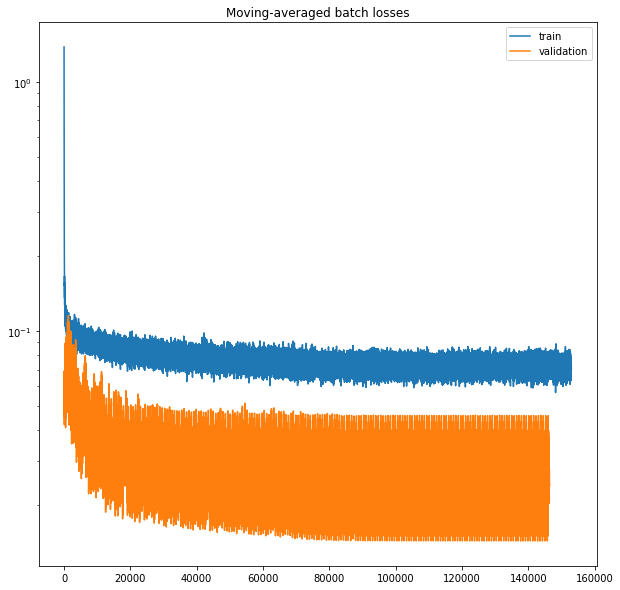

In [23]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.yscale('log')
plt.legend(loc='best')

# plt.ylim([1e-2, 1])
plt.show()

In [24]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

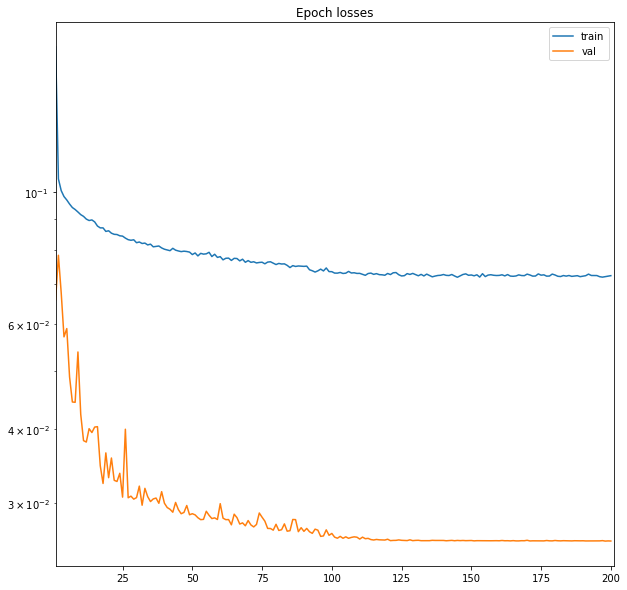

In [25]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [26]:
import os

In [27]:
import torch

In [28]:
from visualization_utils import output_to_binary, plot_sample, make_colored_diff

In [29]:
threshold = 0.5
to_plot = 10

Prediction for carb96558:


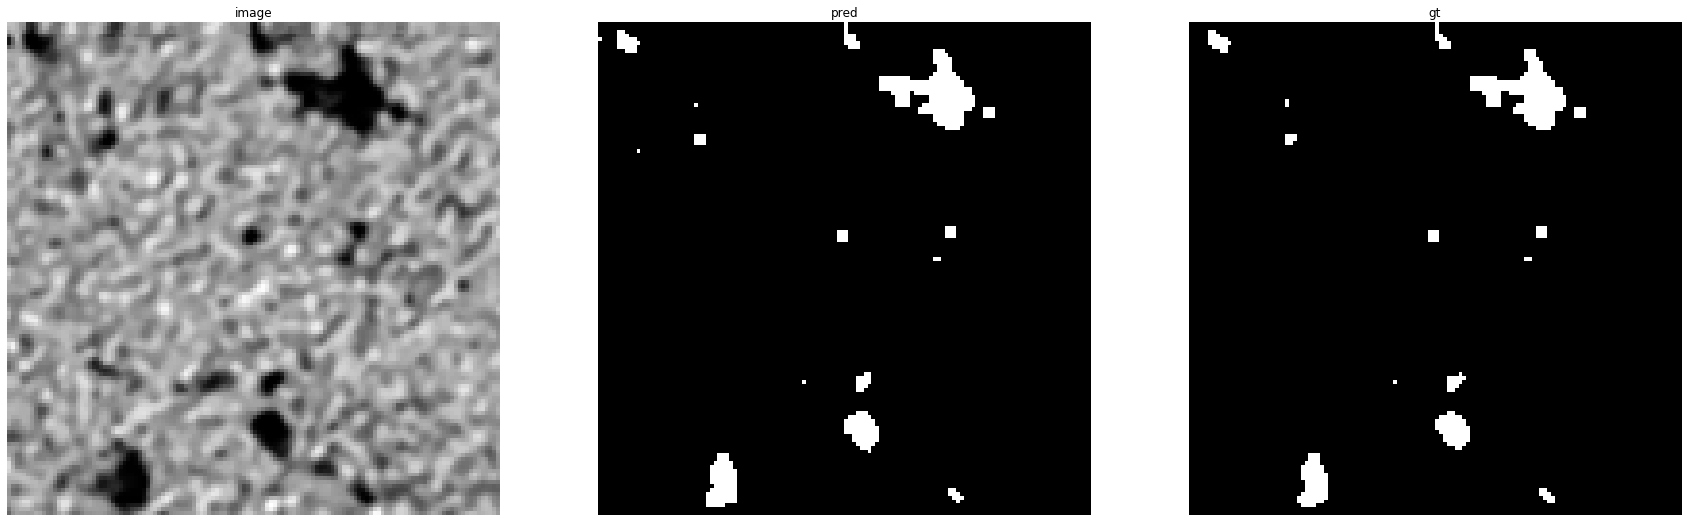

accuracy    : 0.998046875
precision   : 0.9416498993963782
recall      : 0.9936305732484076
f1          : 0.9669421487603305
pr_auc      : 0.9978535244273332
iou         : 0.936


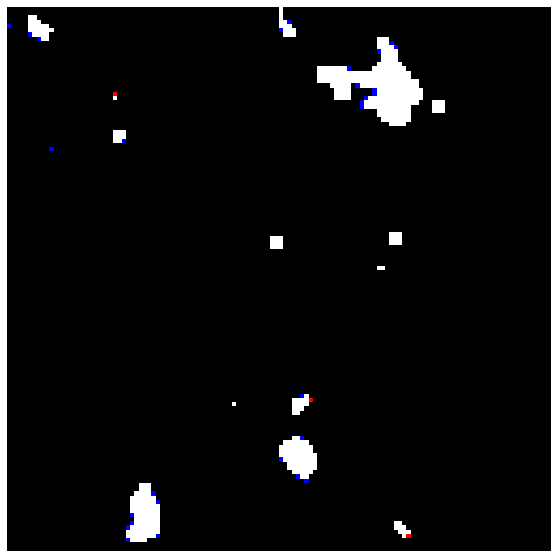

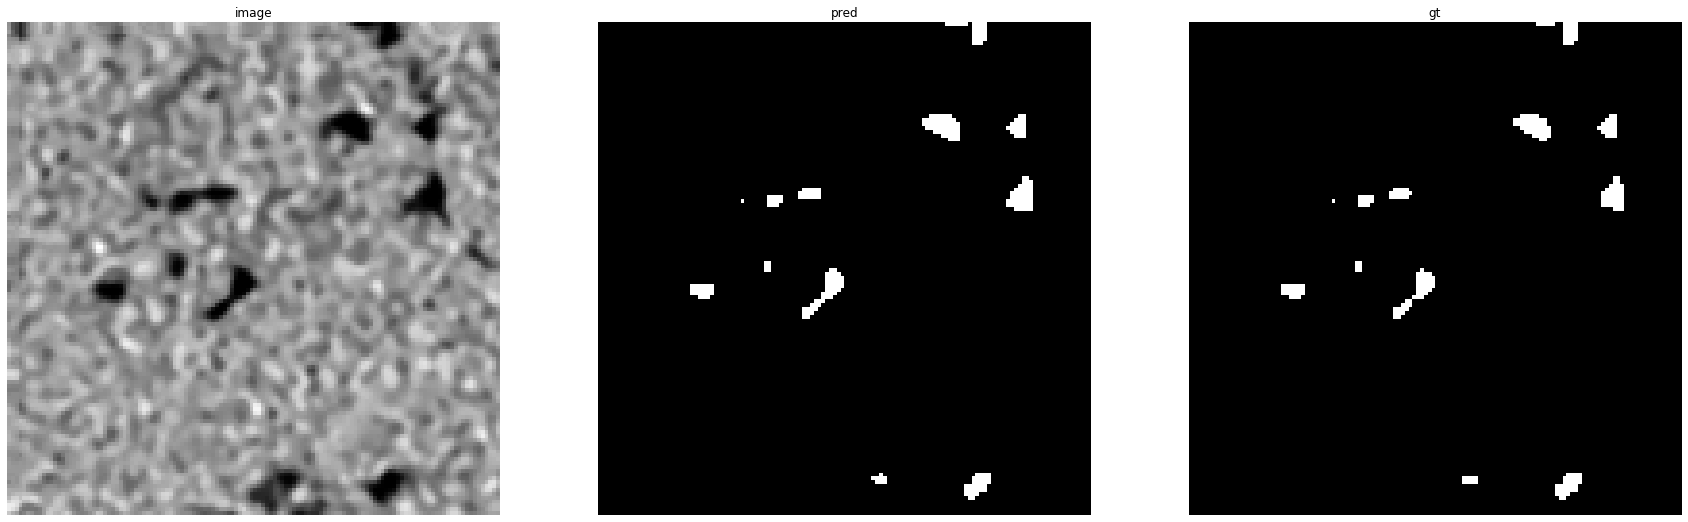

accuracy    : 0.99896240234375
precision   : 0.9442508710801394
recall      : 0.9963235294117647
f1          : 0.9695885509838998
pr_auc      : 0.9990432761842414
iou         : 0.9409722222222222


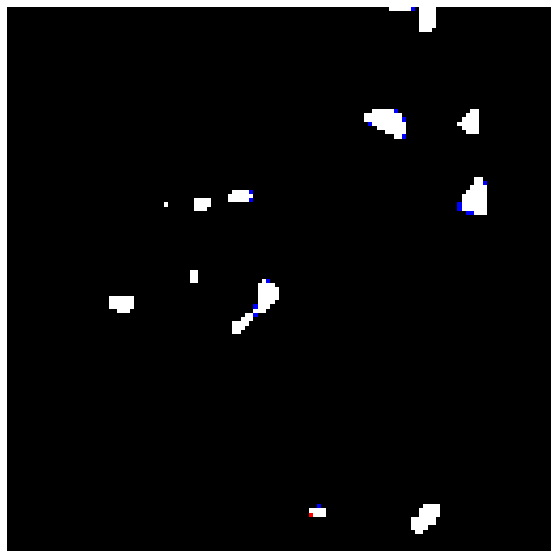

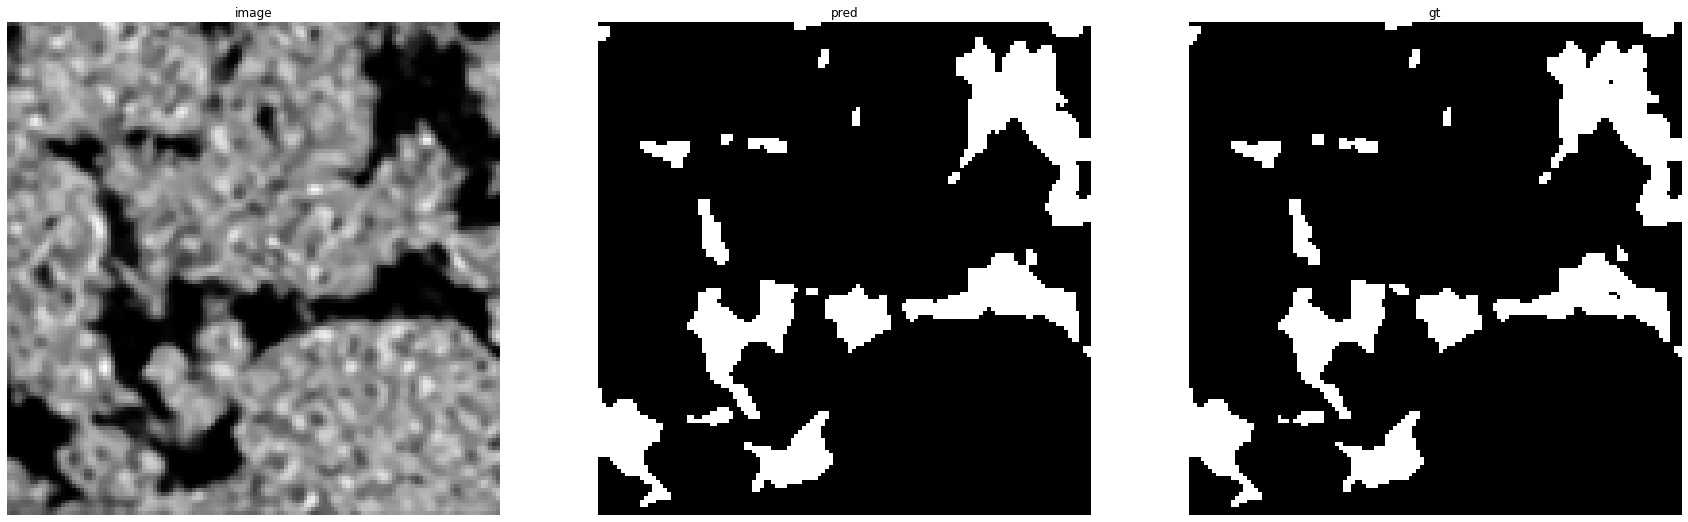

accuracy    : 0.99395751953125
precision   : 0.9709214501510574
recall      : 0.9915156189741612
f1          : 0.9811104751001718
pr_auc      : 0.9991023800259468
iou         : 0.9629213483146067


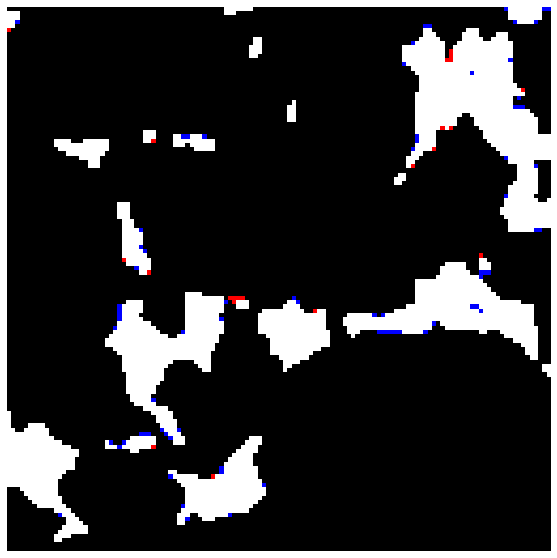

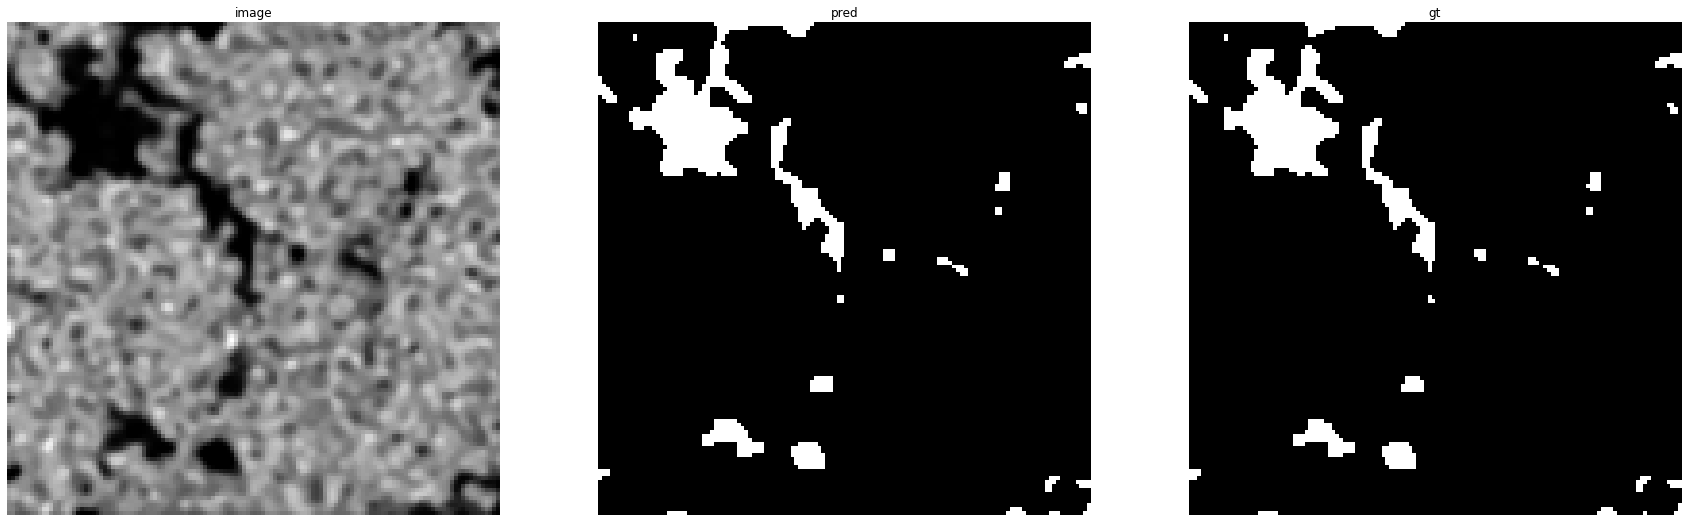

accuracy    : 0.997314453125
precision   : 0.966934763181412
recall      : 0.9935720844811754
f1          : 0.980072463768116
pr_auc      : 0.9984928270354319
iou         : 0.9609236234458259


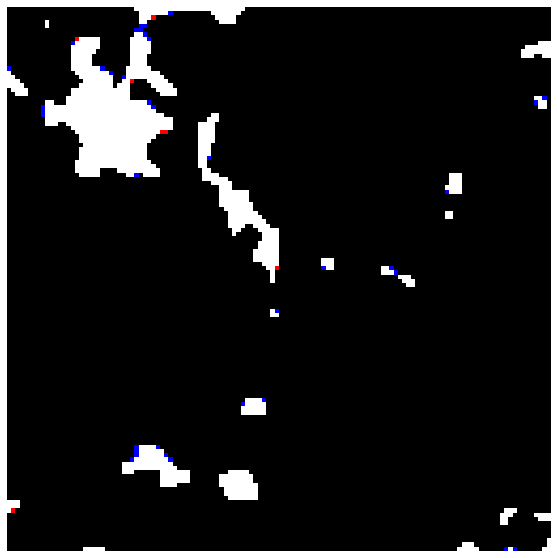

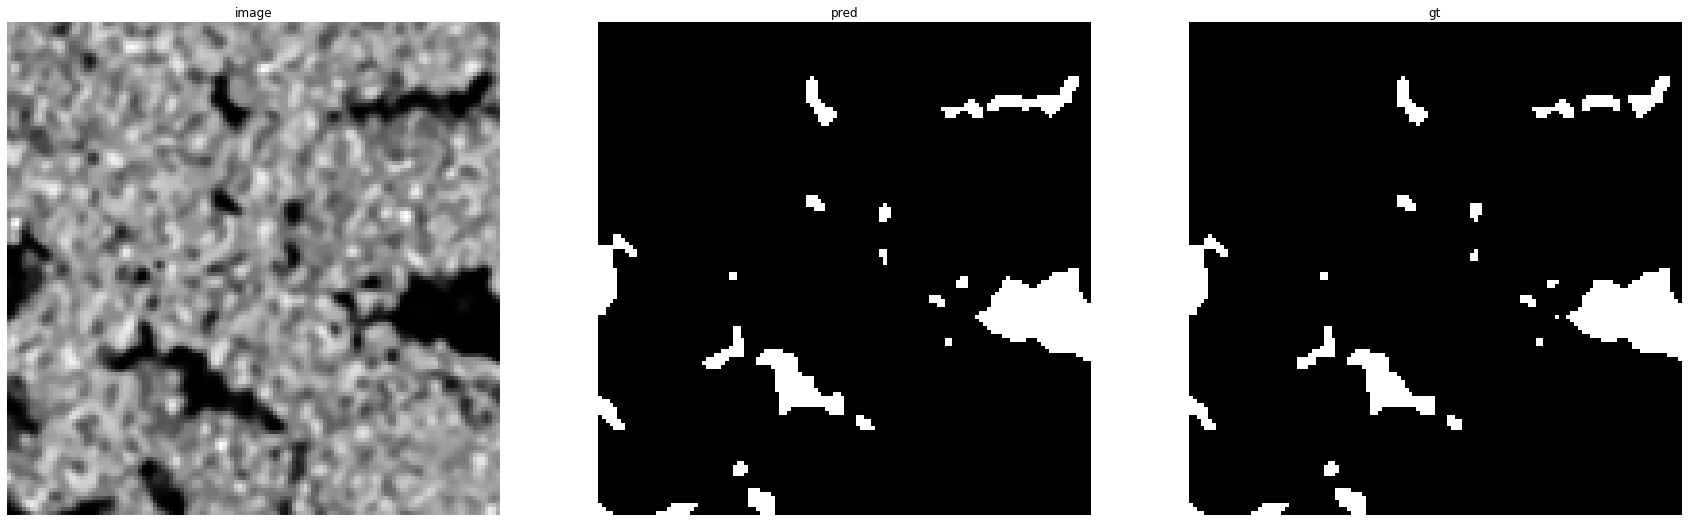

accuracy    : 0.99737548828125
precision   : 0.9722719141323792
recall      : 0.989080982711556
f1          : 0.9806044203879115
pr_auc      : 0.9987444461576738
iou         : 0.9619469026548673


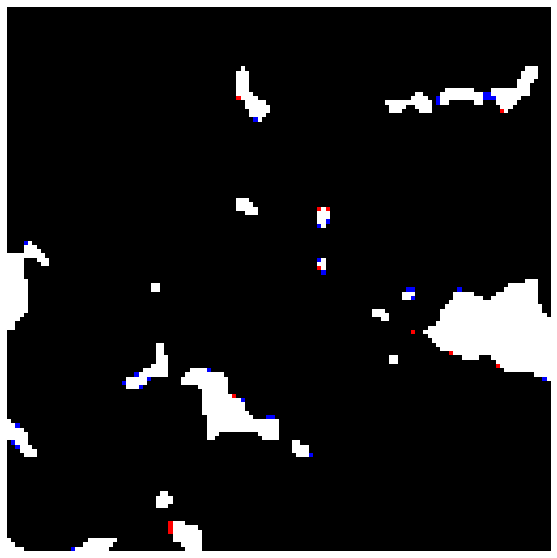

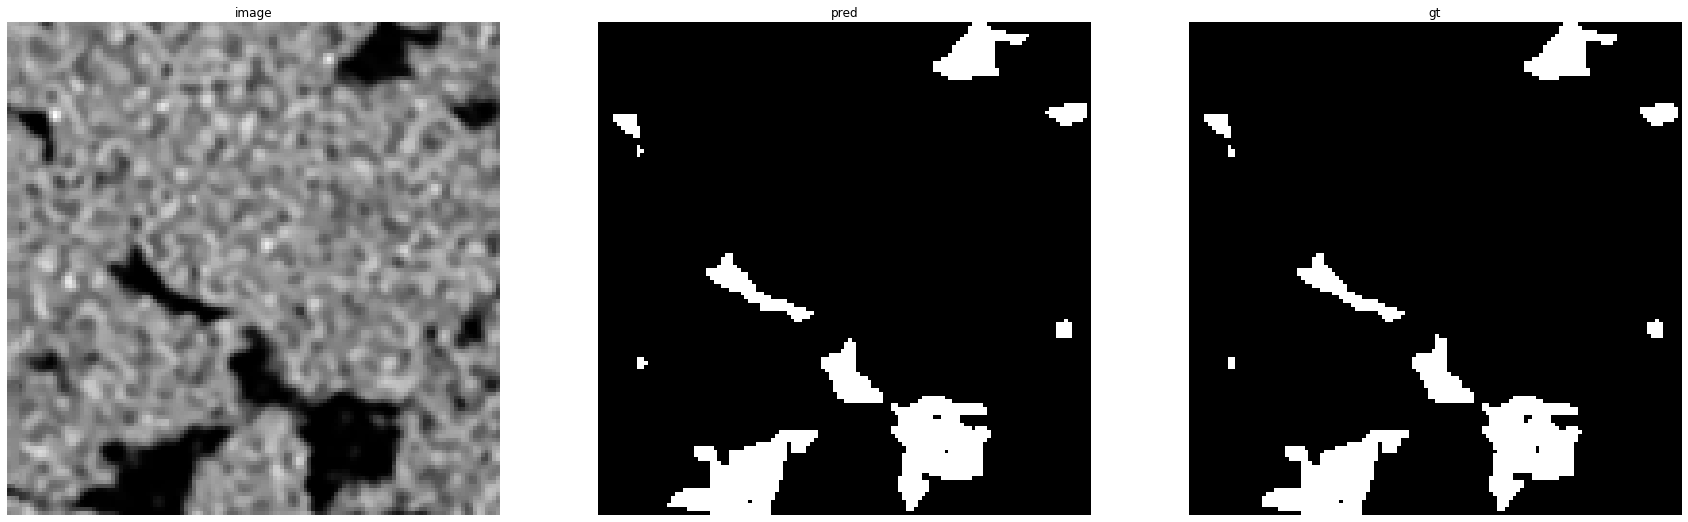

accuracy    : 0.9979248046875
precision   : 0.9820813232253618
recall      : 0.994417306350314
f1          : 0.9882108183079056
pr_auc      : 0.9994798583568947
iou         : 0.9766963673749143


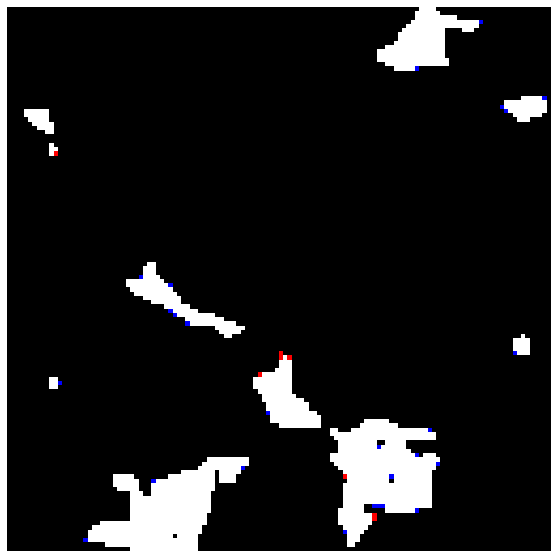

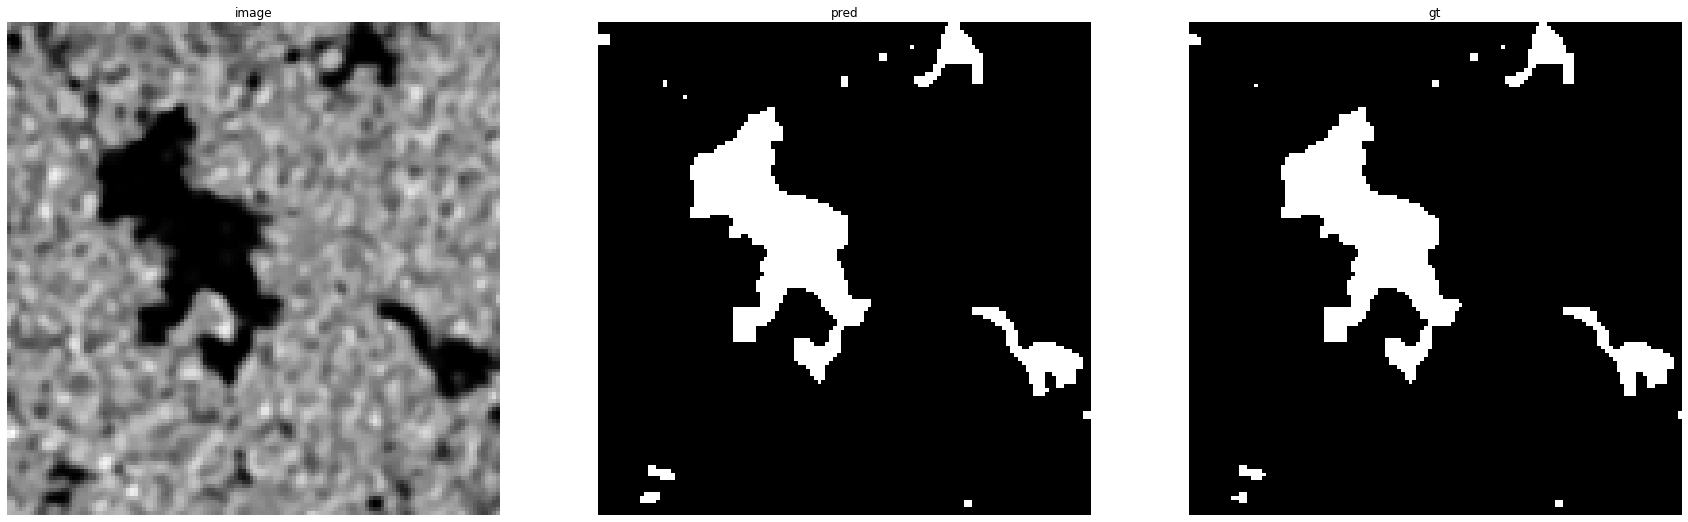

accuracy    : 0.9976806640625
precision   : 0.9792408066429419
recall      : 0.998186215235792
f1          : 0.9886227544910179
pr_auc      : 0.9996937640750793
iou         : 0.9775014801657785


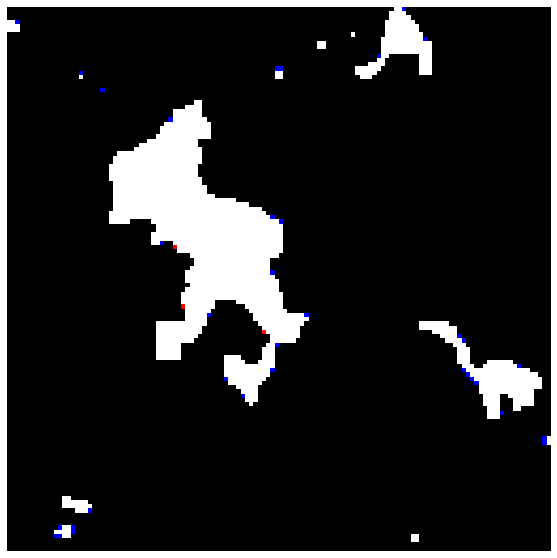

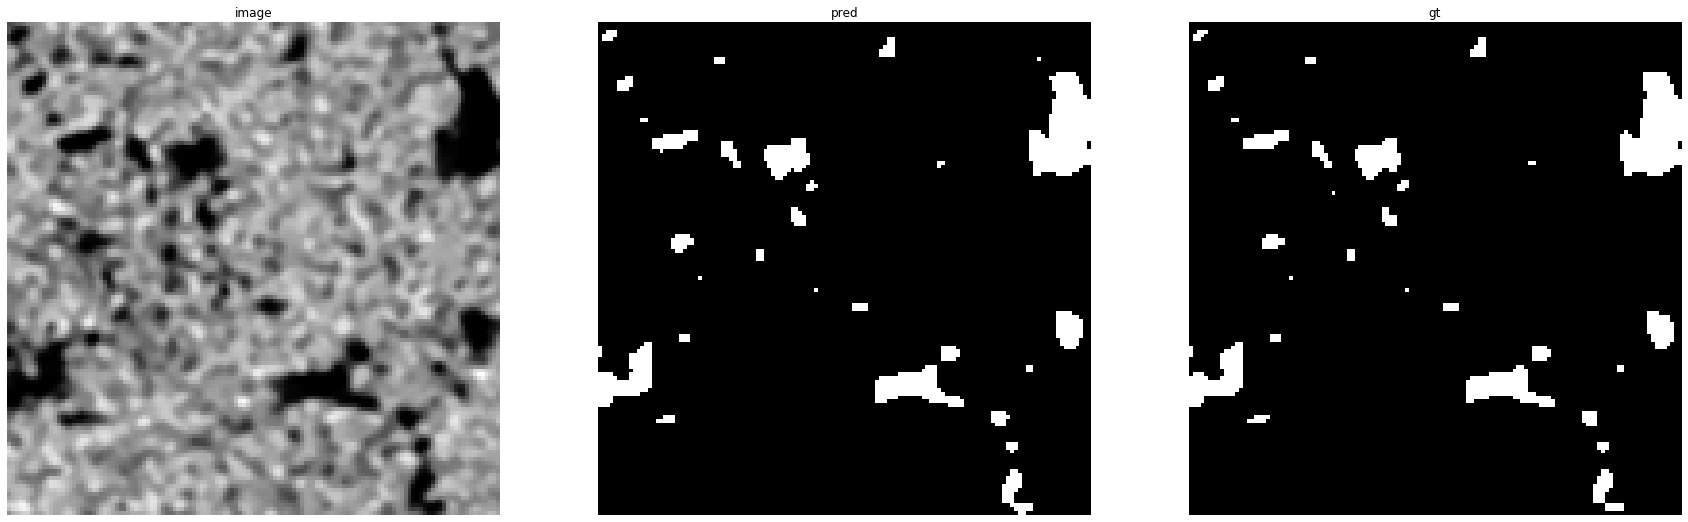

accuracy    : 0.99761962890625
precision   : 0.9683995922528033
recall      : 0.9916492693110647
f1          : 0.9798865394533265
pr_auc      : 0.9990066438301015
iou         : 0.9605662285136501


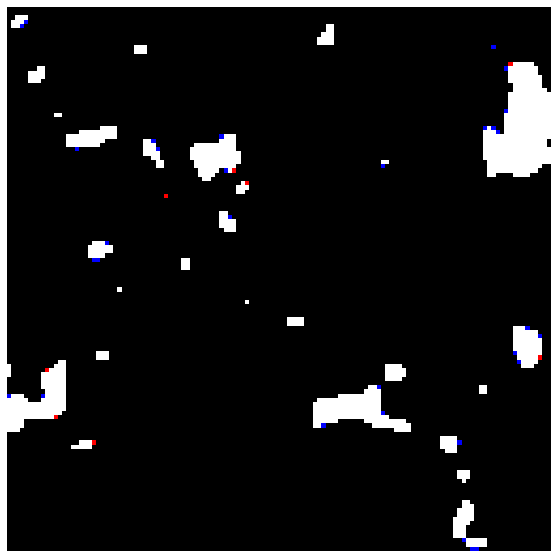

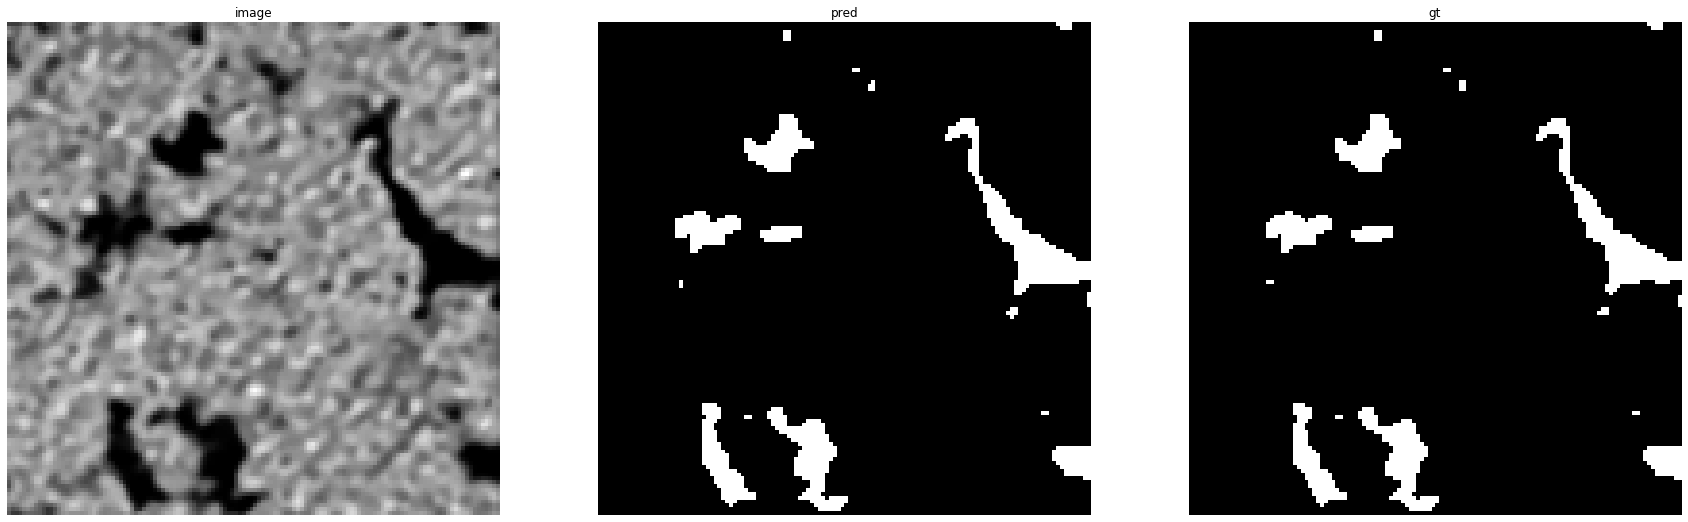

accuracy    : 0.998046875
precision   : 0.9748653500897666
recall      : 0.9963302752293578
f1          : 0.9854809437386571
pr_auc      : 0.9992882338296312
iou         : 0.9713774597495528


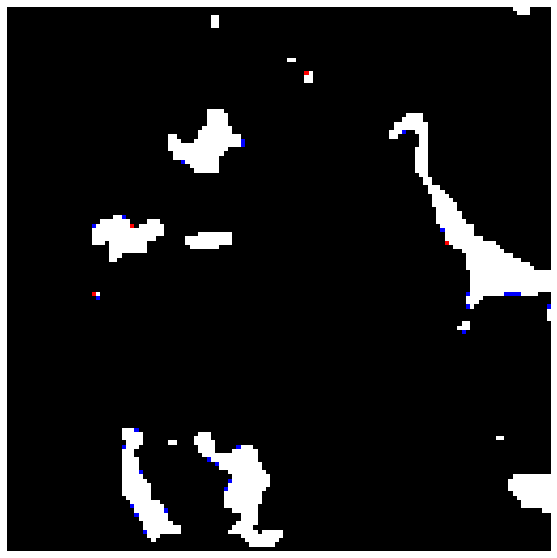

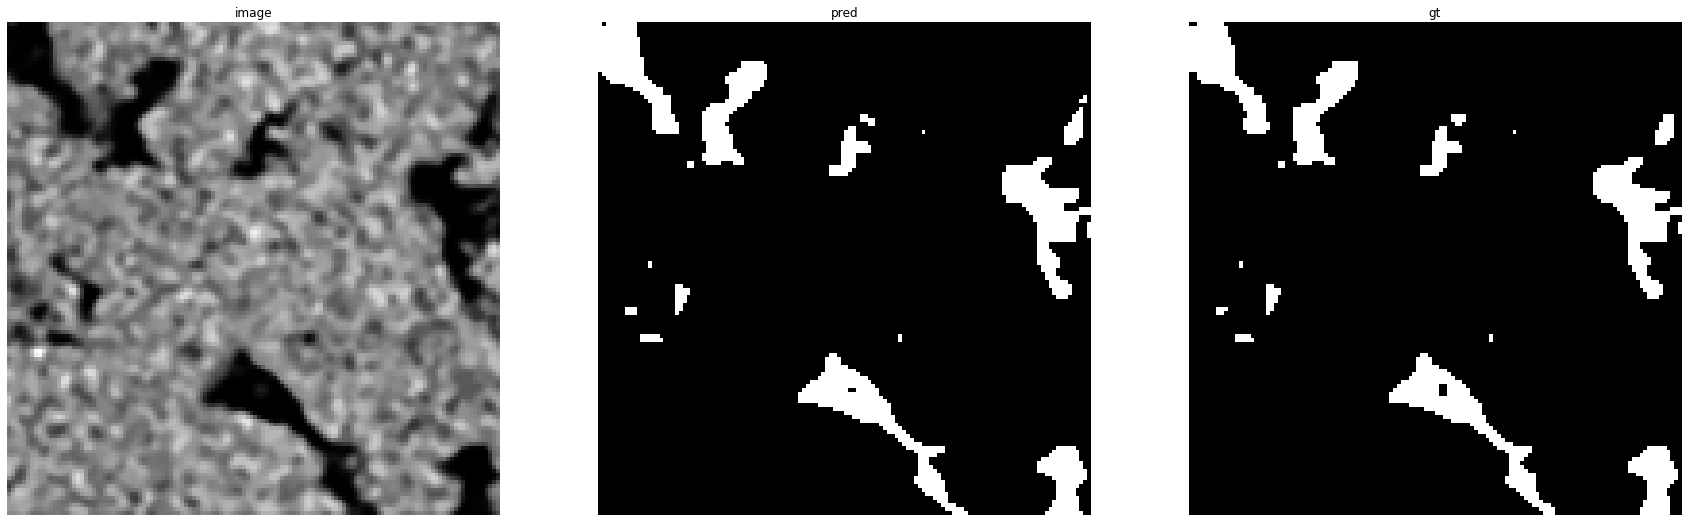

accuracy    : 0.9962158203125
precision   : 0.9693042291950886
recall      : 0.9881780250347705
f1          : 0.9786501377410467
pr_auc      : 0.9983550337030703
iou         : 0.9581928523263655


Prediction for carb71:


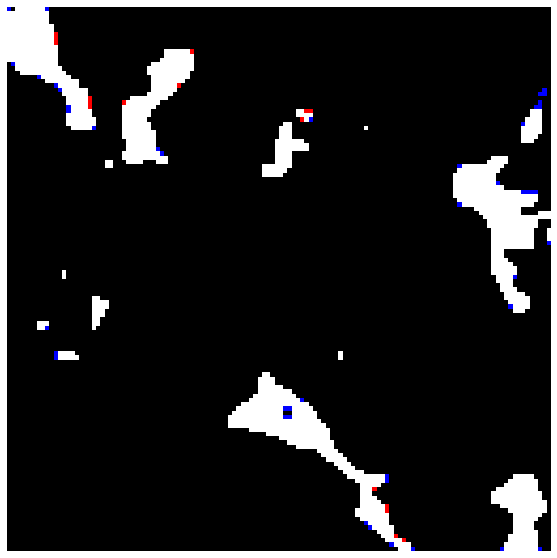

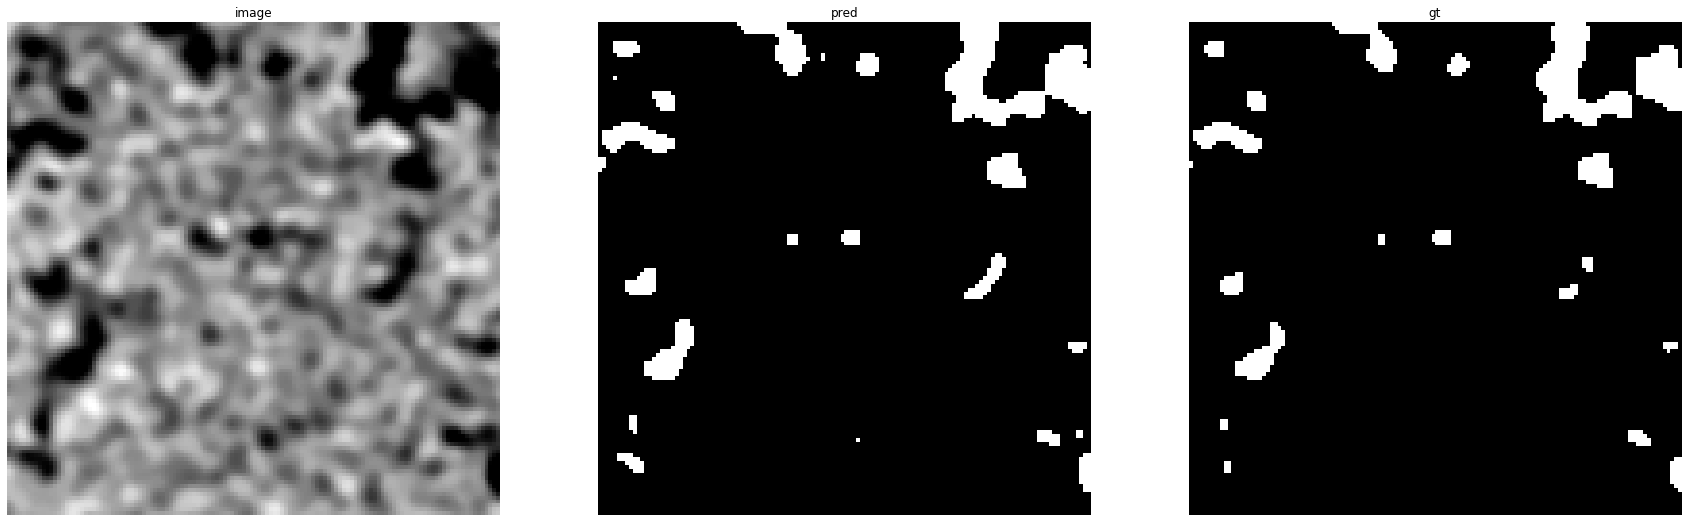

accuracy    : 0.989501953125
precision   : 0.8624787775891342
recall      : 0.9902534113060428
f1          : 0.9219600725952813
pr_auc      : 0.9921945452255685
iou         : 0.8552188552188552


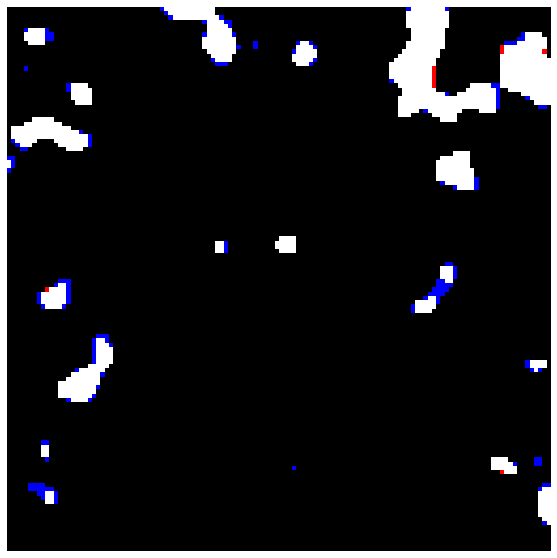

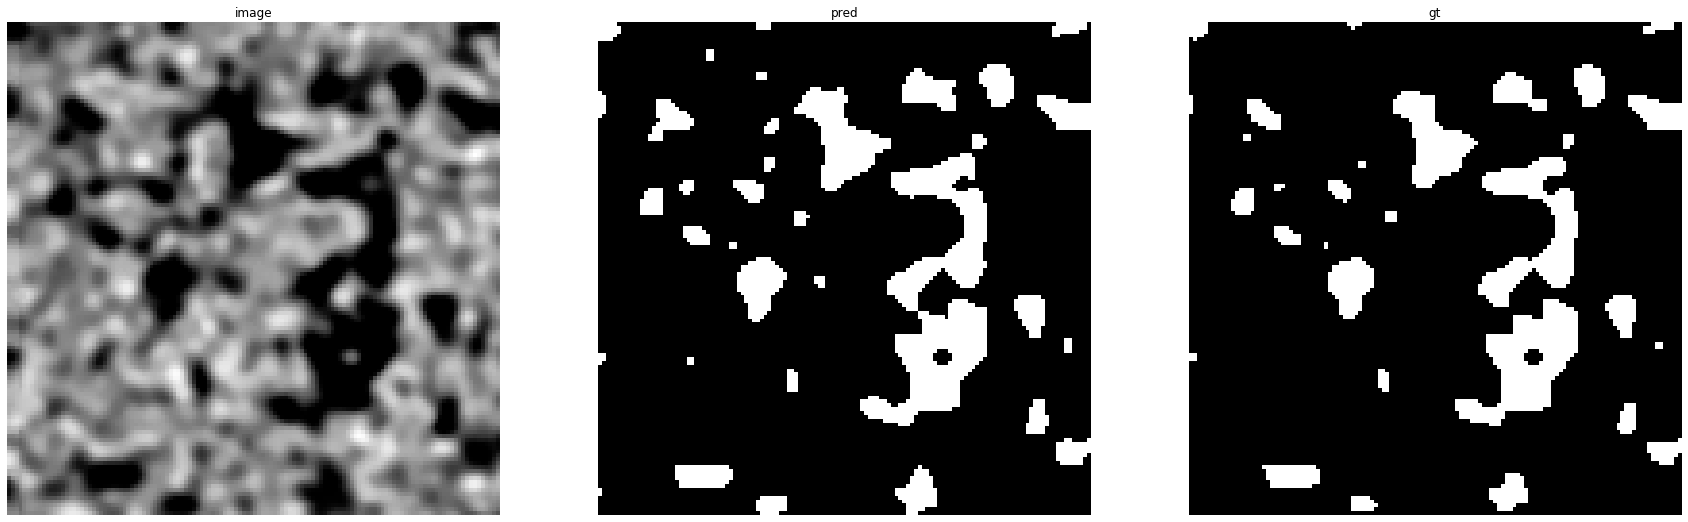

accuracy    : 0.98095703125
precision   : 0.8724804607157548
recall      : 0.999057936881771
f1          : 0.9314888010540184
pr_auc      : 0.9939399180503979
iou         : 0.8717632552404438


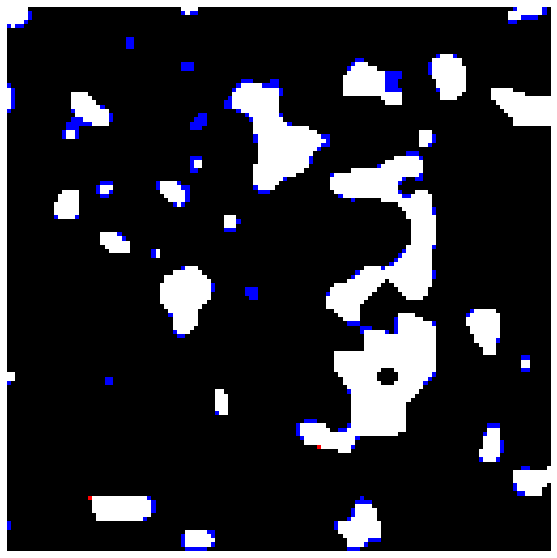

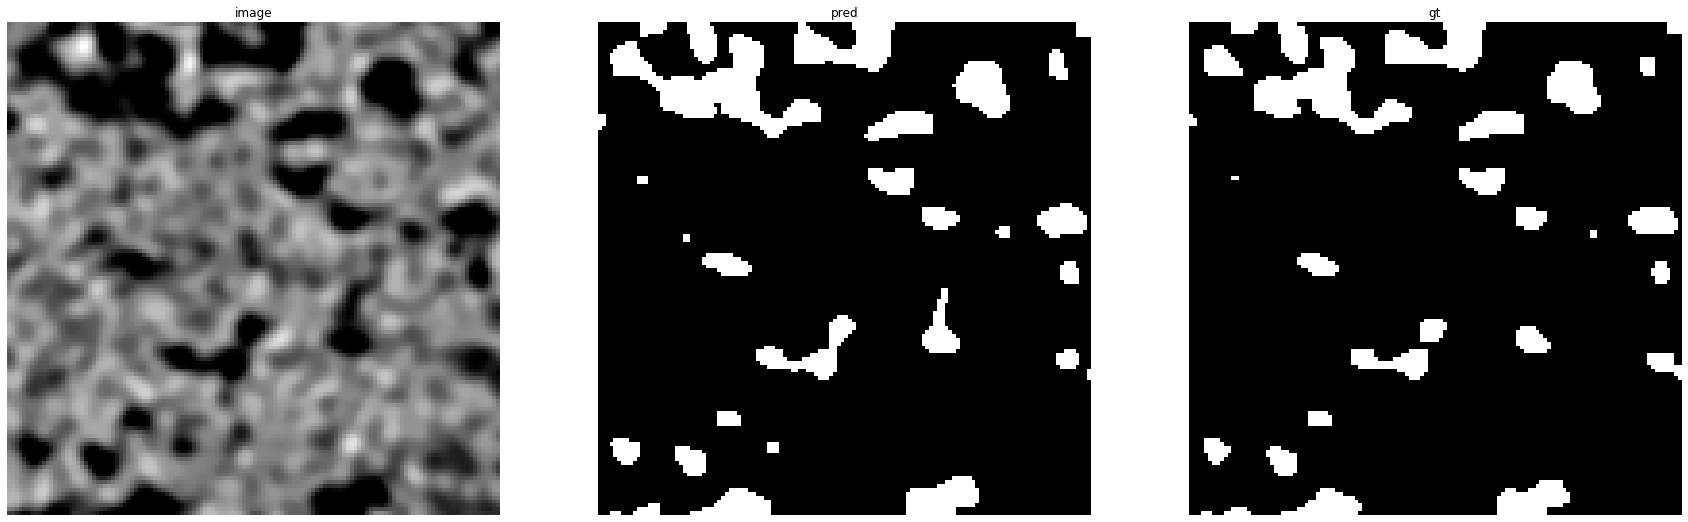

accuracy    : 0.9833984375
precision   : 0.8794599807135969
recall      : 0.9880823401950163
f1          : 0.9306122448979591
pr_auc      : 0.9915065405539472
iou         : 0.8702290076335878


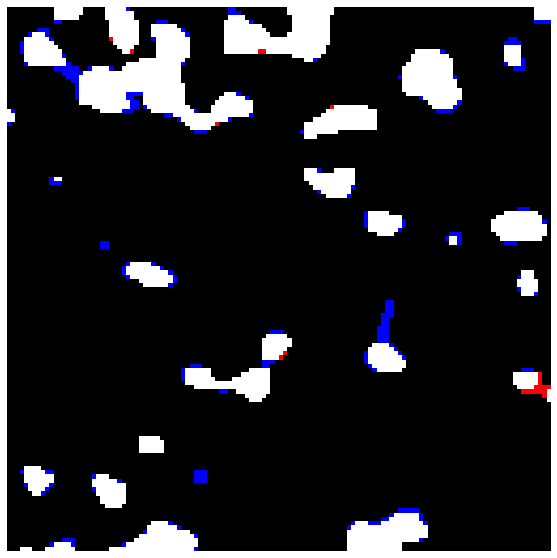

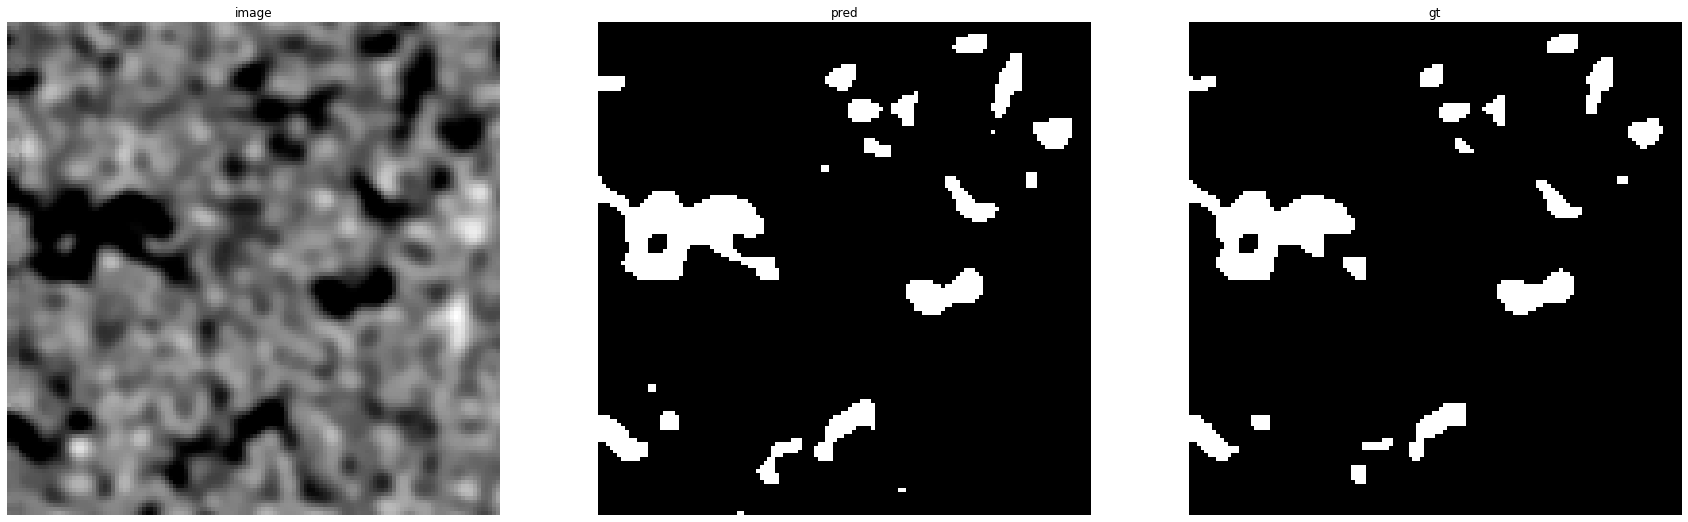

accuracy    : 0.9876708984375
precision   : 0.8676569885212694
recall      : 0.9953524399690162
f1          : 0.9271284271284271
pr_auc      : 0.9937991550840147
iou         : 0.8641560188298588


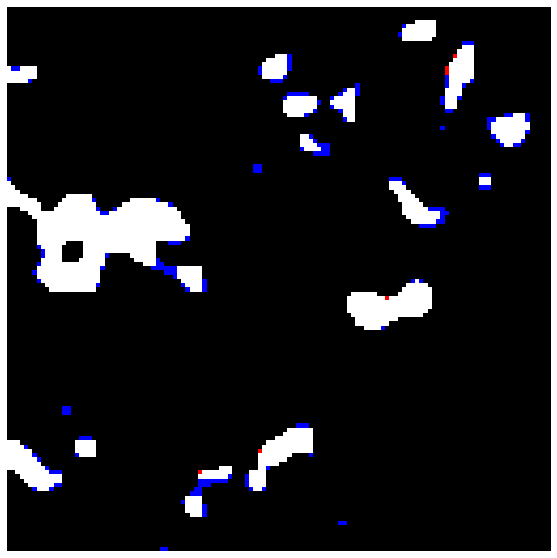

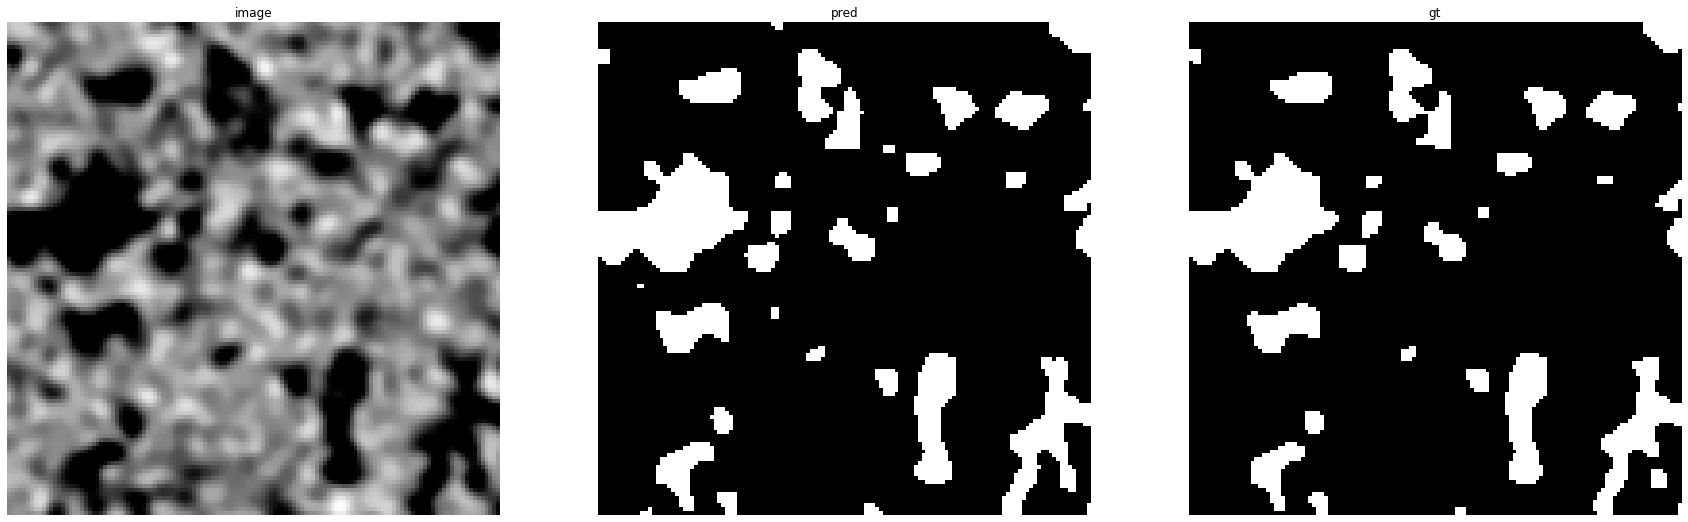

accuracy    : 0.987060546875
precision   : 0.9241917502787068
recall      : 0.9967935871743487
f1          : 0.9591207096027767
pr_auc      : 0.996653840953627
iou         : 0.9214523897739904


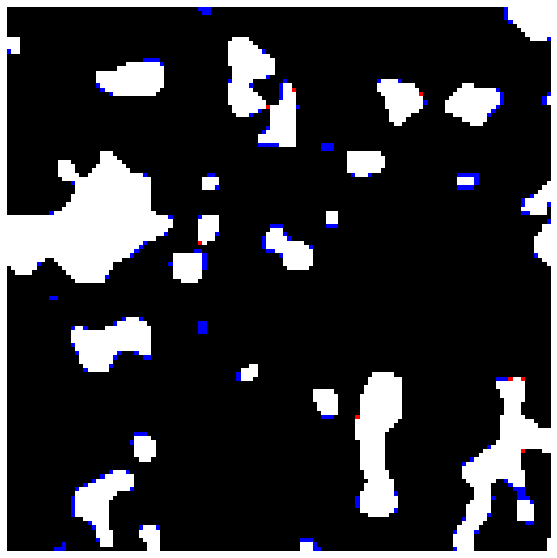

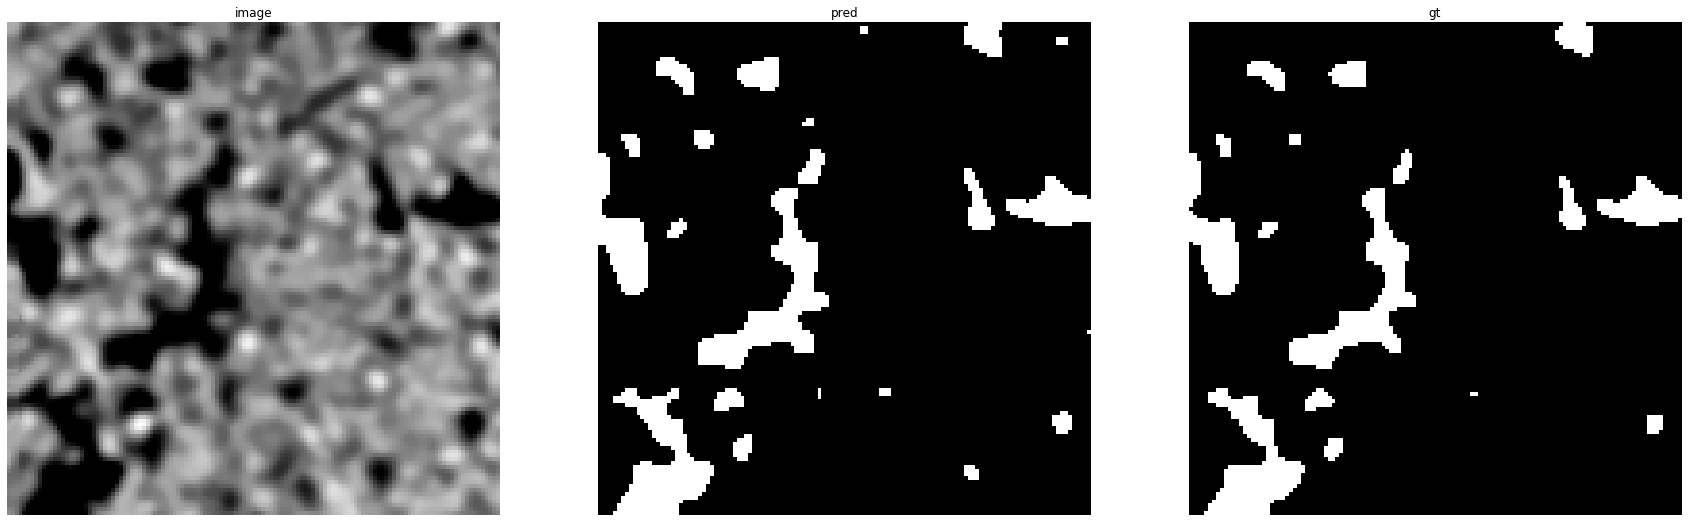

accuracy    : 0.98663330078125
precision   : 0.8814404432132964
recall      : 0.9968671679197995
f1          : 0.9356071743604821
pr_auc      : 0.9936563468486543
iou         : 0.8790055248618784


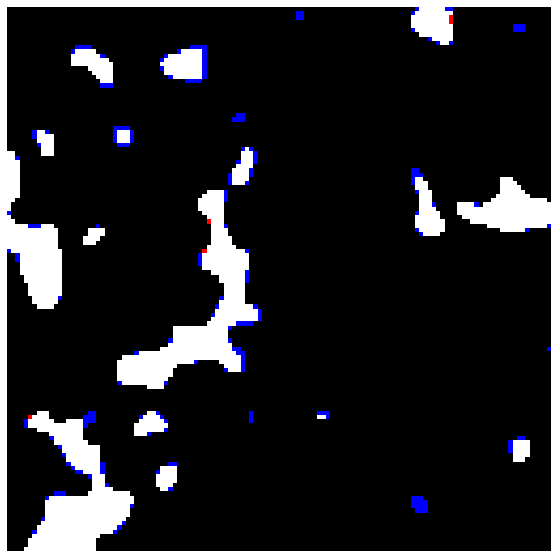

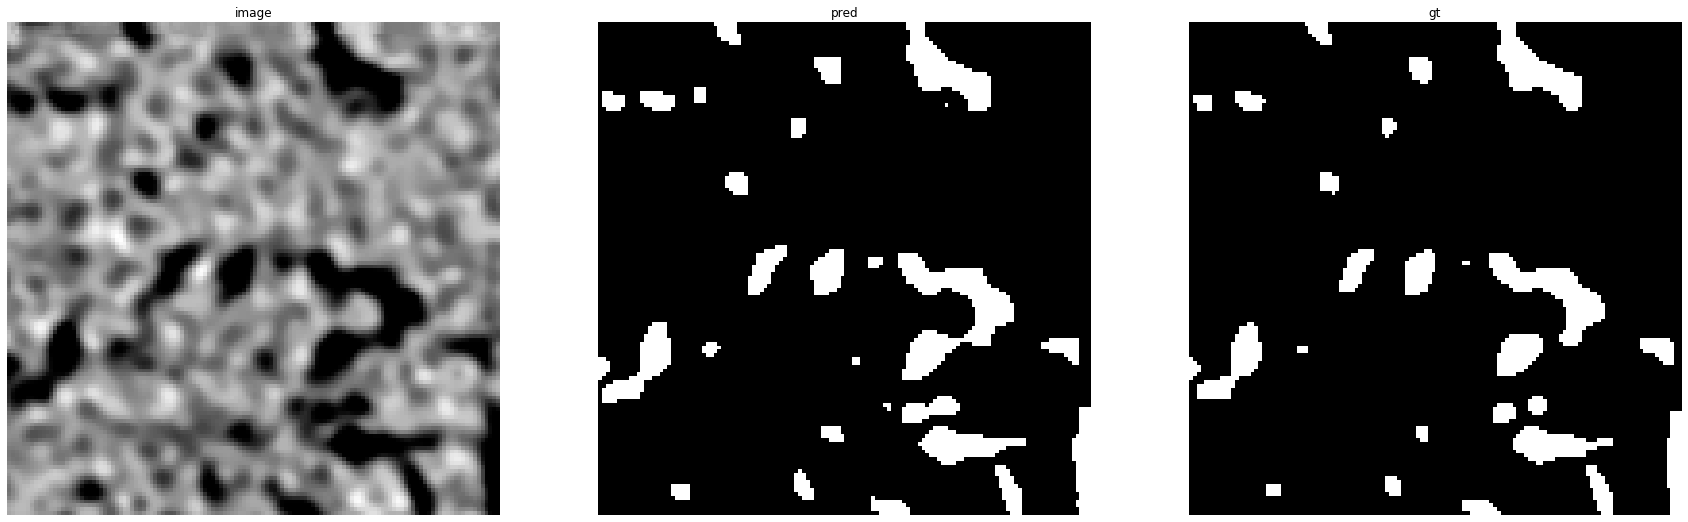

accuracy    : 0.9859619140625
precision   : 0.8686390532544379
recall      : 0.994579945799458
f1          : 0.9273531269740999
pr_auc      : 0.990167099380246
iou         : 0.8645465253239105


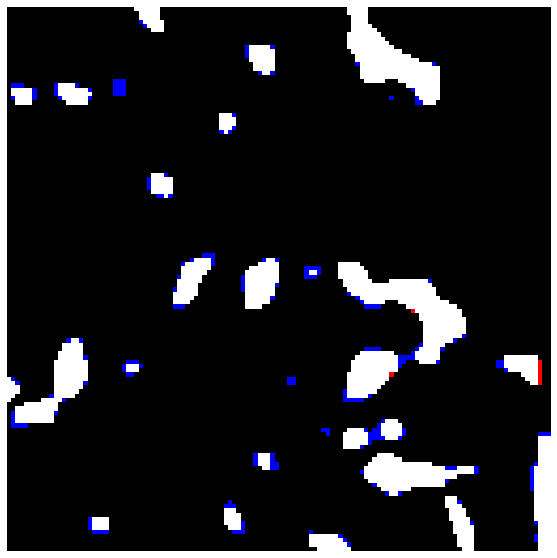

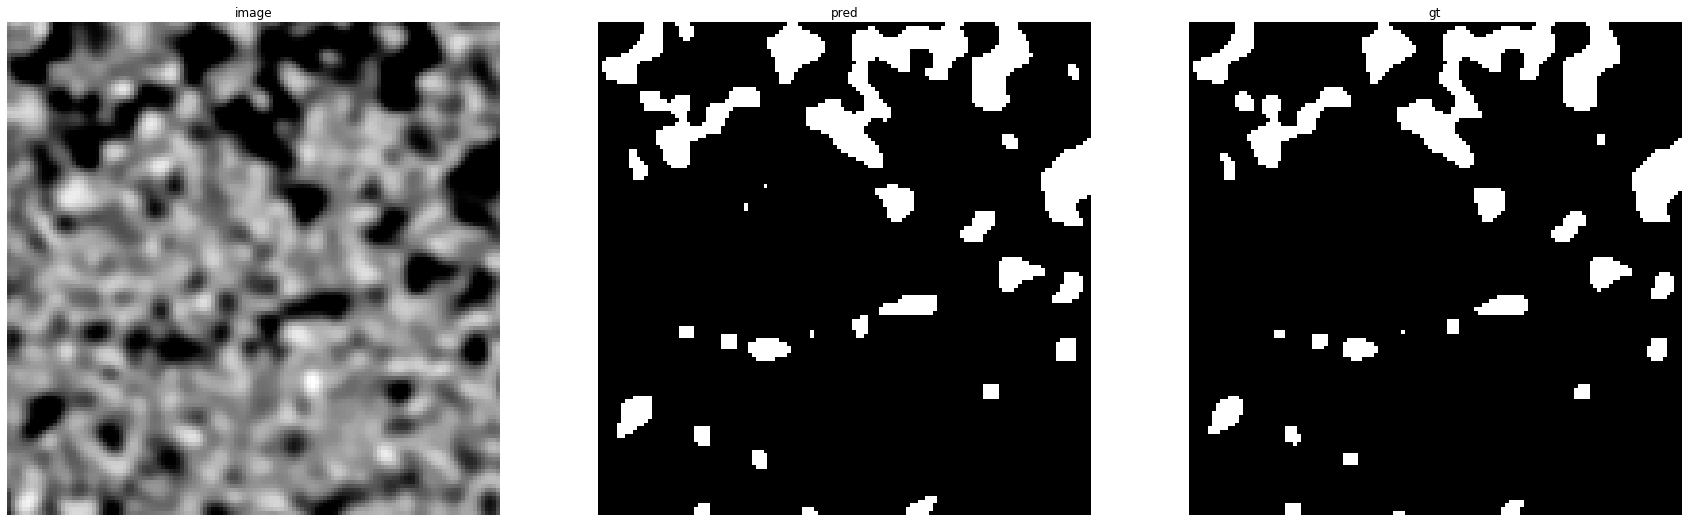

accuracy    : 0.9857177734375
precision   : 0.8933649289099526
recall      : 0.9952481520591341
f1          : 0.9415584415584416
pr_auc      : 0.9931119752090037
iou         : 0.8895705521472392


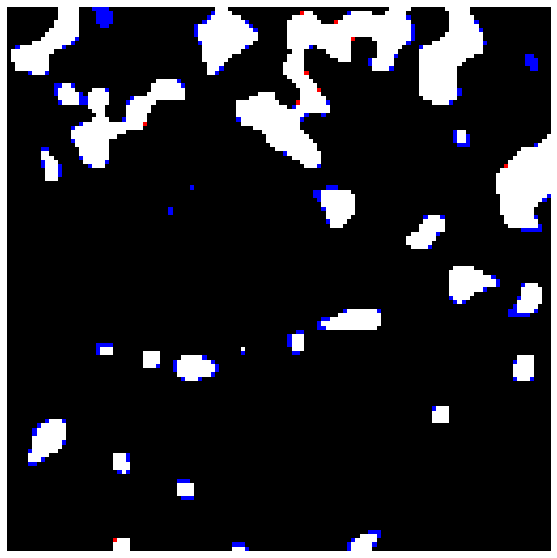

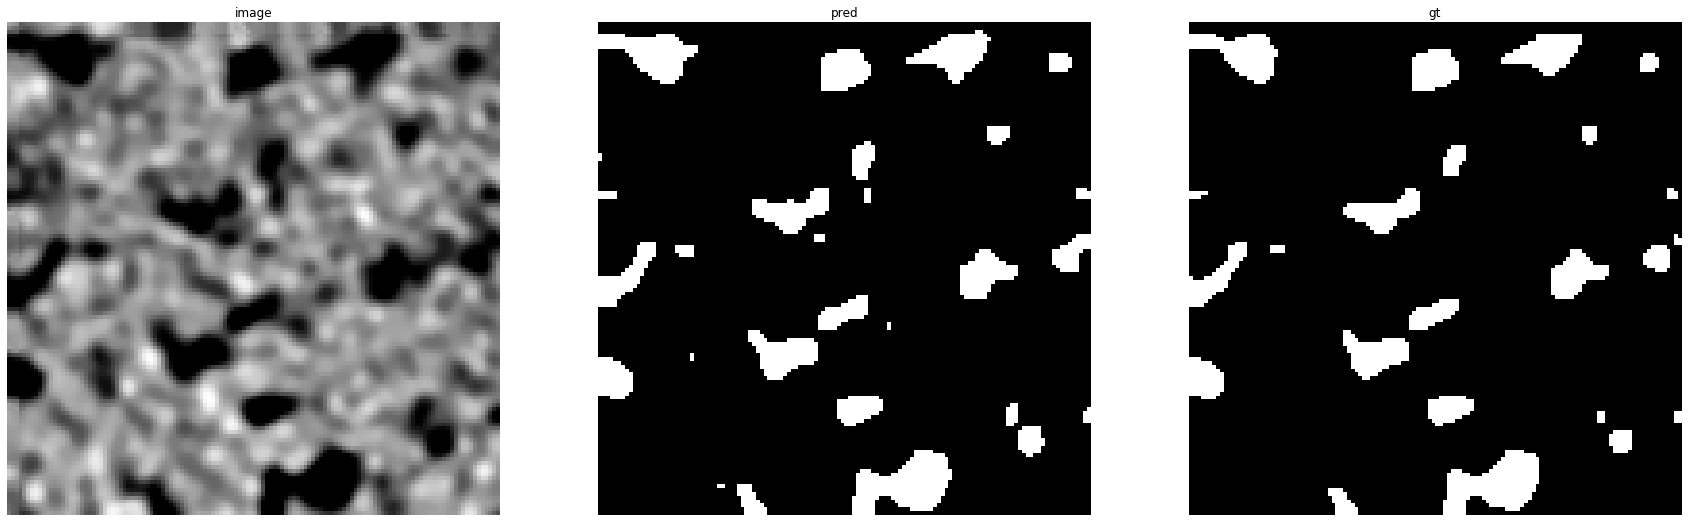

accuracy    : 0.98785400390625
precision   : 0.8916947250280584
recall      : 0.9962382445141066
f1          : 0.9410719573586024
pr_auc      : 0.9940935546860932
iou         : 0.8887024608501118


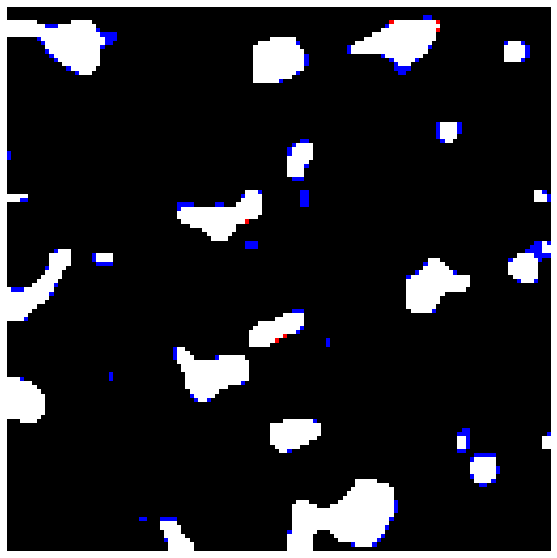

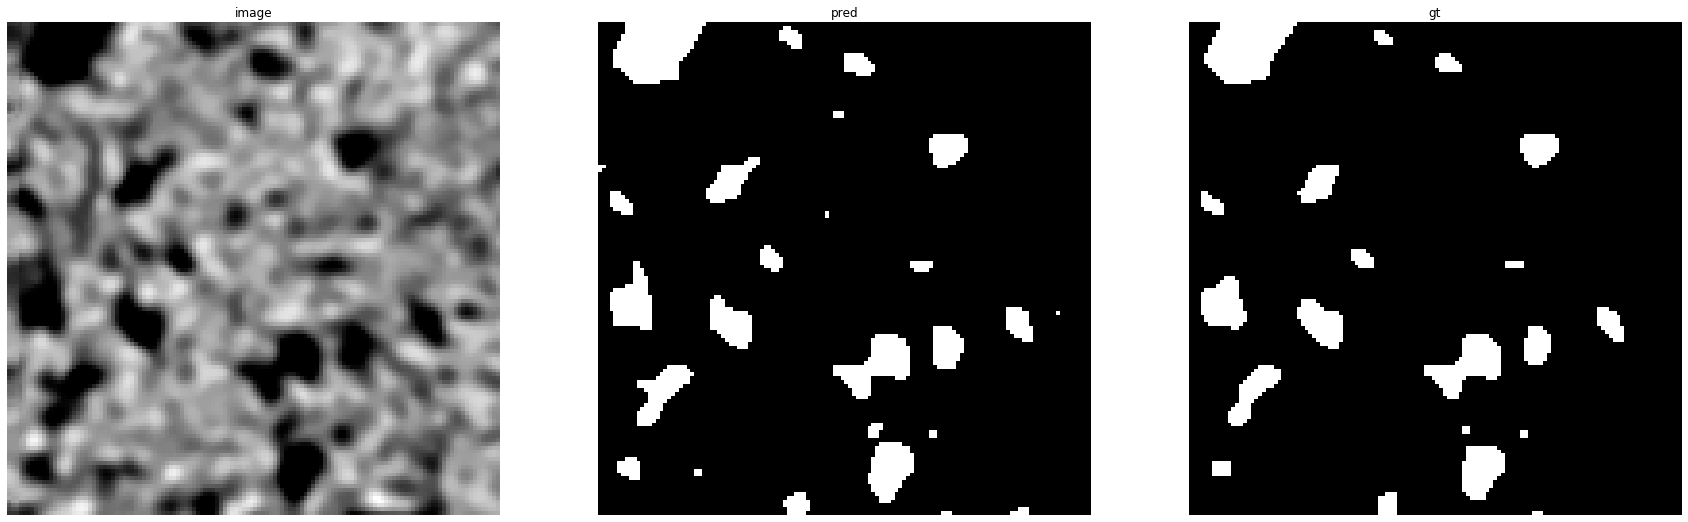

accuracy    : 0.98828125
precision   : 0.8754277891854894
recall      : 0.9922420480993018
f1          : 0.9301818181818182
pr_auc      : 0.993311435644534
iou         : 0.8694765465669613


Prediction for carbRNF:


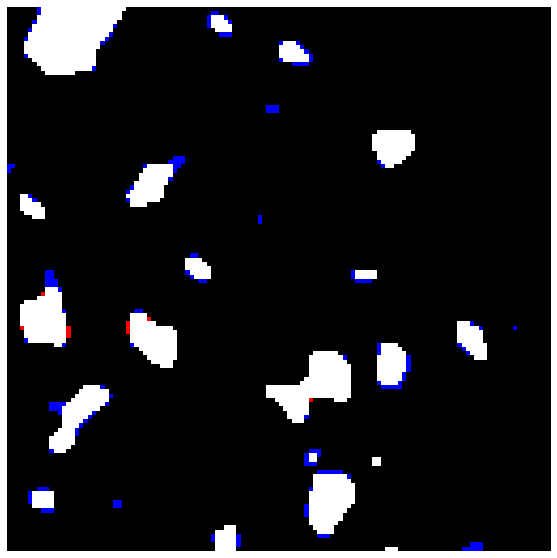

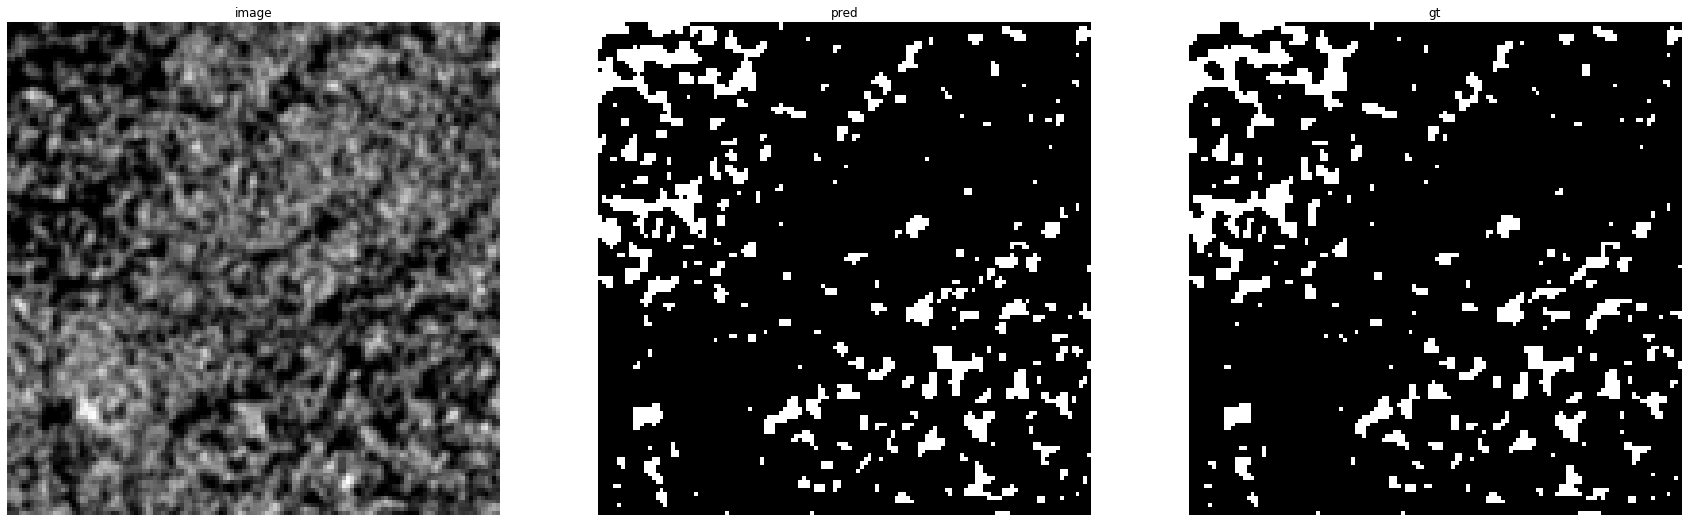

accuracy    : 0.9798583984375
precision   : 0.9156265601597604
recall      : 0.9192982456140351
f1          : 0.9174587293646823
pr_auc      : 0.978966560950207
iou         : 0.8475046210720887


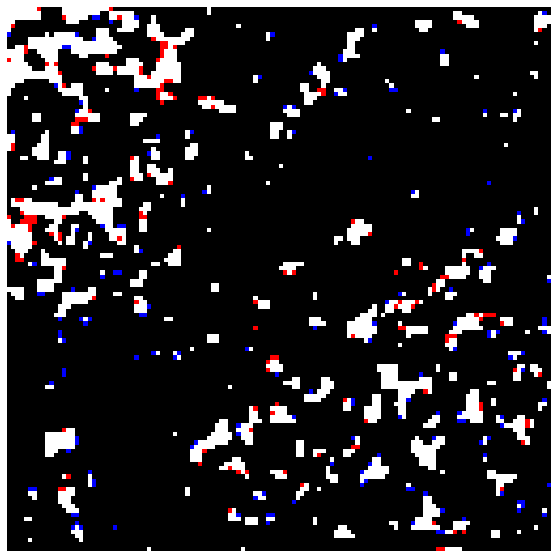

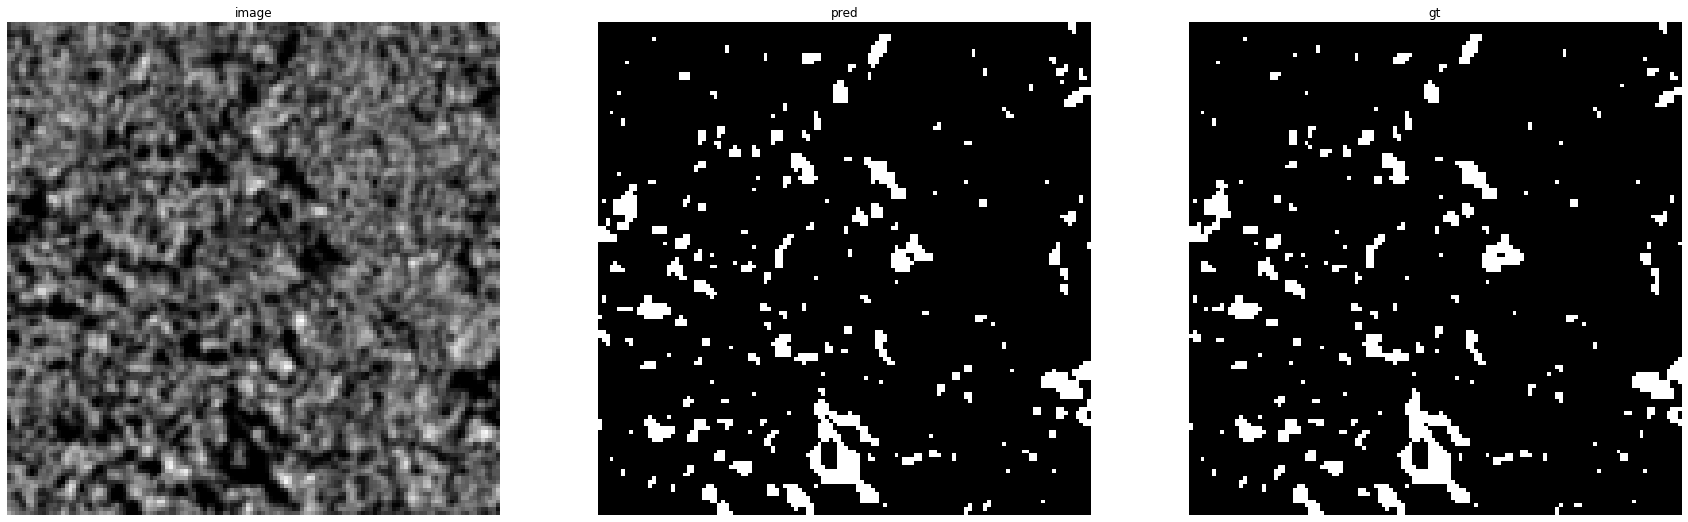

accuracy    : 0.98822021484375
precision   : 0.9138187221396731
recall      : 0.9410864575363428
f1          : 0.9272521673577083
pr_auc      : 0.9849825182956445
iou         : 0.8643710470836261


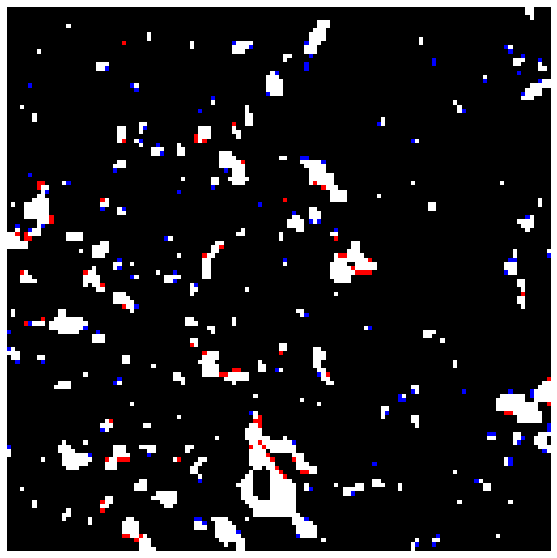

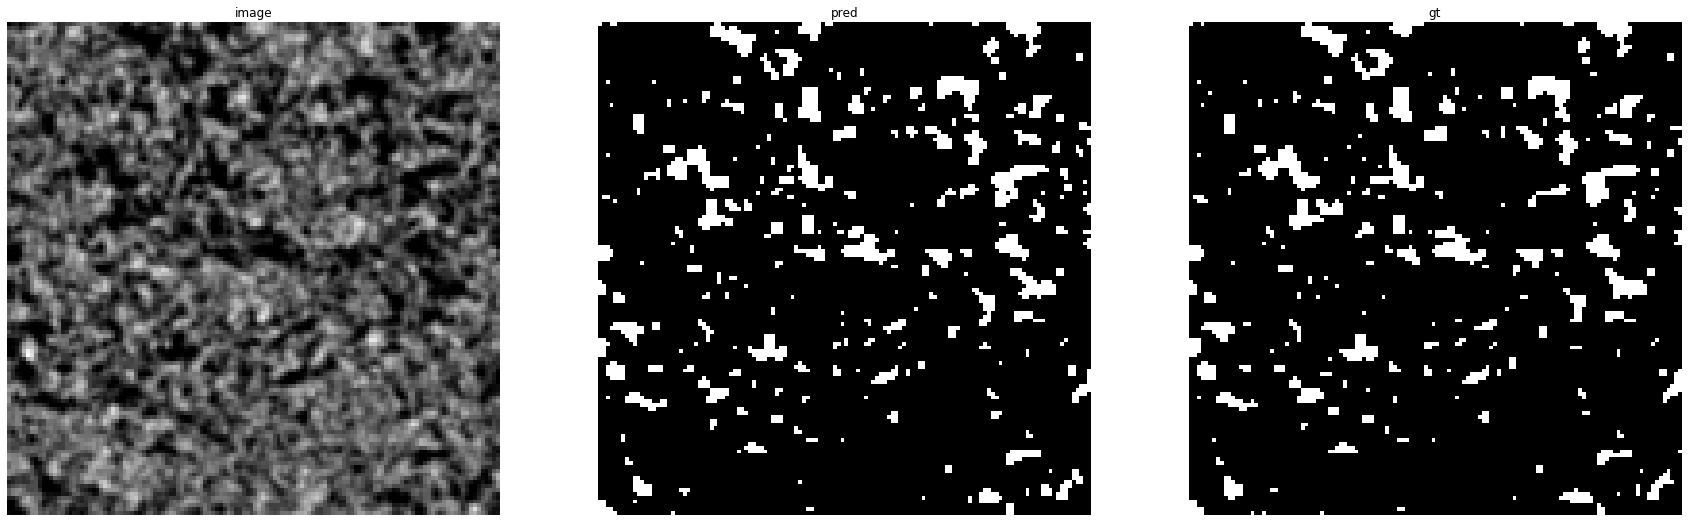

accuracy    : 0.9840087890625
precision   : 0.9123319696084161
recall      : 0.9330543933054394
f1          : 0.9225768321513003
pr_auc      : 0.9820483850241408
iou         : 0.8562808557323094


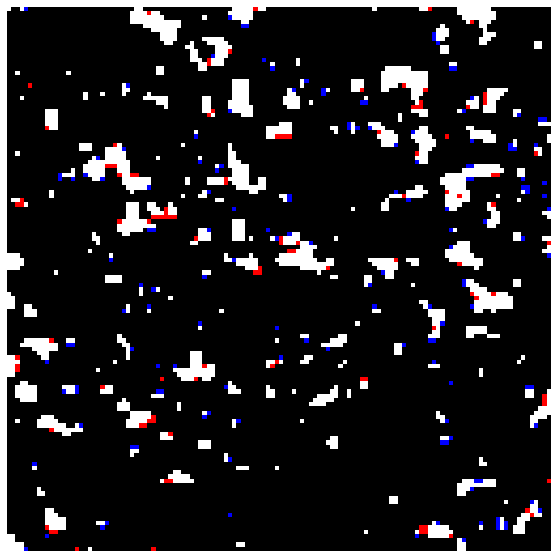

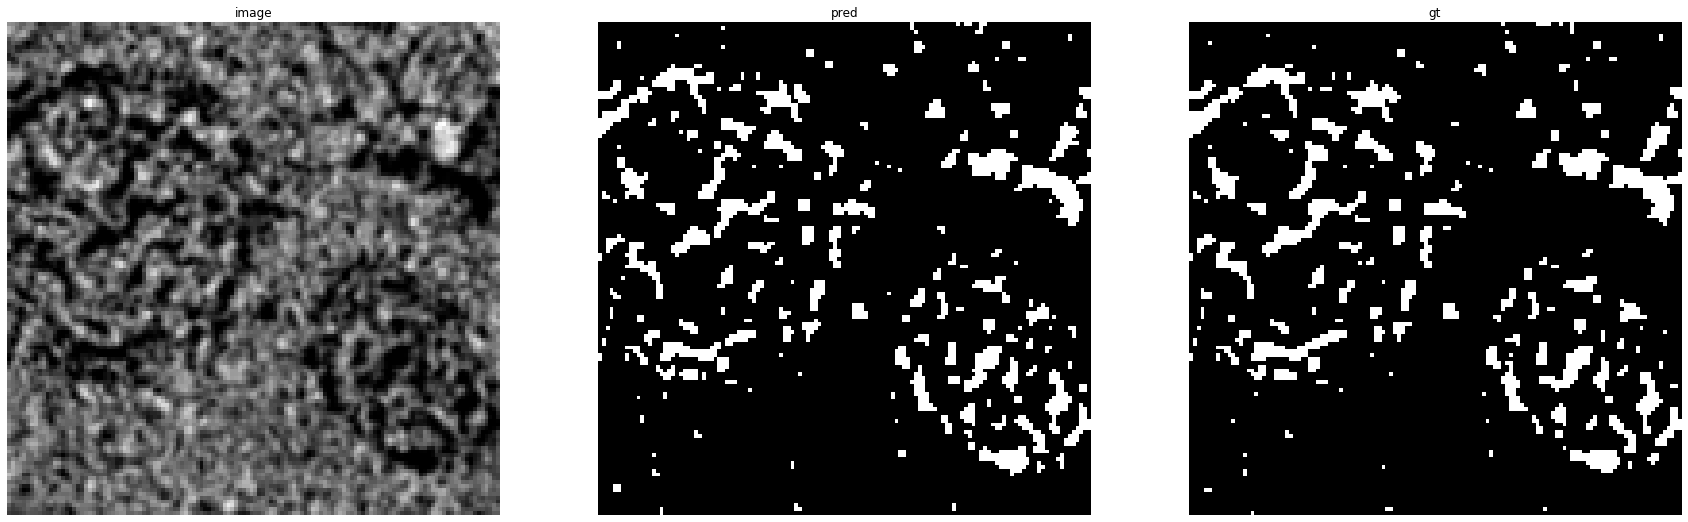

accuracy    : 0.984375
precision   : 0.926610348468849
recall      : 0.9375
f1          : 0.9320233669676049
pr_auc      : 0.9855371897503895
iou         : 0.8727001491795127


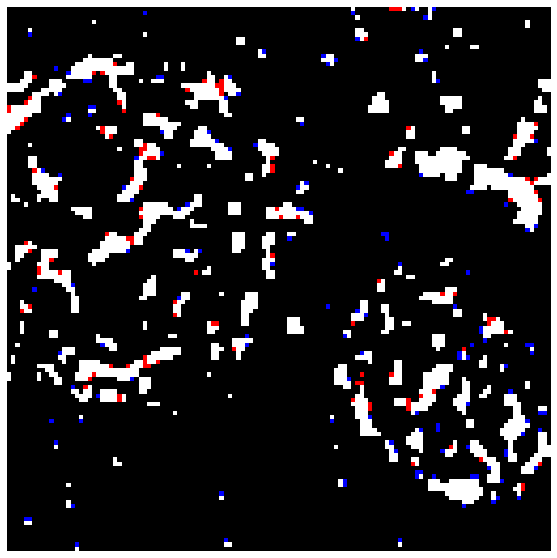

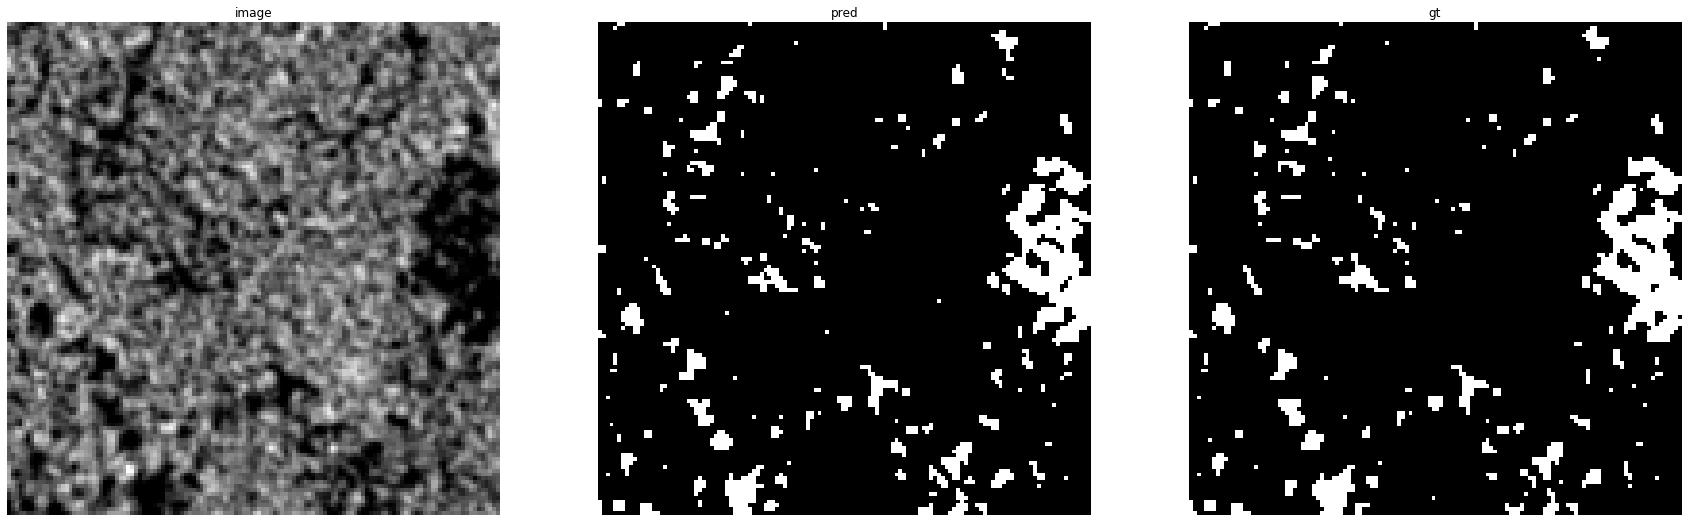

accuracy    : 0.9864501953125
precision   : 0.9188118811881189
recall      : 0.9336016096579477
f1          : 0.9261477045908184
pr_auc      : 0.9843738571871905
iou         : 0.862453531598513


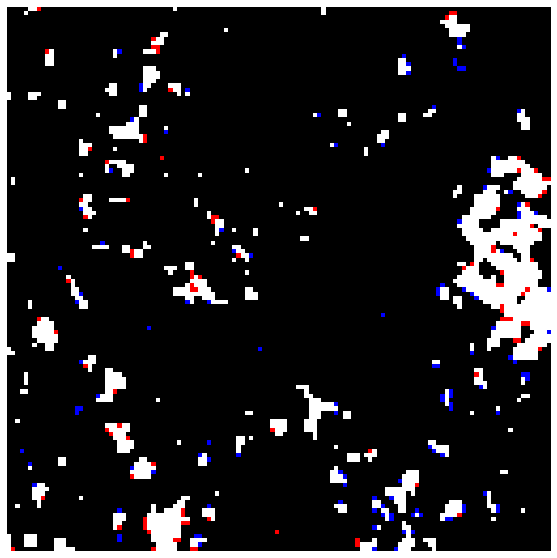

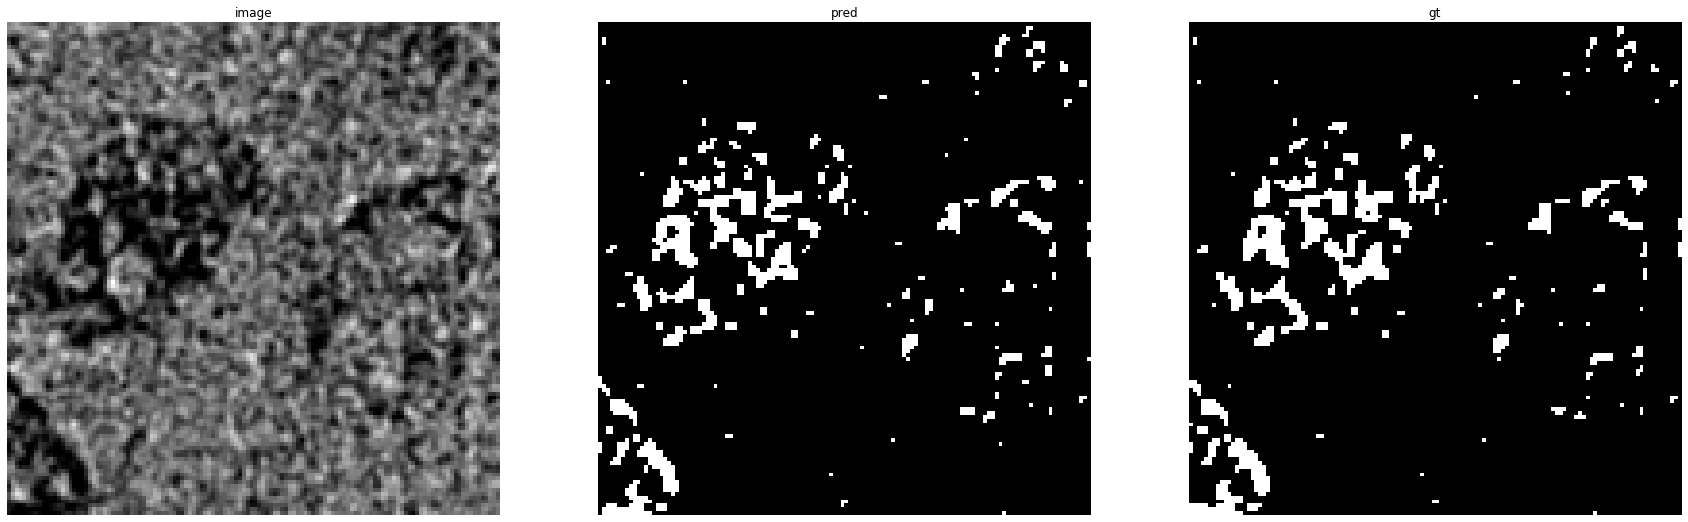

accuracy    : 0.98779296875
precision   : 0.9247594050743657
recall      : 0.9026473099914603
f1          : 0.9135695764909249
pr_auc      : 0.9768632962535058
iou         : 0.8408910103420844


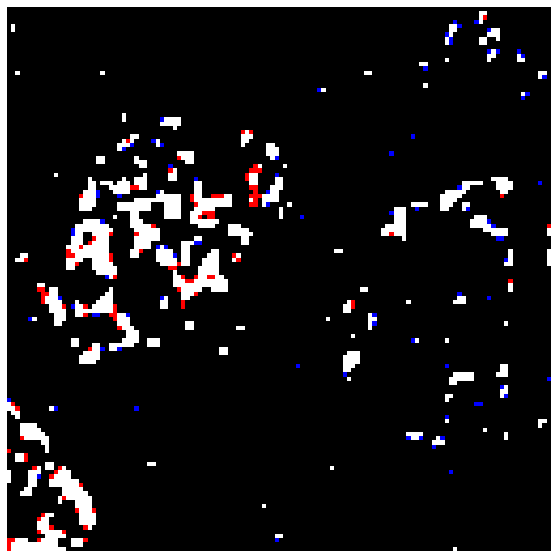

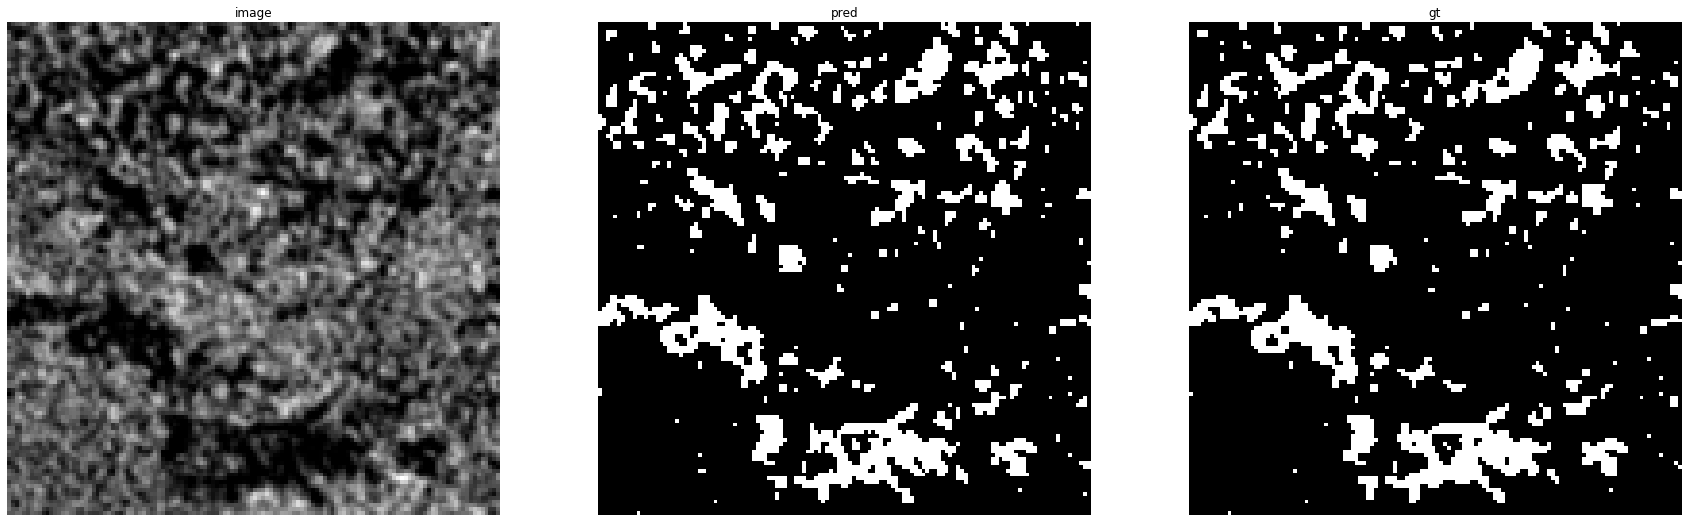

accuracy    : 0.97833251953125
precision   : 0.9288228392647634
recall      : 0.9321036106750392
f1          : 0.9304603330068559
pr_auc      : 0.9855553681532598
iou         : 0.86996336996337


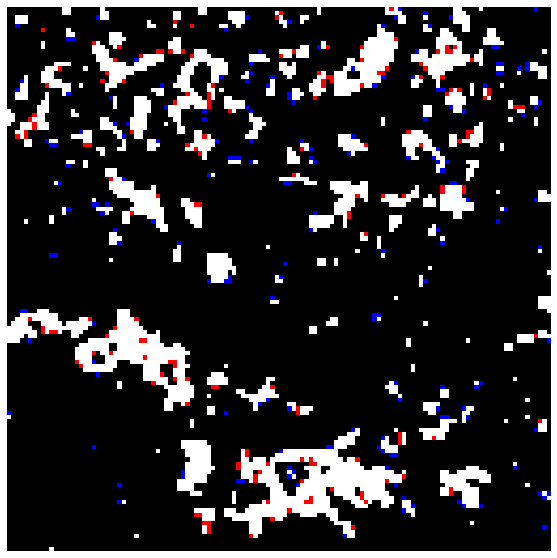

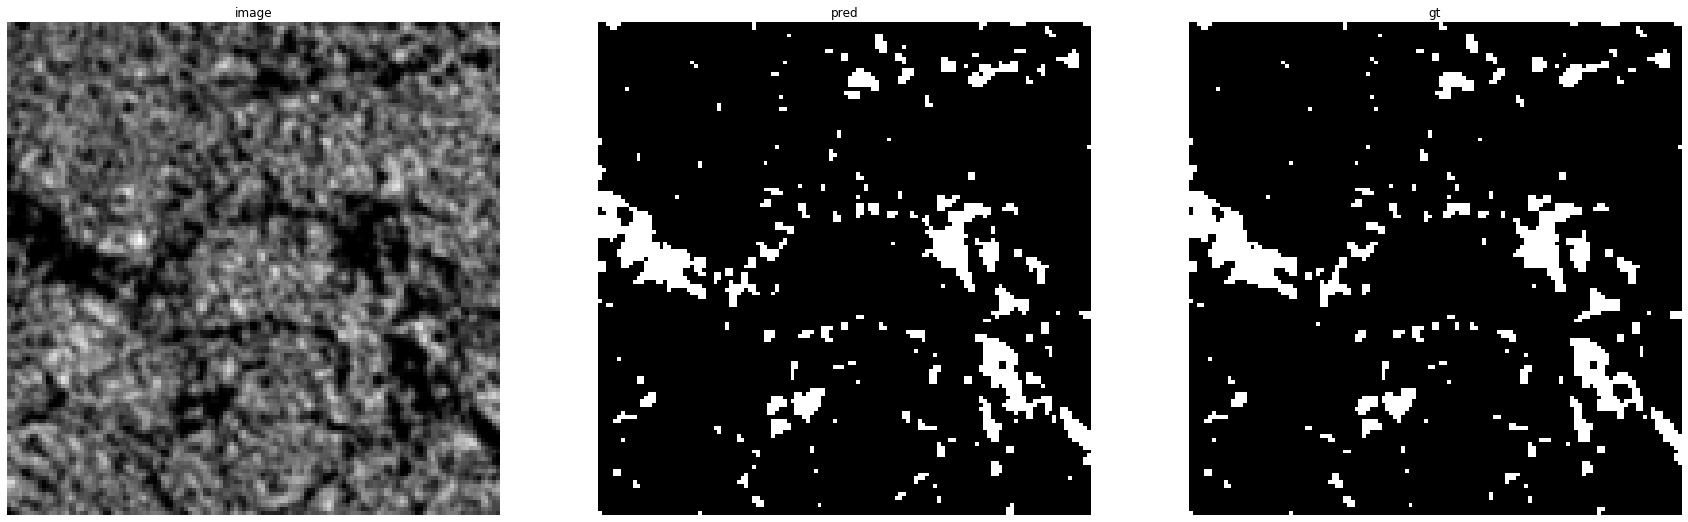

accuracy    : 0.98779296875
precision   : 0.9442601194426012
recall      : 0.9246263807667316
f1          : 0.9343401181877873
pr_auc      : 0.9842528658538928
iou         : 0.8767714109673445


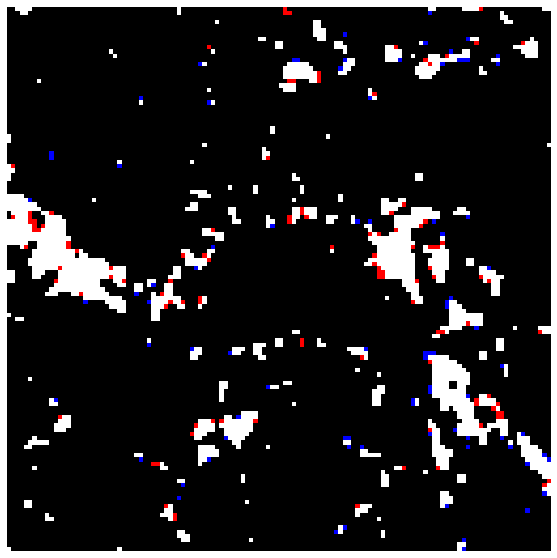

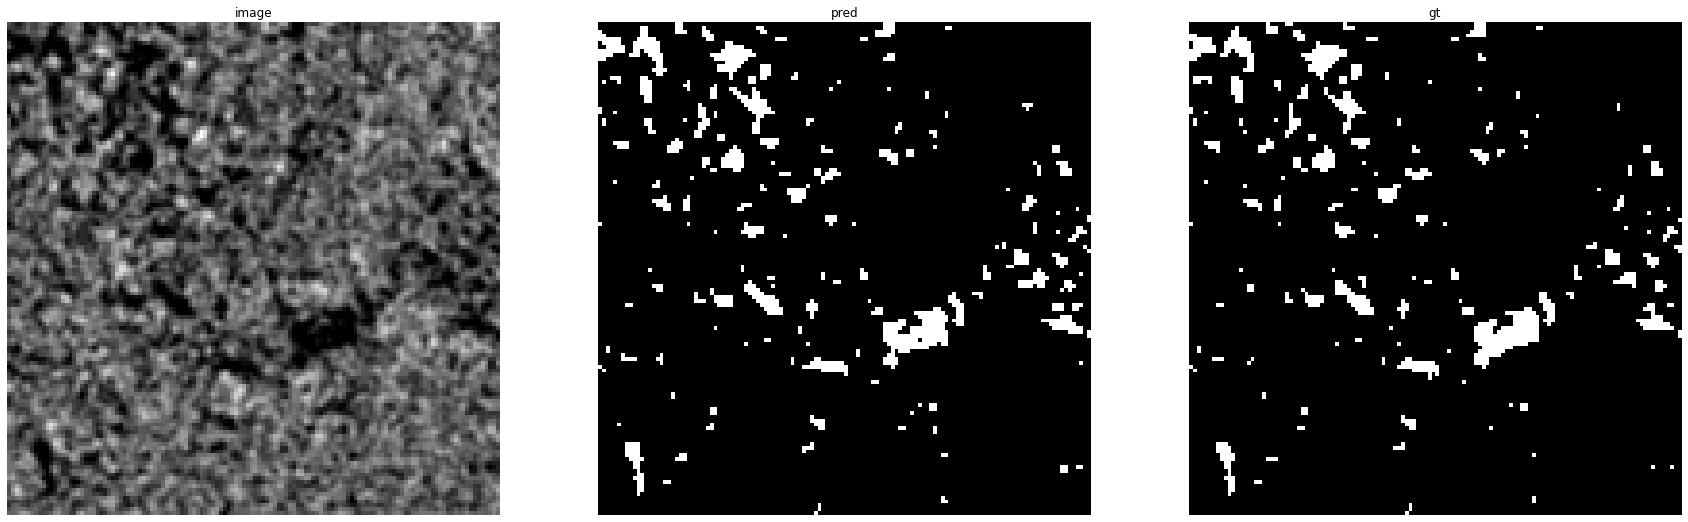

accuracy    : 0.98870849609375
precision   : 0.8784530386740331
recall      : 0.9473684210526315
f1          : 0.9116101290014333
pr_auc      : 0.9802878315019473
iou         : 0.8375768217734855


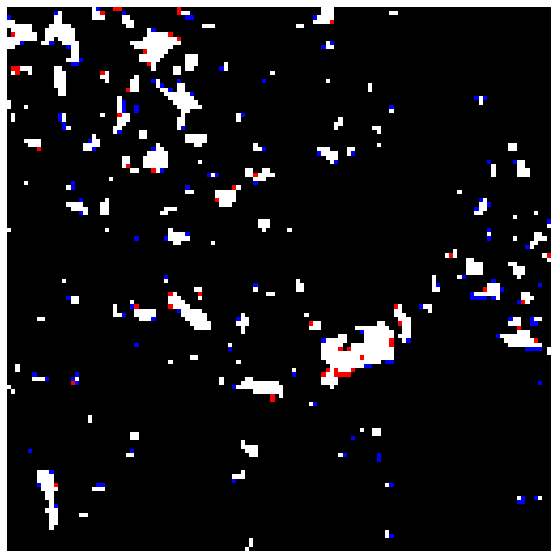

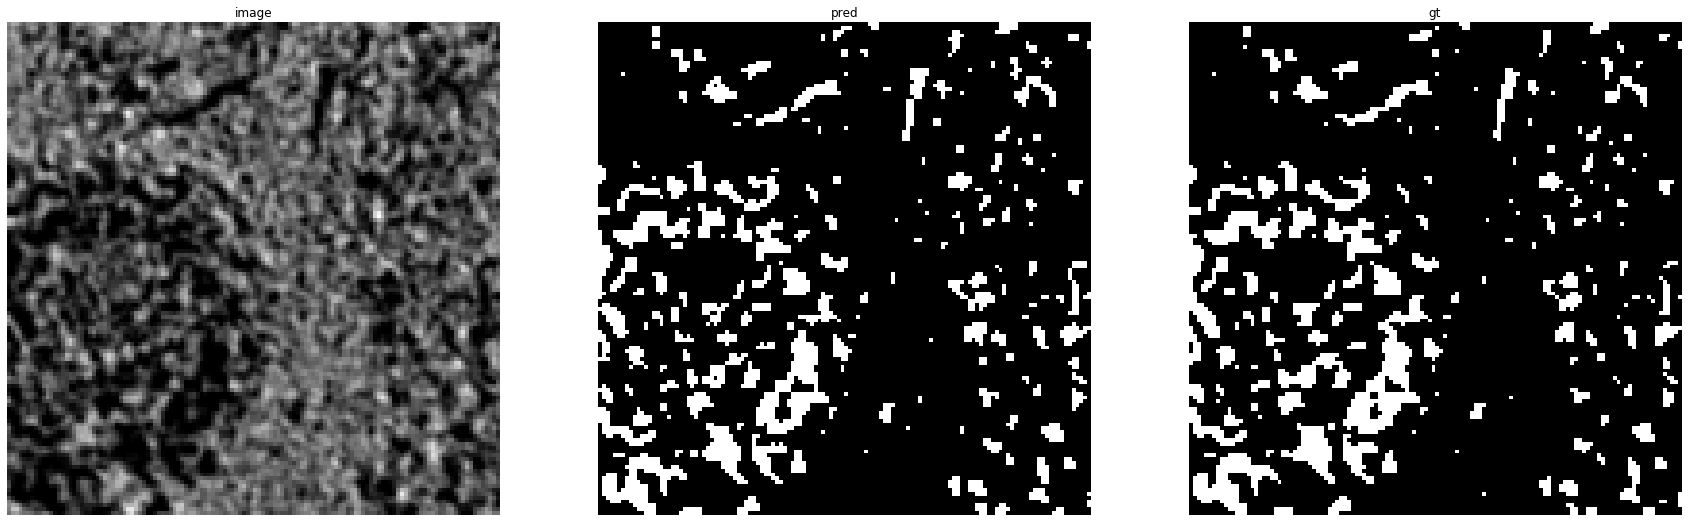

accuracy    : 0.97900390625
precision   : 0.9337199668599834
recall      : 0.9245283018867925
f1          : 0.9291014014839241
pr_auc      : 0.9831716230638913
iou         : 0.867590454195535


Prediction for SPE_carb10_58_box3:


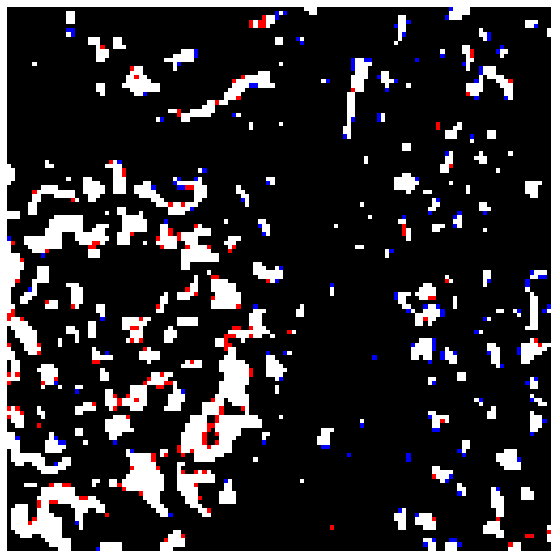

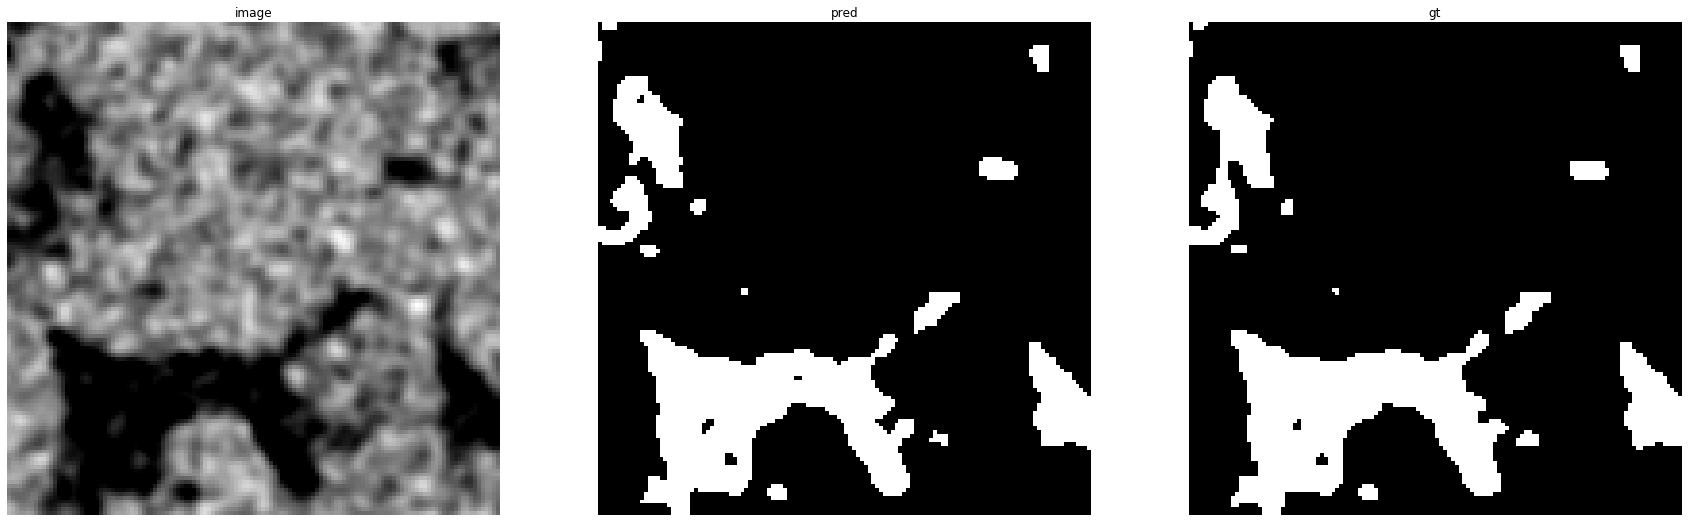

accuracy    : 0.9903564453125
precision   : 0.9840029761904762
recall      : 0.9583333333333334
f1          : 0.9709985315712187
pr_auc      : 0.9976957650985252
iou         : 0.9436318230467357


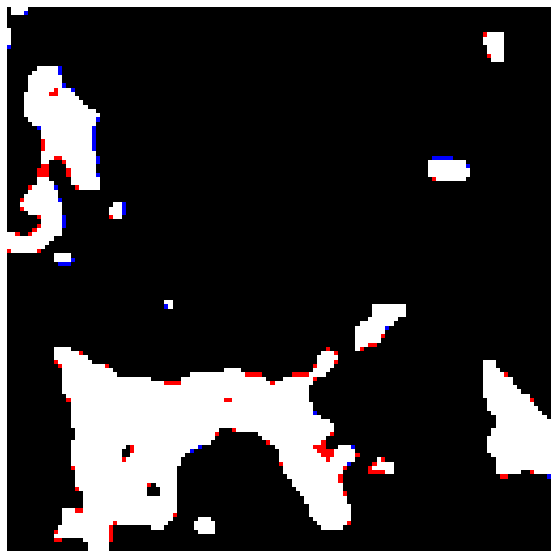

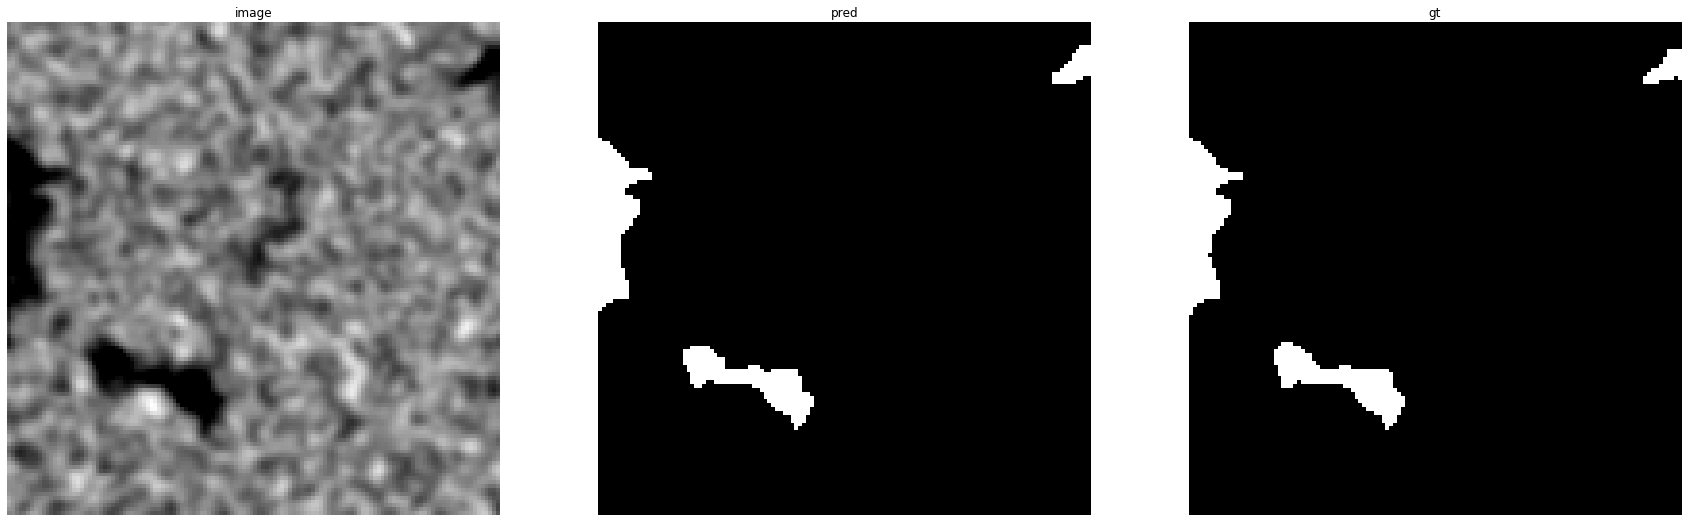

accuracy    : 0.9981689453125
precision   : 0.9774096385542169
recall      : 0.9774096385542169
f1          : 0.9774096385542169
pr_auc      : 0.9977309242085988
iou         : 0.9558173784977909


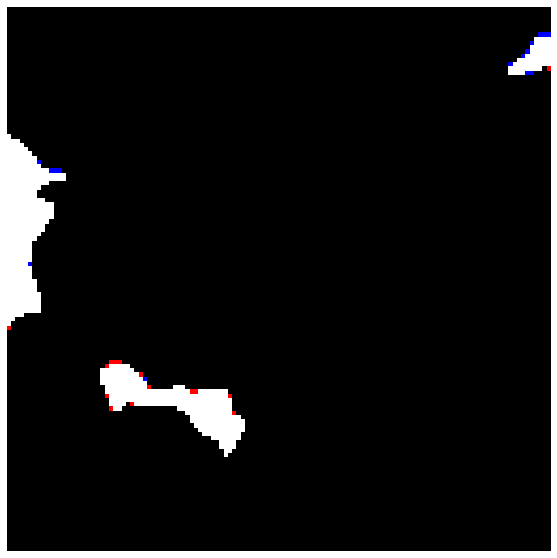

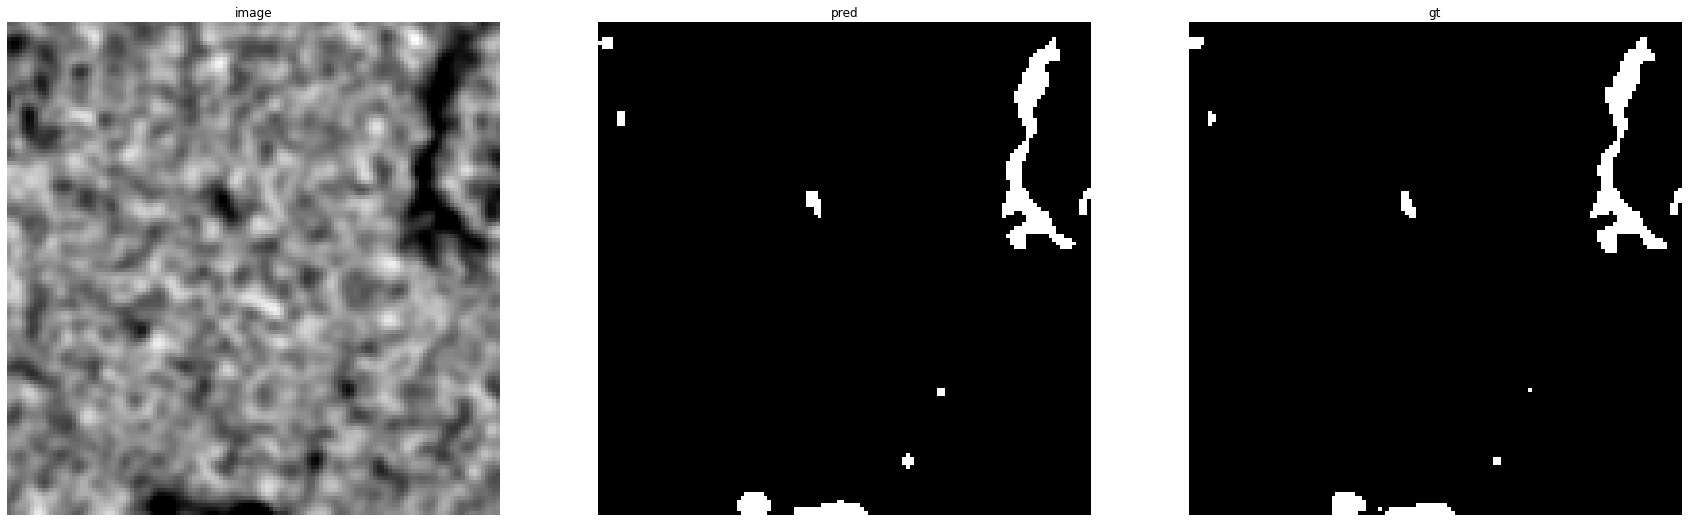

accuracy    : 0.99578857421875
precision   : 0.922077922077922
recall      : 0.9281045751633987
f1          : 0.9250814332247557
pr_auc      : 0.9807893267783794
iou         : 0.8606060606060606


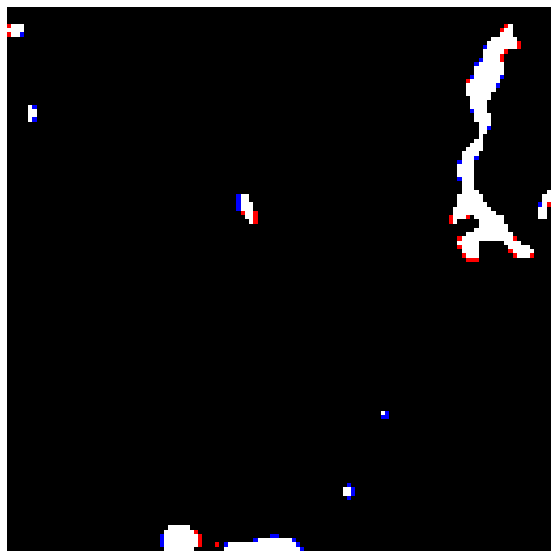

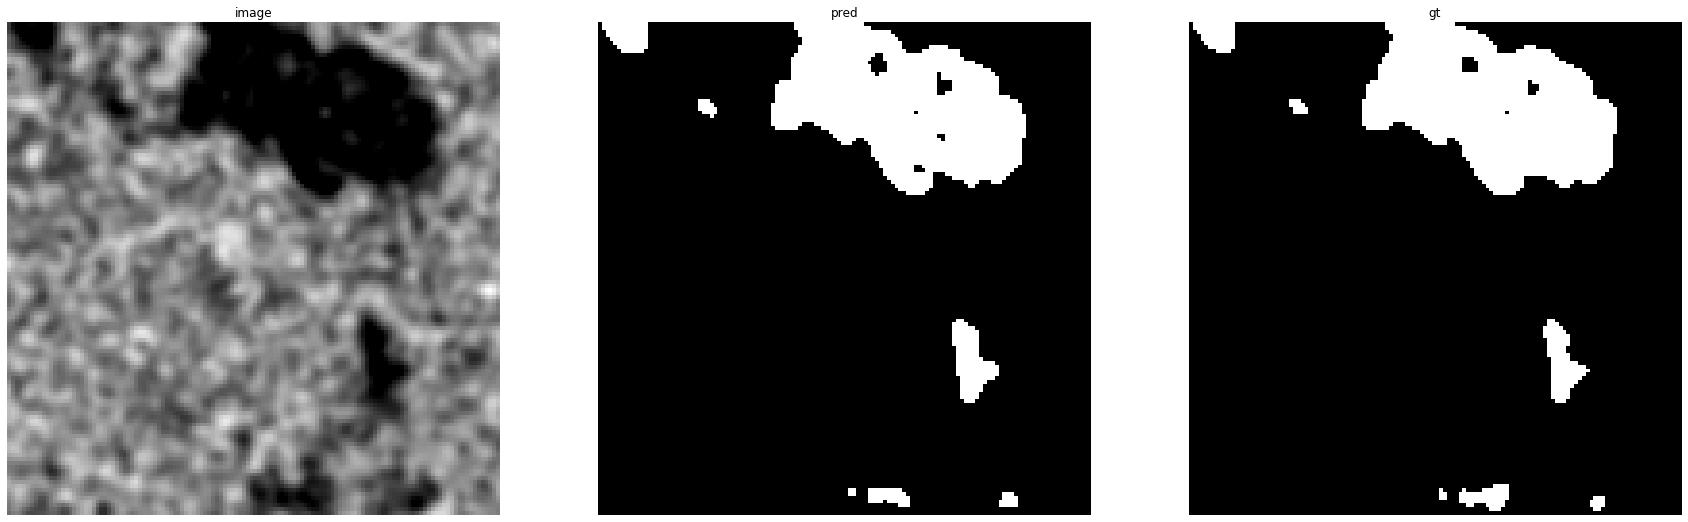

accuracy    : 0.992431640625
precision   : 0.9765301426599171
recall      : 0.966742596810934
f1          : 0.9716117216117216
pr_auc      : 0.998110699563562
iou         : 0.9447907390917186


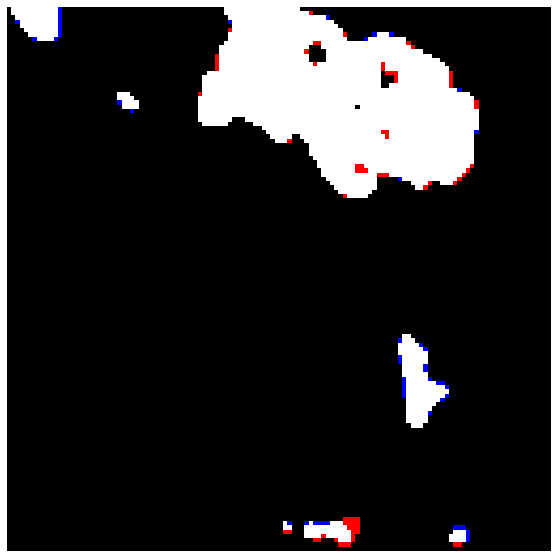

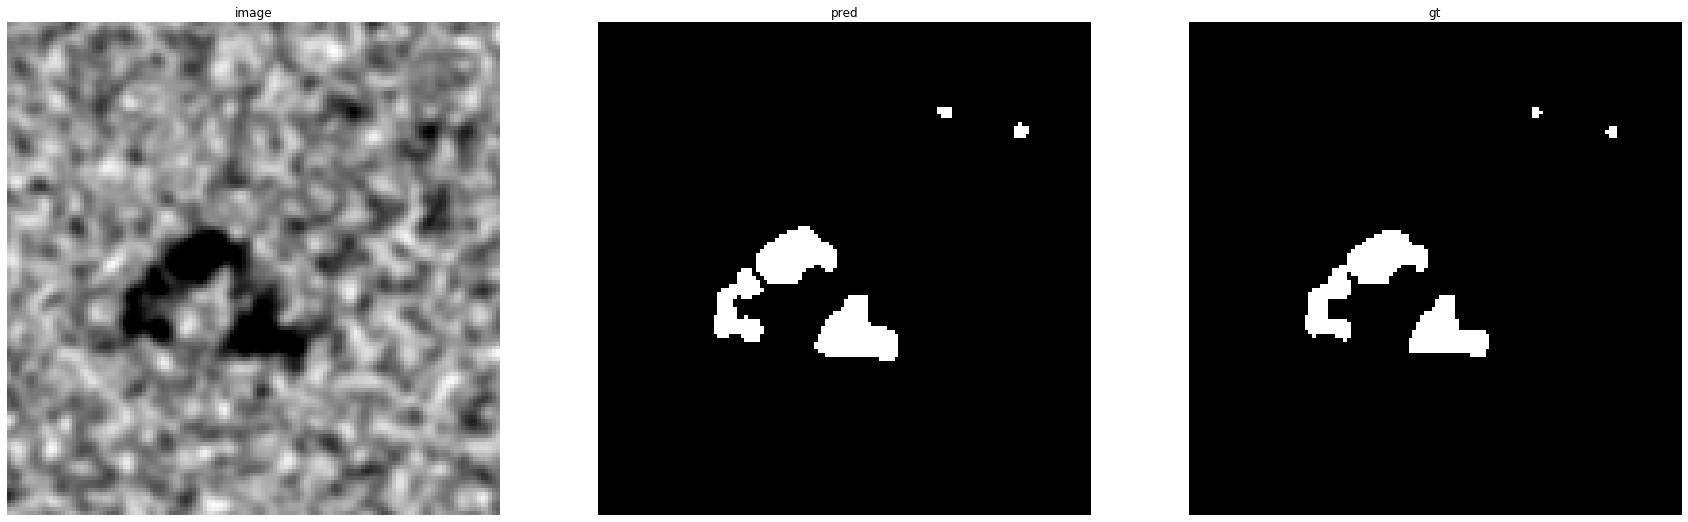

accuracy    : 0.99505615234375
precision   : 0.8803278688524591
recall      : 0.9853211009174312
f1          : 0.9298701298701298
pr_auc      : 0.9917751375834336
iou         : 0.8689320388349514


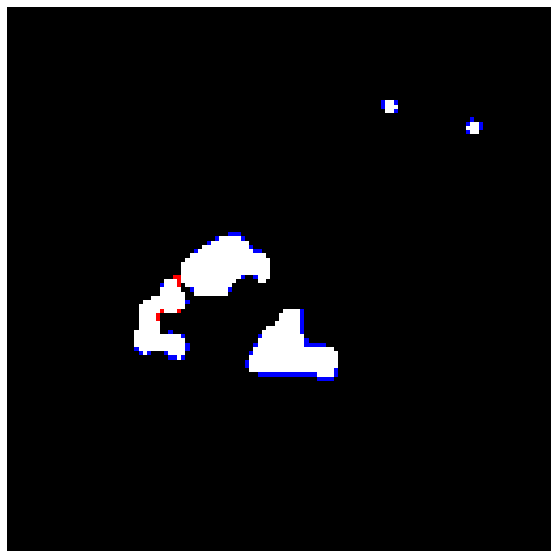

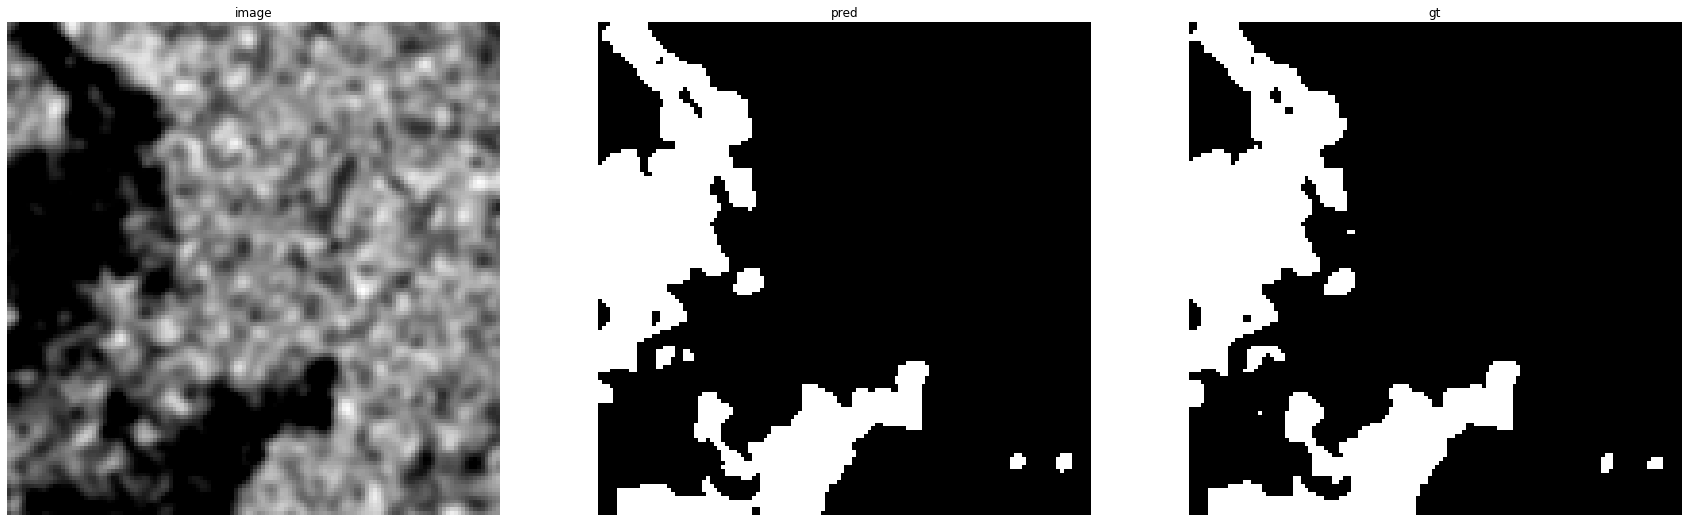

accuracy    : 0.990478515625
precision   : 0.9938089622641509
recall      : 0.9614945807187678
f1          : 0.9773847492026674
pr_auc      : 0.9990486520738583
iou         : 0.9557697760136094


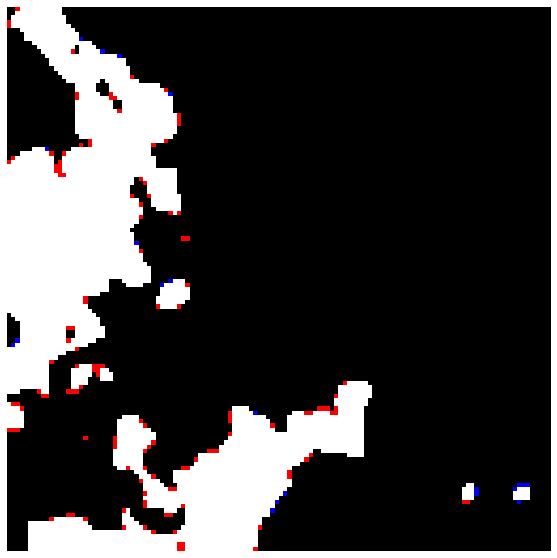

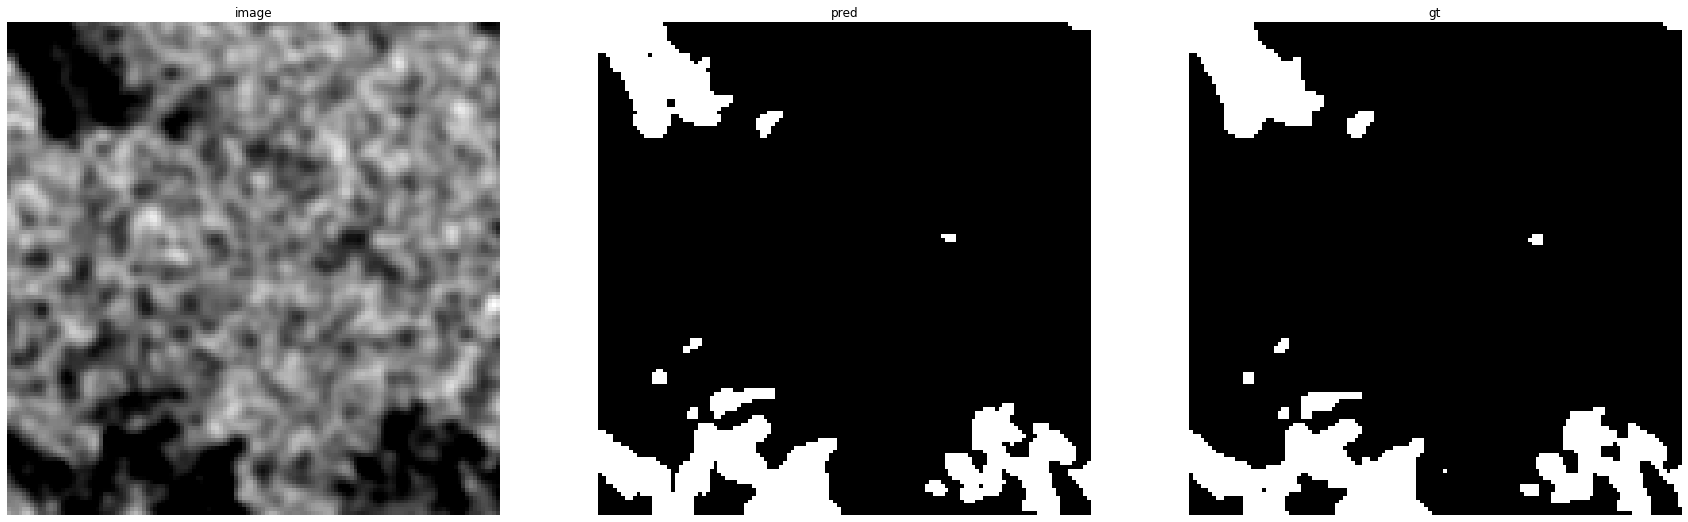

accuracy    : 0.9857177734375
precision   : 0.94141689373297
recall      : 0.9517906336088154
f1          : 0.9465753424657535
pr_auc      : 0.992667218201245
iou         : 0.8985695708712613


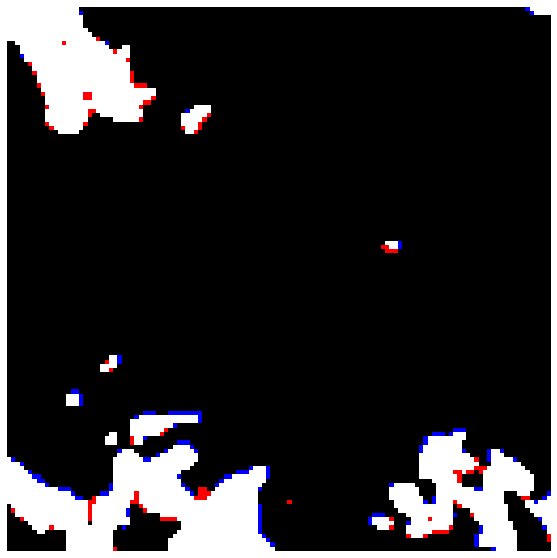

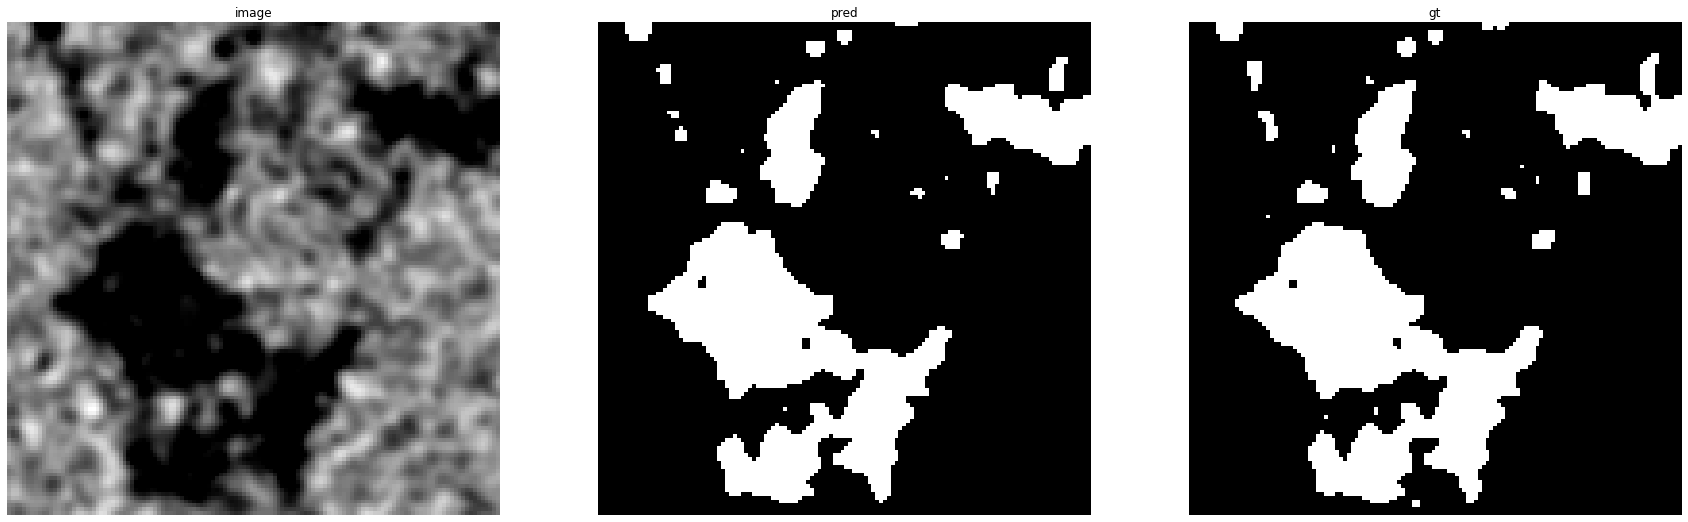

accuracy    : 0.9896240234375
precision   : 0.994568324757004
recall      : 0.9584022038567493
f1          : 0.9761503928170595
pr_auc      : 0.9990801364768153
iou         : 0.9534118936694985


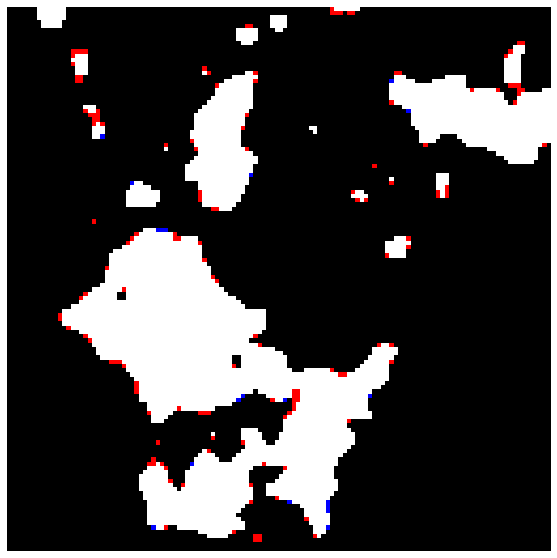

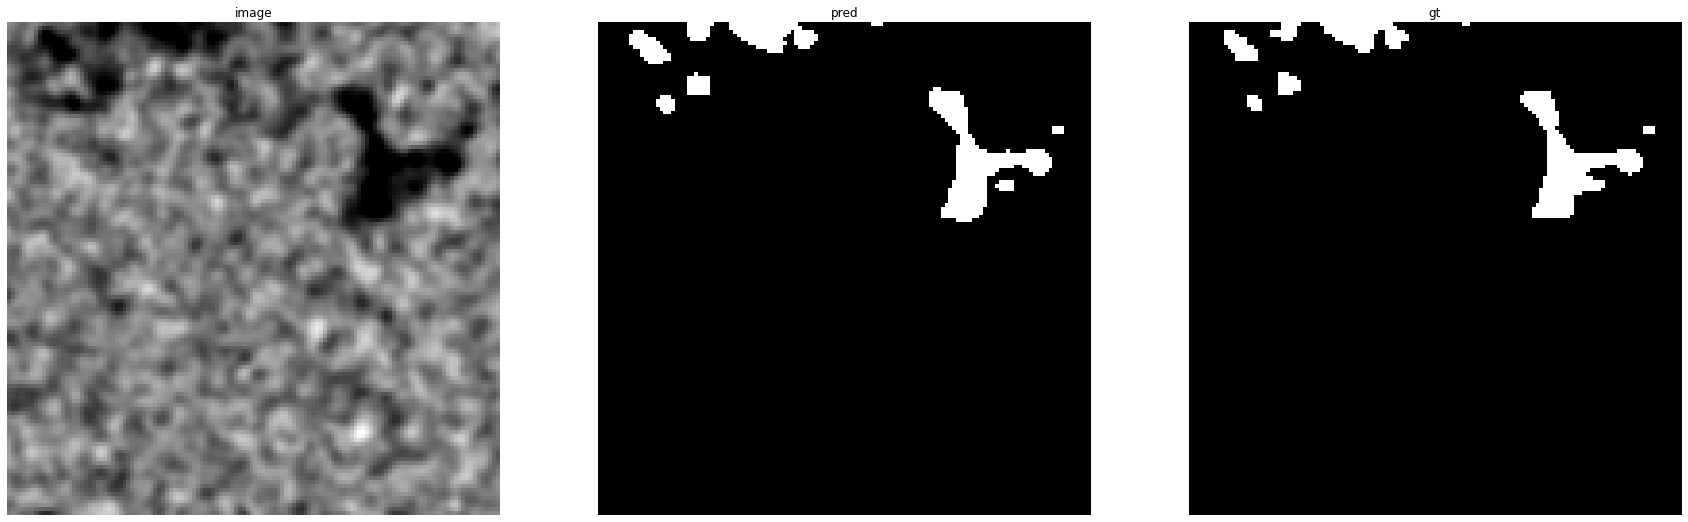

accuracy    : 0.9945068359375
precision   : 0.8982511923688394
recall      : 0.9560067681895094
f1          : 0.9262295081967213
pr_auc      : 0.9877420450994856
iou         : 0.8625954198473282


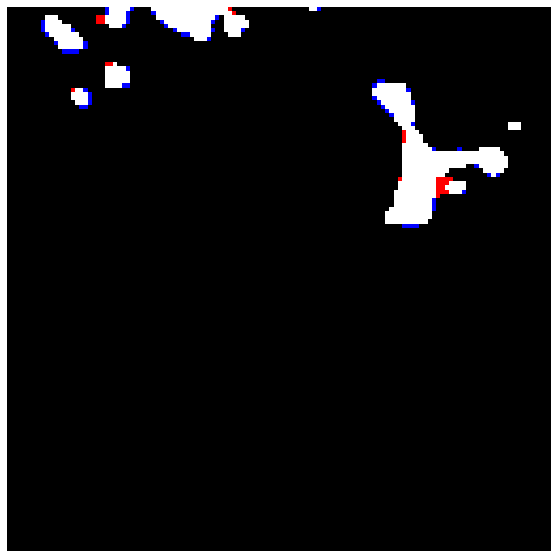

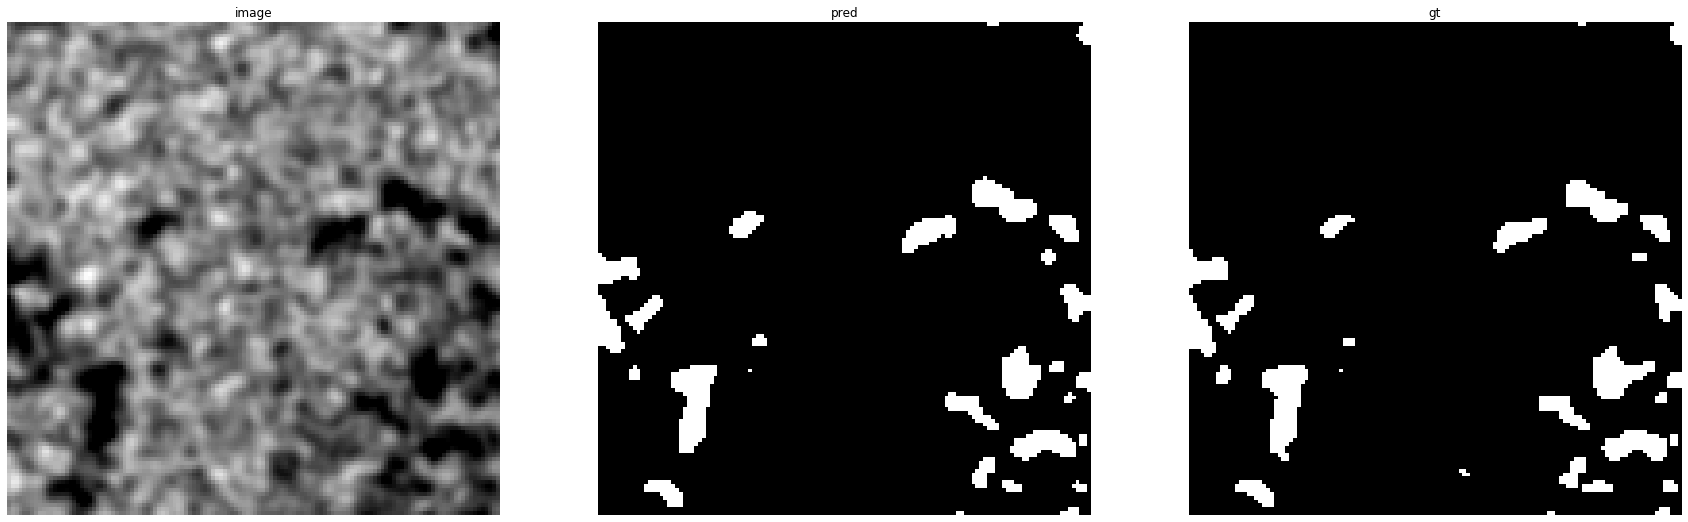

accuracy    : 0.99127197265625
precision   : 0.9310970081595649
recall      : 0.9387568555758684
f1          : 0.9349112426035503
pr_auc      : 0.9878169079302351
iou         : 0.8777777777777778


Prediction for SoilAh-1:


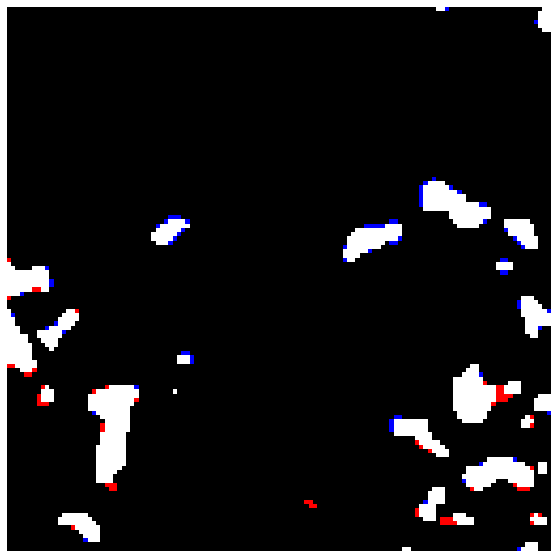

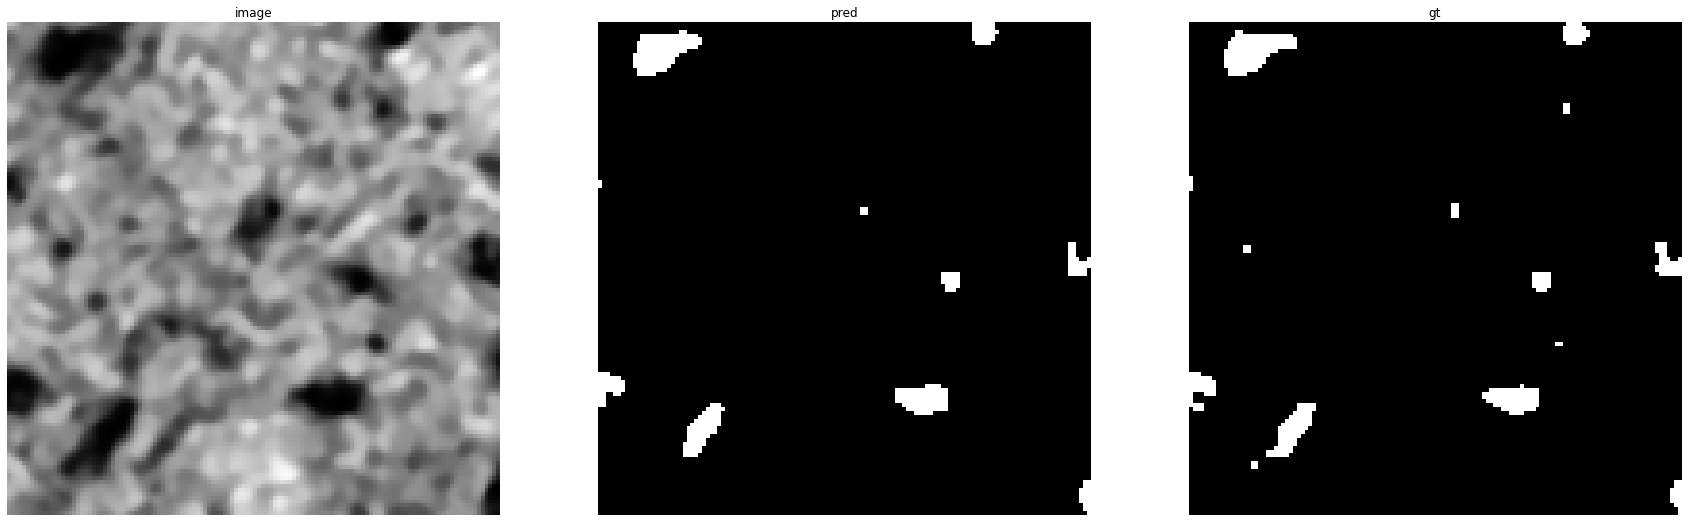

accuracy    : 0.99566650390625
precision   : 0.9611231101511879
recall      : 0.893574297188755
f1          : 0.9261186264308012
pr_auc      : 0.9806850639635409
iou         : 0.8624031007751938


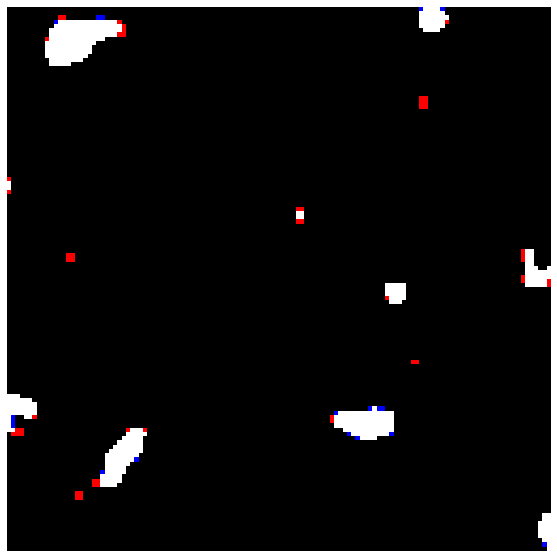

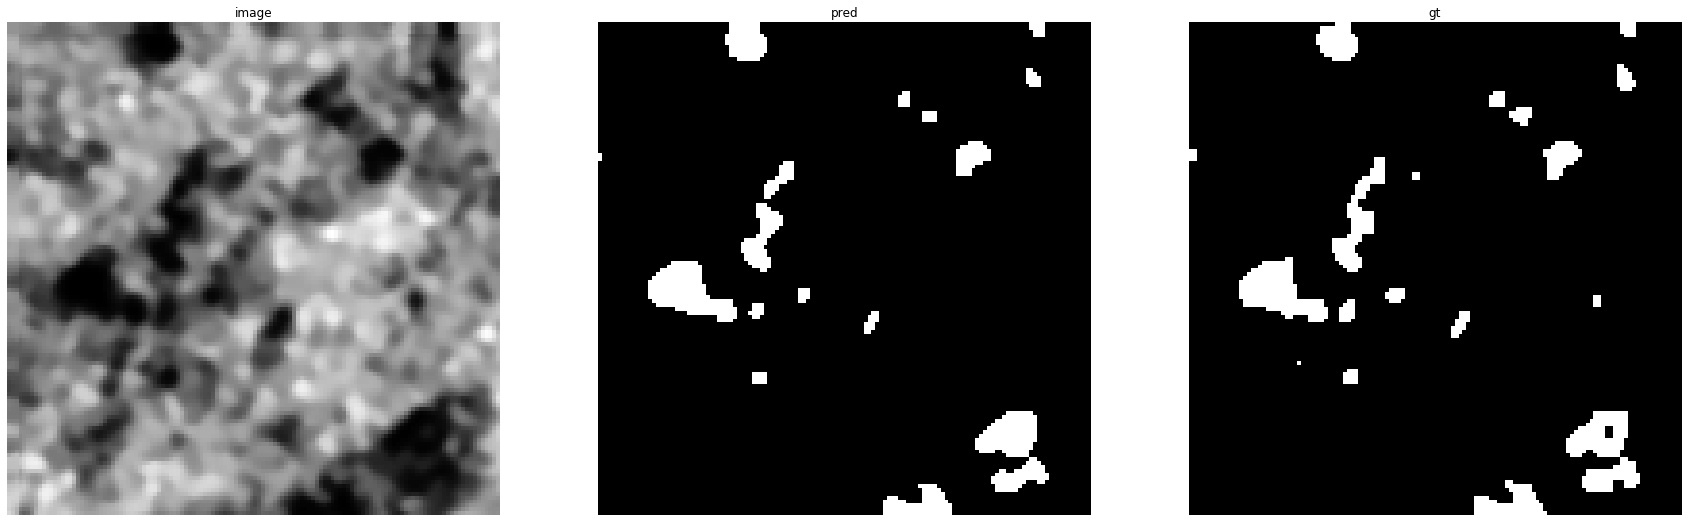

accuracy    : 0.9915771484375
precision   : 0.9757442116868799
recall      : 0.8841158841158842
f1          : 0.9276729559748429
pr_auc      : 0.9879057039973418
iou         : 0.8651026392961877


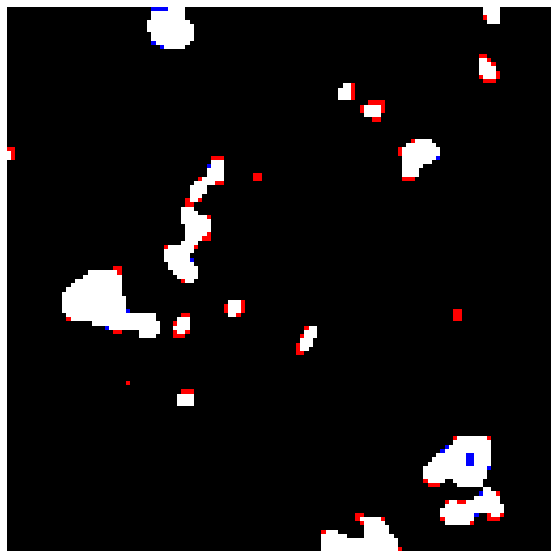

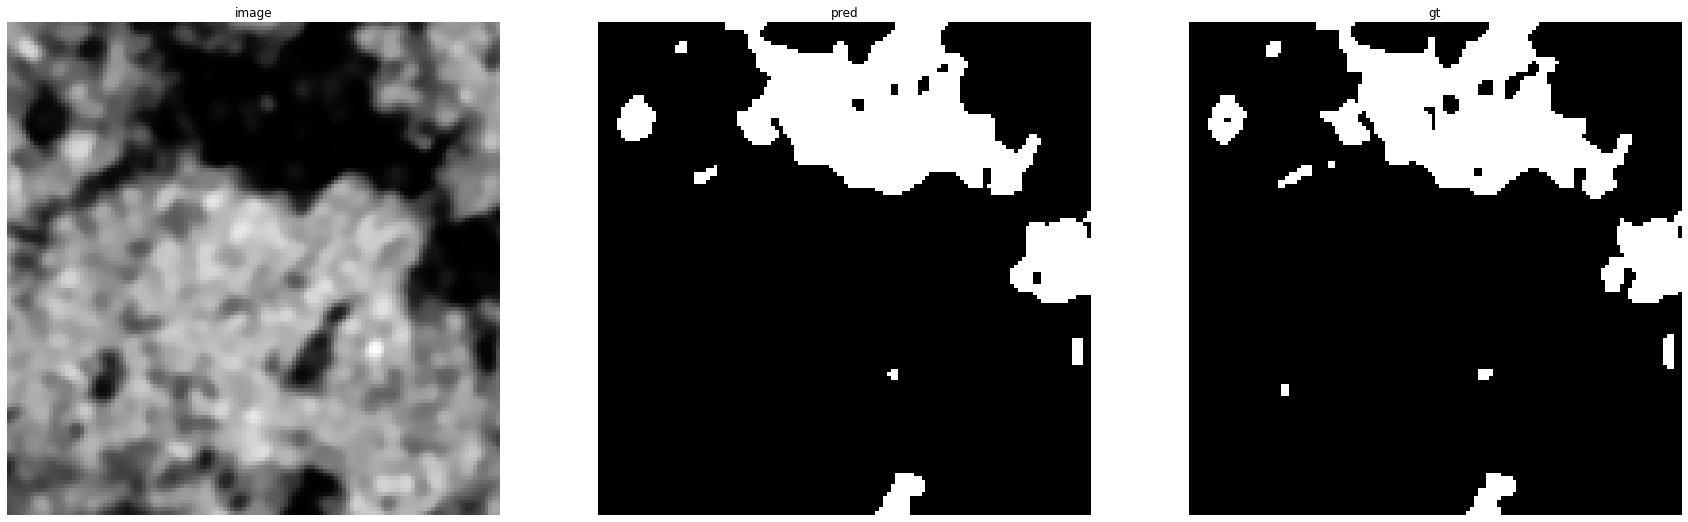

accuracy    : 0.98687744140625
precision   : 0.9412205166604268
recall      : 0.9774494556765163
f1          : 0.9589929429715811
pr_auc      : 0.9958877333138633
iou         : 0.9212165628435325


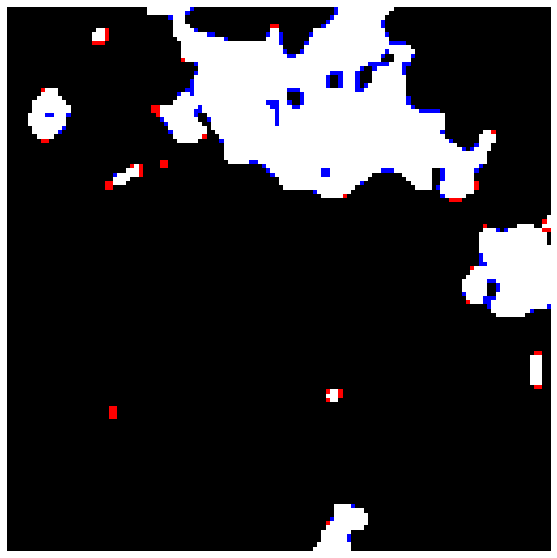

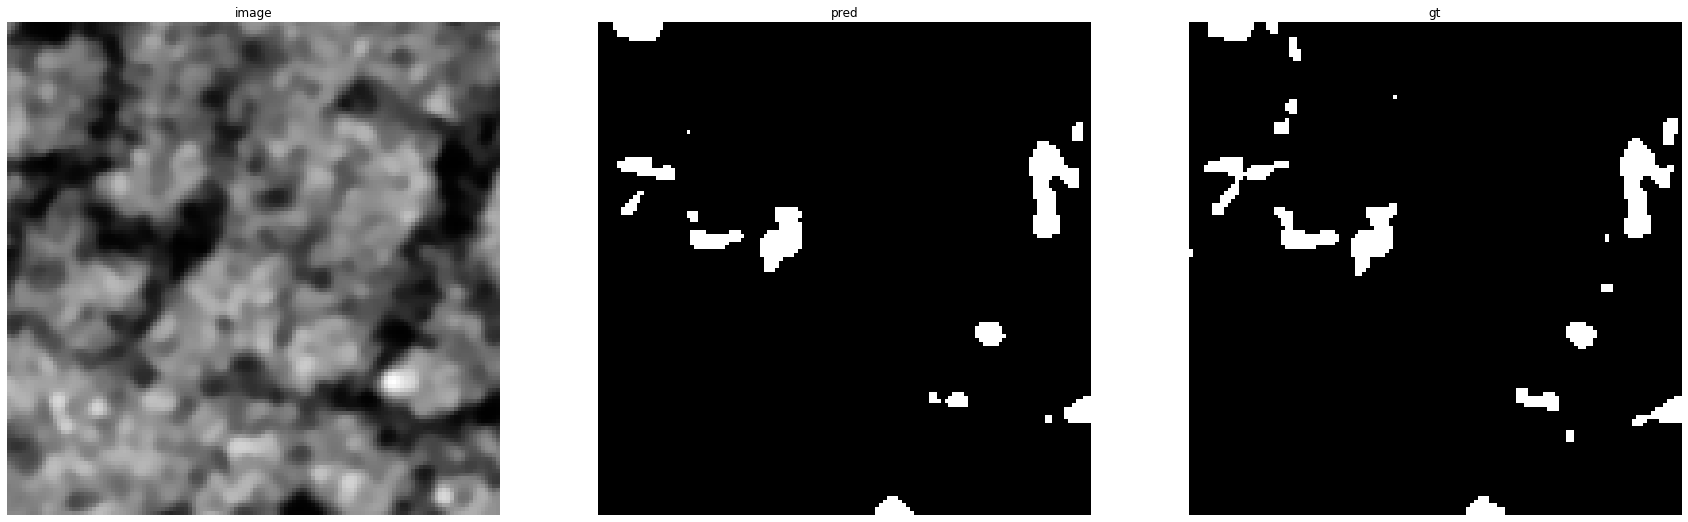

accuracy    : 0.9888916015625
precision   : 0.9798136645962733
recall      : 0.78875
f1          : 0.8739612188365651
pr_auc      : 0.9789545528830434
iou         : 0.7761377613776138


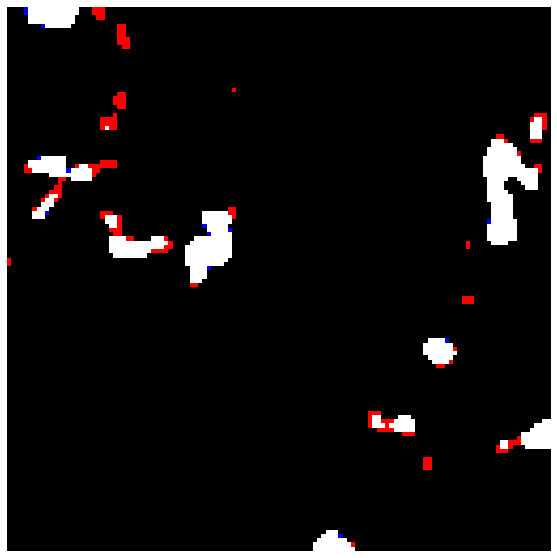

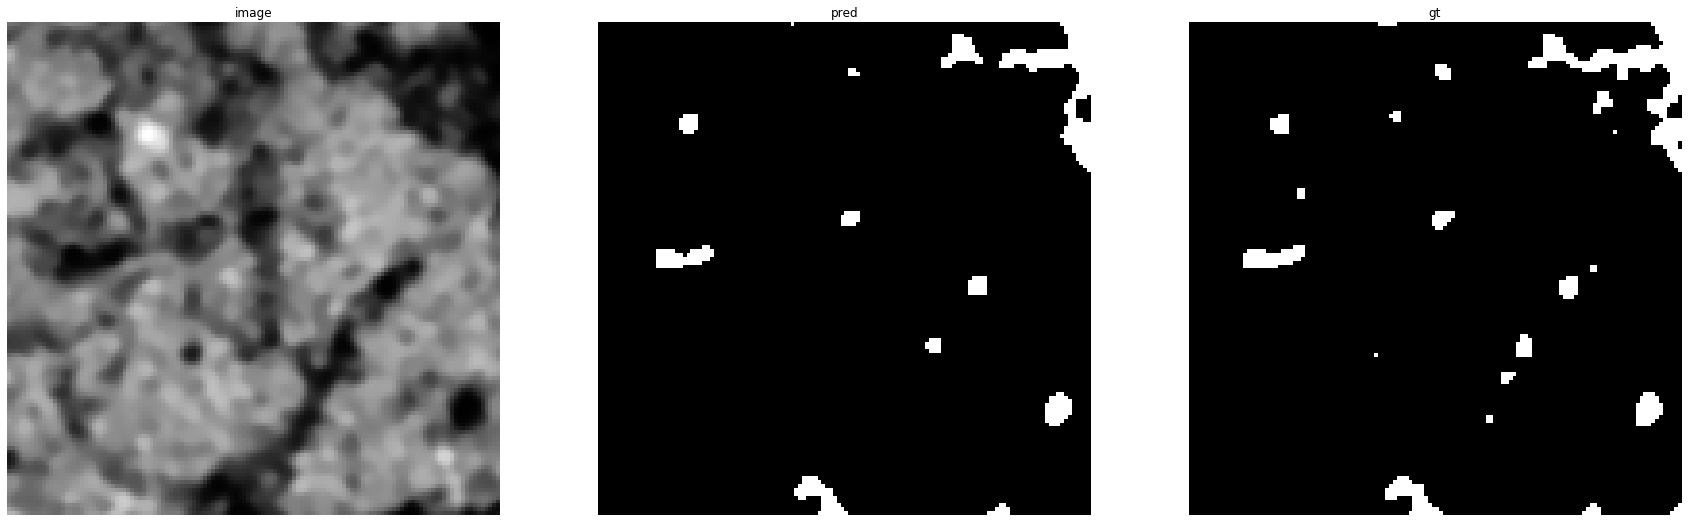

accuracy    : 0.98980712890625
precision   : 0.976271186440678
recall      : 0.7901234567901234
f1          : 0.8733889310083396
pr_auc      : 0.975534400065313
iou         : 0.775235531628533


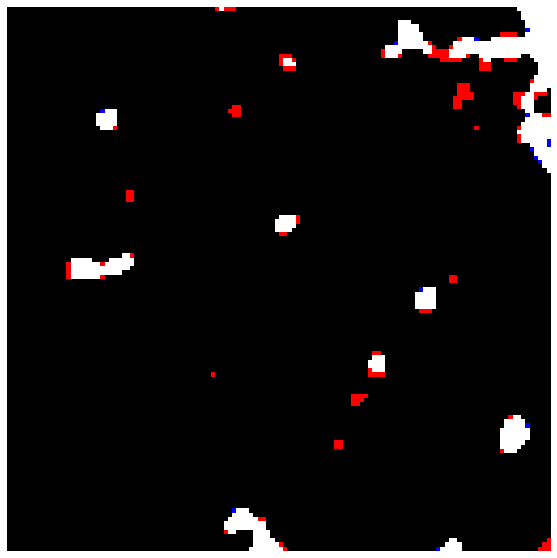

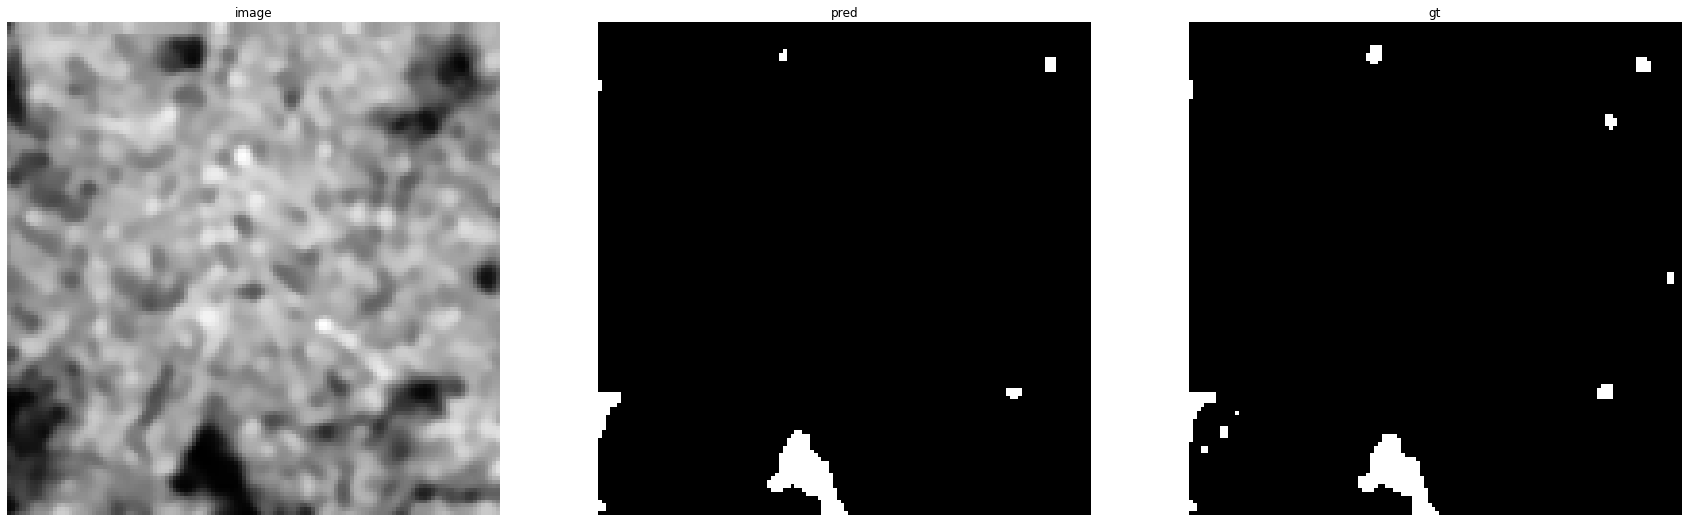

accuracy    : 0.9957275390625
precision   : 0.9395017793594306
recall      : 0.832807570977918
f1          : 0.882943143812709
pr_auc      : 0.9769536998834745
iou         : 0.7904191616766467


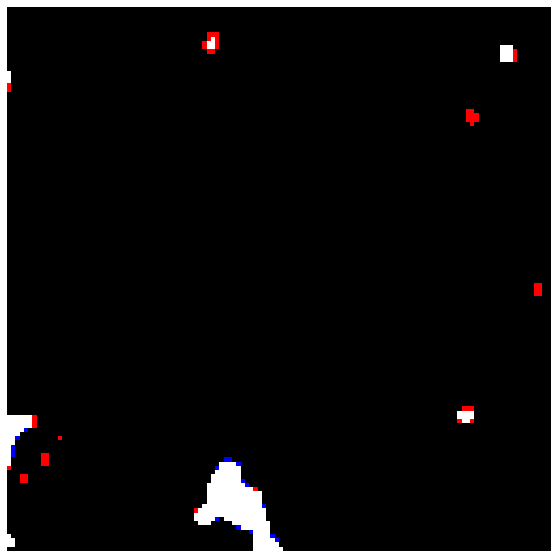

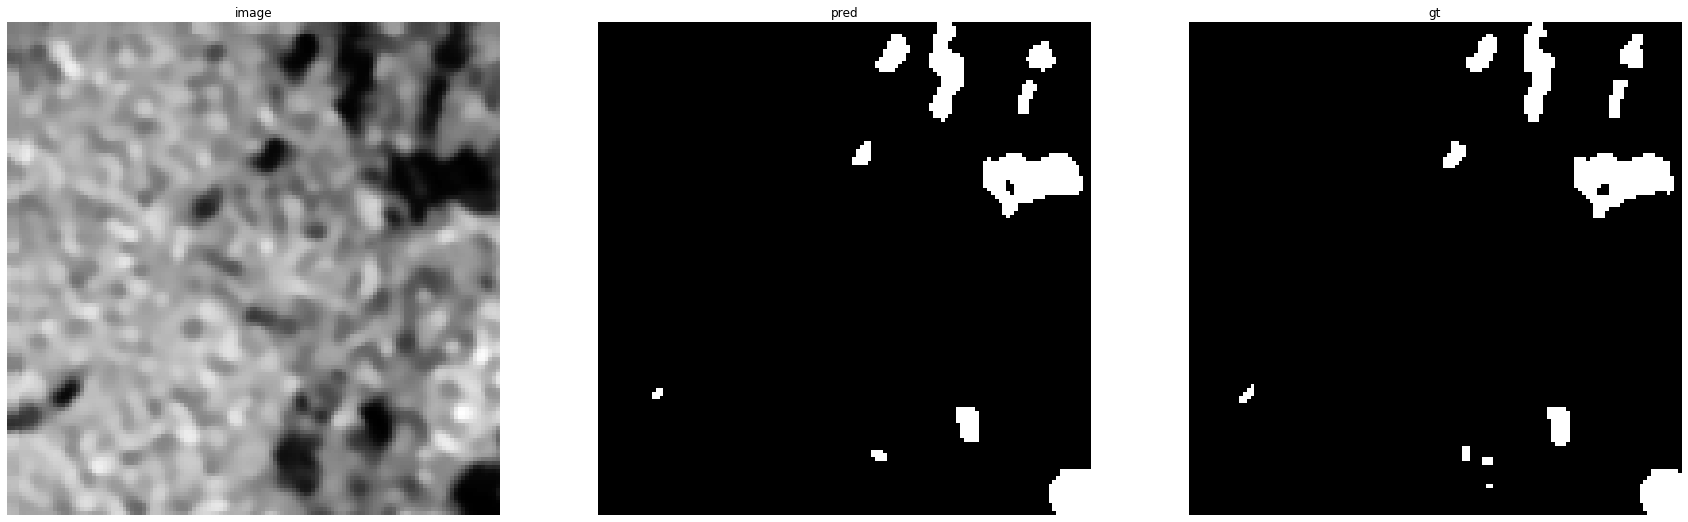

accuracy    : 0.99383544921875
precision   : 0.9351851851851852
recall      : 0.9314888010540184
f1          : 0.9333333333333333
pr_auc      : 0.986087006301136
iou         : 0.875


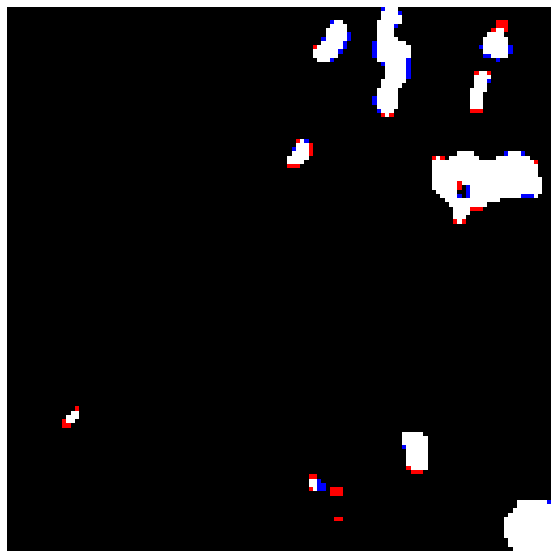

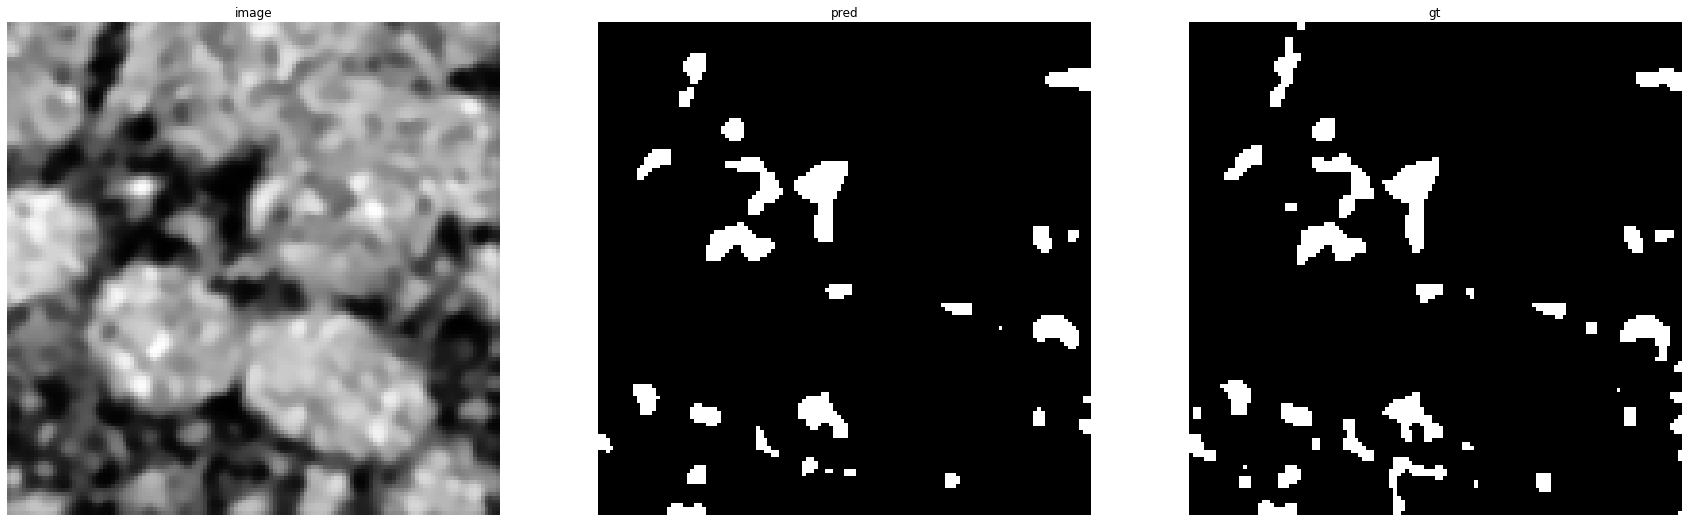

accuracy    : 0.980712890625
precision   : 0.9696663296258847
recall      : 0.770281124497992
f1          : 0.8585496866606984
pr_auc      : 0.968746264016157
iou         : 0.7521568627450981


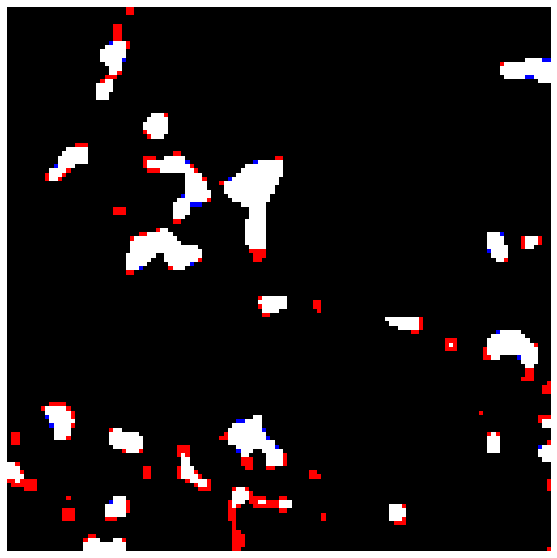

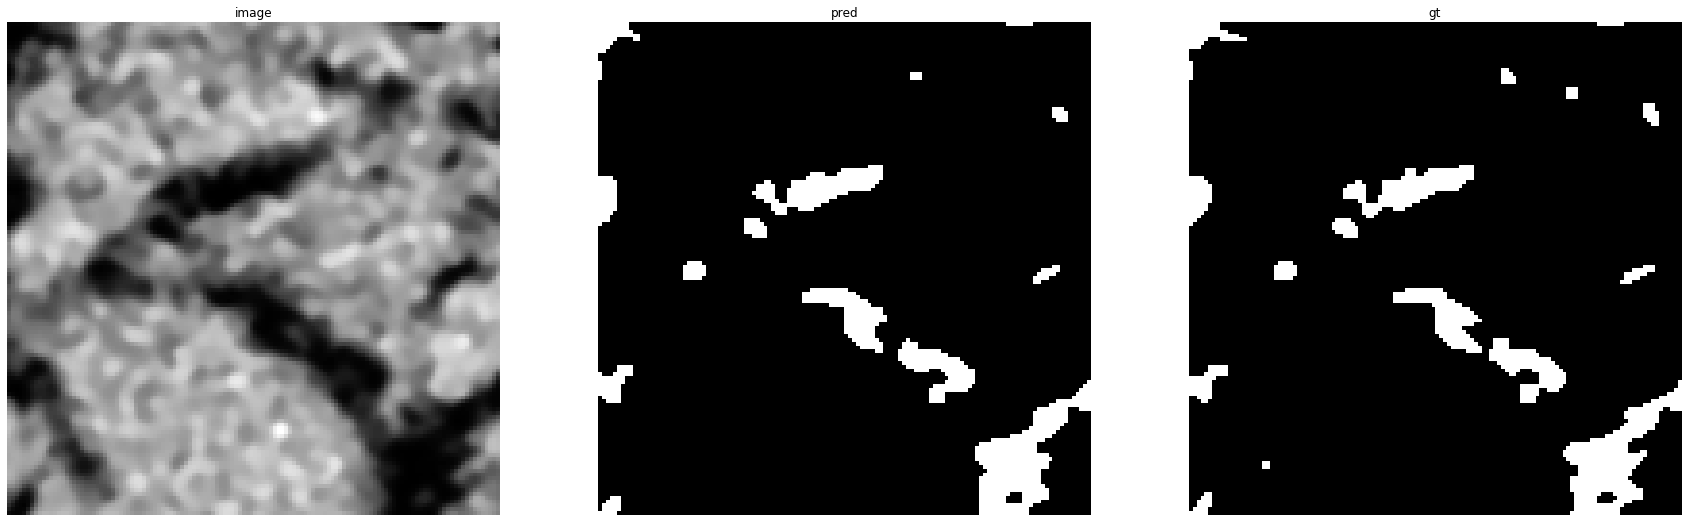

accuracy    : 0.99114990234375
precision   : 0.9552117263843648
recall      : 0.9287410926365796
f1          : 0.941790445604175
pr_auc      : 0.9913058198229776
iou         : 0.8899848254931715


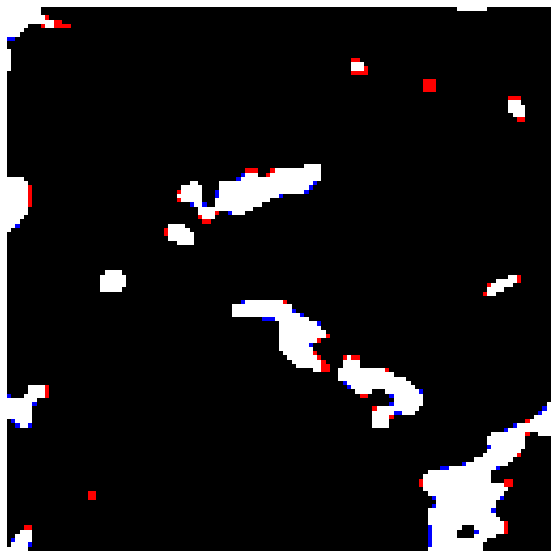

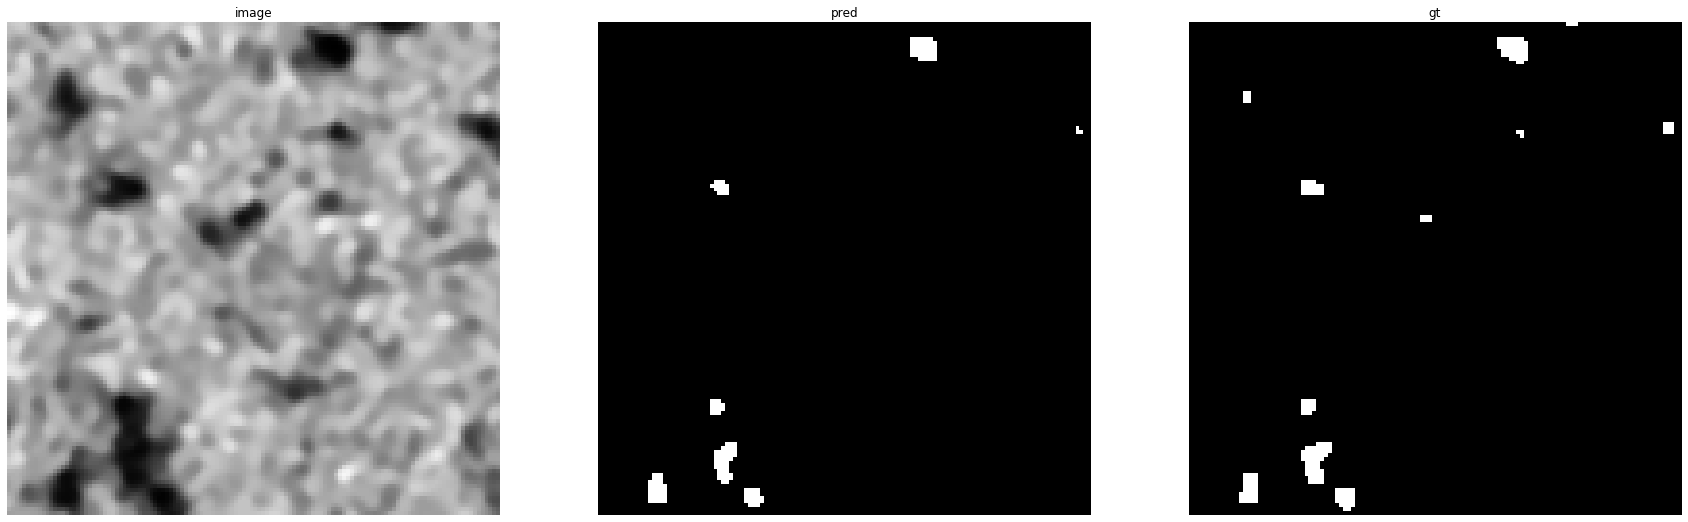

accuracy    : 0.99627685546875
precision   : 0.9825581395348837
recall      : 0.7444933920704846
f1          : 0.8471177944862155
pr_auc      : 0.9620917560164951
iou         : 0.7347826086956522


Prediction for SoilB-2:


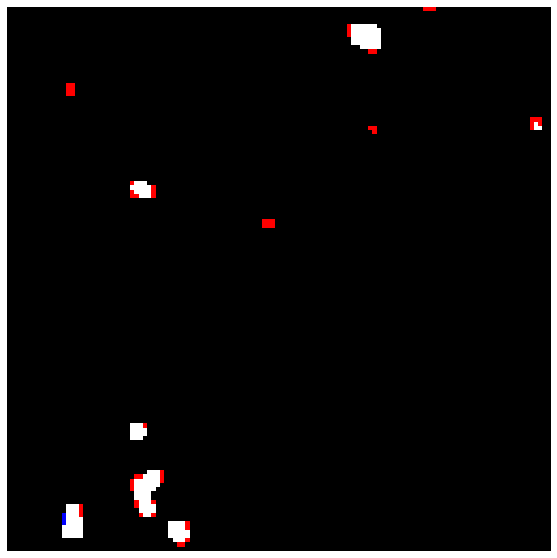

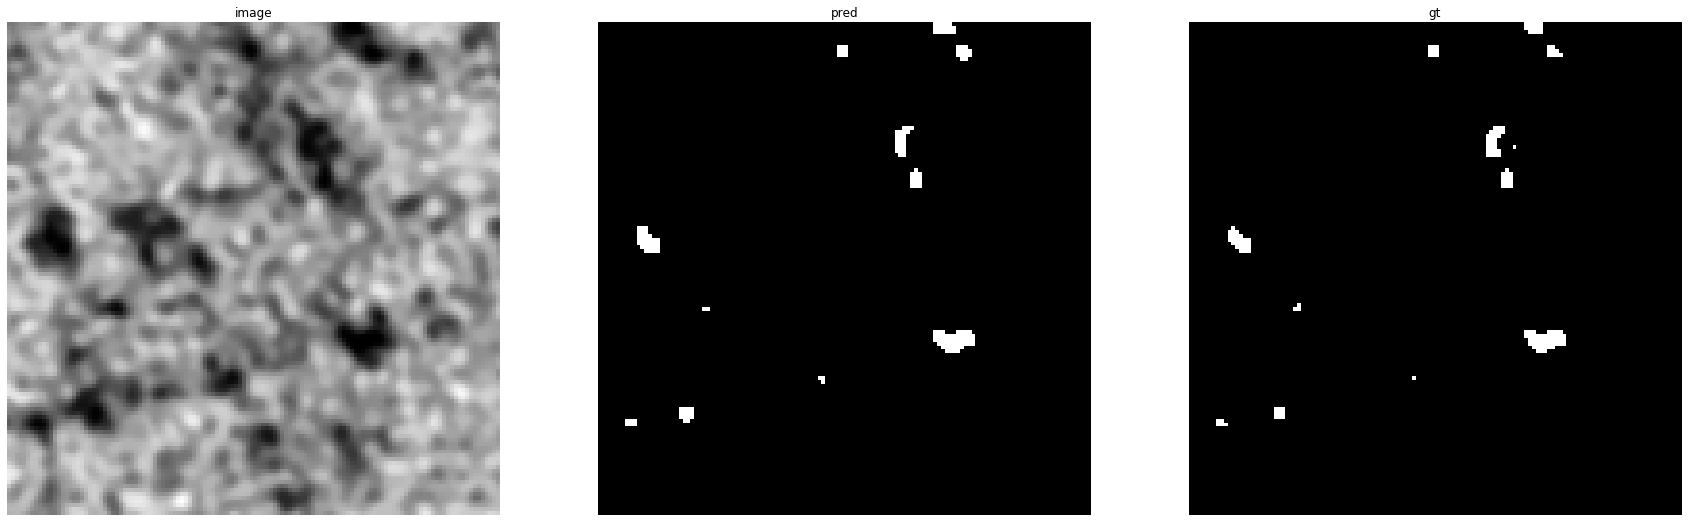

accuracy    : 0.9981689453125
precision   : 0.8729281767955801
recall      : 0.9575757575757575
f1          : 0.9132947976878613
pr_auc      : 0.9840801414987128
iou         : 0.8404255319148937


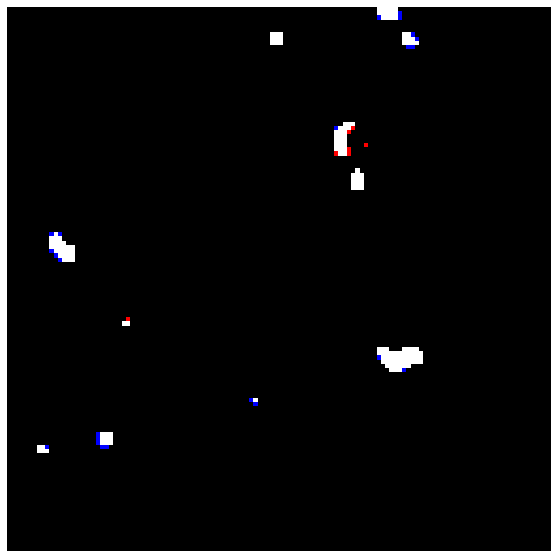

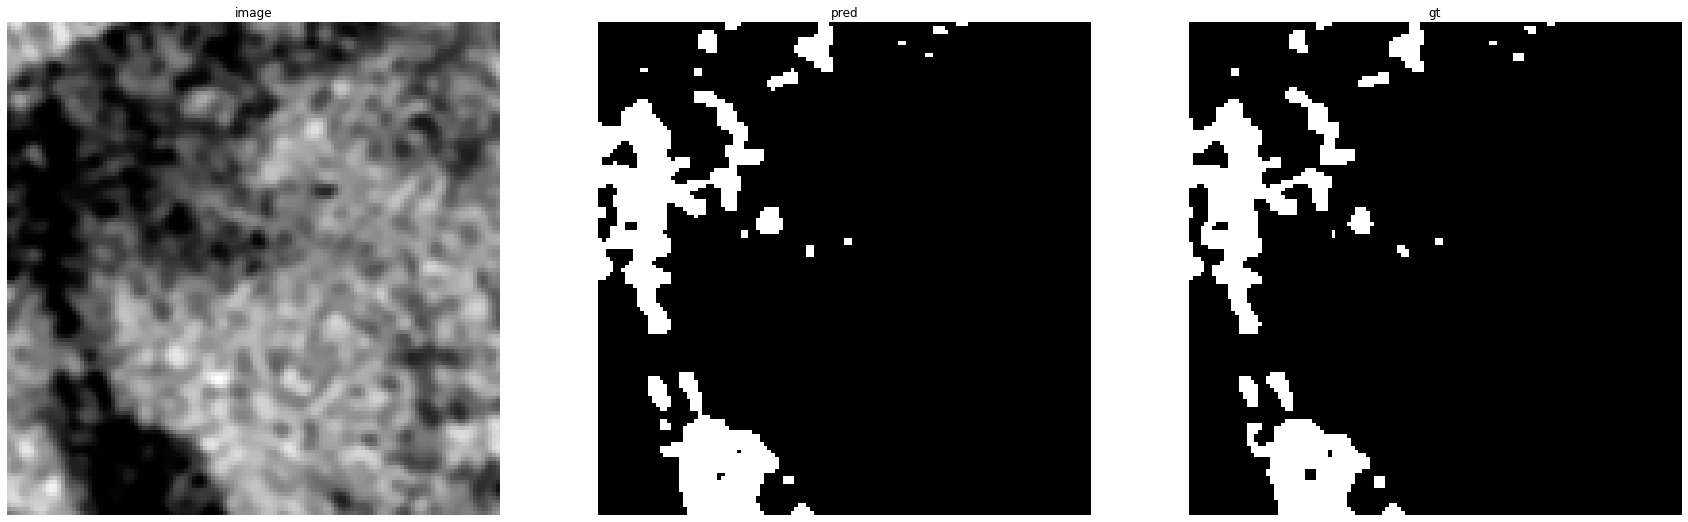

accuracy    : 0.98876953125
precision   : 0.9226579520697168
recall      : 0.9758064516129032
f1          : 0.9484882418812991
pr_auc      : 0.9947953759820223
iou         : 0.9020234291799787


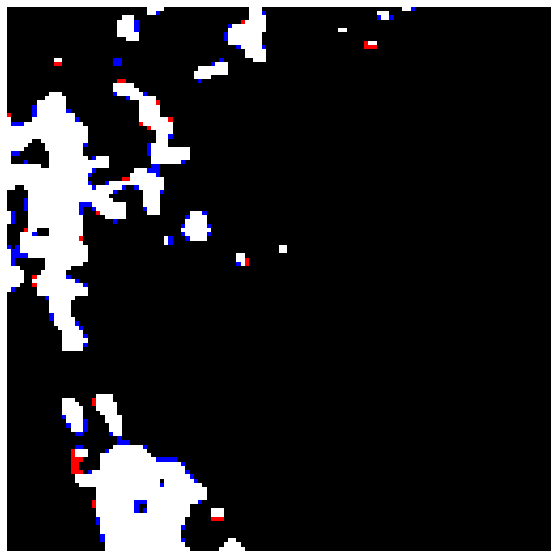

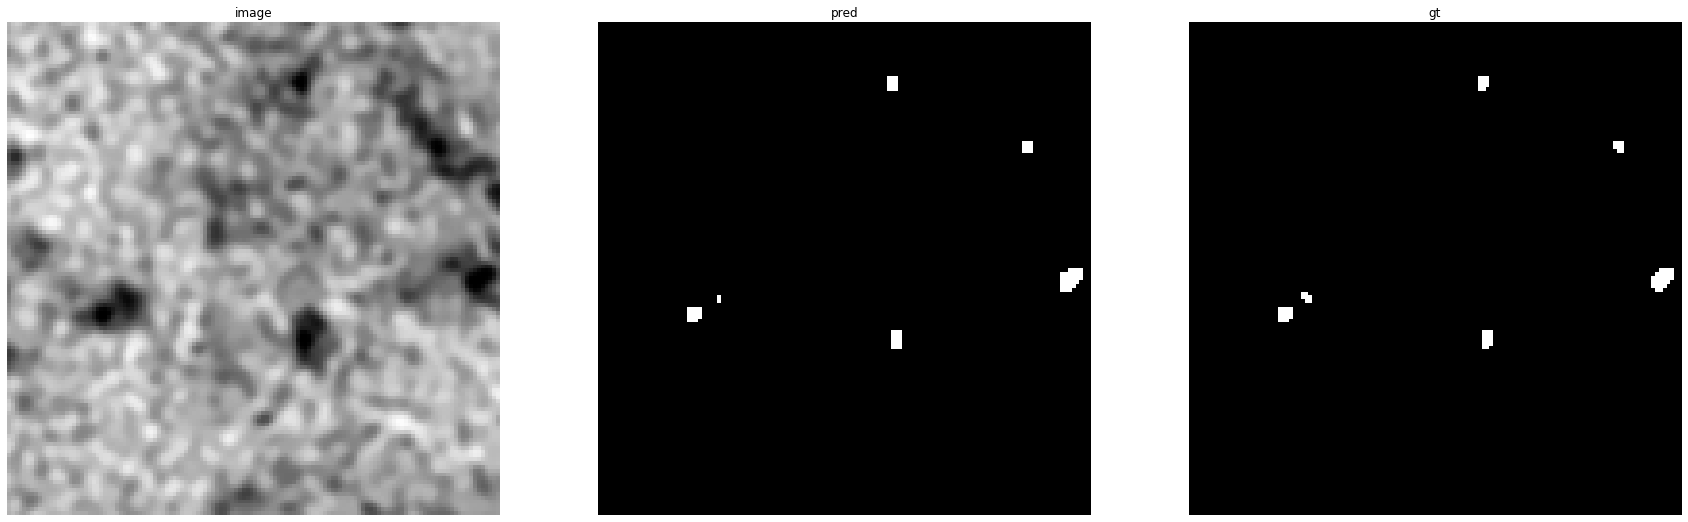

accuracy    : 0.9993896484375
precision   : 0.9382716049382716
recall      : 0.9382716049382716
f1          : 0.9382716049382716
pr_auc      : 0.9836831177684695
iou         : 0.8837209302325582


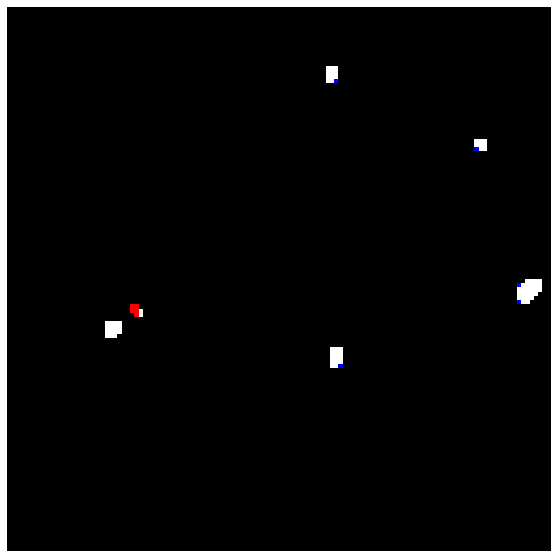

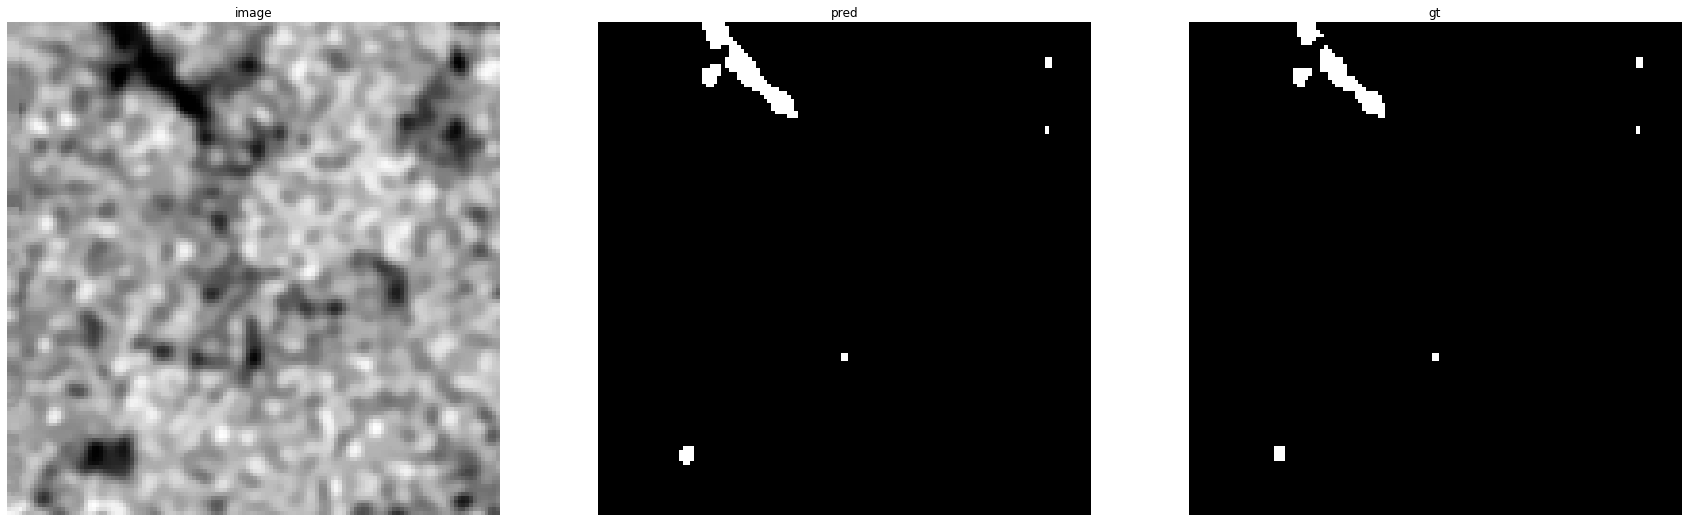

accuracy    : 0.9976806640625
precision   : 0.8262910798122066
recall      : 0.9943502824858758
f1          : 0.9025641025641026
pr_auc      : 0.9903196470234528
iou         : 0.822429906542056


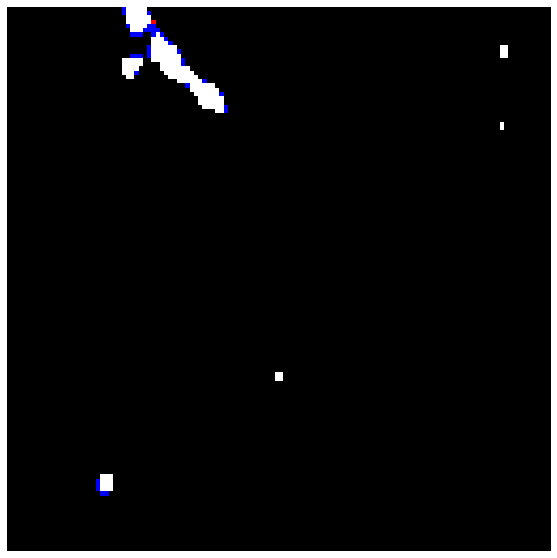

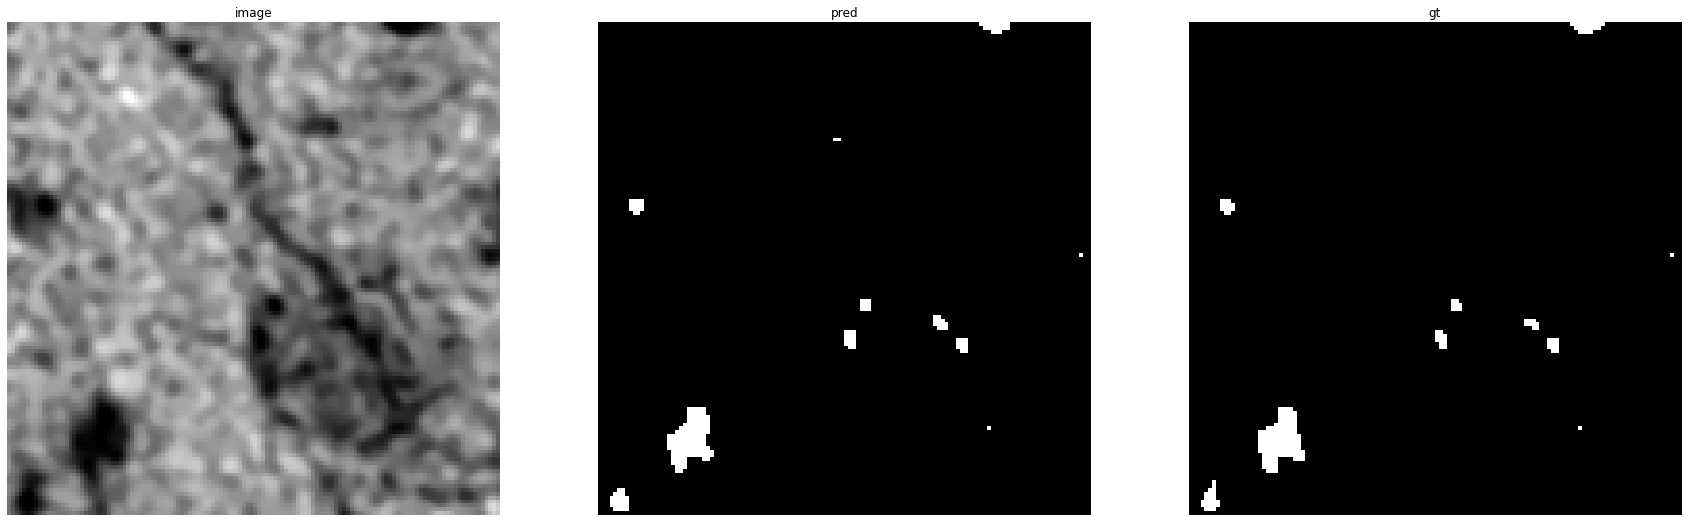

accuracy    : 0.998046875
precision   : 0.9217391304347826
recall      : 0.9380530973451328
f1          : 0.9298245614035088
pr_auc      : 0.9870693401797567
iou         : 0.8688524590163934


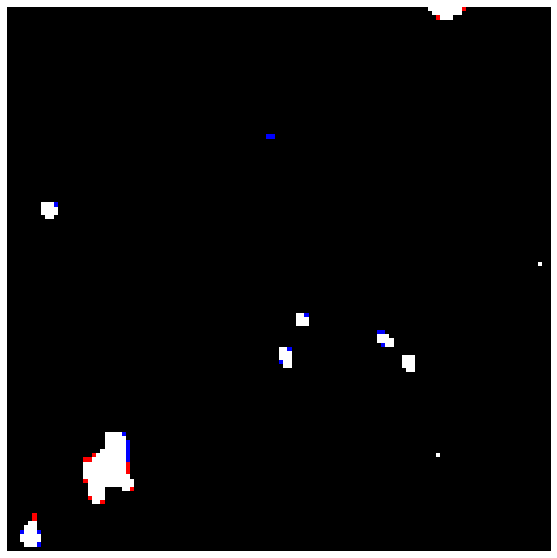

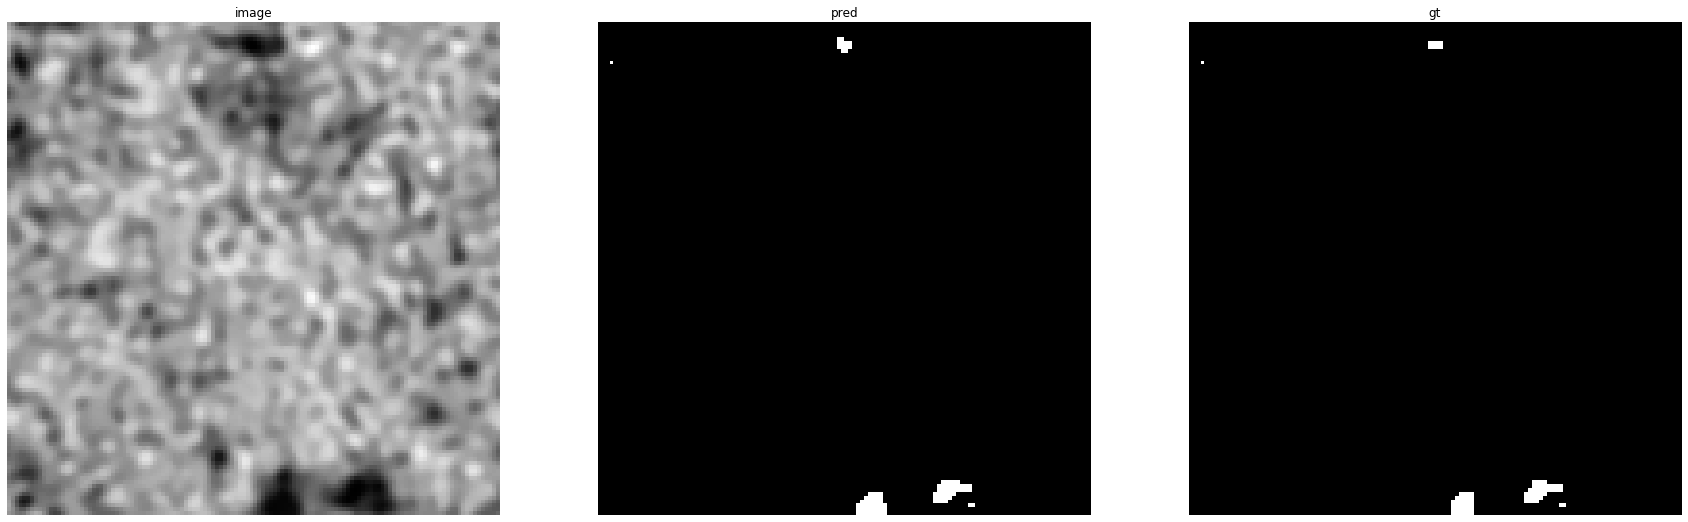

accuracy    : 0.999267578125
precision   : 0.8695652173913043
recall      : 1.0
f1          : 0.9302325581395349
pr_auc      : 0.9908093619497336
iou         : 0.8695652173913043


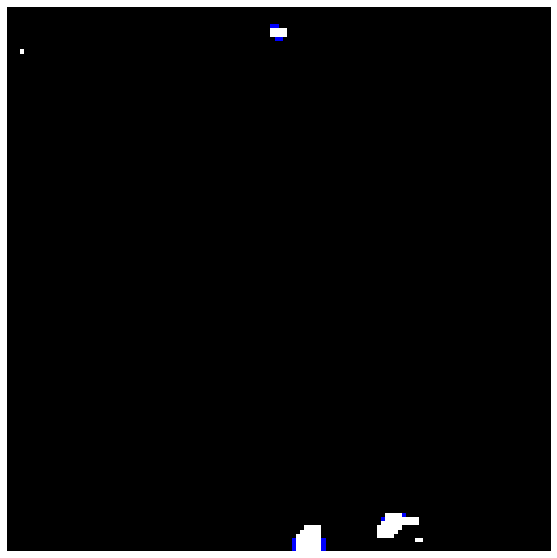

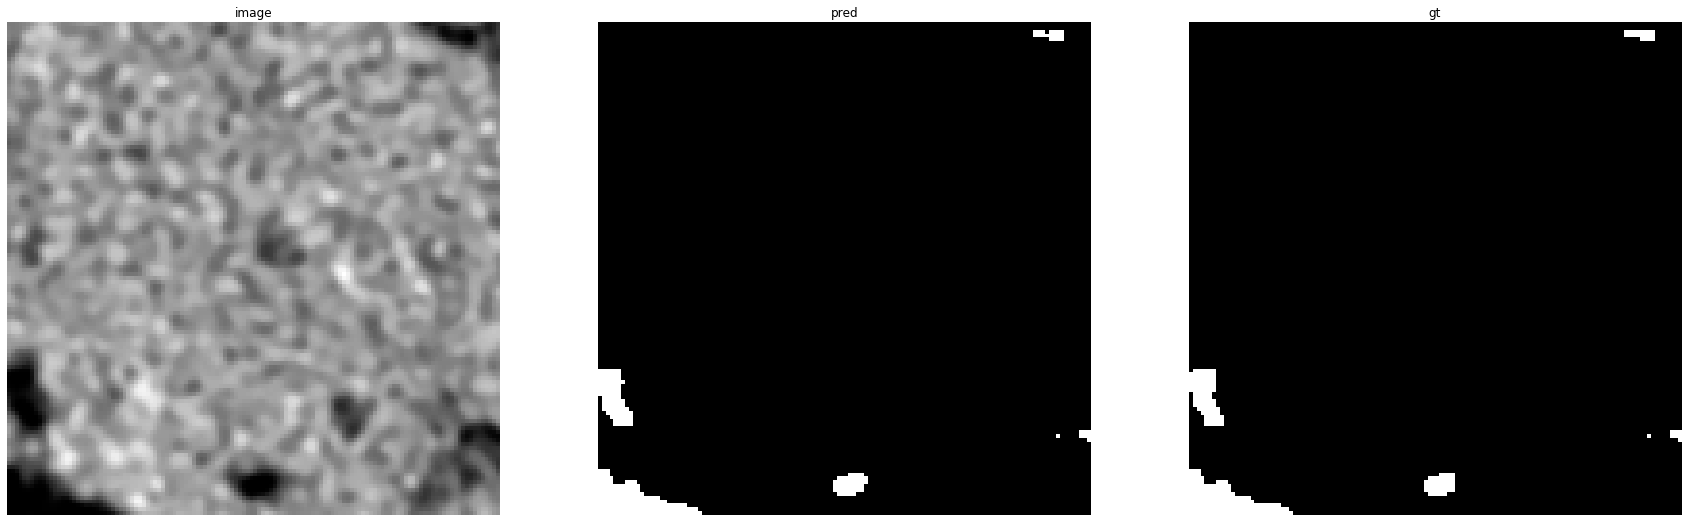

accuracy    : 0.9990234375
precision   : 0.971875
recall      : 0.9779874213836478
f1          : 0.9749216300940439
pr_auc      : 0.9979252309463126
iou         : 0.9510703363914373


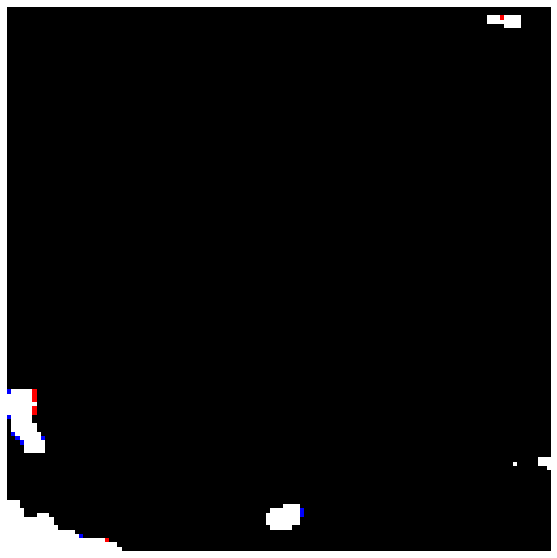

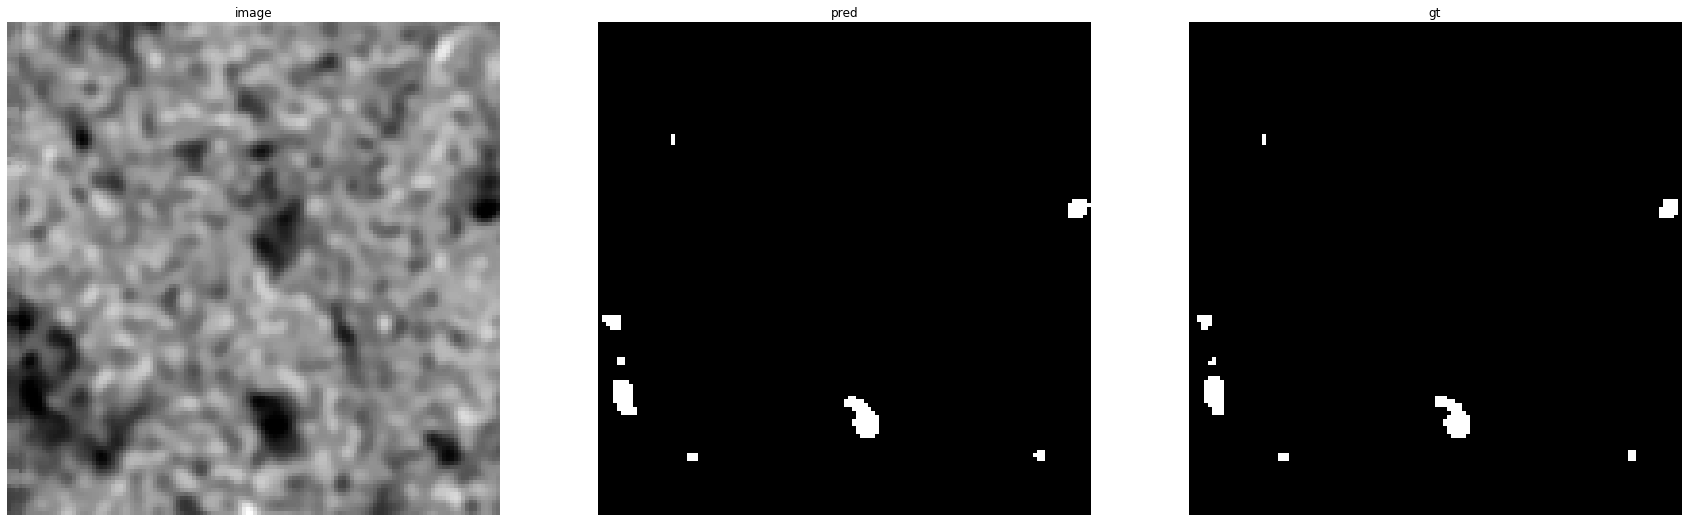

accuracy    : 0.99884033203125
precision   : 0.9197530864197531
recall      : 0.9612903225806452
f1          : 0.9400630914826499
pr_auc      : 0.9904872356813927
iou         : 0.8869047619047619


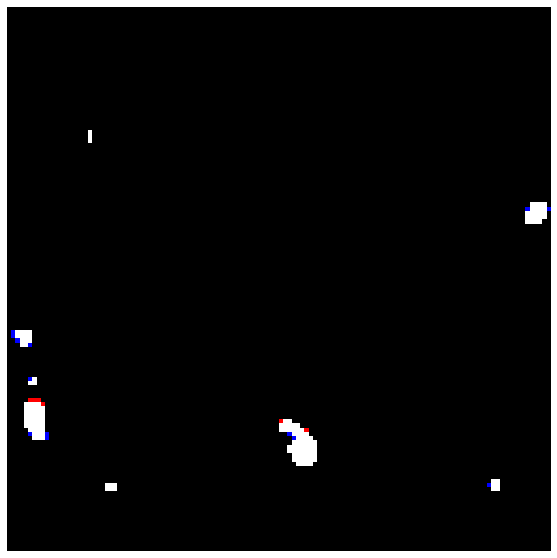

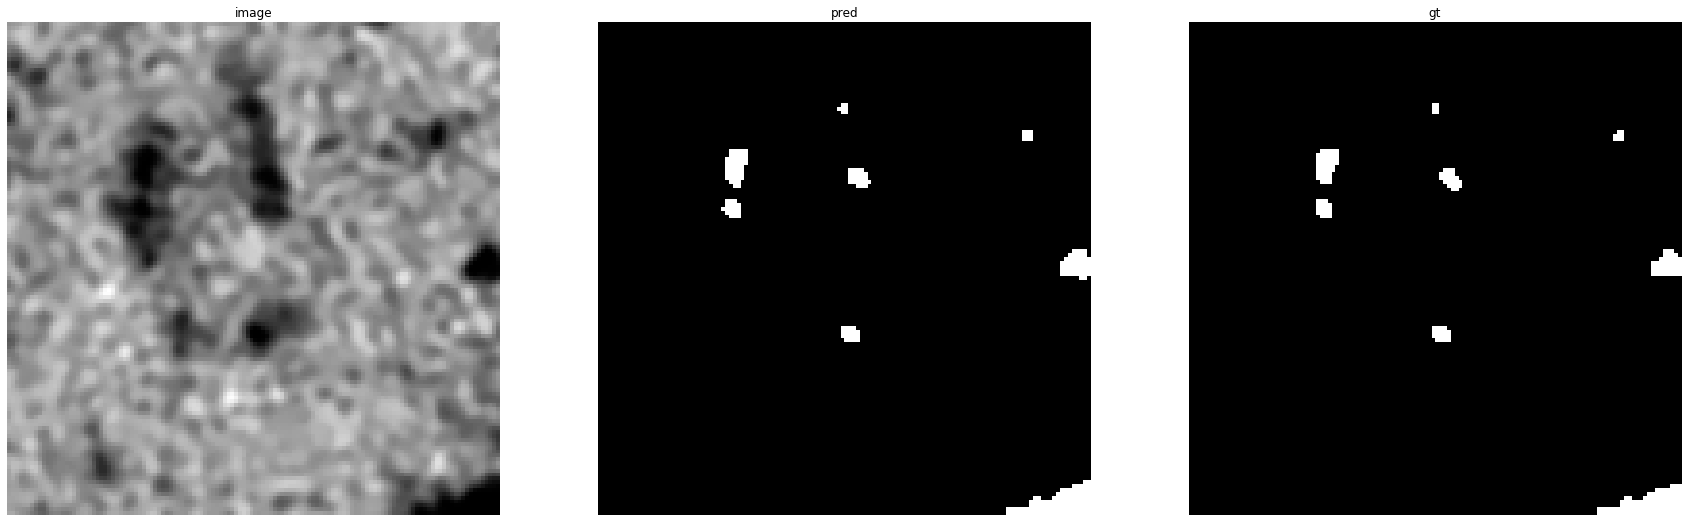

accuracy    : 0.99853515625
precision   : 0.9298245614035088
recall      : 0.9851301115241635
f1          : 0.9566787003610108
pr_auc      : 0.9956903255470793
iou         : 0.916955017301038


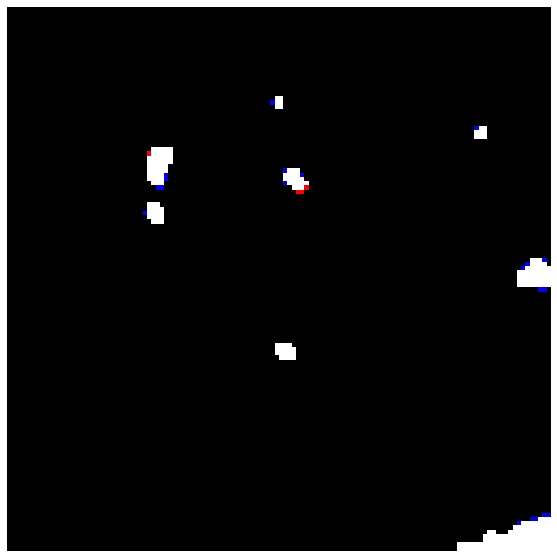

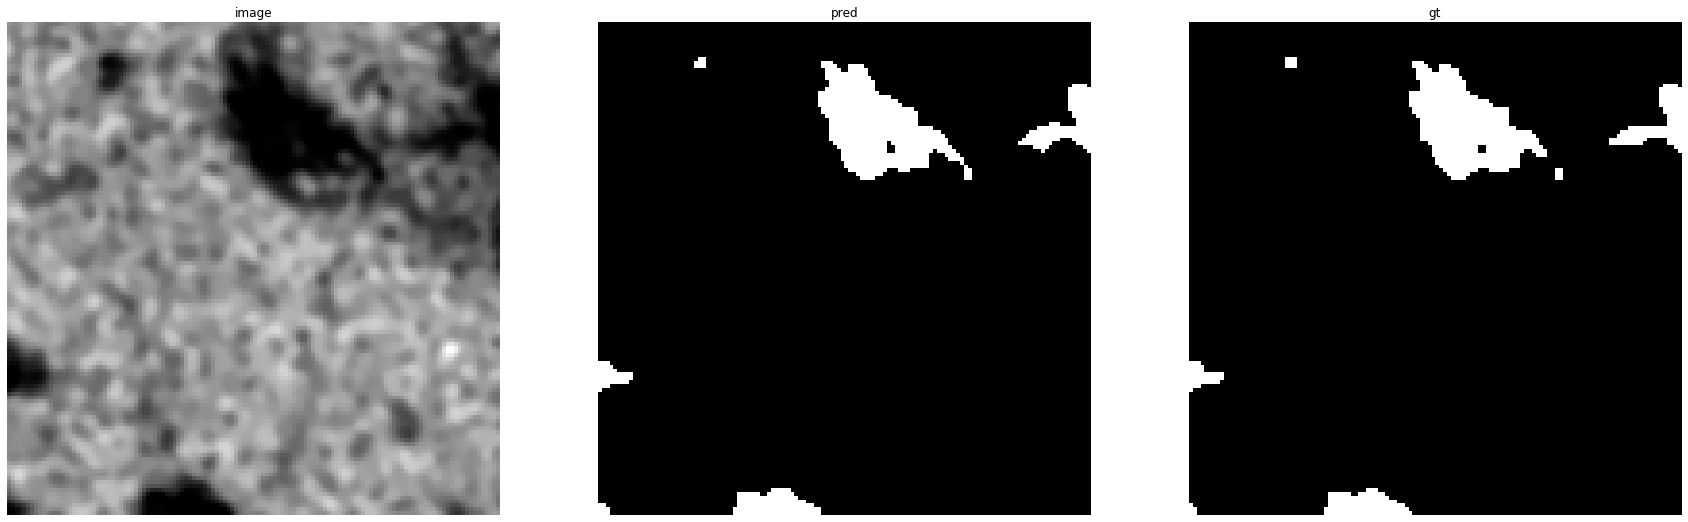

accuracy    : 0.997314453125
precision   : 0.959051724137931
recall      : 0.9933035714285714
f1          : 0.9758771929824561
pr_auc      : 0.9981608087167909
iou         : 0.9528907922912205


Prediction for TeTree_subset1:


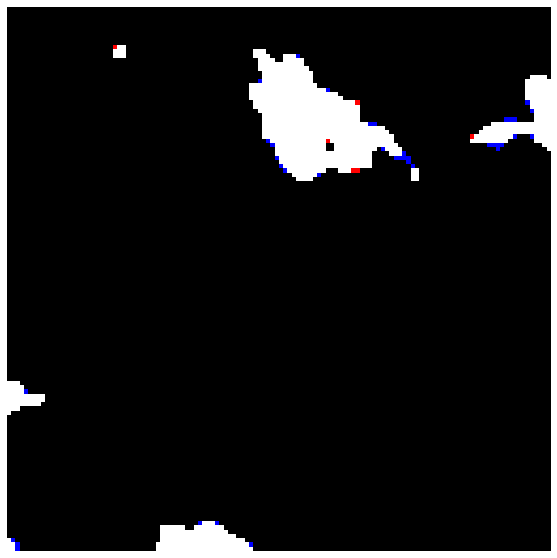

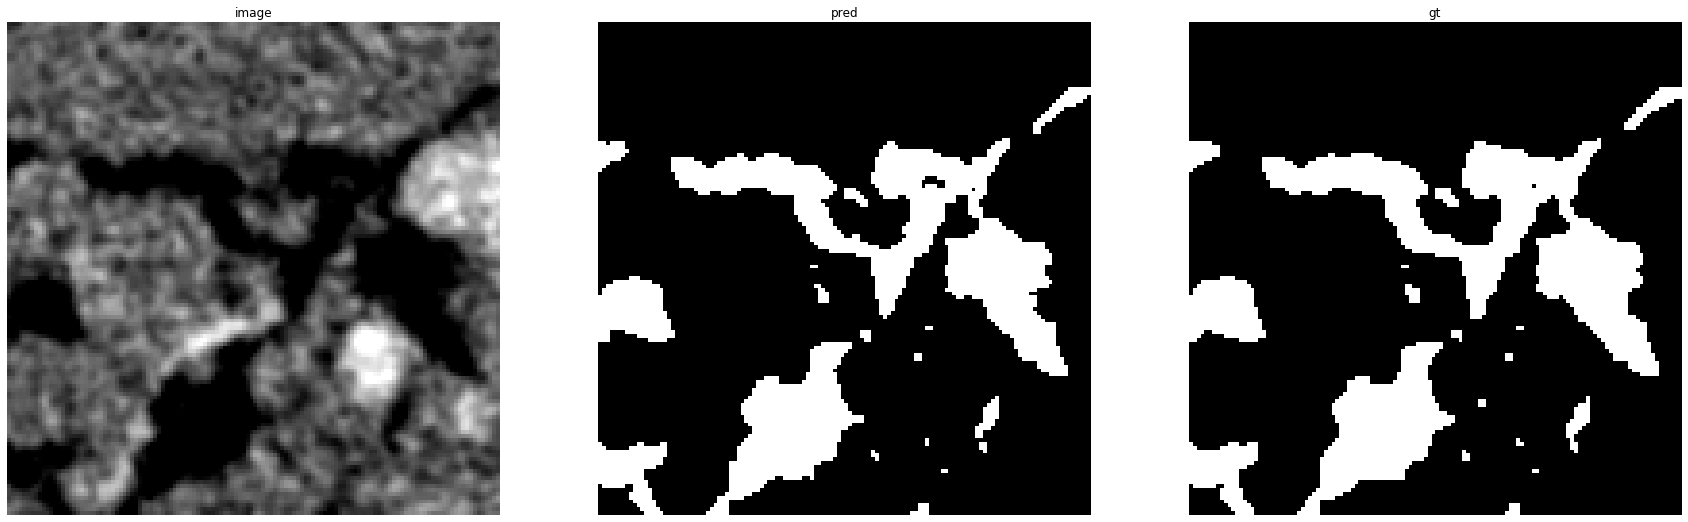

accuracy    : 0.98931884765625
precision   : 0.9956843403205918
recall      : 0.9525213801238572
f1          : 0.9736247174076864
pr_auc      : 0.9983804861273531
iou         : 0.9486049926578561


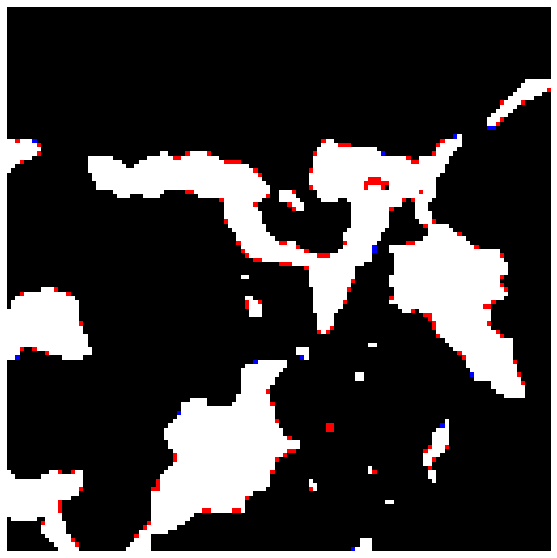

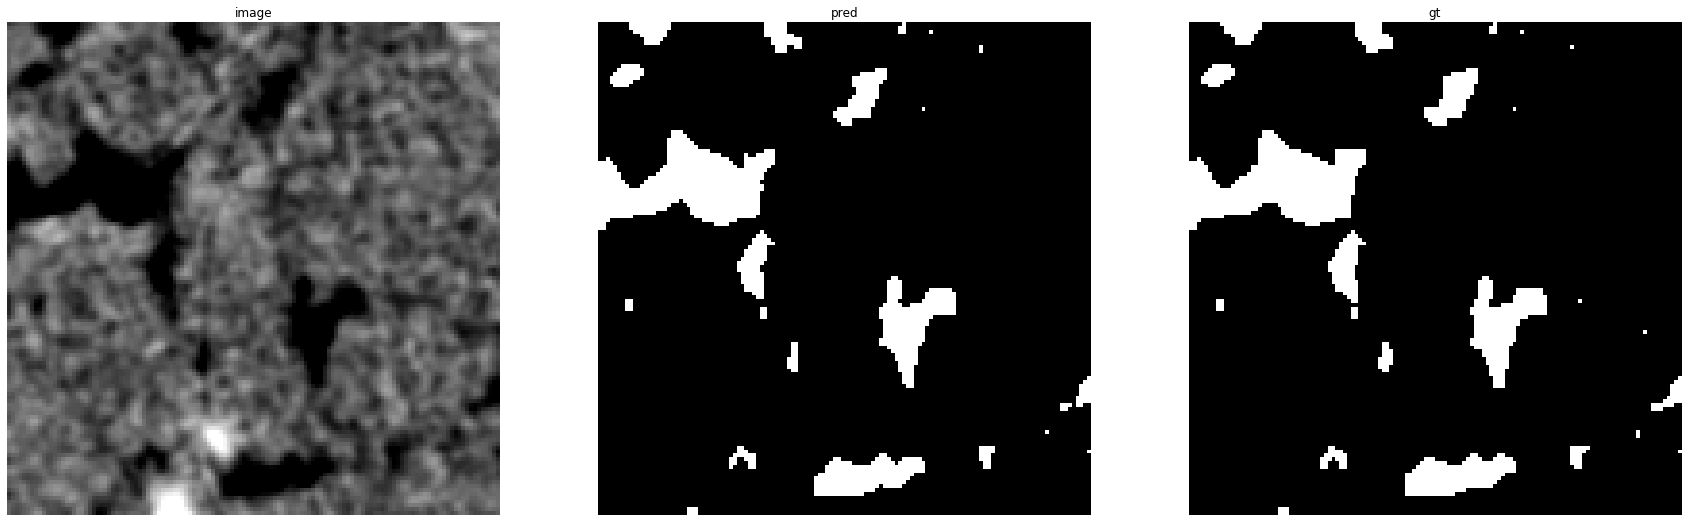

accuracy    : 0.99468994140625
precision   : 0.9955099422706863
recall      : 0.9509803921568627
f1          : 0.9727358194923221
pr_auc      : 0.9976668885003082
iou         : 0.9469188529591214


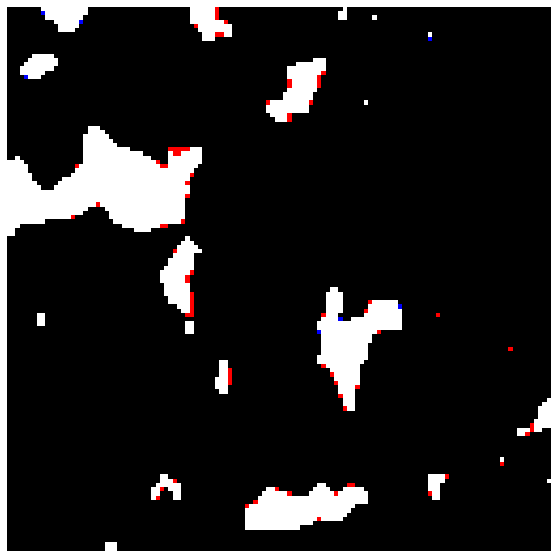

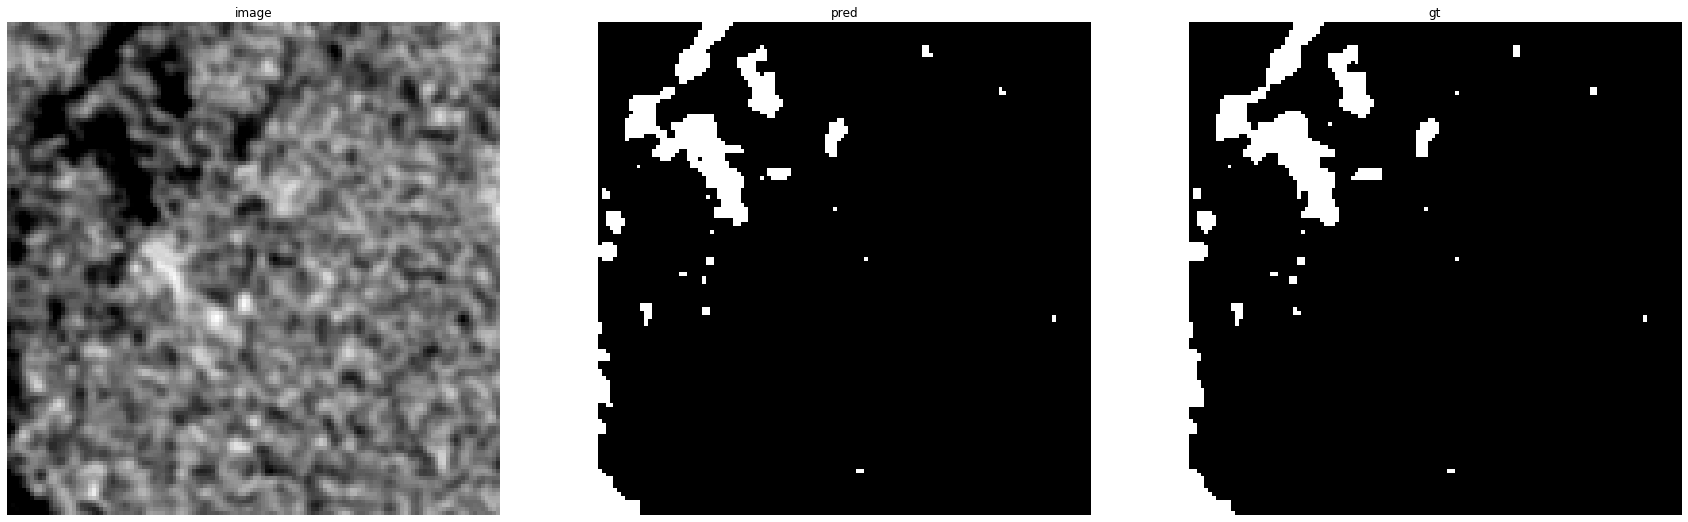

accuracy    : 0.99371337890625
precision   : 0.9908675799086758
recall      : 0.90134994807892
f1          : 0.9439912996193583
pr_auc      : 0.9925531767420719
iou         : 0.893923789907312


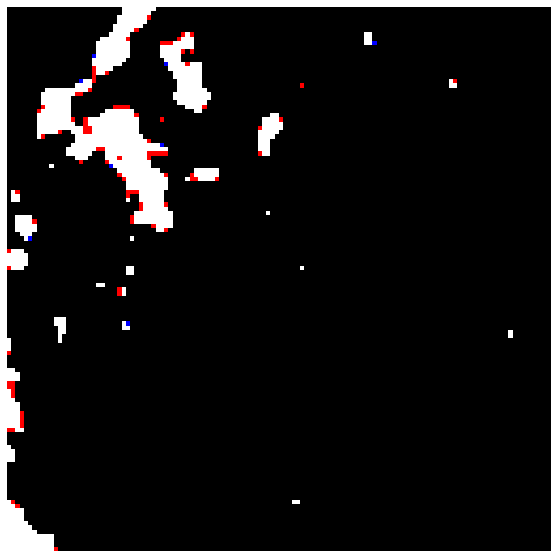

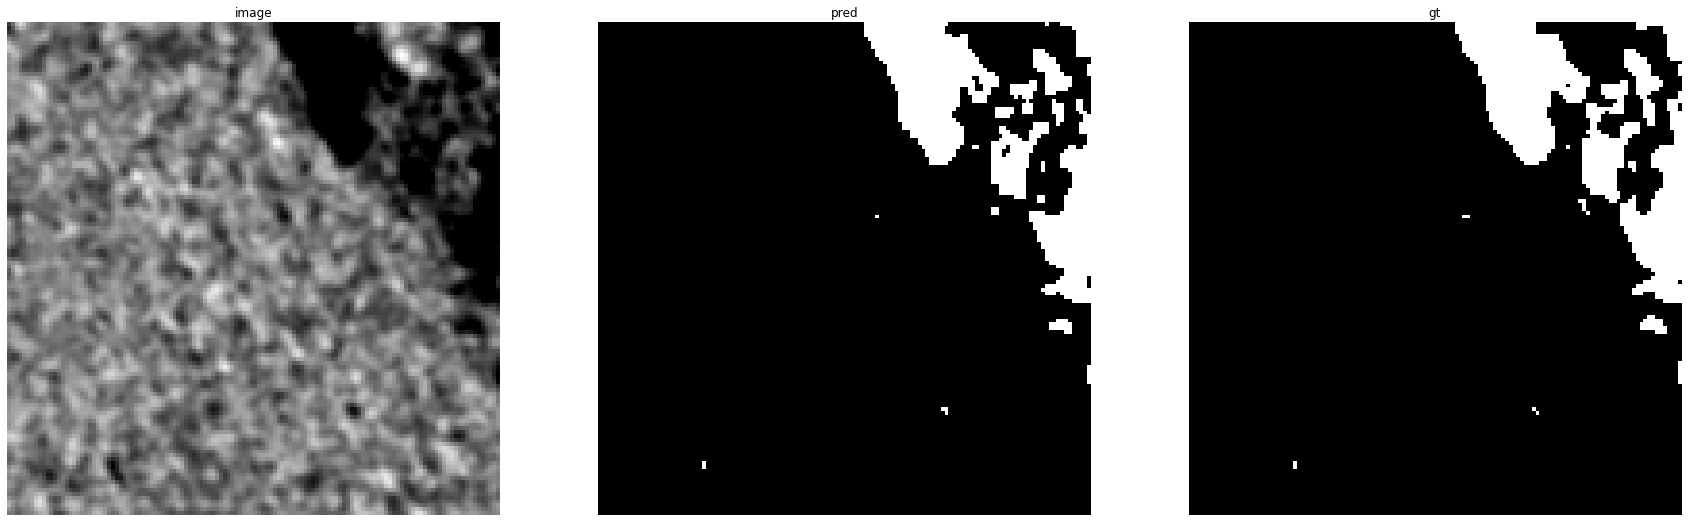

accuracy    : 0.9908447265625
precision   : 0.9892545332437878
recall      : 0.9166148102053516
f1          : 0.9515503875968992
pr_auc      : 0.9959406978479286
iou         : 0.9075785582255084


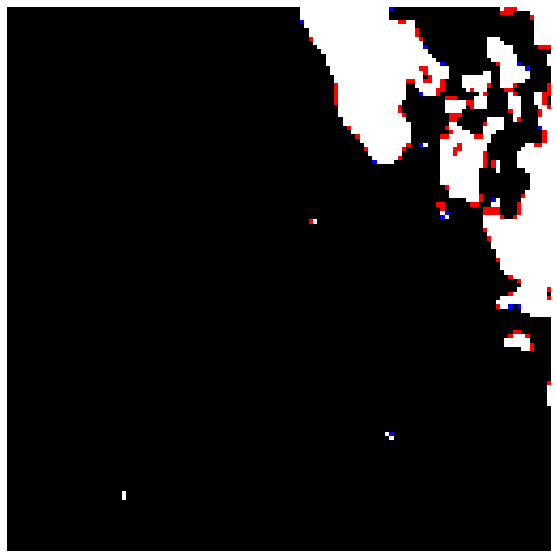

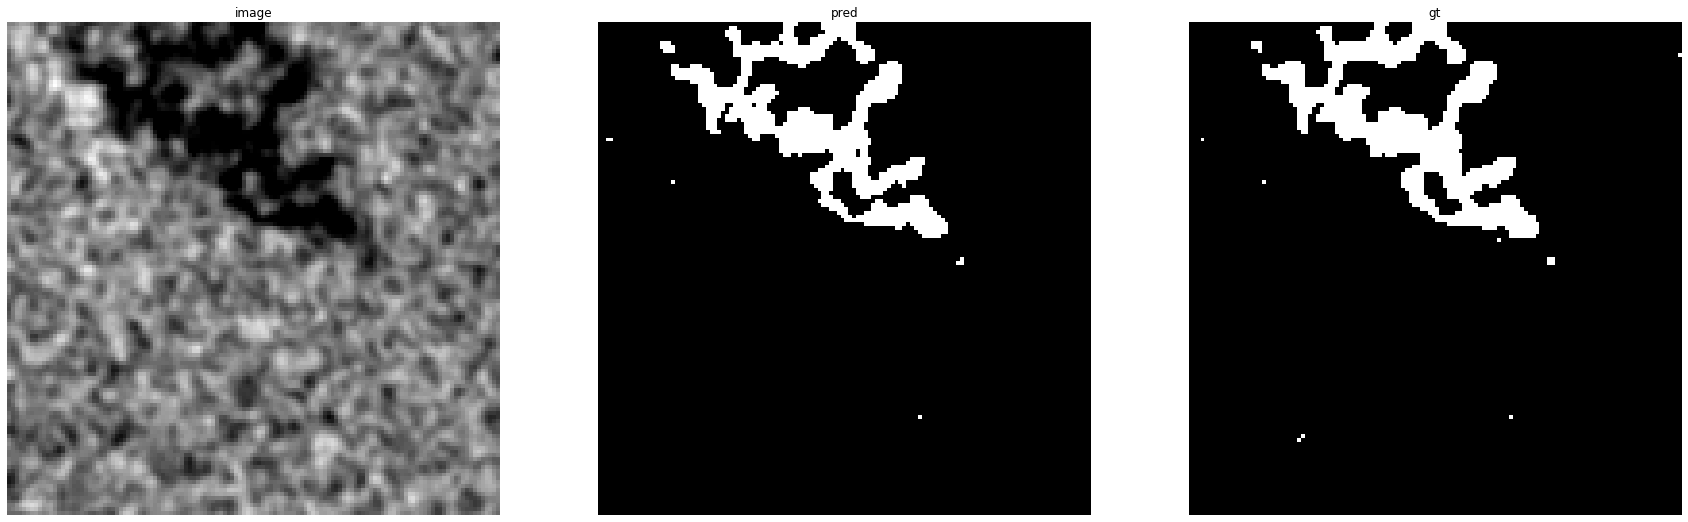

accuracy    : 0.99188232421875
precision   : 0.9914602903501281
recall      : 0.9042056074766355
f1          : 0.9458248472505091
pr_auc      : 0.9945774082128865
iou         : 0.8972179289026275


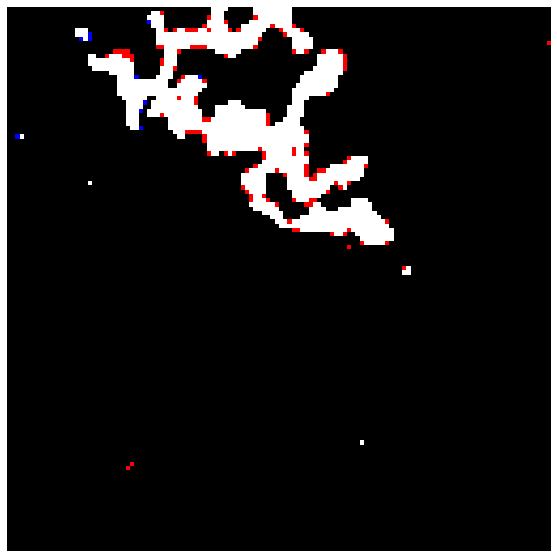

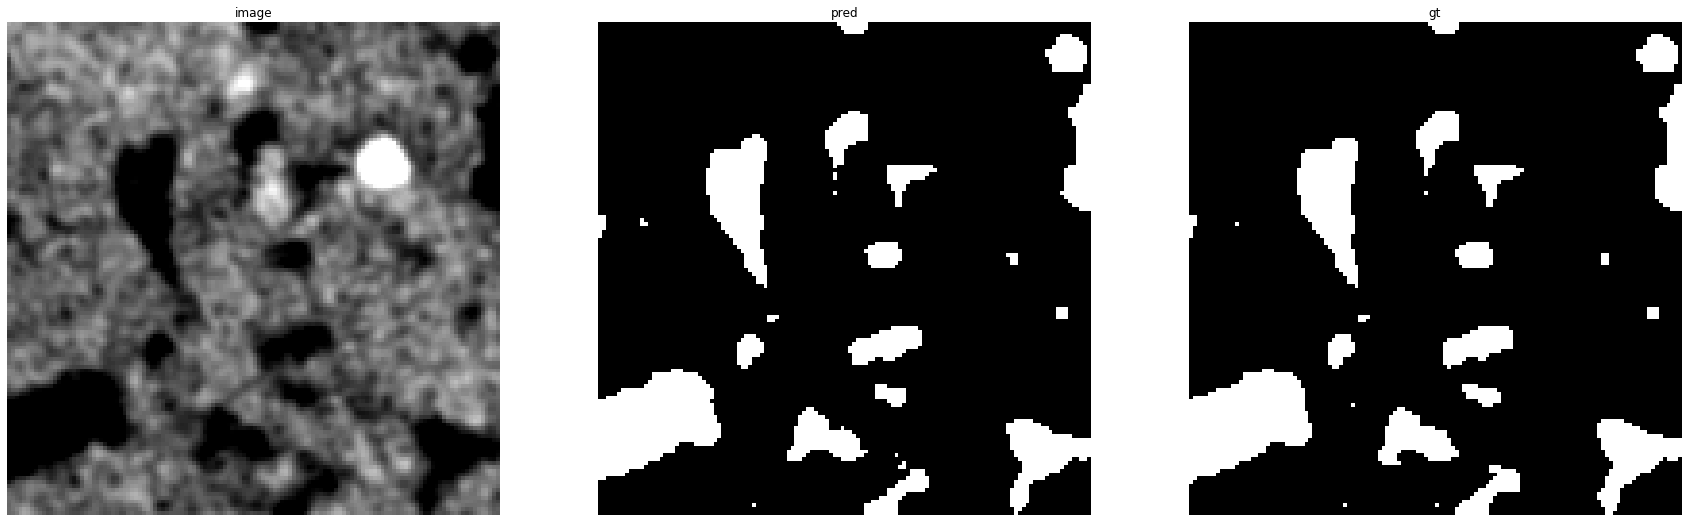

accuracy    : 0.9940185546875
precision   : 0.9901785714285715
recall      : 0.966870095902354
f1          : 0.9783855315394794
pr_auc      : 0.9984824416405728
iou         : 0.957685664939551


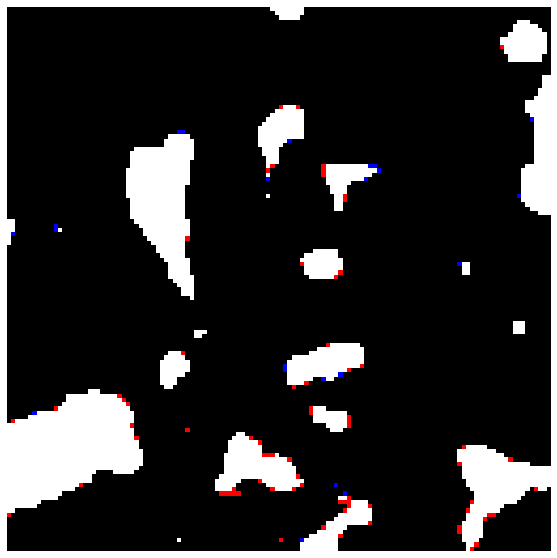

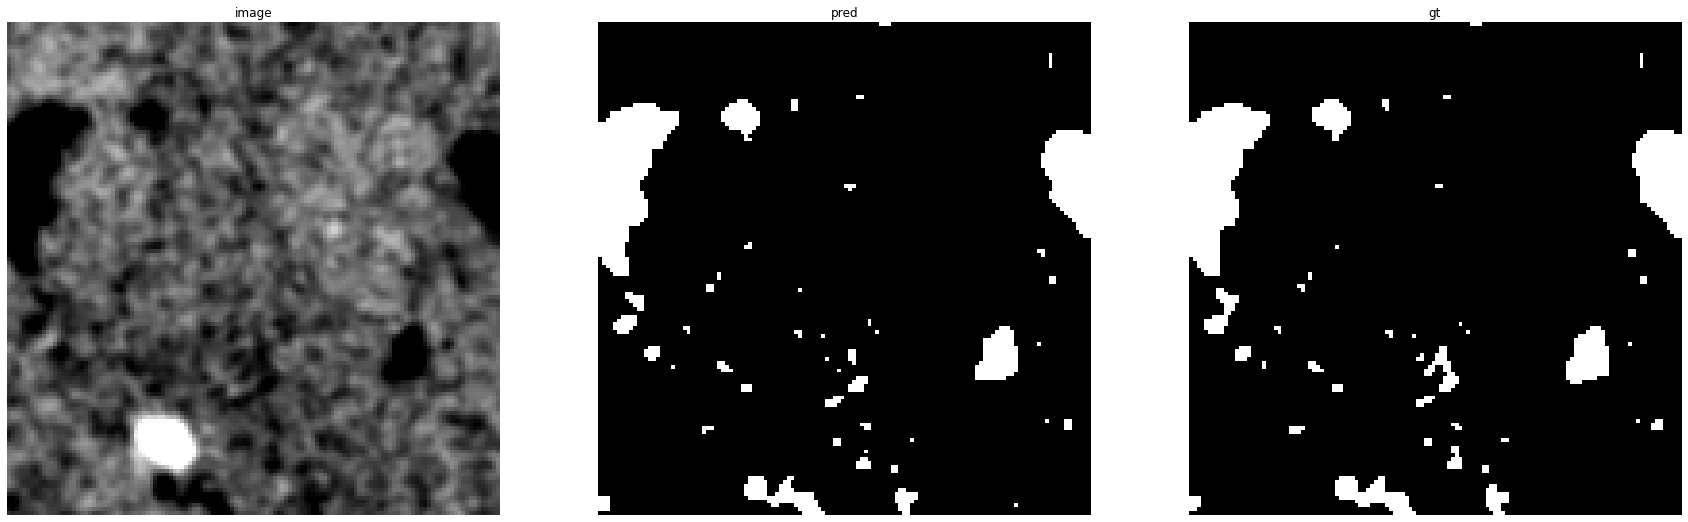

accuracy    : 0.99365234375
precision   : 0.9855072463768116
recall      : 0.9382716049382716
f1          : 0.9613095238095237
pr_auc      : 0.994065315349513
iou         : 0.9255014326647565


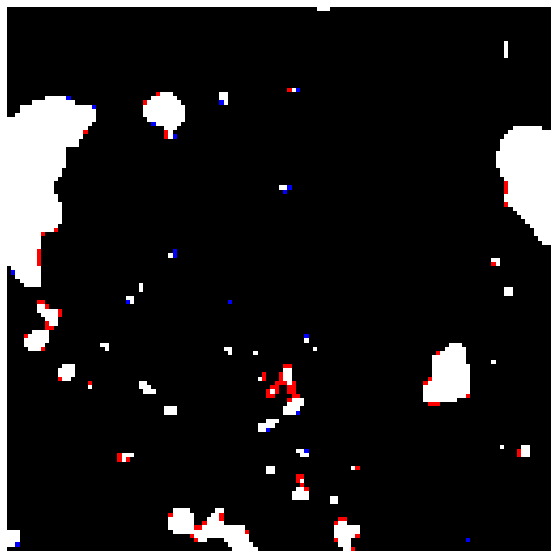

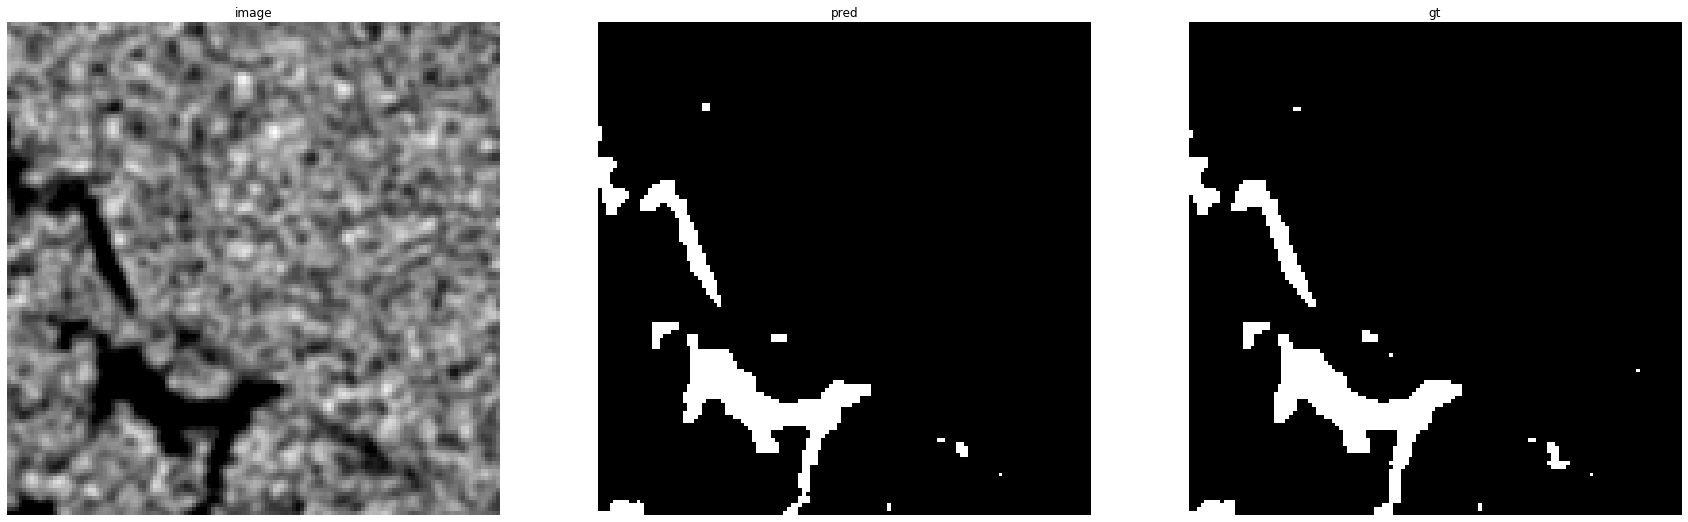

accuracy    : 0.9942626953125
precision   : 0.9935691318327974
recall      : 0.9133004926108375
f1          : 0.9517453798767966
pr_auc      : 0.9960468767995638
iou         : 0.9079333986287953


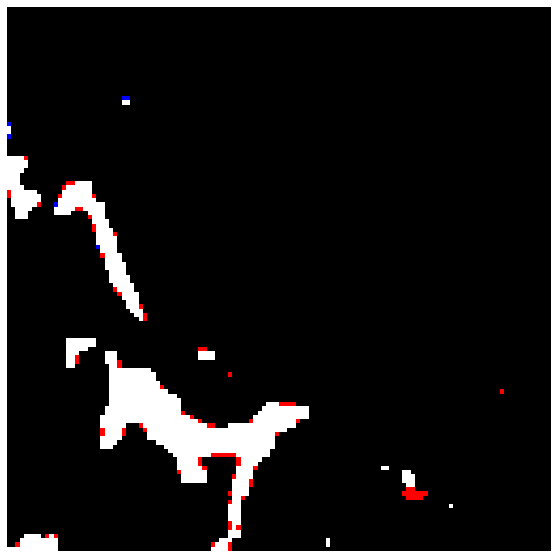

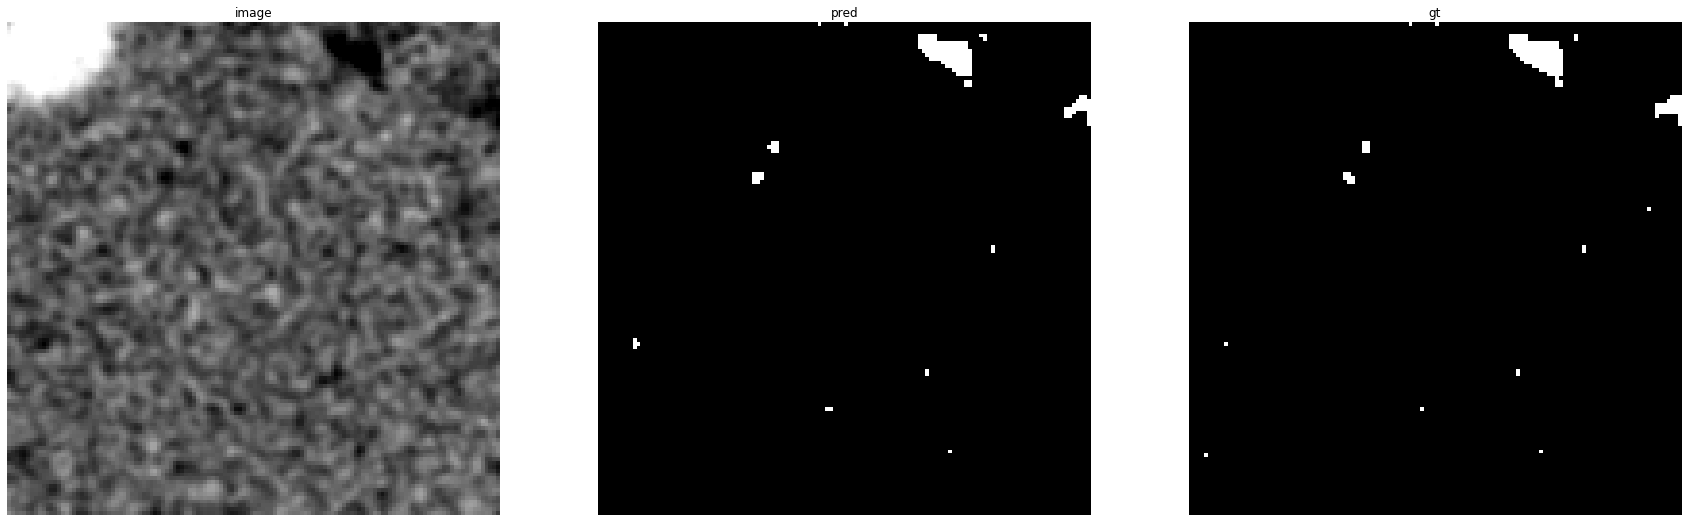

accuracy    : 0.99859619140625
precision   : 0.9430379746835443
recall      : 0.9141104294478528
f1          : 0.9283489096573209
pr_auc      : 0.9793853765534504
iou         : 0.8662790697674418


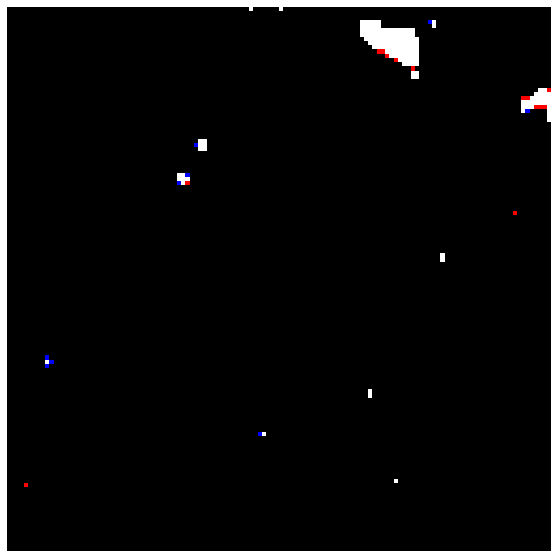

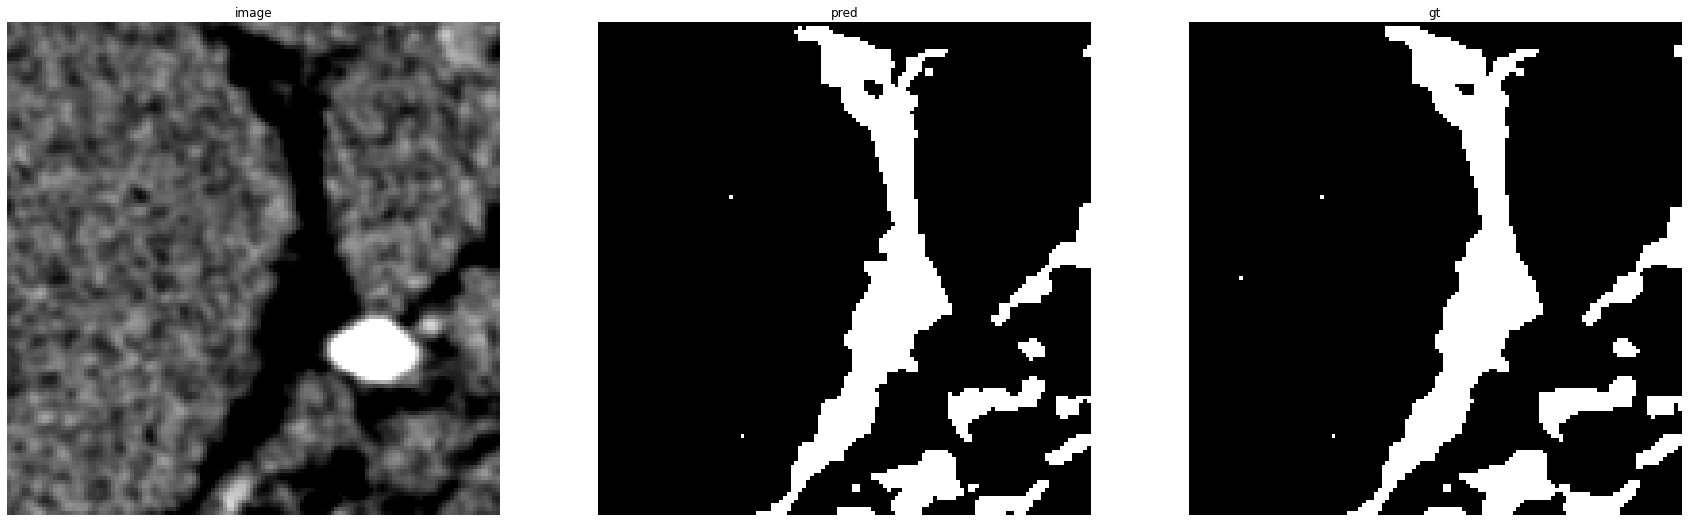

accuracy    : 0.9891357421875
precision   : 0.996438464582509
recall      : 0.9371045775958318
f1          : 0.9658611430763331
pr_auc      : 0.9979685370386245
iou         : 0.9339762611275965


Prediction for TiTree_subset2:


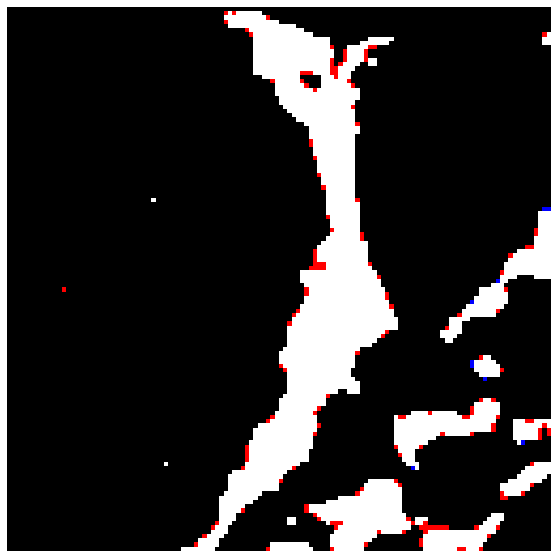

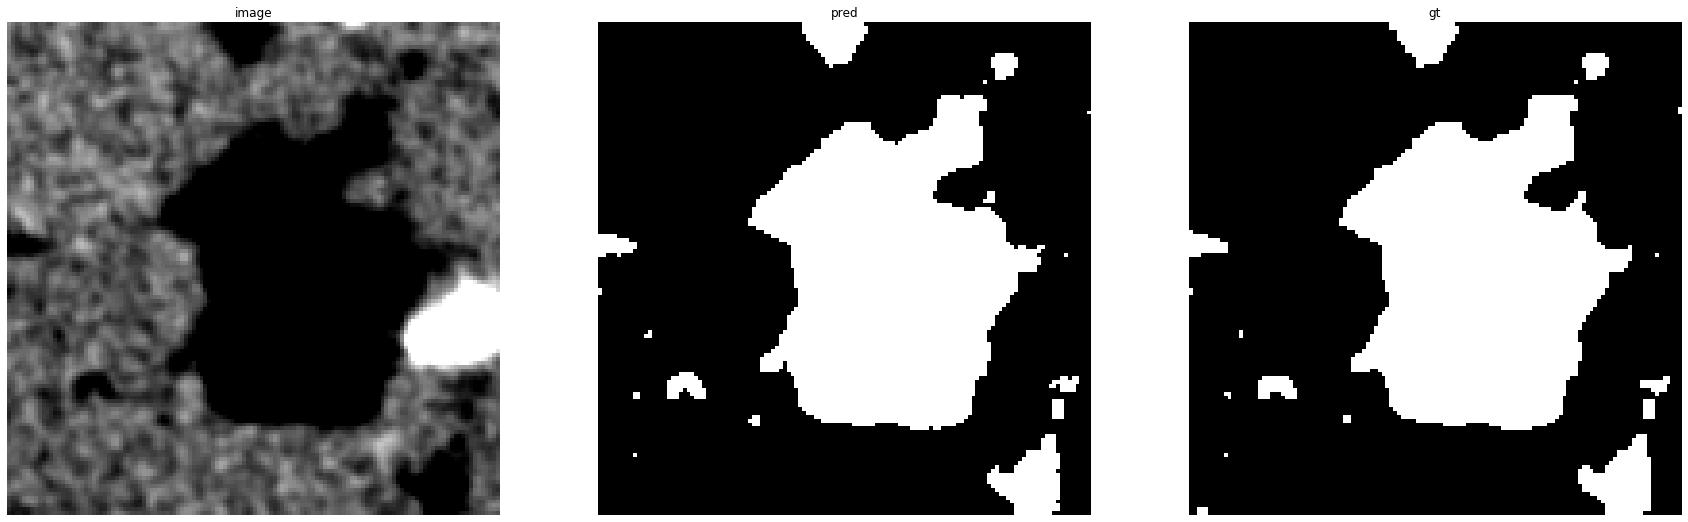

accuracy    : 0.9954833984375
precision   : 0.9942455242966752
recall      : 0.990025466893039
f1          : 0.9921310080816673
pr_auc      : 0.9997234205689455
iou         : 0.9843848913272842


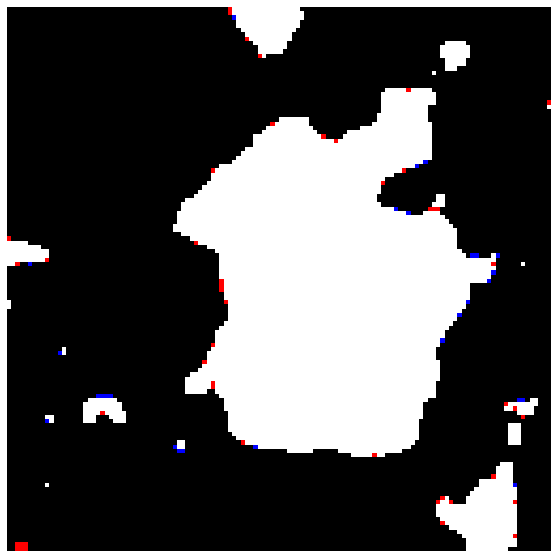

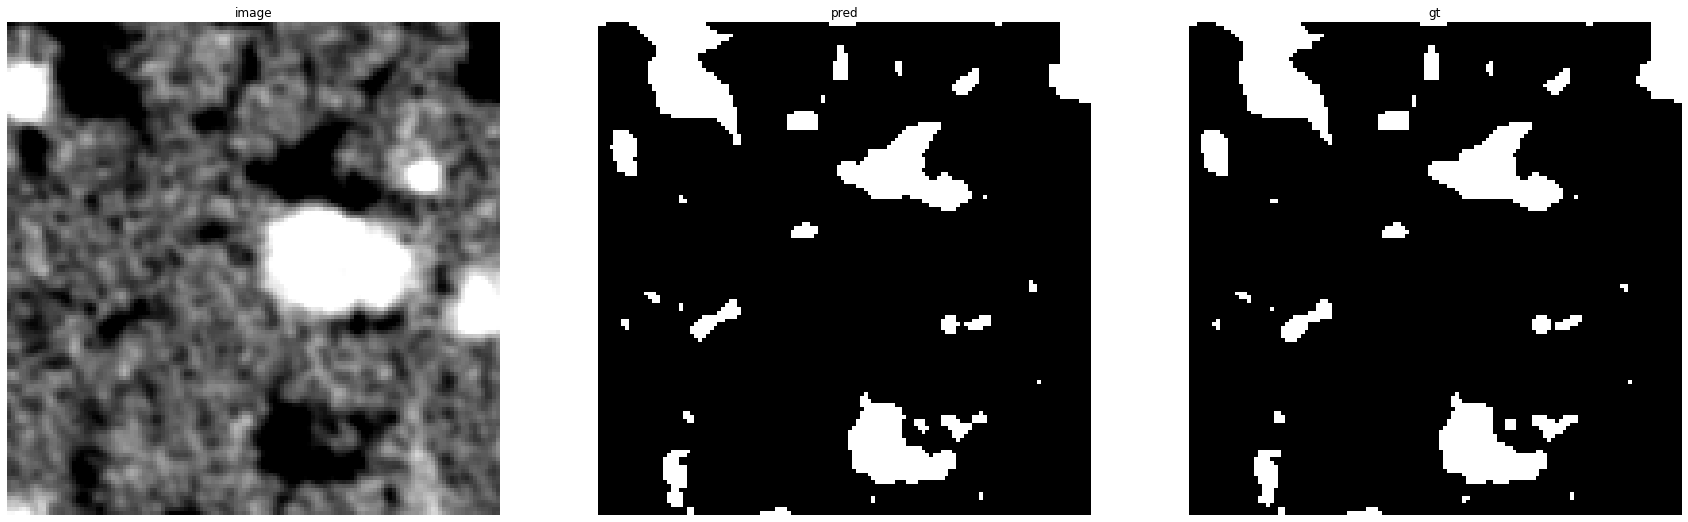

accuracy    : 0.9940185546875
precision   : 0.9828141783029001
recall      : 0.9651898734177216
f1          : 0.9739222990952634
pr_auc      : 0.9976269925757336
iou         : 0.9491701244813278


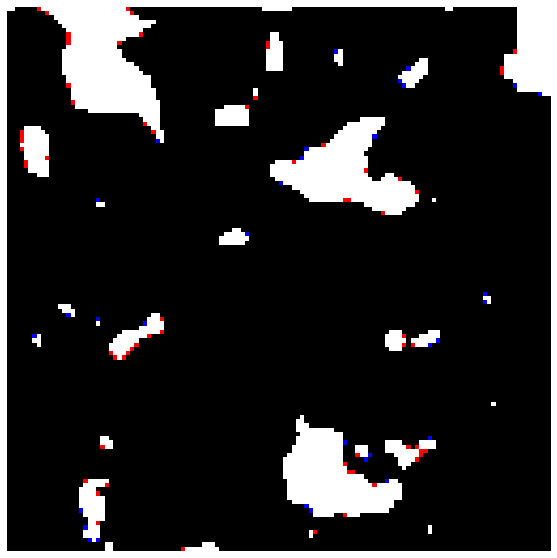

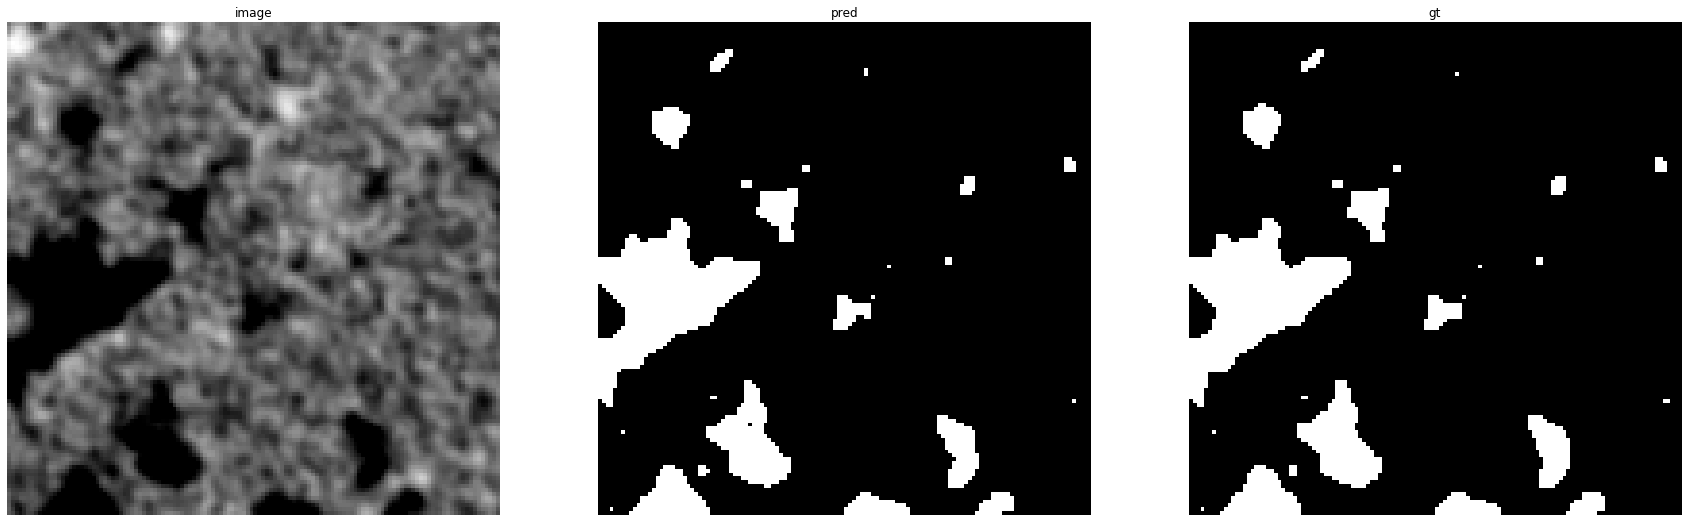

accuracy    : 0.99591064453125
precision   : 0.99581589958159
recall      : 0.9699439633214467
f1          : 0.9827096774193548
pr_auc      : 0.9986992476442771
iou         : 0.9660071029934043


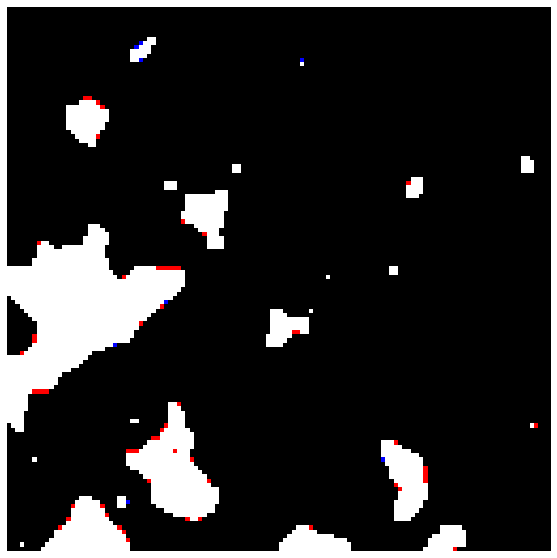

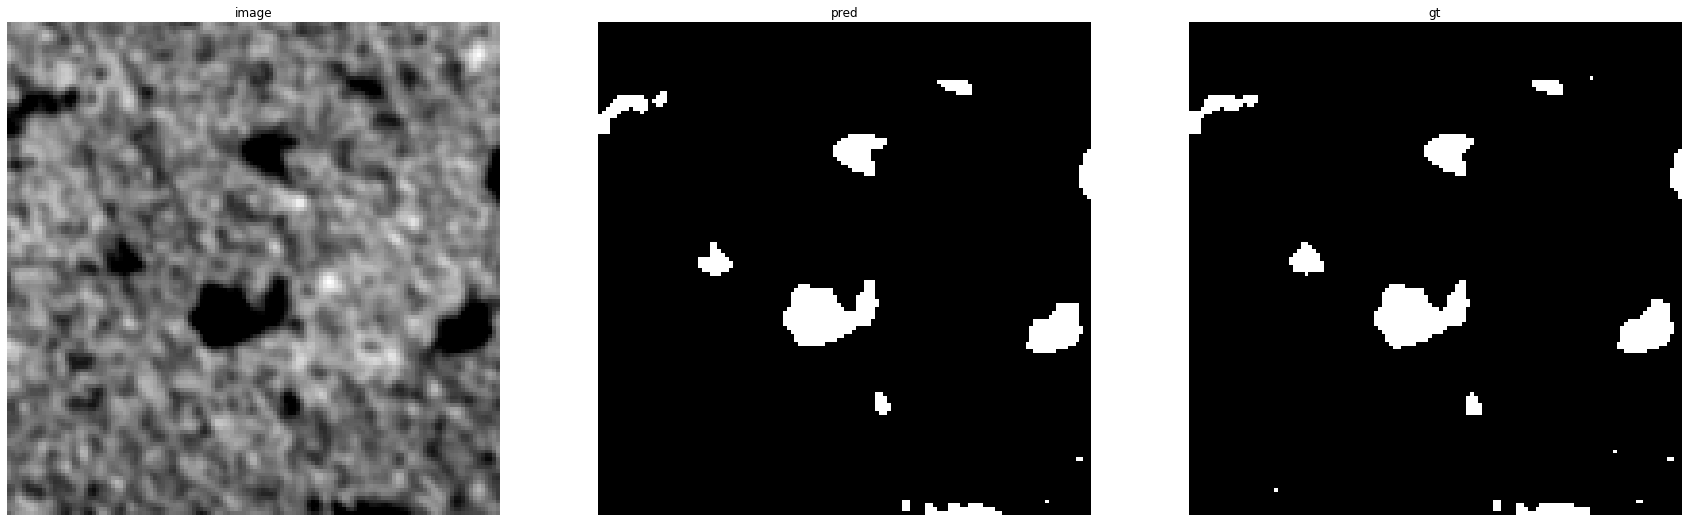

accuracy    : 0.99676513671875
precision   : 0.9719626168224299
recall      : 0.9578947368421052
f1          : 0.9648774022531478
pr_auc      : 0.9950847443728325
iou         : 0.9321382842509603


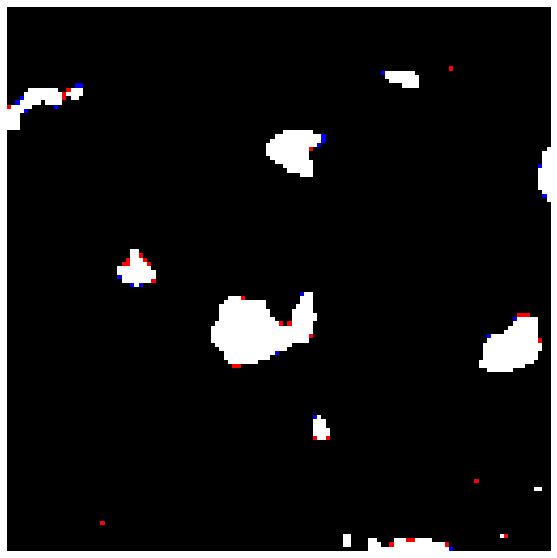

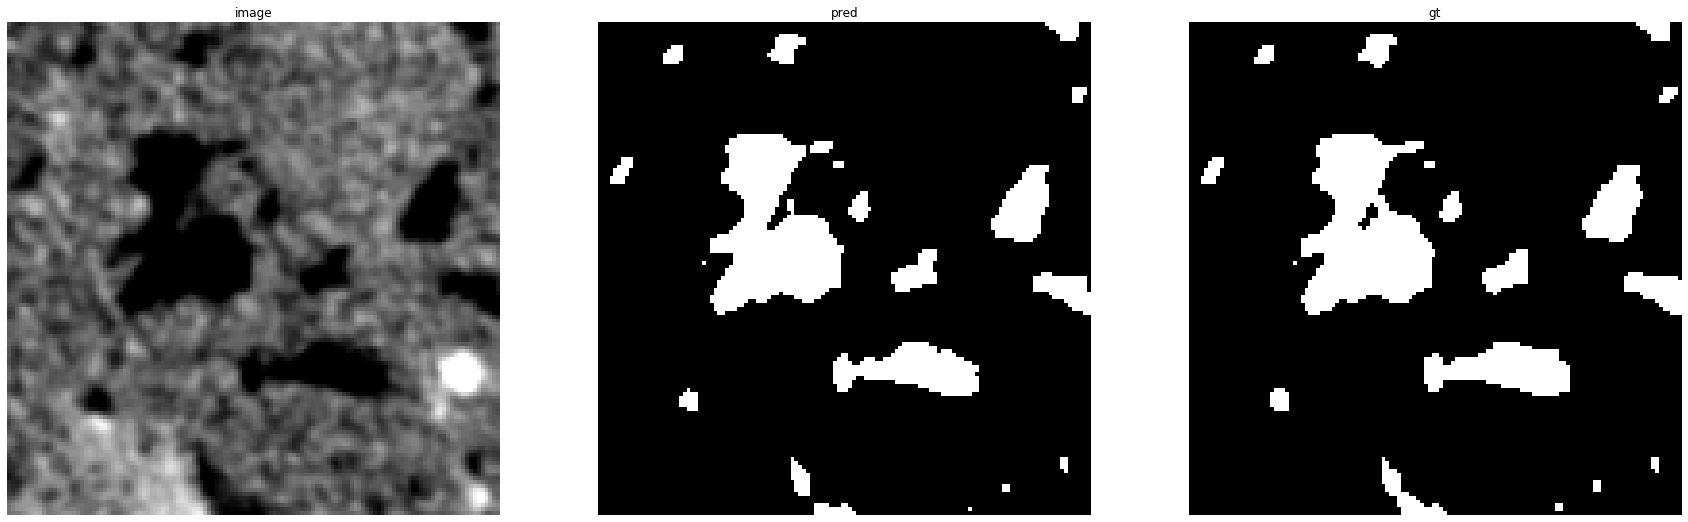

accuracy    : 0.99212646484375
precision   : 0.9944416371905003
recall      : 0.9434324065196549
f1          : 0.9682656826568266
pr_auc      : 0.9978208865567202
iou         : 0.9384835479256081


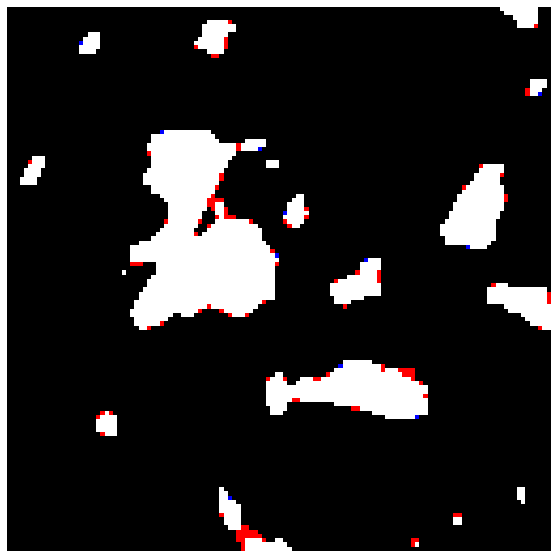

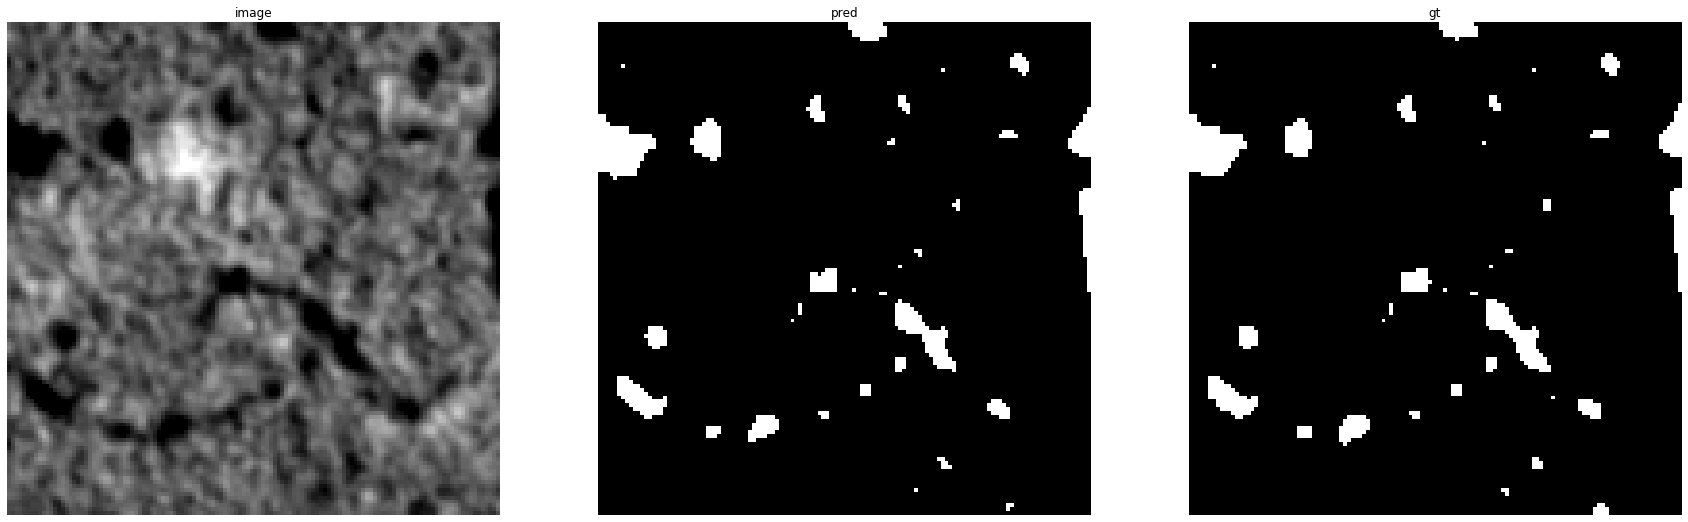

accuracy    : 0.99554443359375
precision   : 0.968789013732834
recall      : 0.941747572815534
f1          : 0.955076923076923
pr_auc      : 0.9937290016099949
iou         : 0.9140164899882215


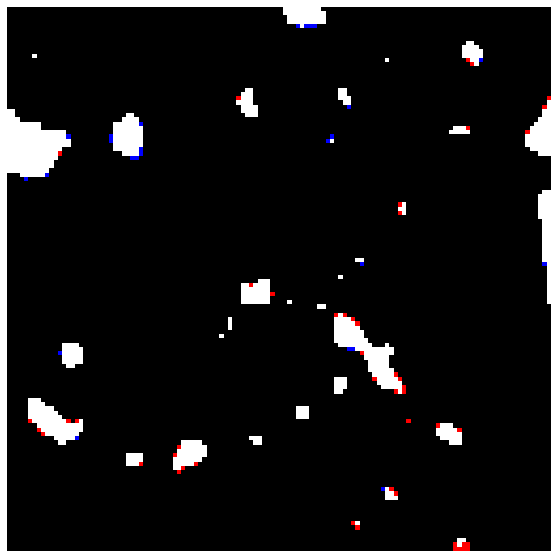

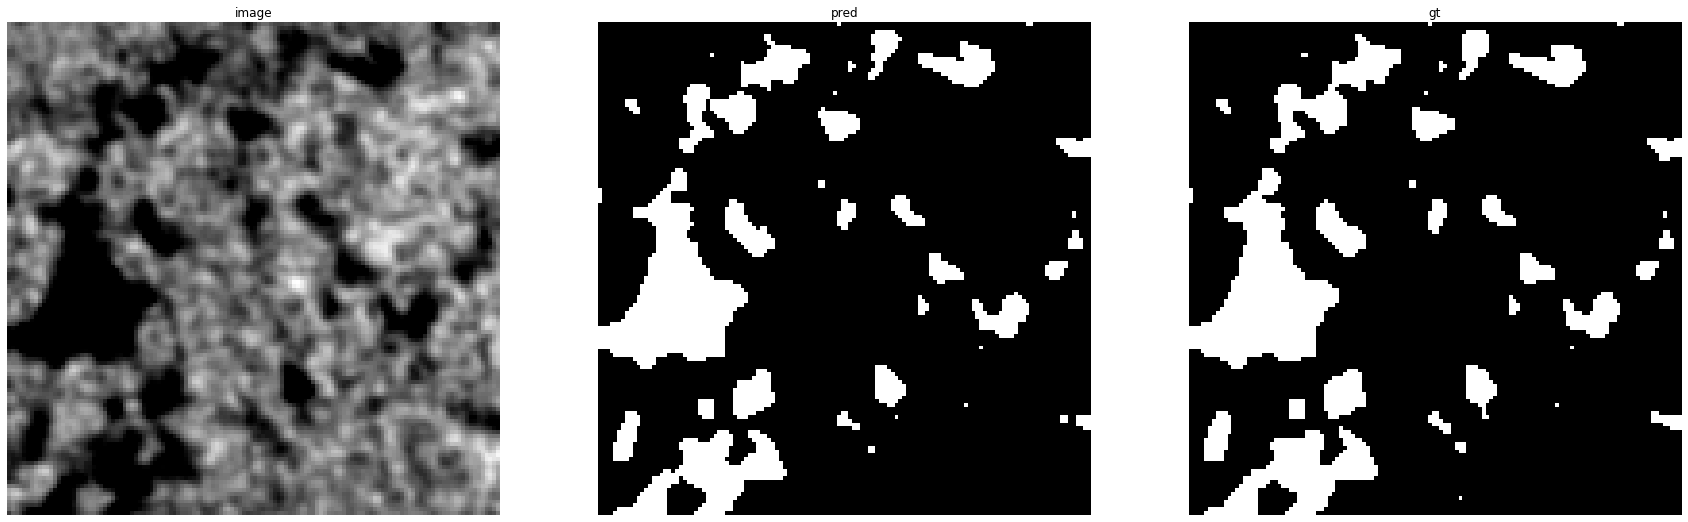

accuracy    : 0.9898681640625
precision   : 0.9946544482626957
recall      : 0.9448676097207109
f1          : 0.9691220238095238
pr_auc      : 0.9974605214102858
iou         : 0.94009382894262


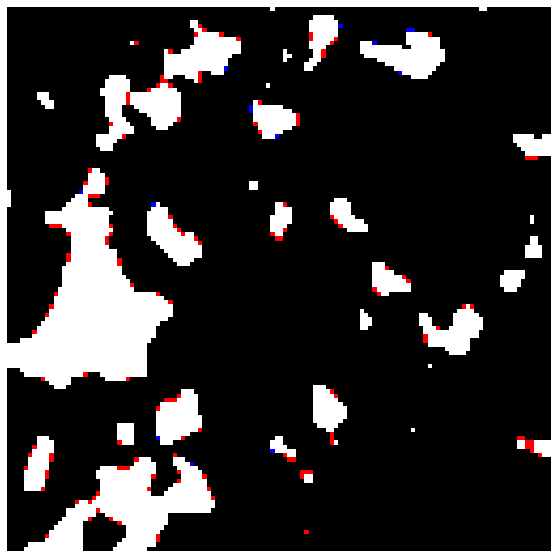

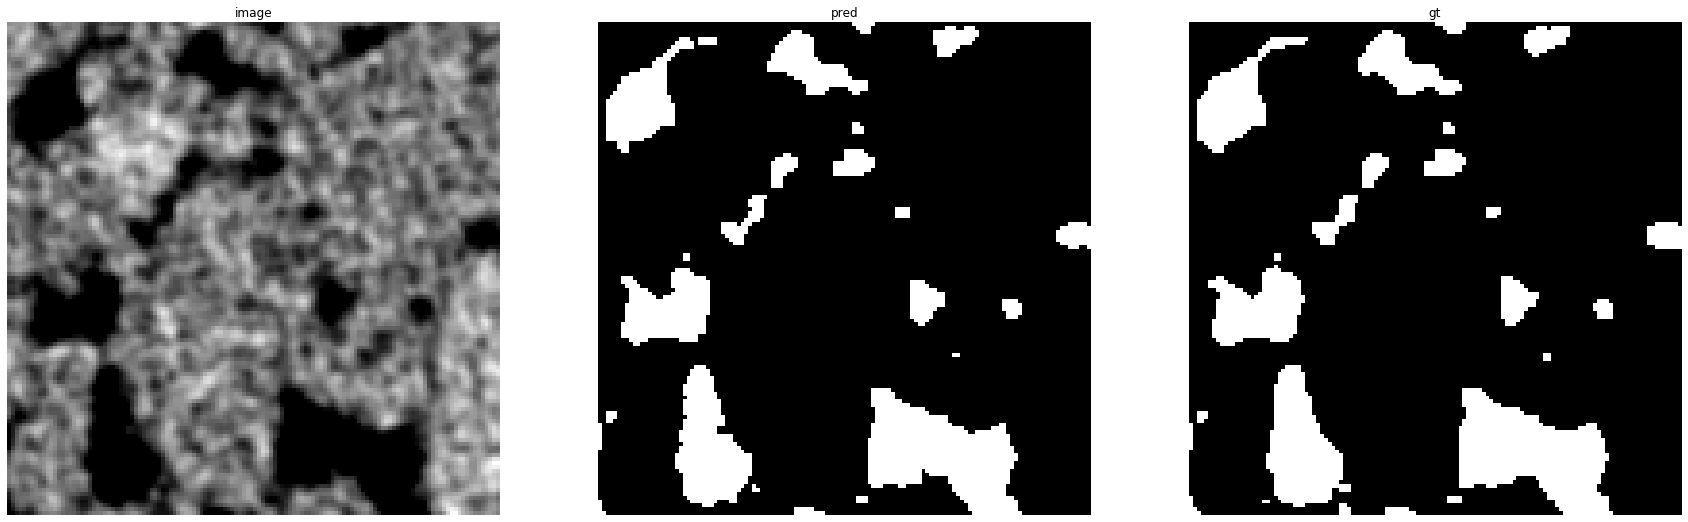

accuracy    : 0.99017333984375
precision   : 0.9964356435643564
recall      : 0.9430284857571214
f1          : 0.9689967263624109
pr_auc      : 0.9983056822870742
iou         : 0.9398580500560328


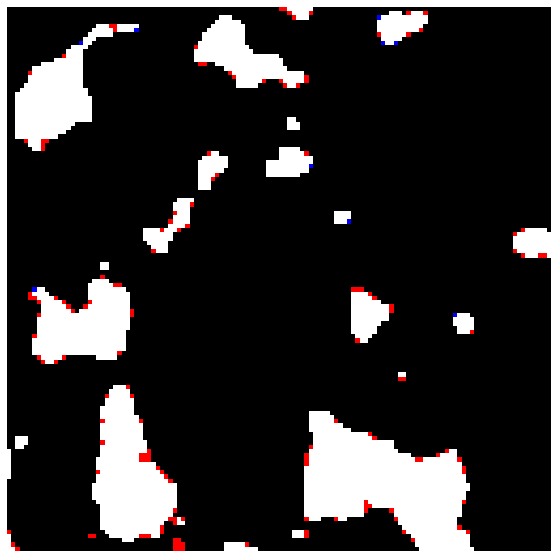

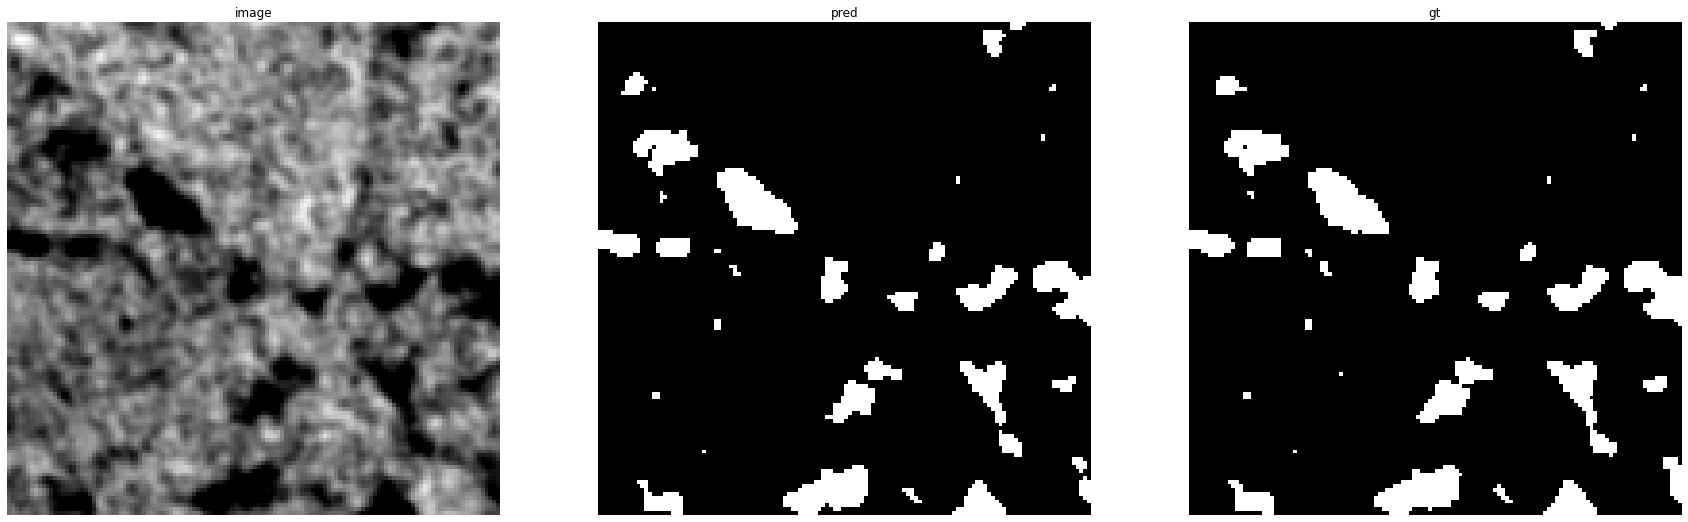

accuracy    : 0.99188232421875
precision   : 0.987813134732566
recall      : 0.9269377382465057
f1          : 0.9564077351687971
pr_auc      : 0.9946203396934249
iou         : 0.9164572864321608


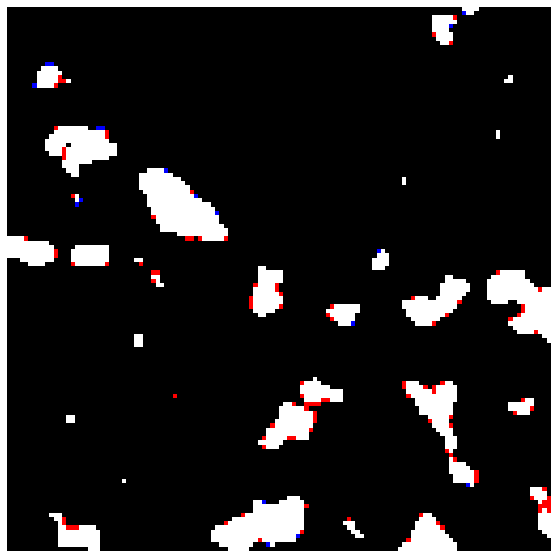

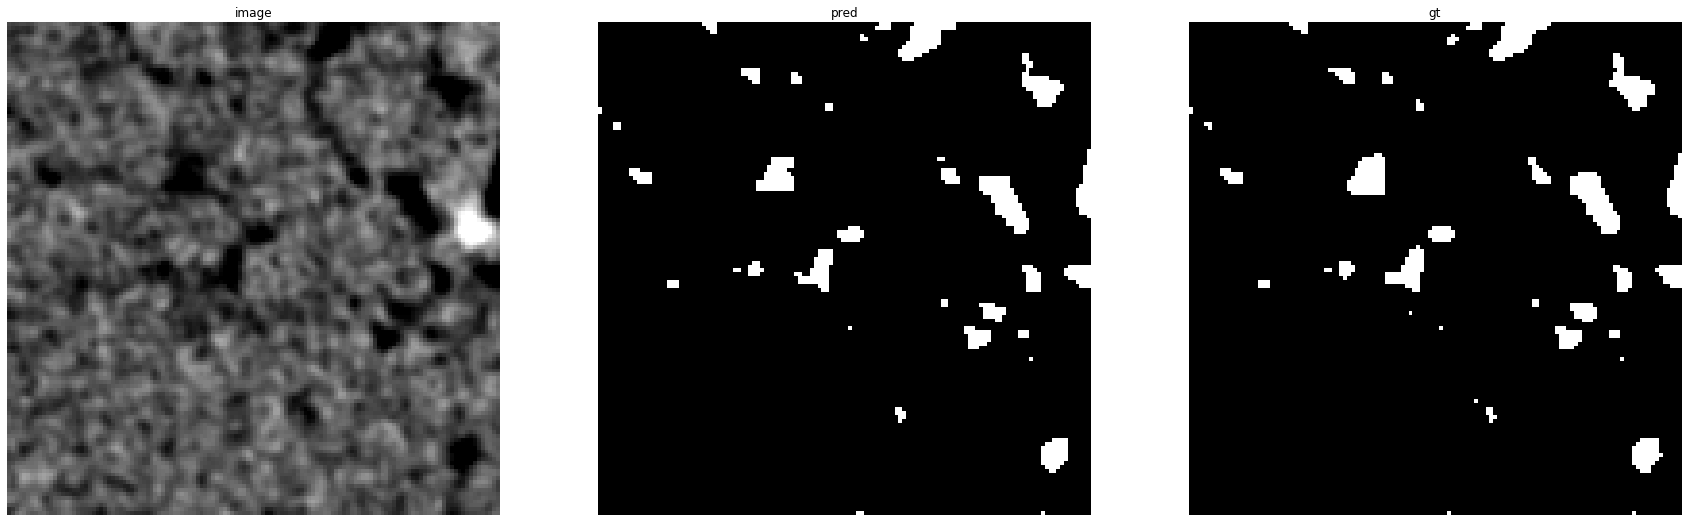

accuracy    : 0.99432373046875
precision   : 0.9865047233468286
recall      : 0.898034398034398
f1          : 0.940192926045016
pr_auc      : 0.9920821005533662
iou         : 0.8871359223300971


Prediction for Urna_22:


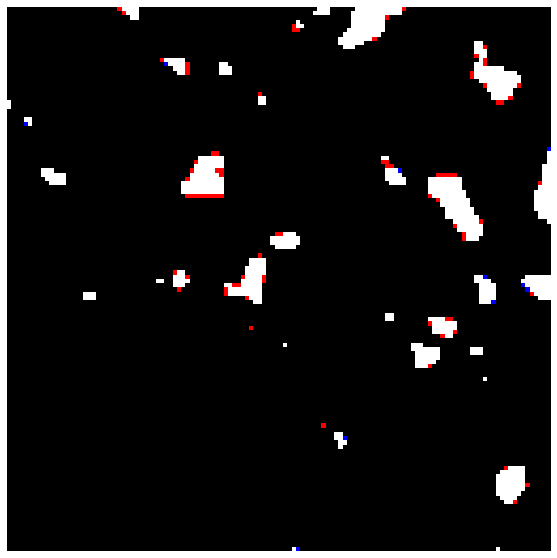

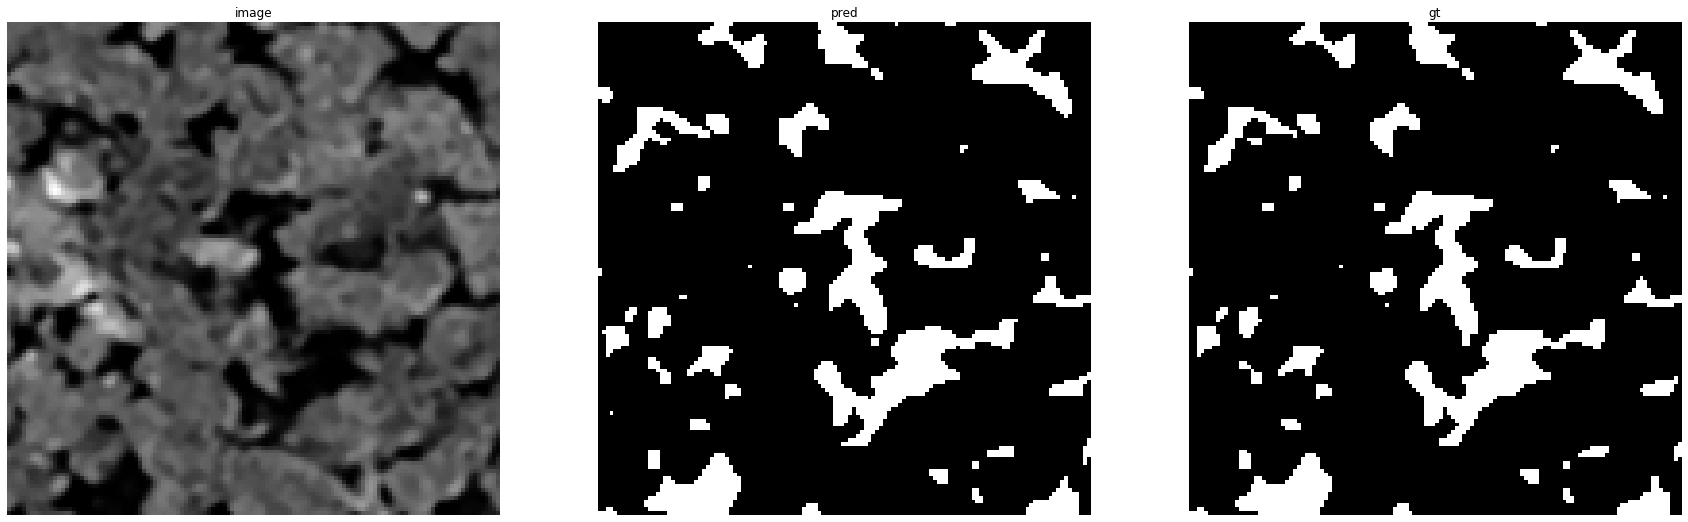

accuracy    : 0.99310302734375
precision   : 0.9590595865423591
recall      : 0.9949537426408747
f1          : 0.9766769865841073
pr_auc      : 0.9985639927900065
iou         : 0.954417103670835


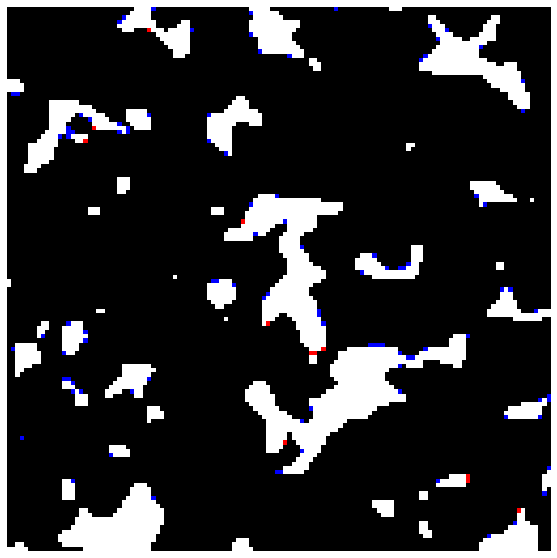

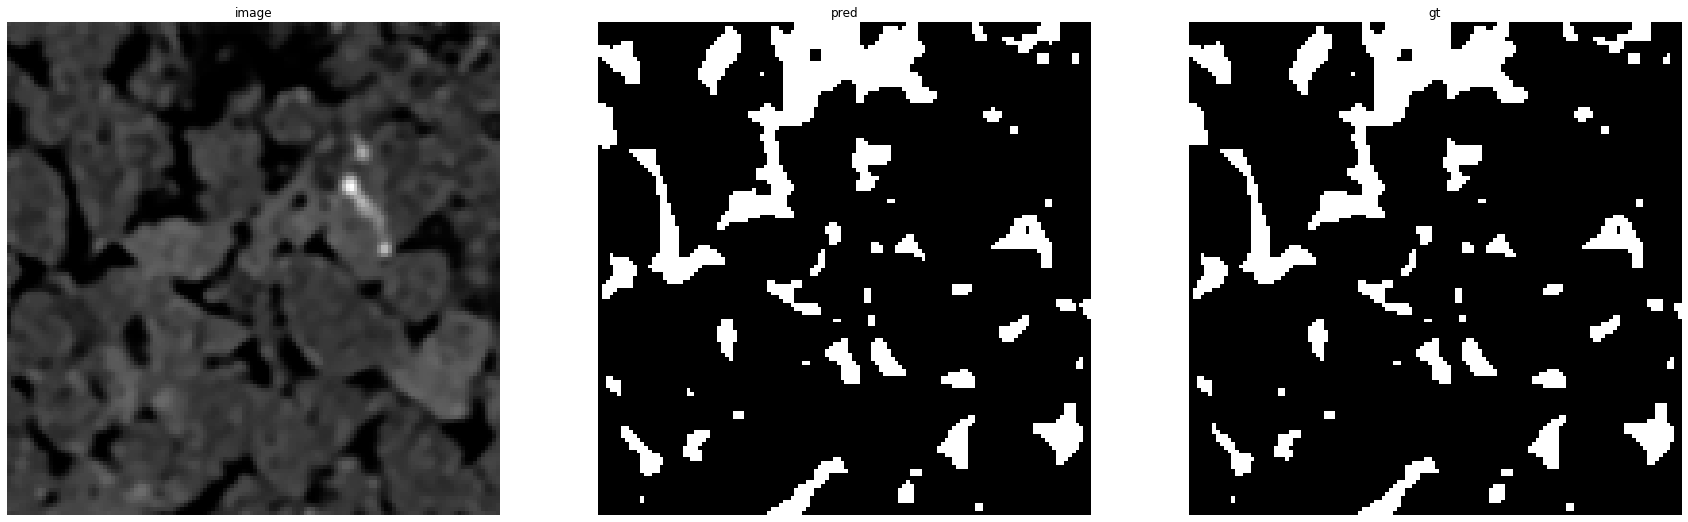

accuracy    : 0.9945068359375
precision   : 0.9689490445859873
recall      : 0.9950940310711366
f1          : 0.981847519160952
pr_auc      : 0.9989176327568936
iou         : 0.9643423137876387


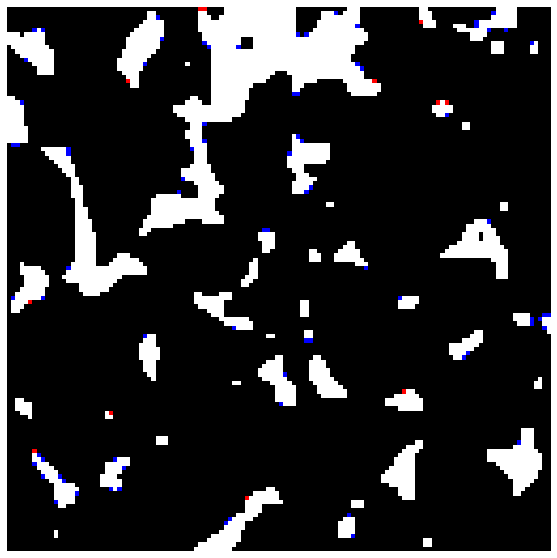

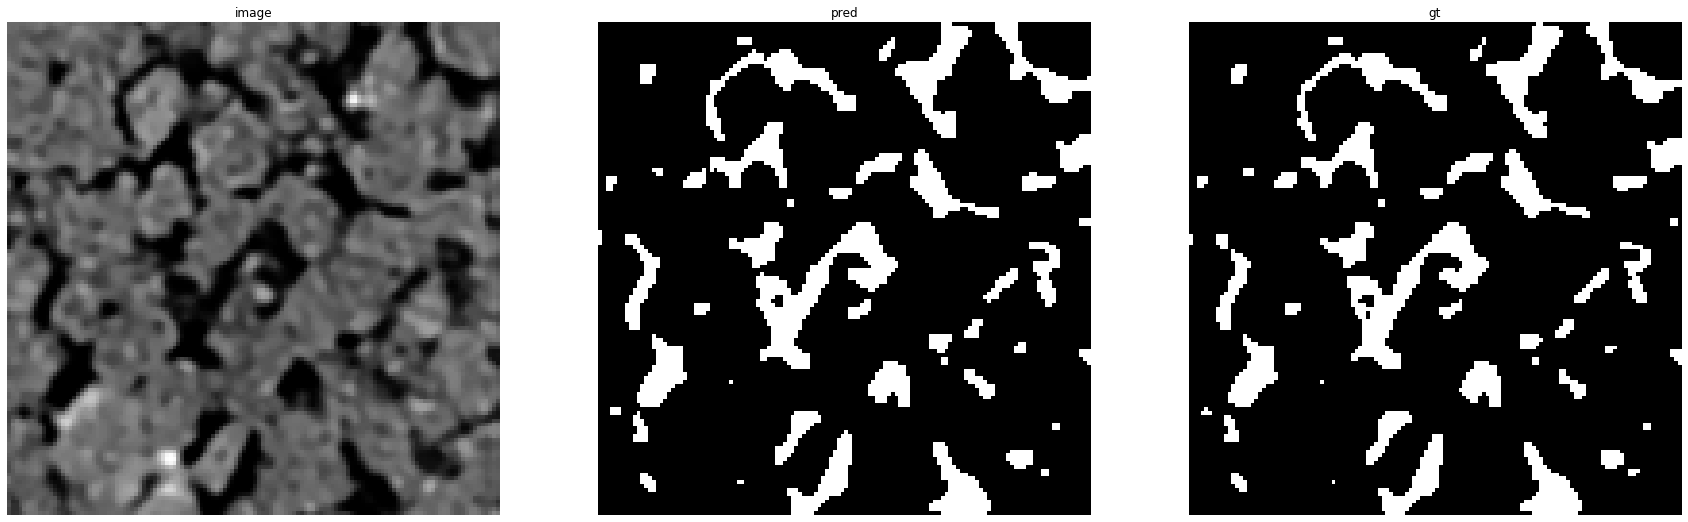

accuracy    : 0.990234375
precision   : 0.9441233140655106
recall      : 0.9939148073022313
f1          : 0.9683794466403163
pr_auc      : 0.9974621660634428
iou         : 0.9386973180076629


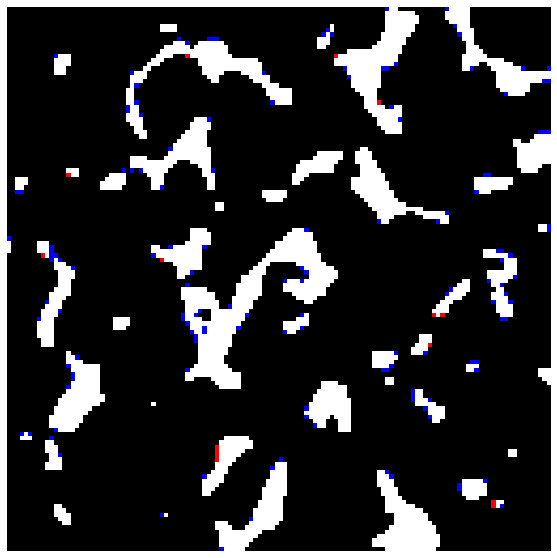

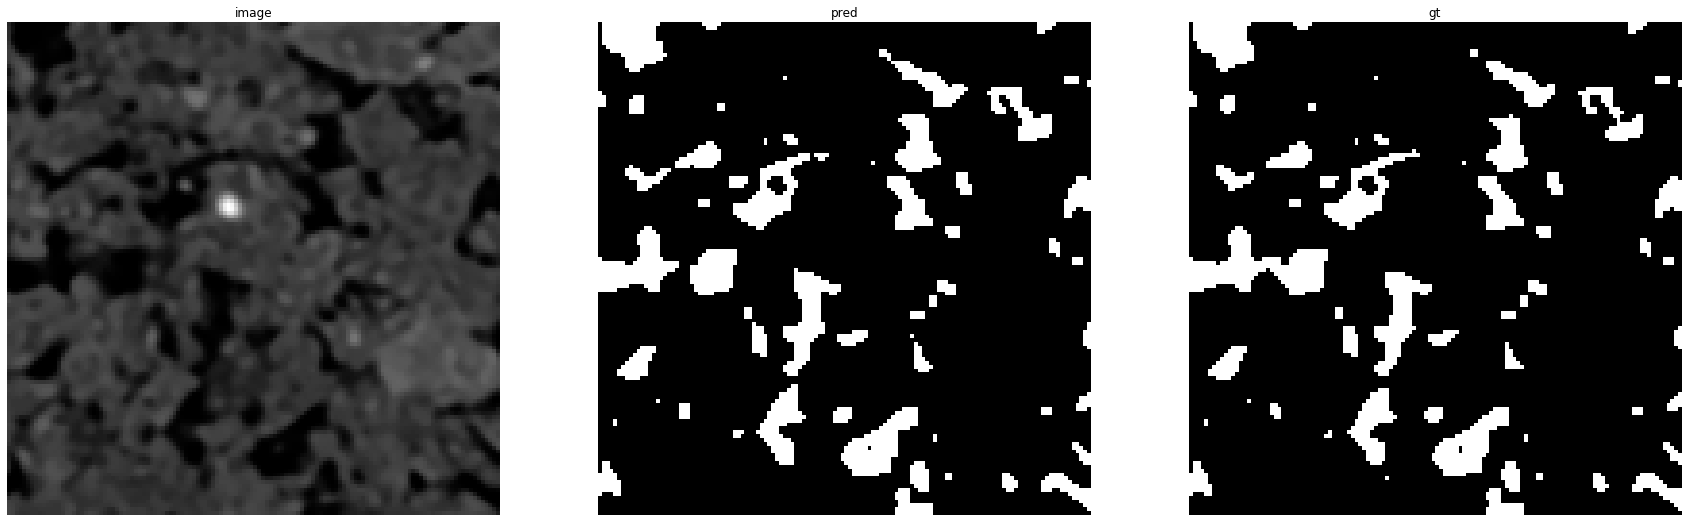

accuracy    : 0.99176025390625
precision   : 0.9530897609382047
recall      : 0.9855410447761194
f1          : 0.9690437972941985
pr_auc      : 0.9971601888461641
iou         : 0.9399466192170819


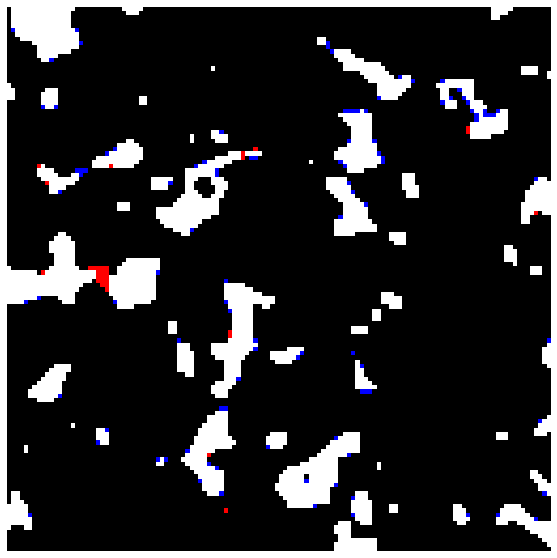

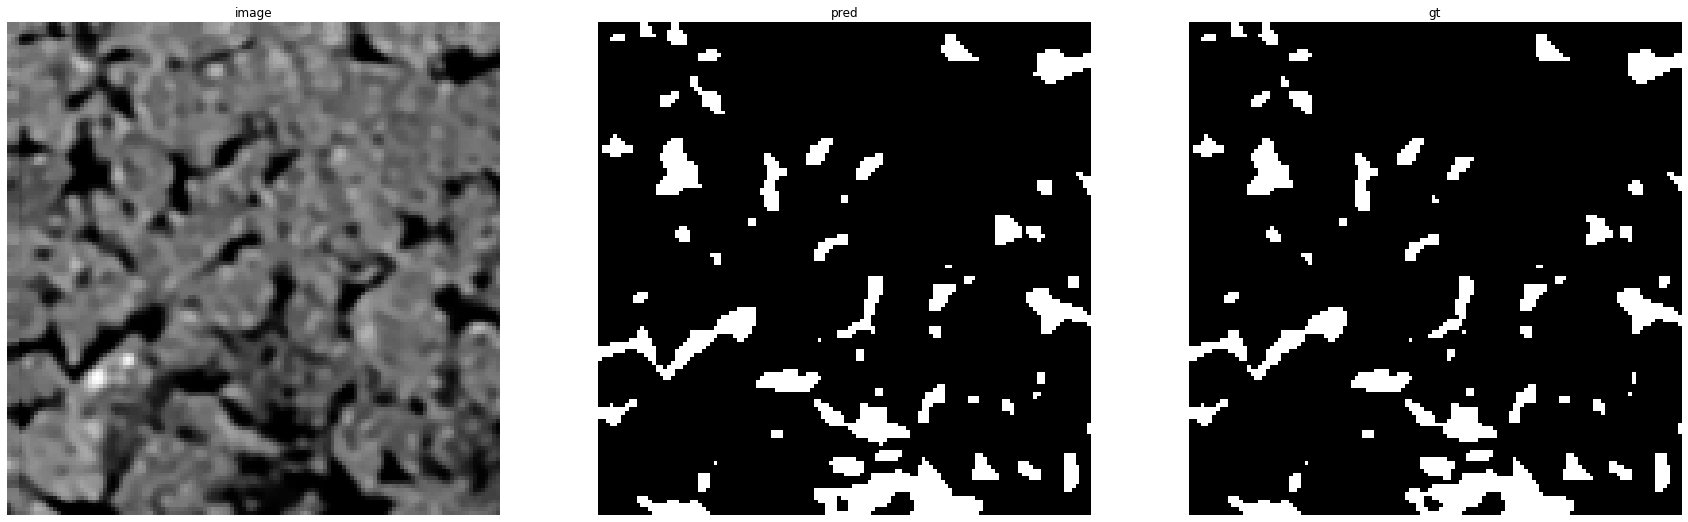

accuracy    : 0.9930419921875
precision   : 0.9477020602218701
recall      : 0.9917081260364843
f1          : 0.9692058346839546
pr_auc      : 0.9976113483403711
iou         : 0.940251572327044


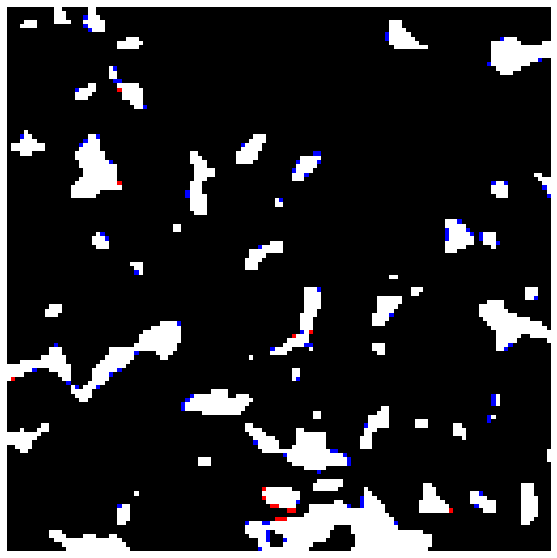

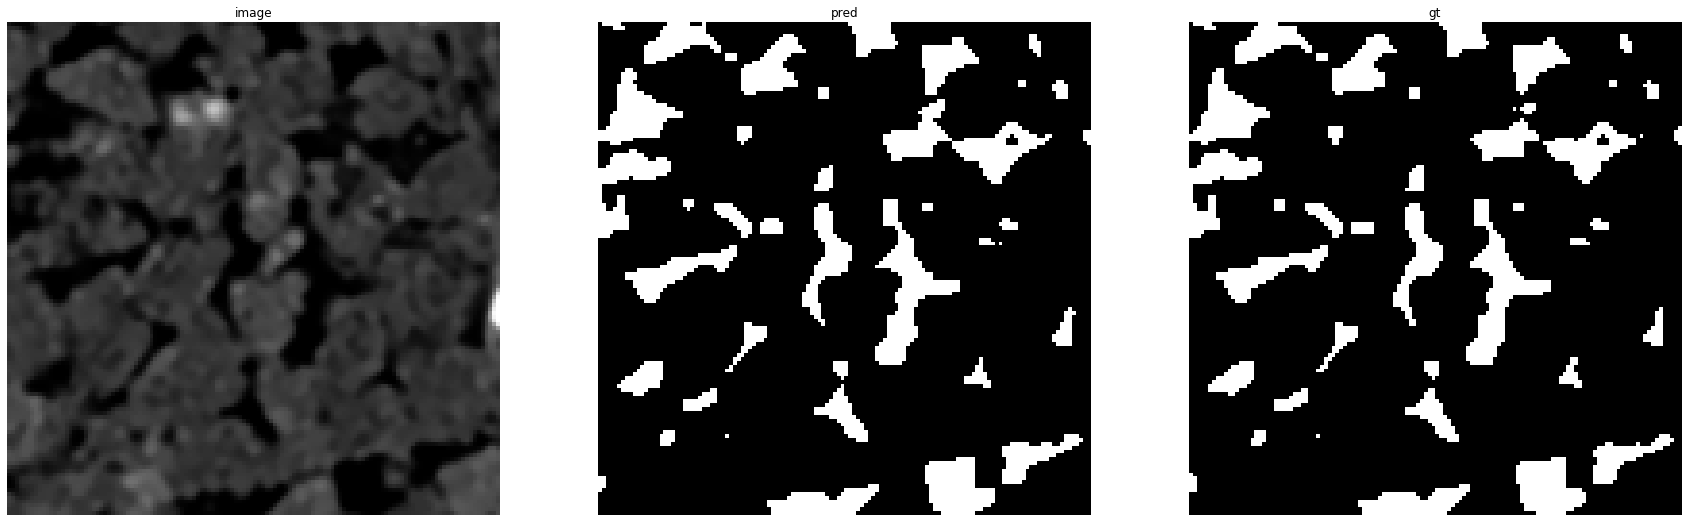

accuracy    : 0.99249267578125
precision   : 0.9632860777898946
recall      : 0.9917664670658682
f1          : 0.9773188272174073
pr_auc      : 0.9986895342300234
iou         : 0.9556437071763433


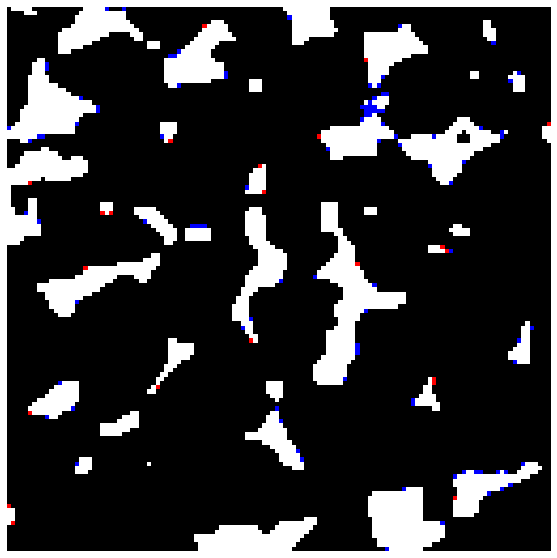

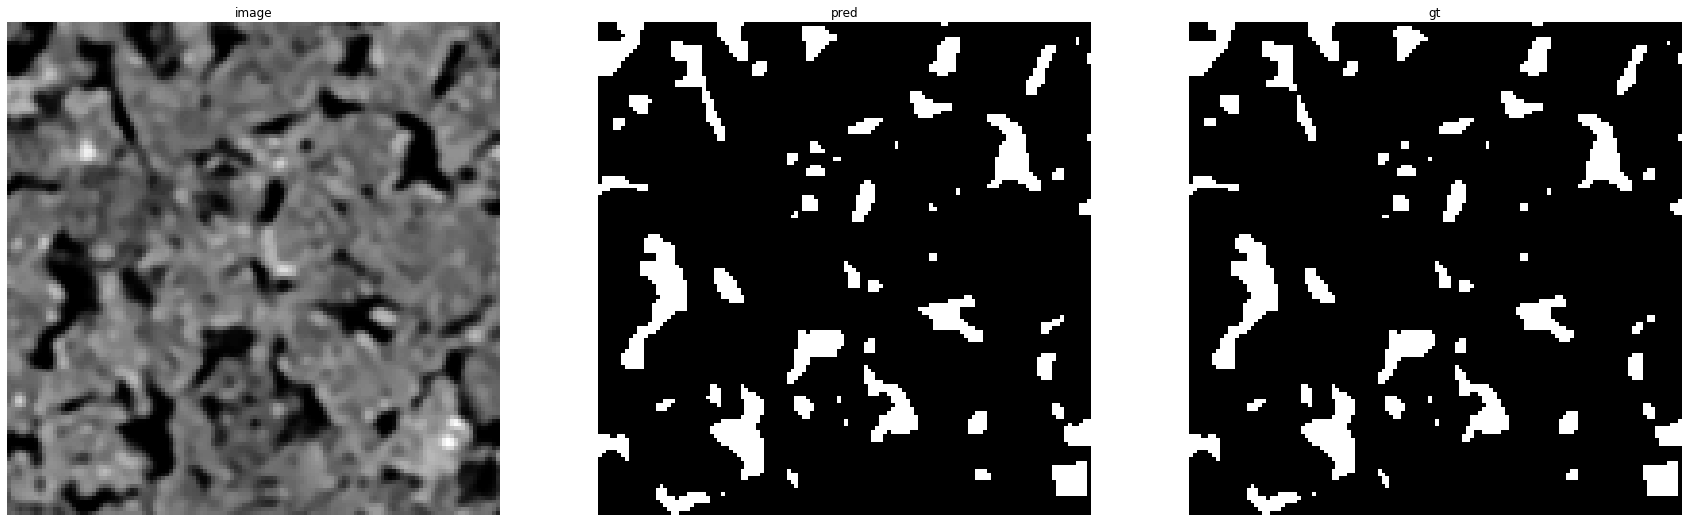

accuracy    : 0.9949951171875
precision   : 0.9611111111111111
recall      : 0.9973794549266247
f1          : 0.9789094650205761
pr_auc      : 0.9982101142937368
iou         : 0.9586901763224182


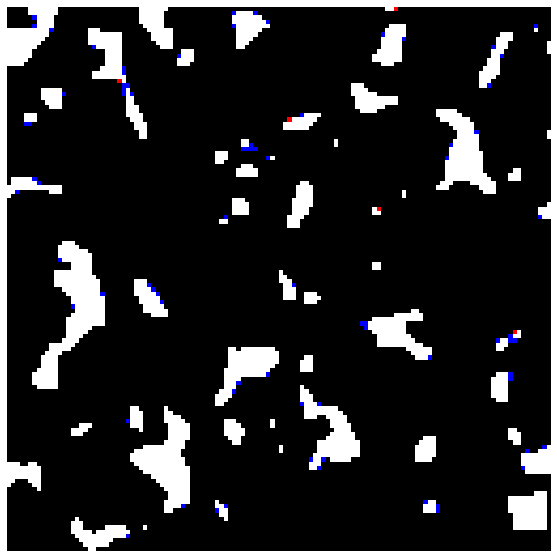

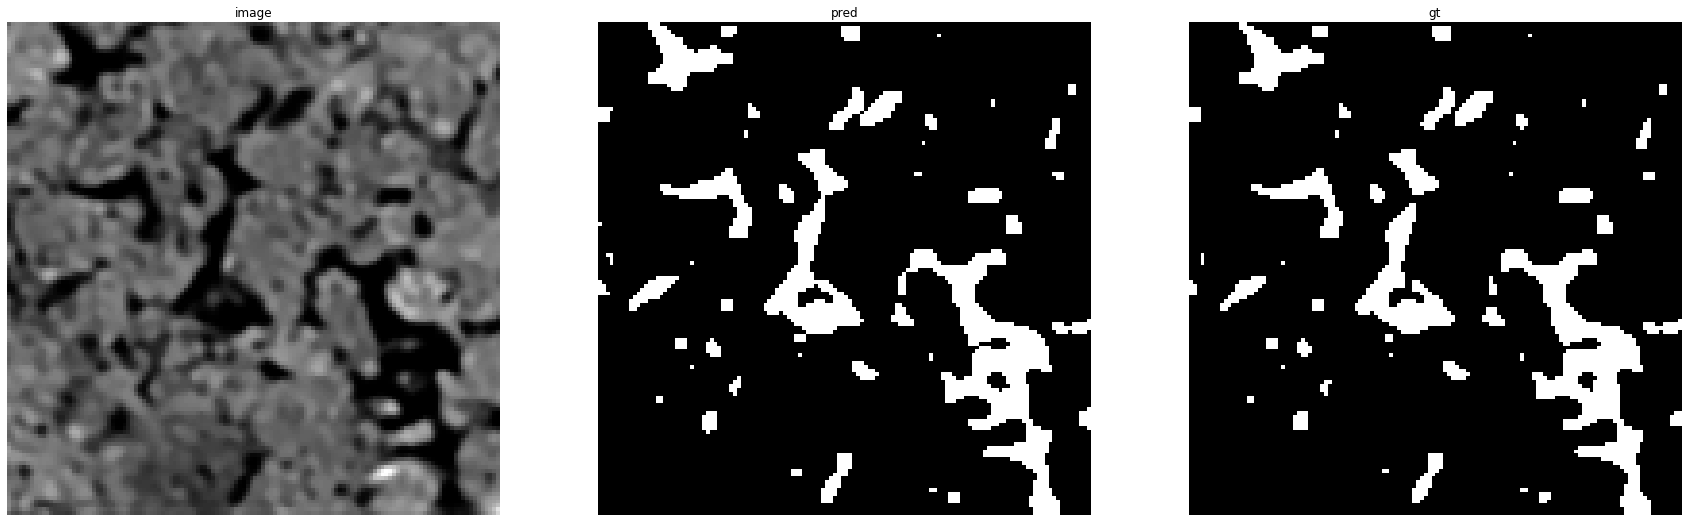

accuracy    : 0.99432373046875
precision   : 0.959479015918958
recall      : 0.9954954954954955
f1          : 0.9771554900515845
pr_auc      : 0.9987922470744233
iou         : 0.9553314121037464


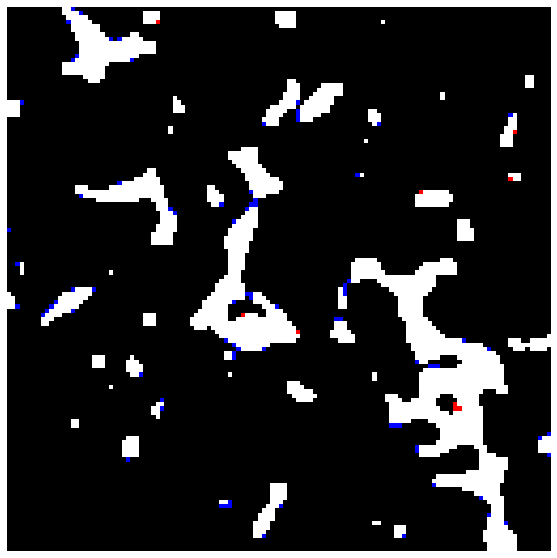

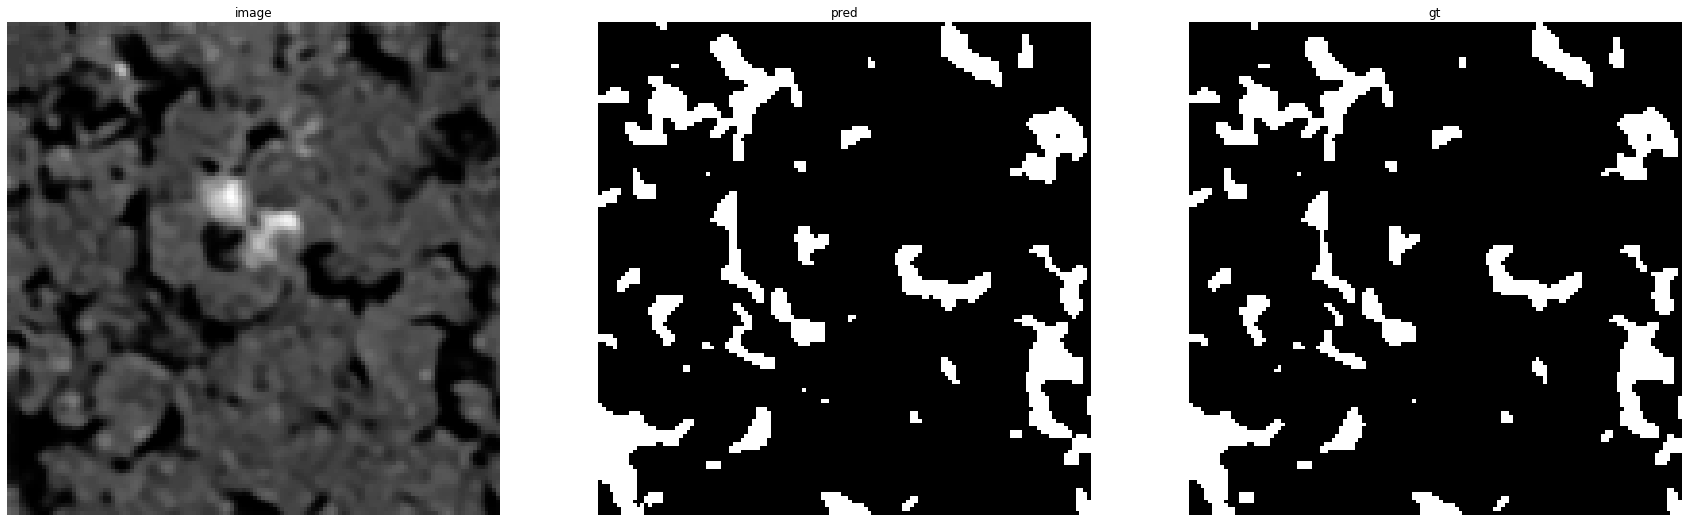

accuracy    : 0.9906005859375
precision   : 0.9411764705882353
recall      : 0.9947460595446584
f1          : 0.9672200936568752
pr_auc      : 0.9979817352277878
iou         : 0.9365210222588624


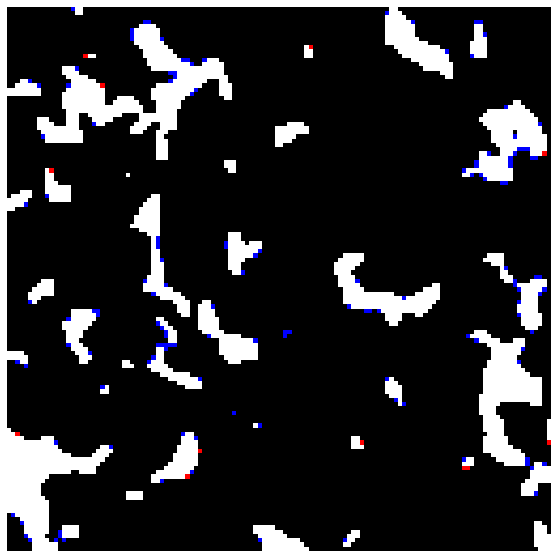

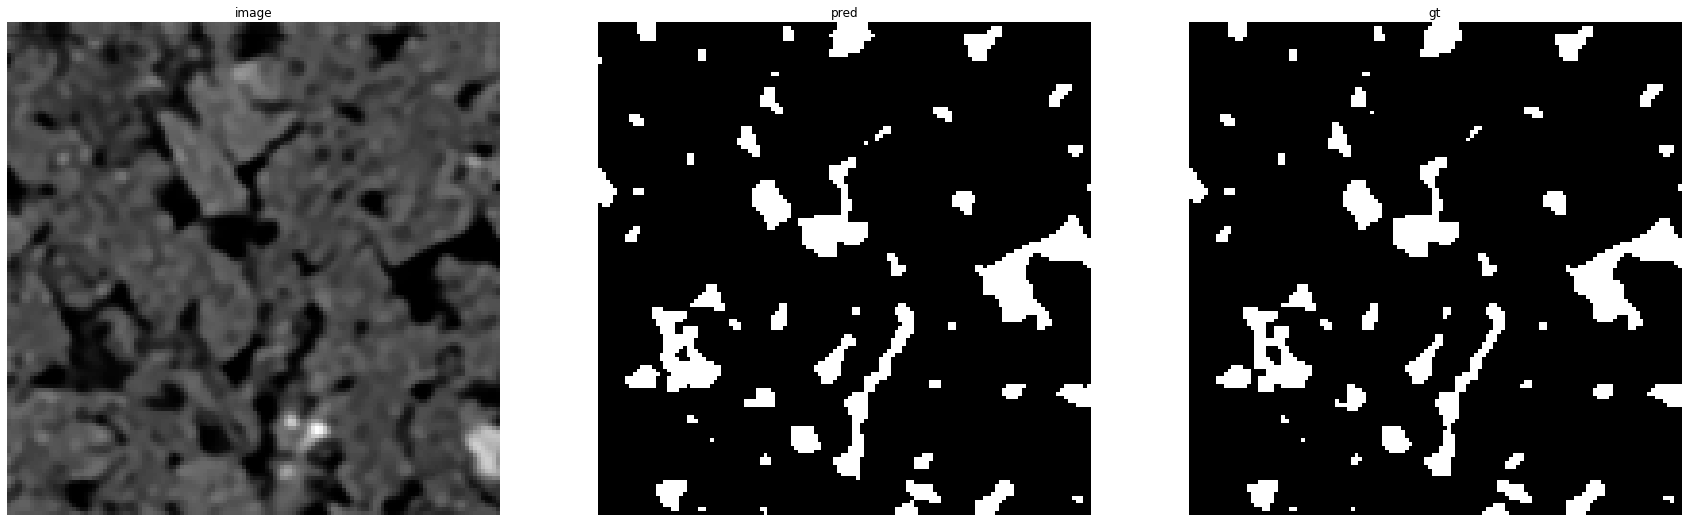

accuracy    : 0.9923095703125
precision   : 0.9475374732334048
recall      : 0.9844271412680756
f1          : 0.9656301145662849
pr_auc      : 0.9968971299480767
iou         : 0.9335443037974683


Prediction for Urna_30:


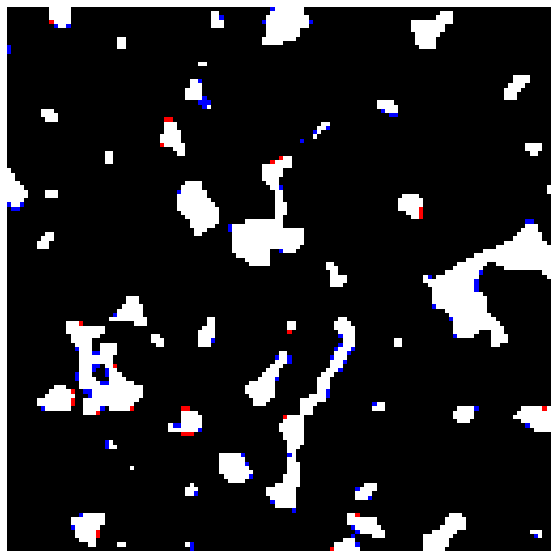

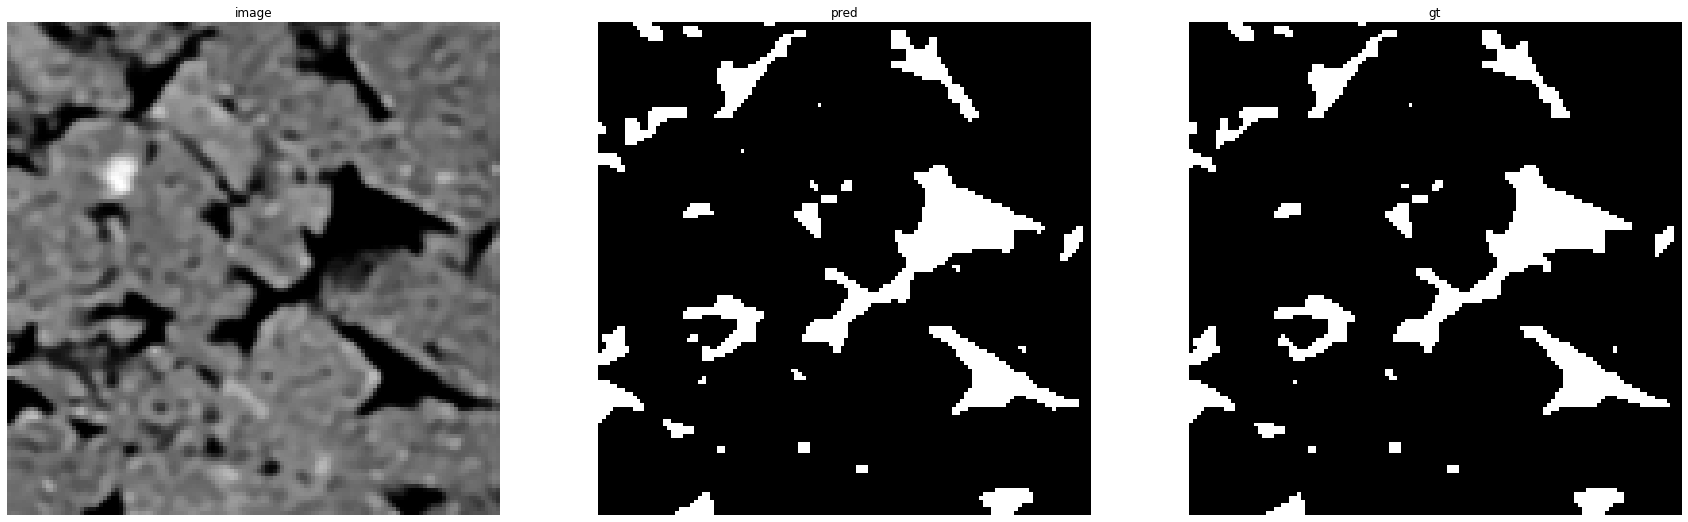

accuracy    : 0.9925537109375
precision   : 0.9582494969818913
recall      : 0.9799382716049383
f1          : 0.968972533062055
pr_auc      : 0.9976163858827709
iou         : 0.9398125308337445


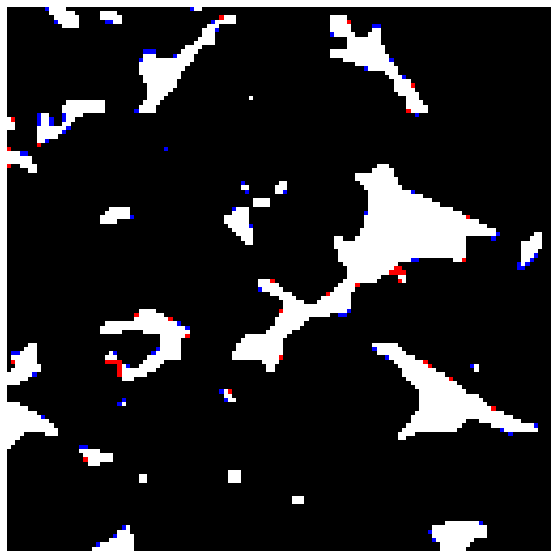

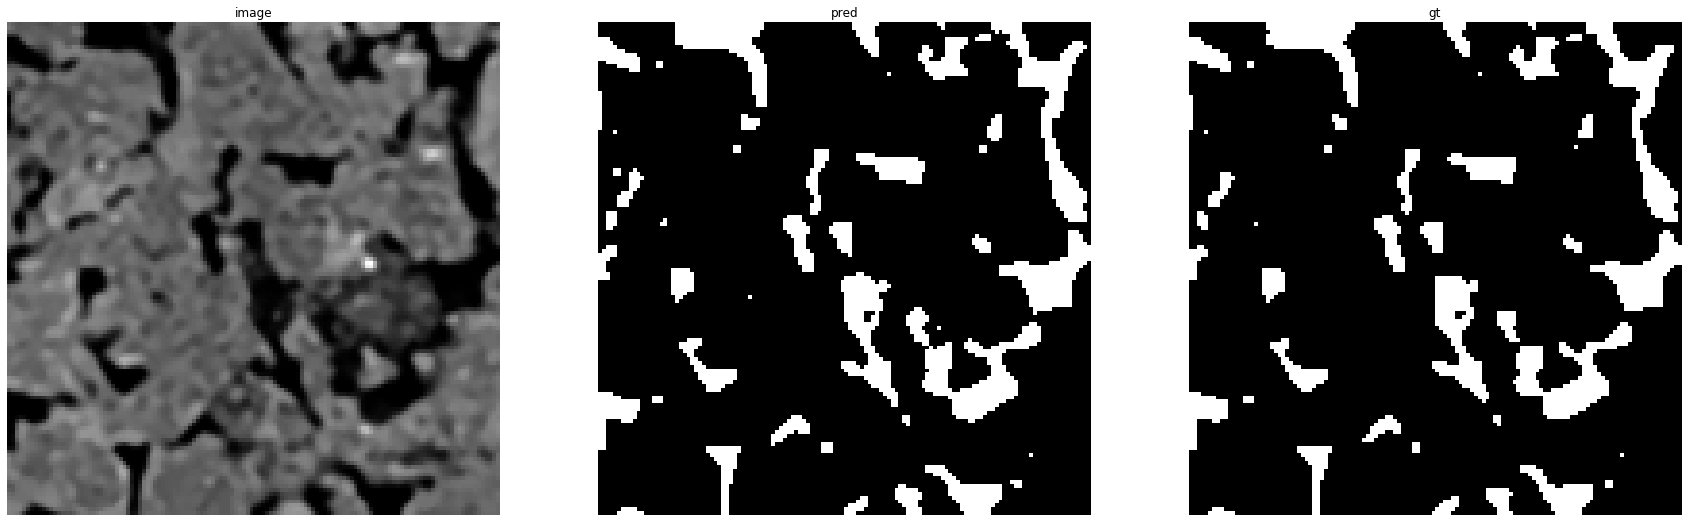

accuracy    : 0.9879150390625
precision   : 0.9362903225806452
recall      : 0.983065198983912
f1          : 0.9591078066914498
pr_auc      : 0.9964369285290015
iou         : 0.9214285714285714


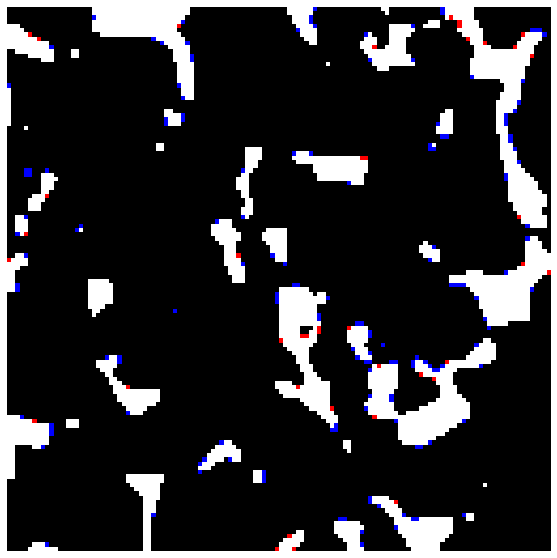

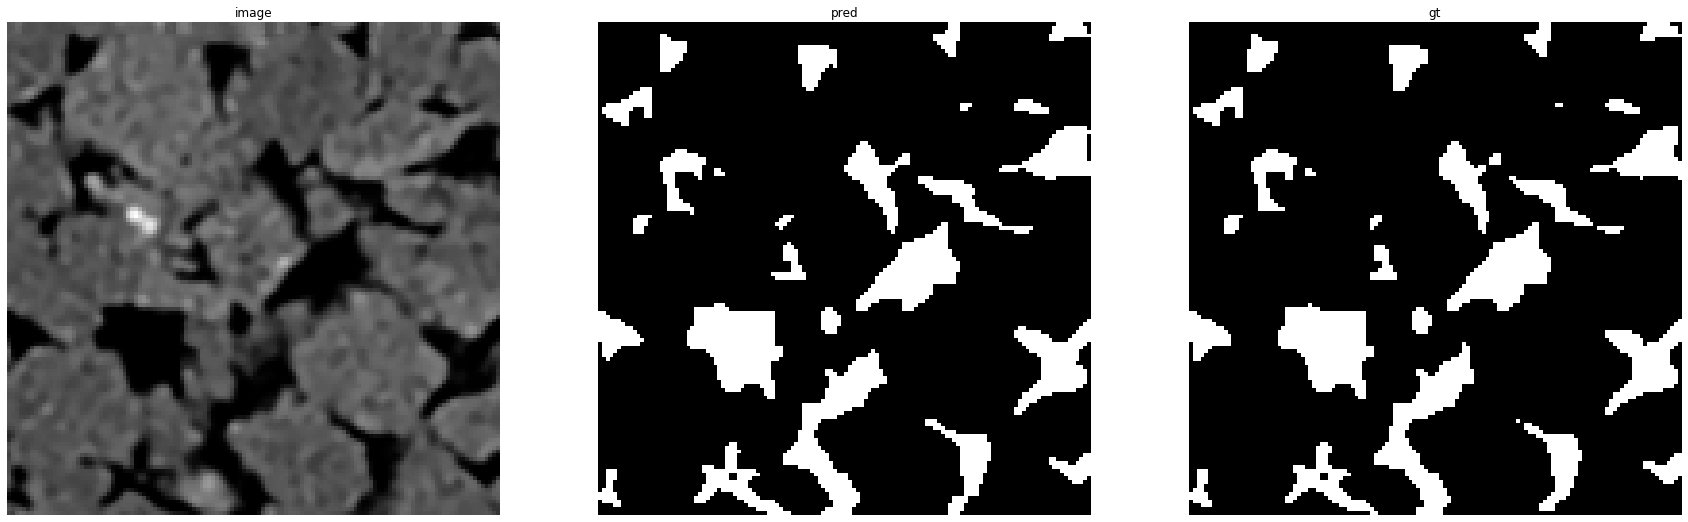

accuracy    : 0.99212646484375
precision   : 0.9686578171091446
recall      : 0.9835267690003744
f1          : 0.97603566784321
pr_auc      : 0.9984044744752676
iou         : 0.9531930333817126


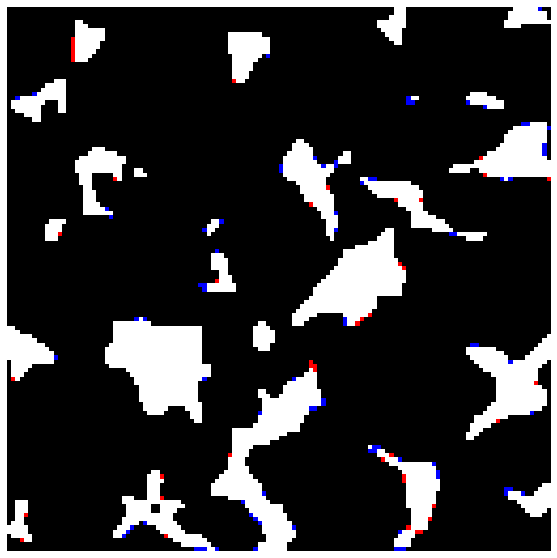

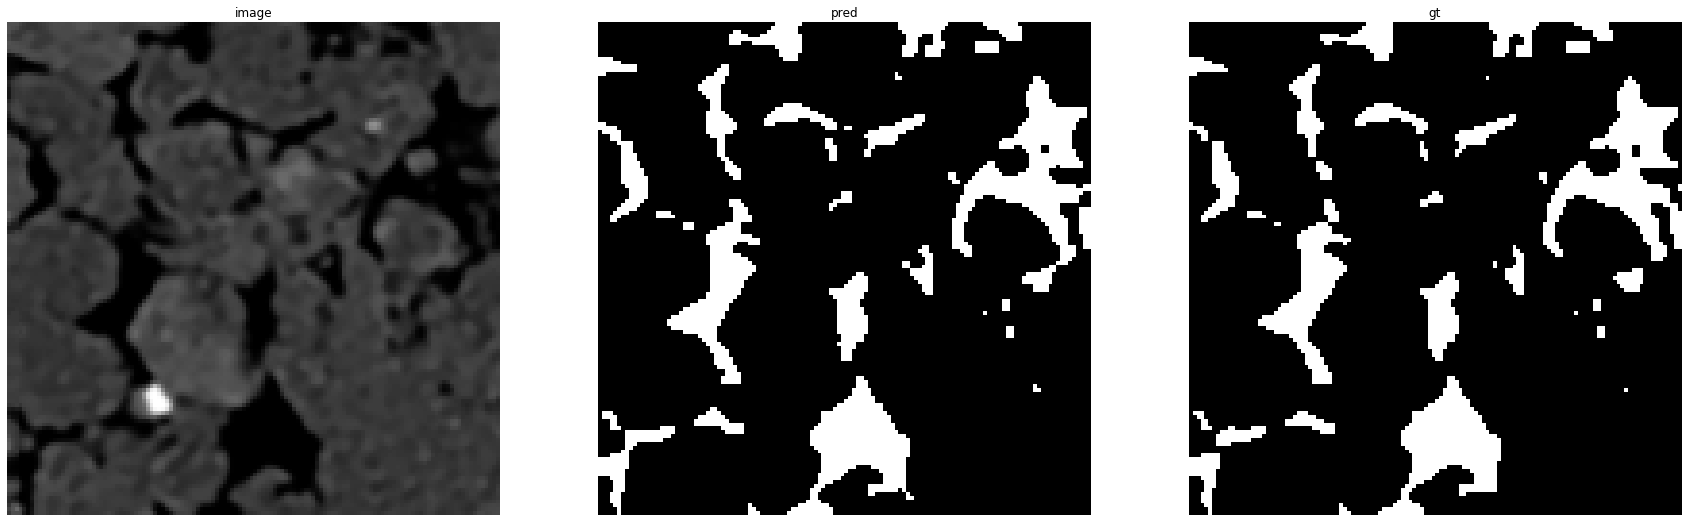

accuracy    : 0.99041748046875
precision   : 0.9567033801747057
recall      : 0.983216237314598
f1          : 0.9697786333012511
pr_auc      : 0.9979623596490204
iou         : 0.9413303437967115


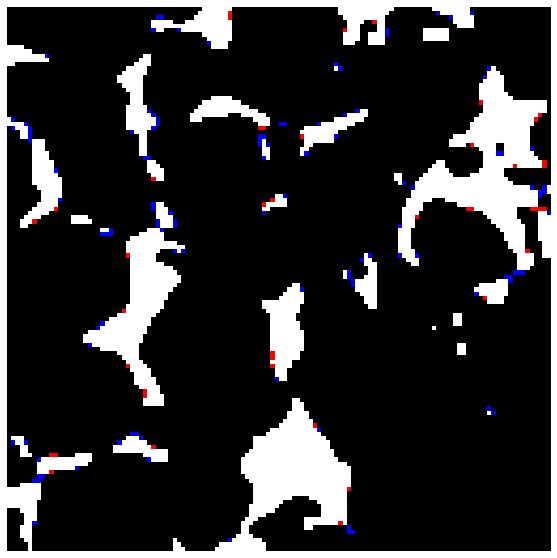

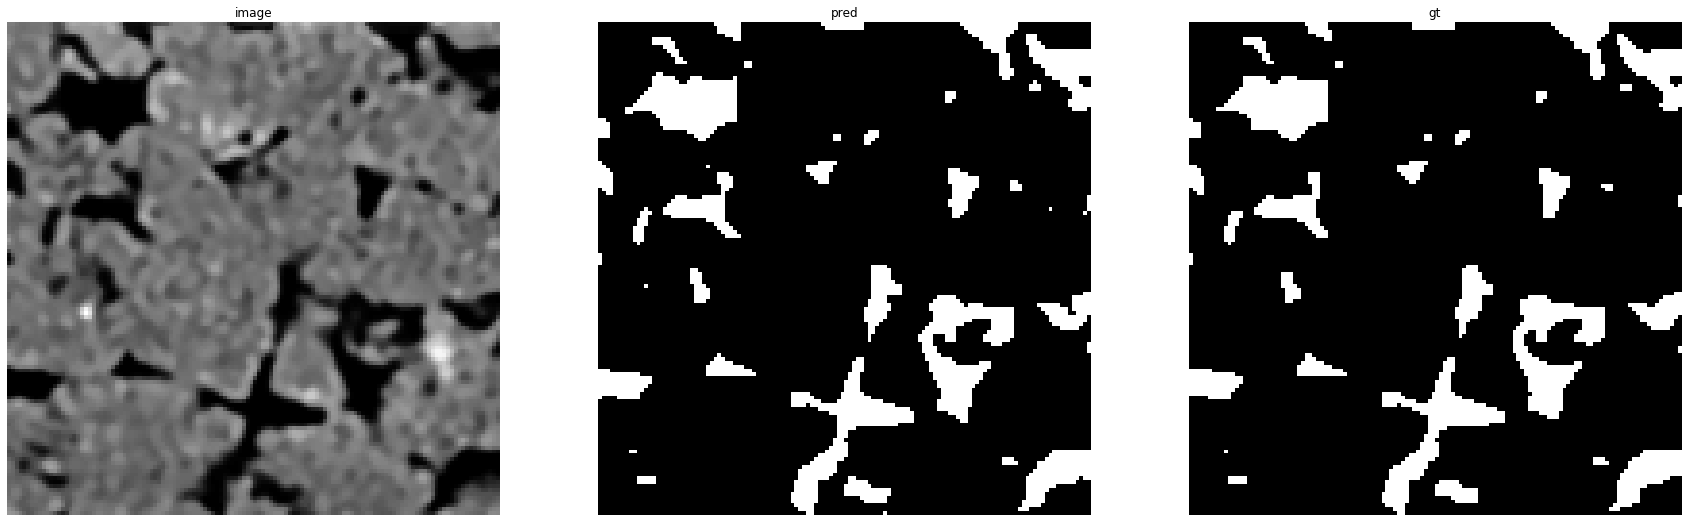

accuracy    : 0.99224853515625
precision   : 0.9652406417112299
recall      : 0.9778781038374718
f1          : 0.9715182776407266
pr_auc      : 0.9977814276523946
iou         : 0.9446140427387701


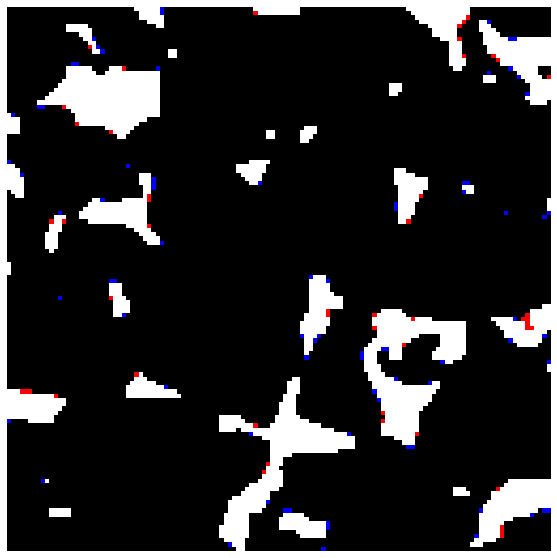

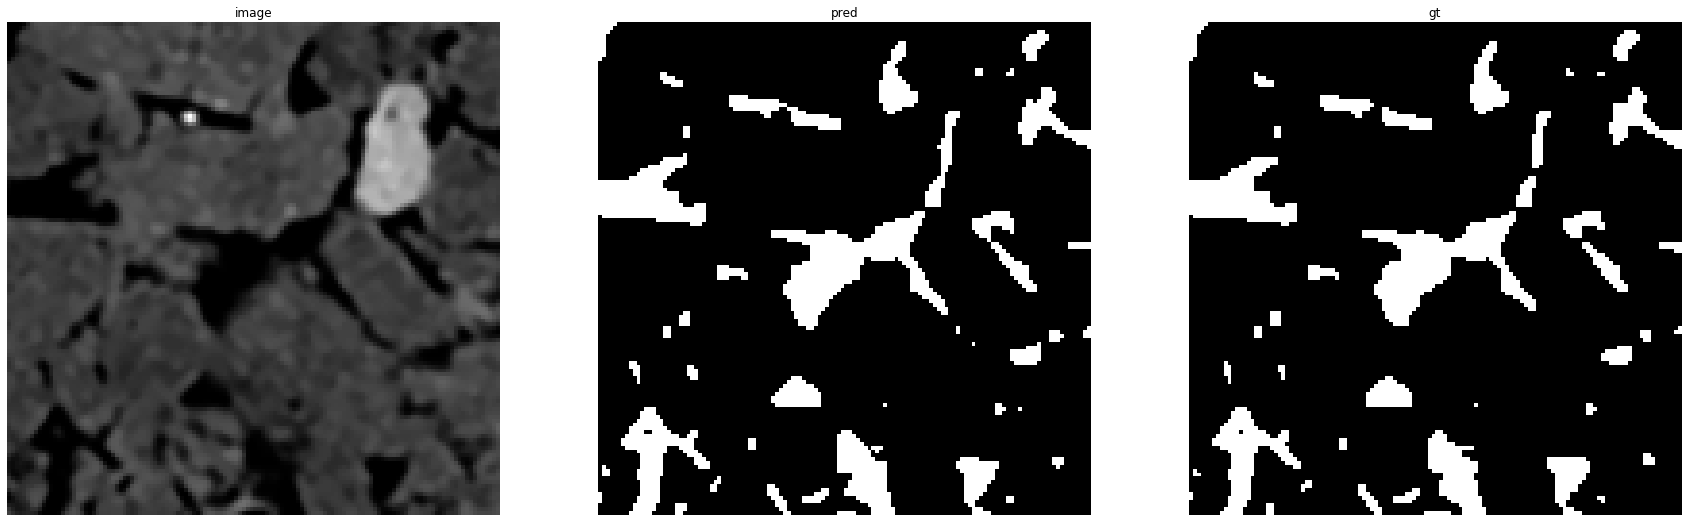

accuracy    : 0.9915771484375
precision   : 0.9566982408660352
recall      : 0.9805825242718447
f1          : 0.9684931506849315
pr_auc      : 0.9975154929870398
iou         : 0.9389110225763613


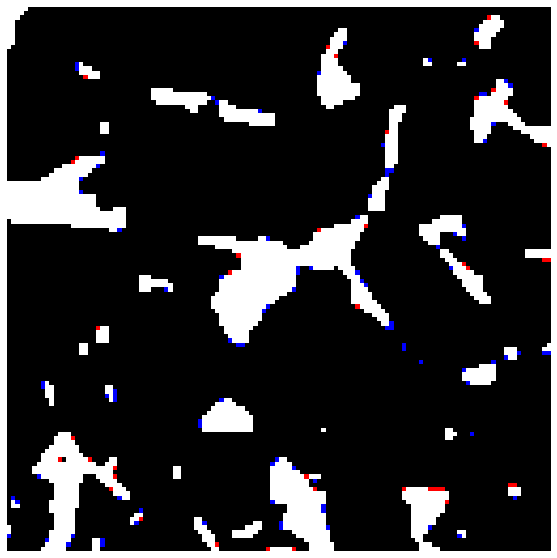

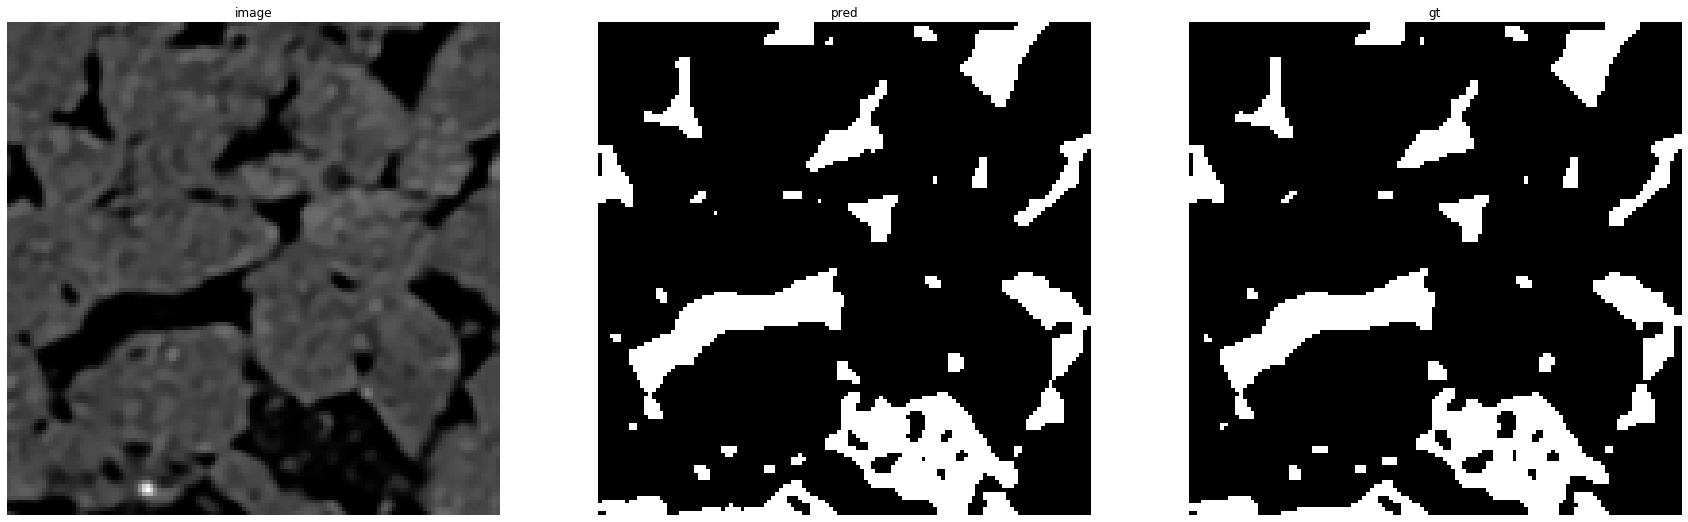

accuracy    : 0.9912109375
precision   : 0.9717460317460317
recall      : 0.9823491655969191
f1          : 0.977018831790616
pr_auc      : 0.9985617123198558
iou         : 0.9550702028081123


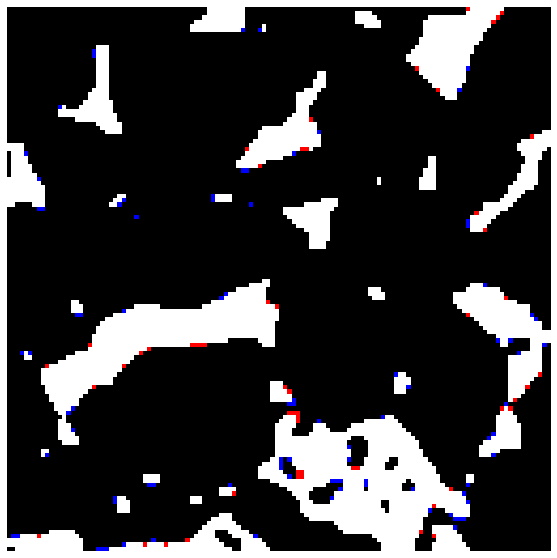

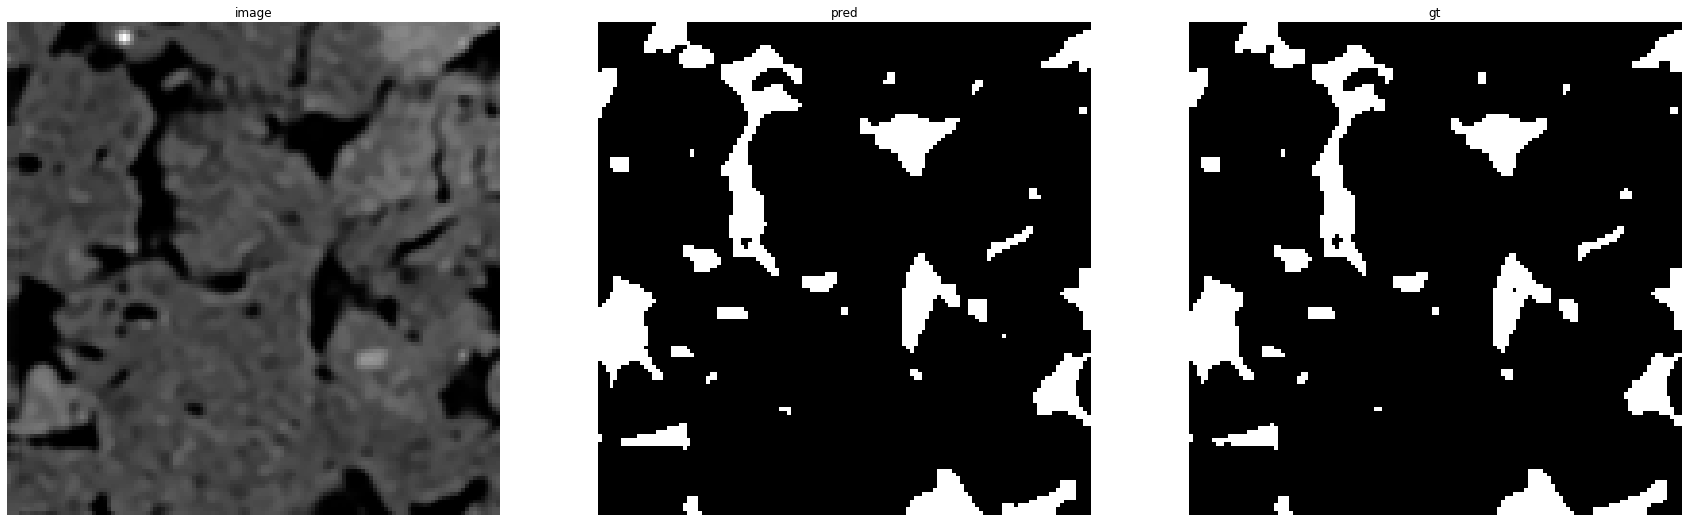

accuracy    : 0.99371337890625
precision   : 0.9640321817321345
recall      : 0.9869186046511628
f1          : 0.9753411539382332
pr_auc      : 0.998042198298591
iou         : 0.9518691588785047


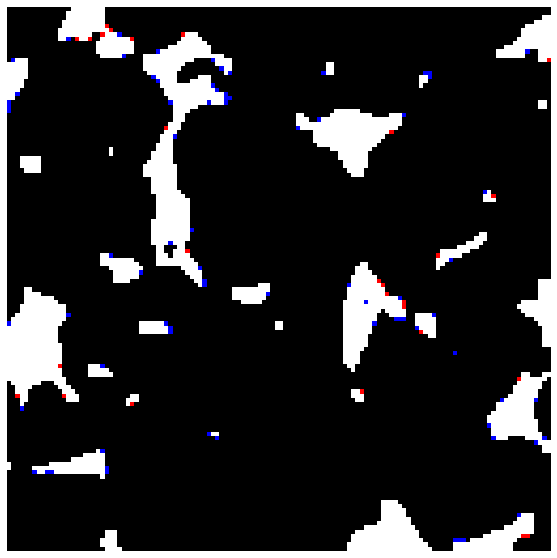

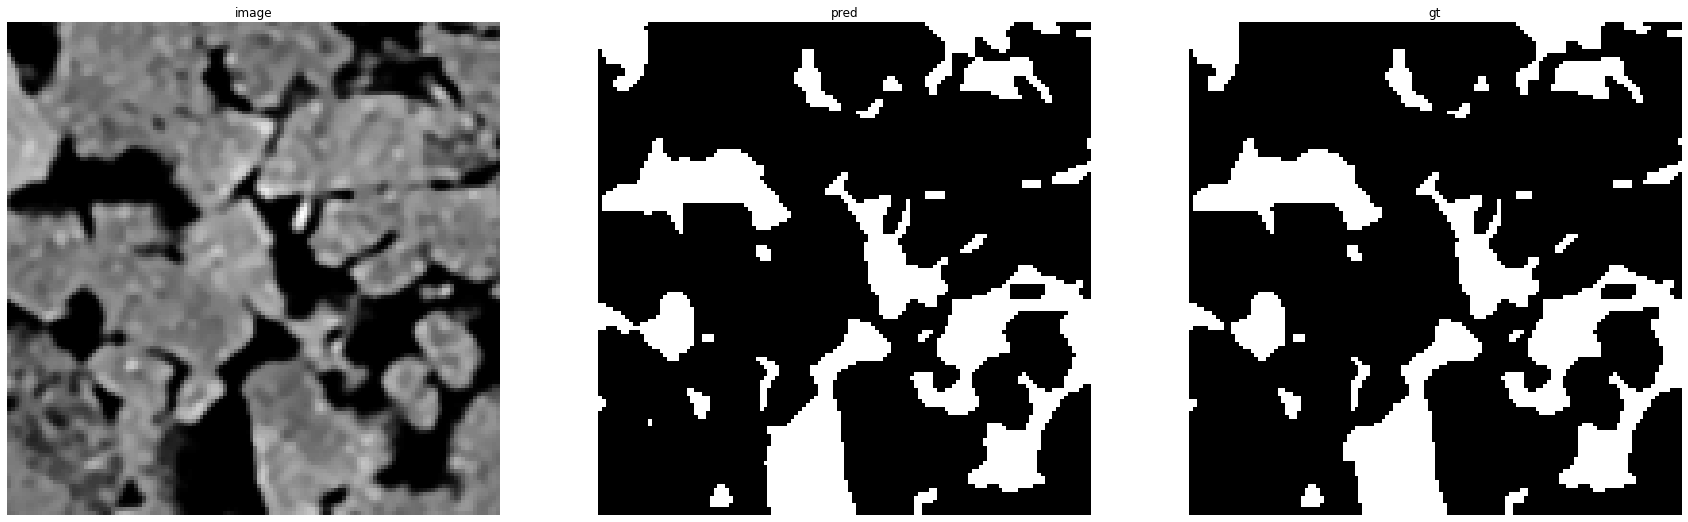

accuracy    : 0.99005126953125
precision   : 0.9790958975698981
recall      : 0.9783289817232376
f1          : 0.9787122894083845
pr_auc      : 0.9987530998544739
iou         : 0.958312020460358


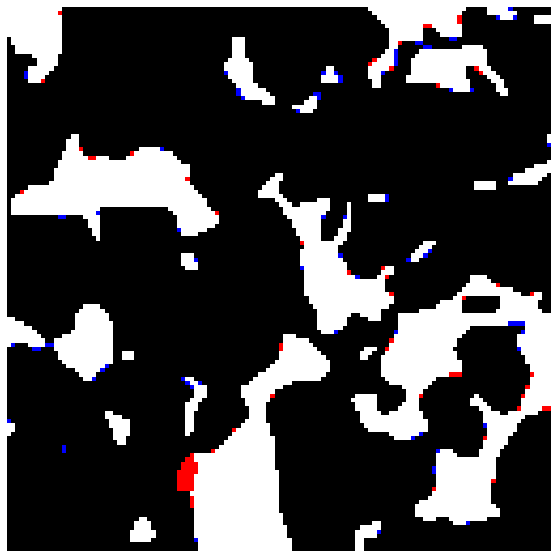

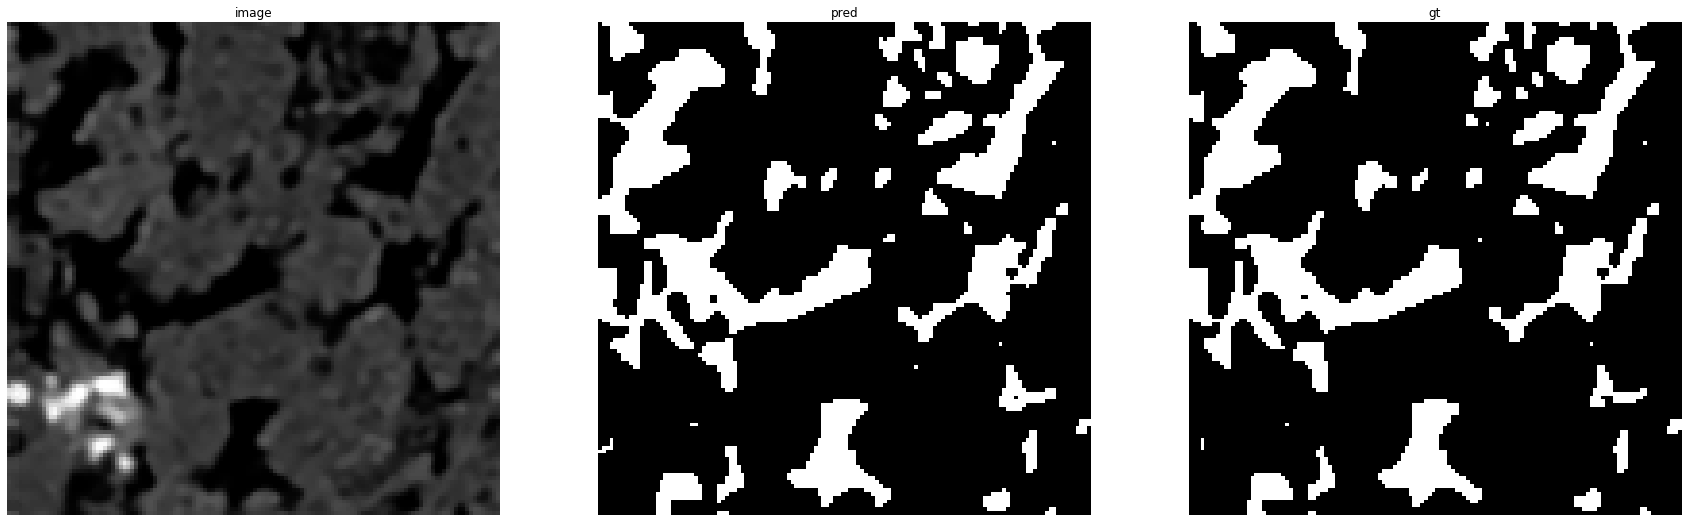

accuracy    : 0.987548828125
precision   : 0.9559955995599559
recall      : 0.9875
f1          : 0.971492453884852
pr_auc      : 0.9981784446211711
iou         : 0.9445652173913044


Prediction for Urna_34:


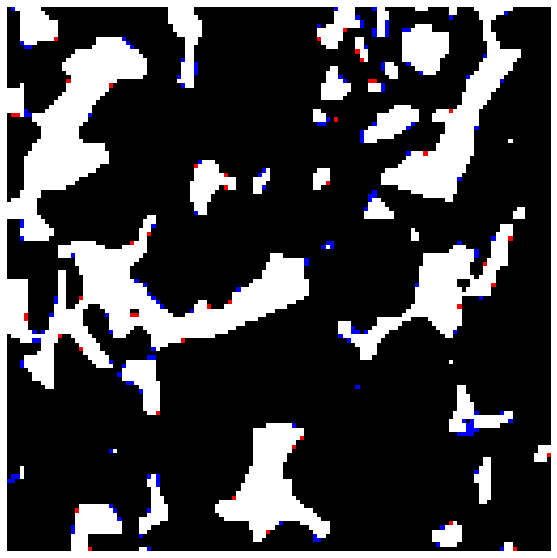

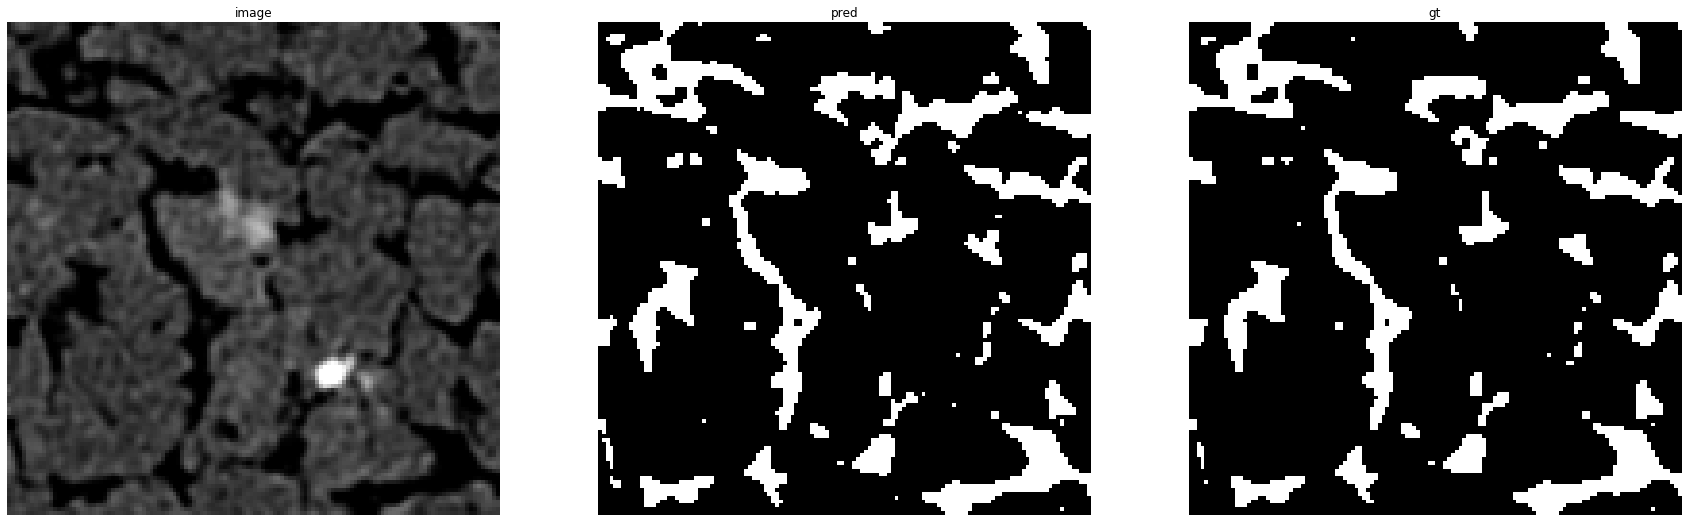

accuracy    : 0.9803466796875
precision   : 0.9259885096316323
recall      : 0.963770664790714
f1          : 0.9445018958979662
pr_auc      : 0.9909179617837987
iou         : 0.8948399738732854


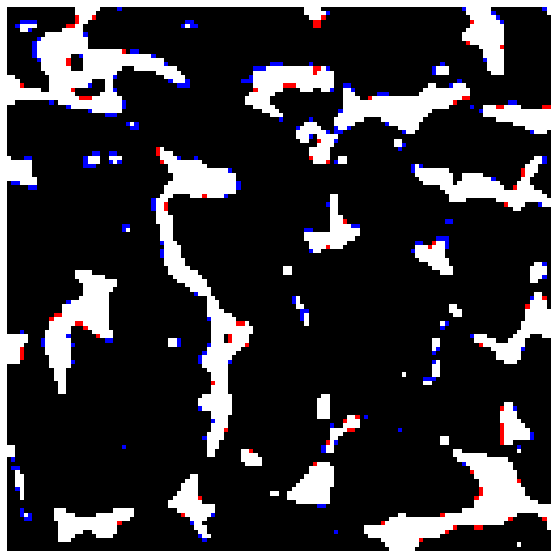

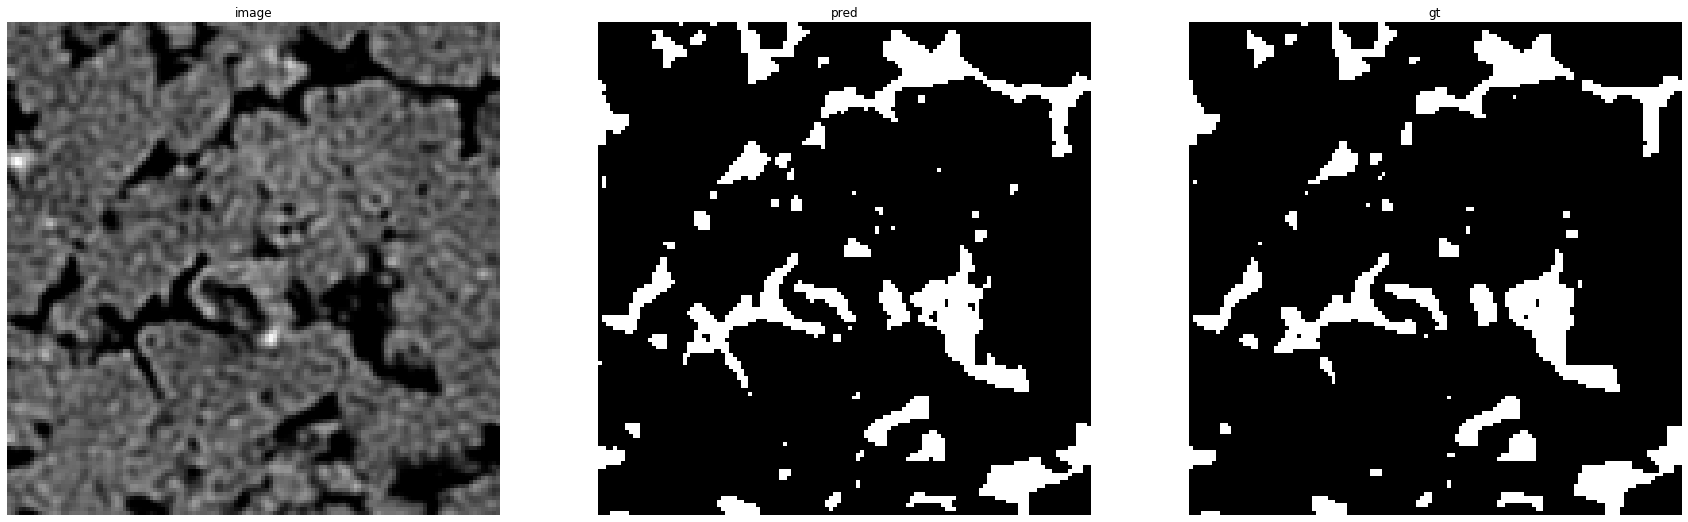

accuracy    : 0.98052978515625
precision   : 0.896795672076571
recall      : 0.968104222821204
f1          : 0.9310866277813783
pr_auc      : 0.9881786847390824
iou         : 0.8710590137429264


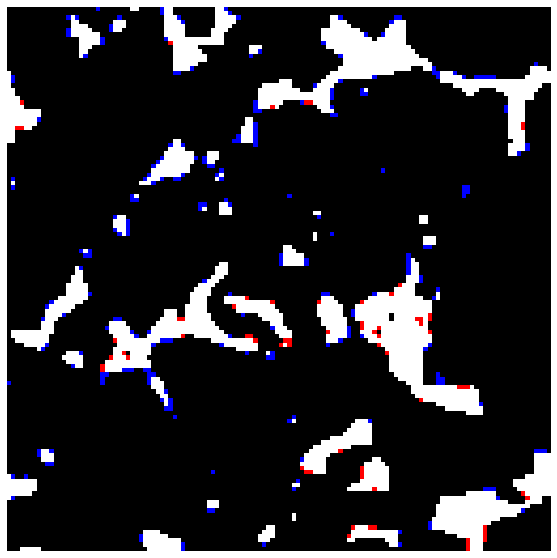

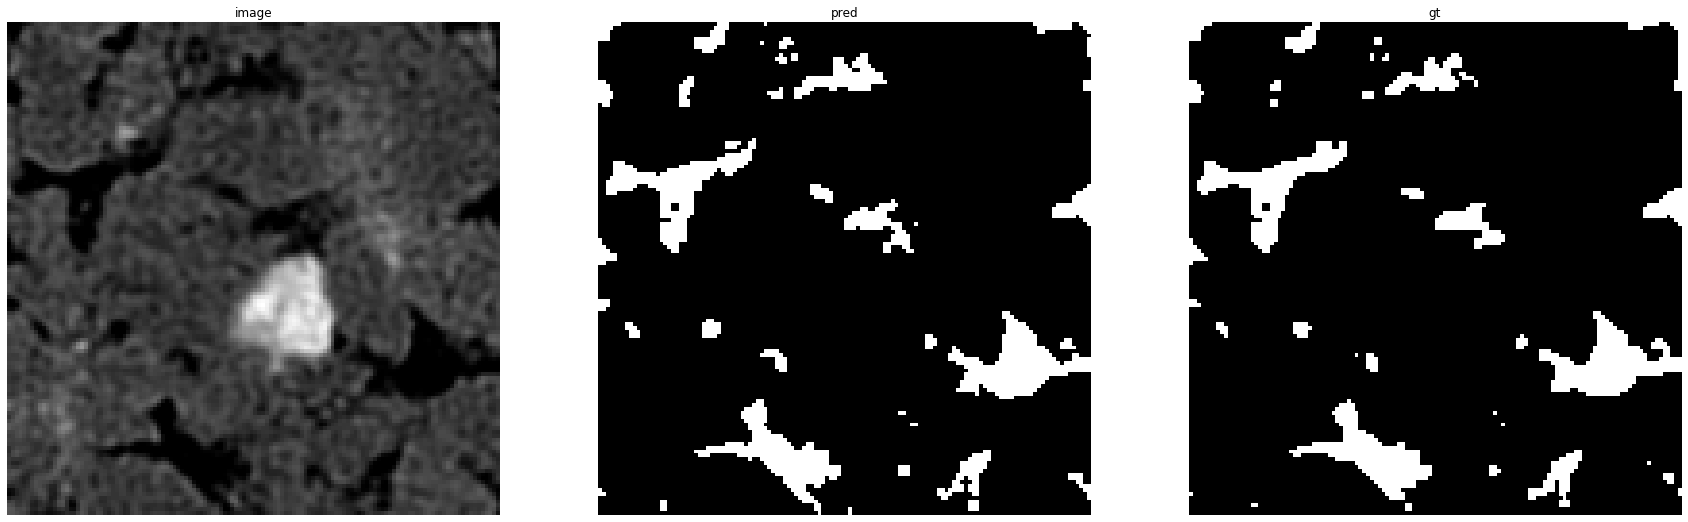

accuracy    : 0.984619140625
precision   : 0.9007770472205618
recall      : 0.9460138104205901
f1          : 0.9228413962033069
pr_auc      : 0.9847759580432651
iou         : 0.8567367822626493


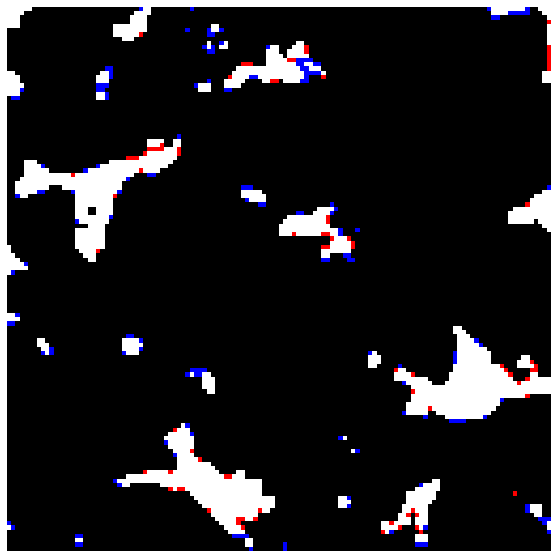

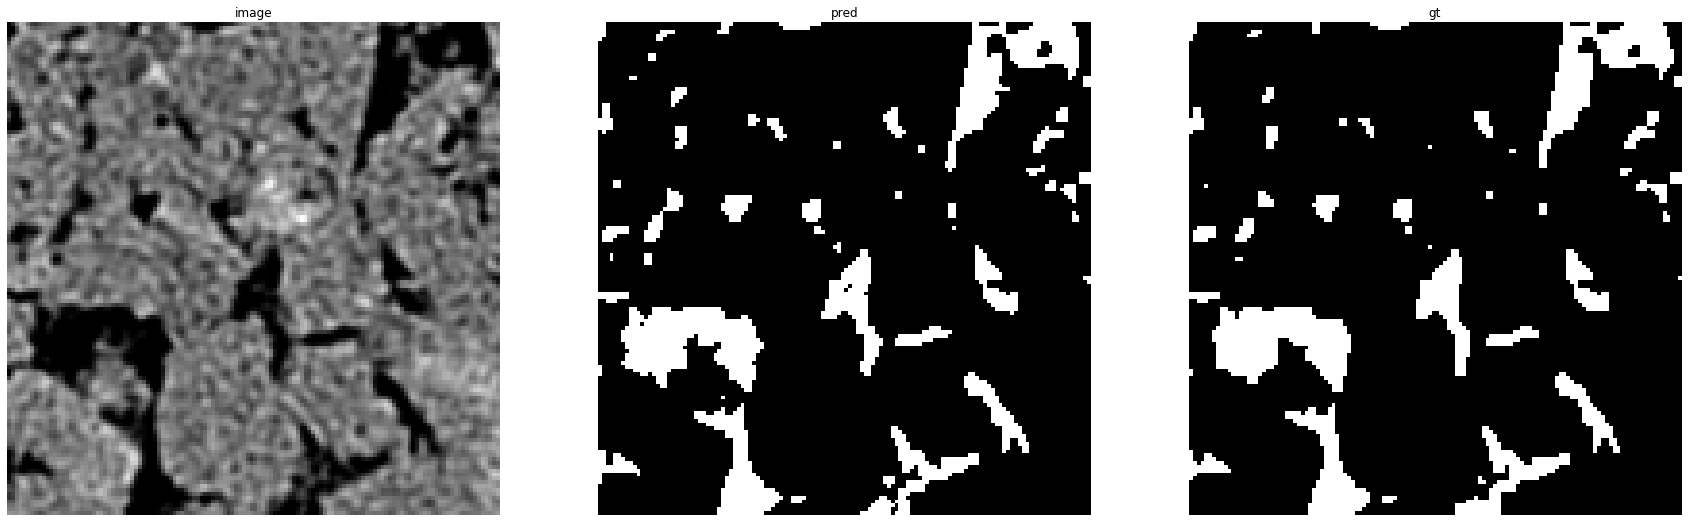

accuracy    : 0.98577880859375
precision   : 0.9347921225382932
recall      : 0.9621621621621622
f1          : 0.9482796892341843
pr_auc      : 0.9920884891154307
iou         : 0.9016462642465175


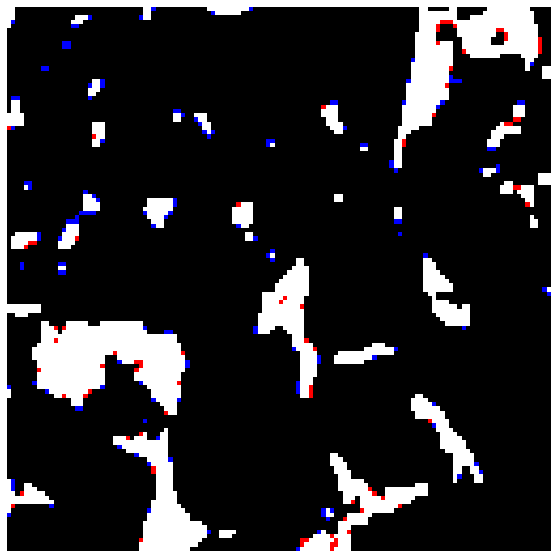

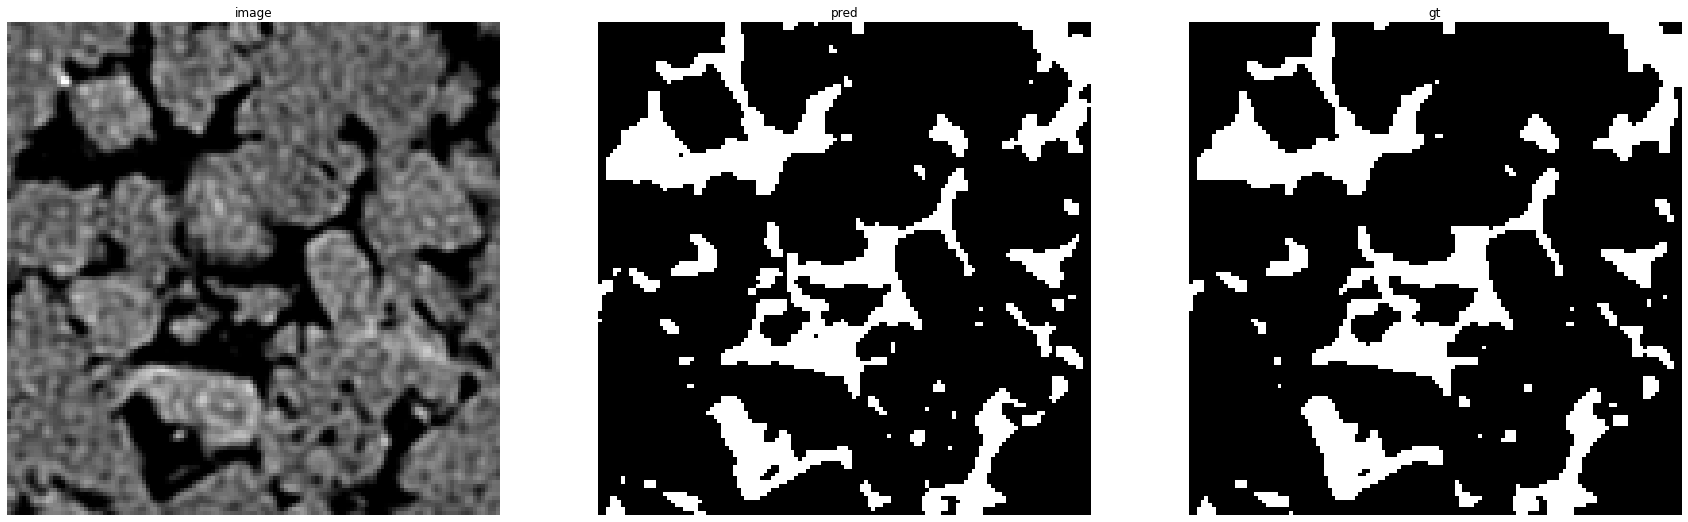

accuracy    : 0.97857666015625
precision   : 0.9437180216031836
recall      : 0.9559458681255398
f1          : 0.9497925904734659
pr_auc      : 0.9922318914075624
iou         : 0.9043857259602288


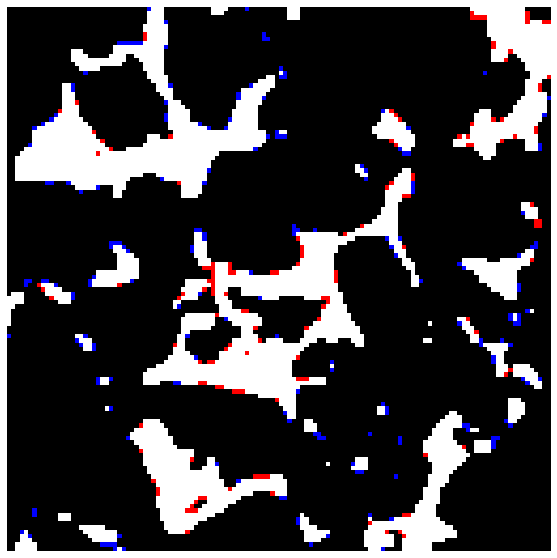

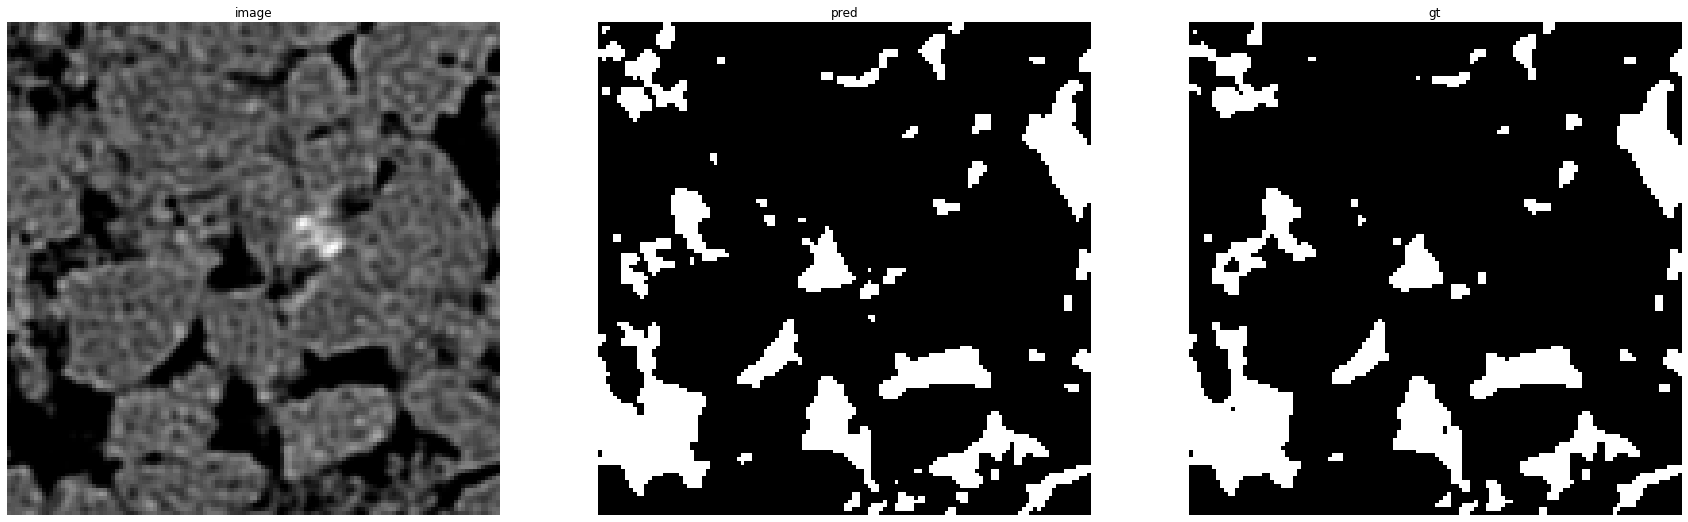

accuracy    : 0.9814453125
precision   : 0.9384668270883465
recall      : 0.9562171628721541
f1          : 0.9472588480222068
pr_auc      : 0.9910980366849143
iou         : 0.8998022412656559


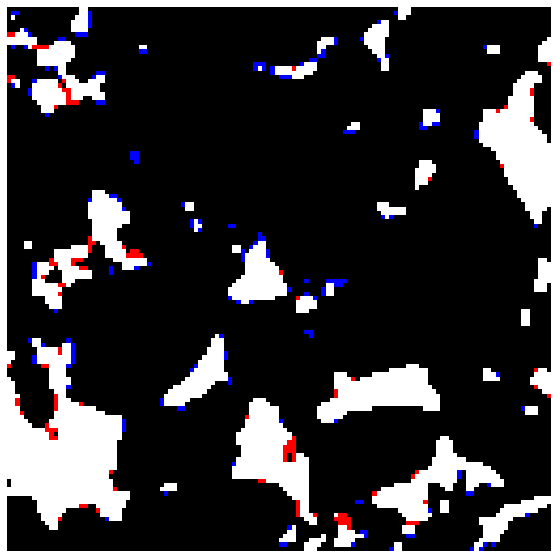

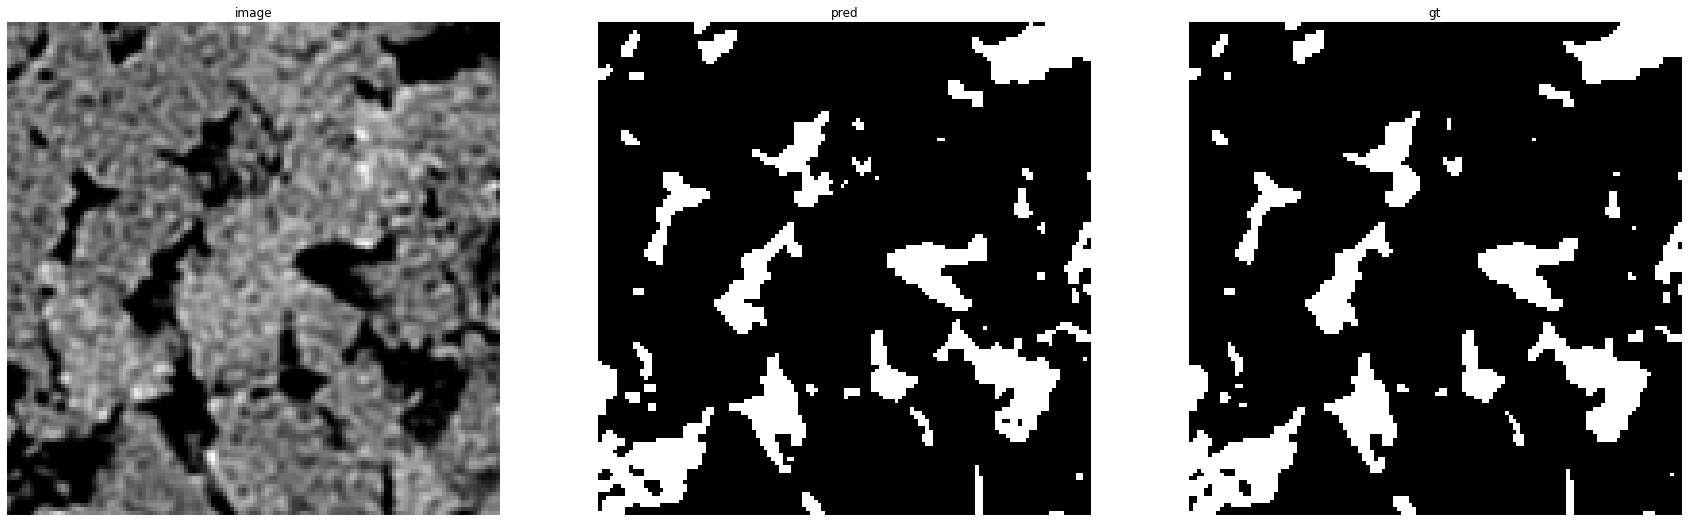

accuracy    : 0.9822998046875
precision   : 0.9327338129496403
recall      : 0.9617952522255193
f1          : 0.9470416362308254
pr_auc      : 0.9920105662509933
iou         : 0.8994103364550815


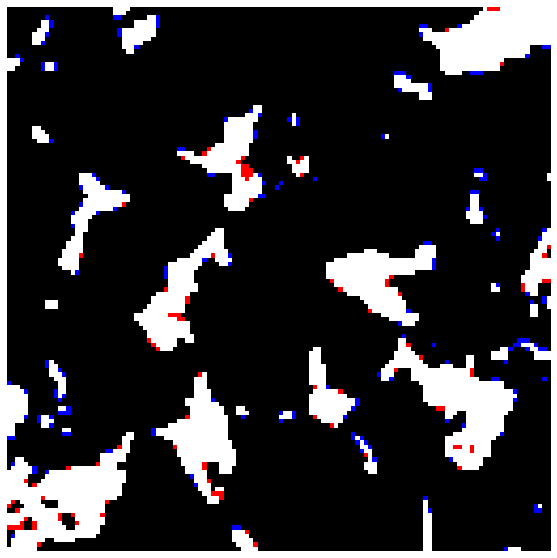

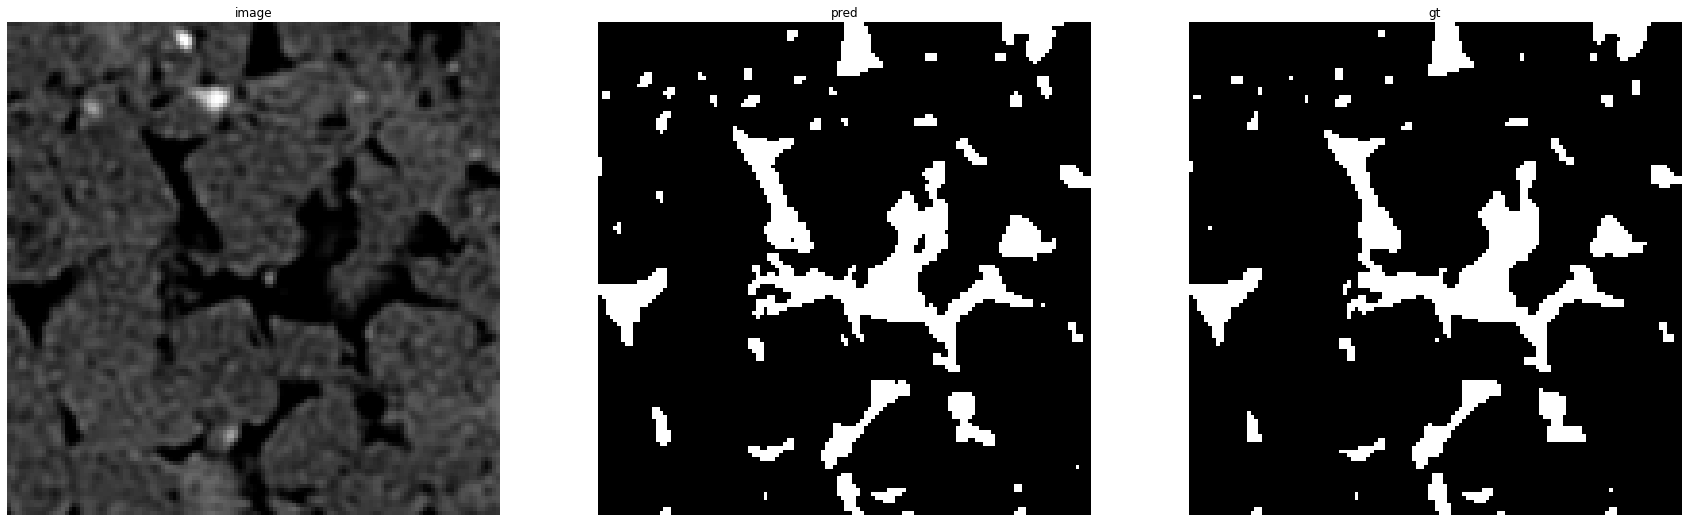

accuracy    : 0.984130859375
precision   : 0.9104543449492721
recall      : 0.9731258840169731
f1          : 0.9407474931631722
pr_auc      : 0.9917510545673781
iou         : 0.8881239242685026


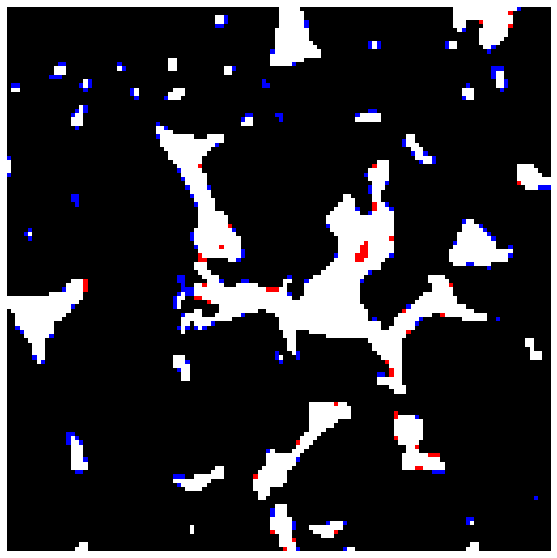

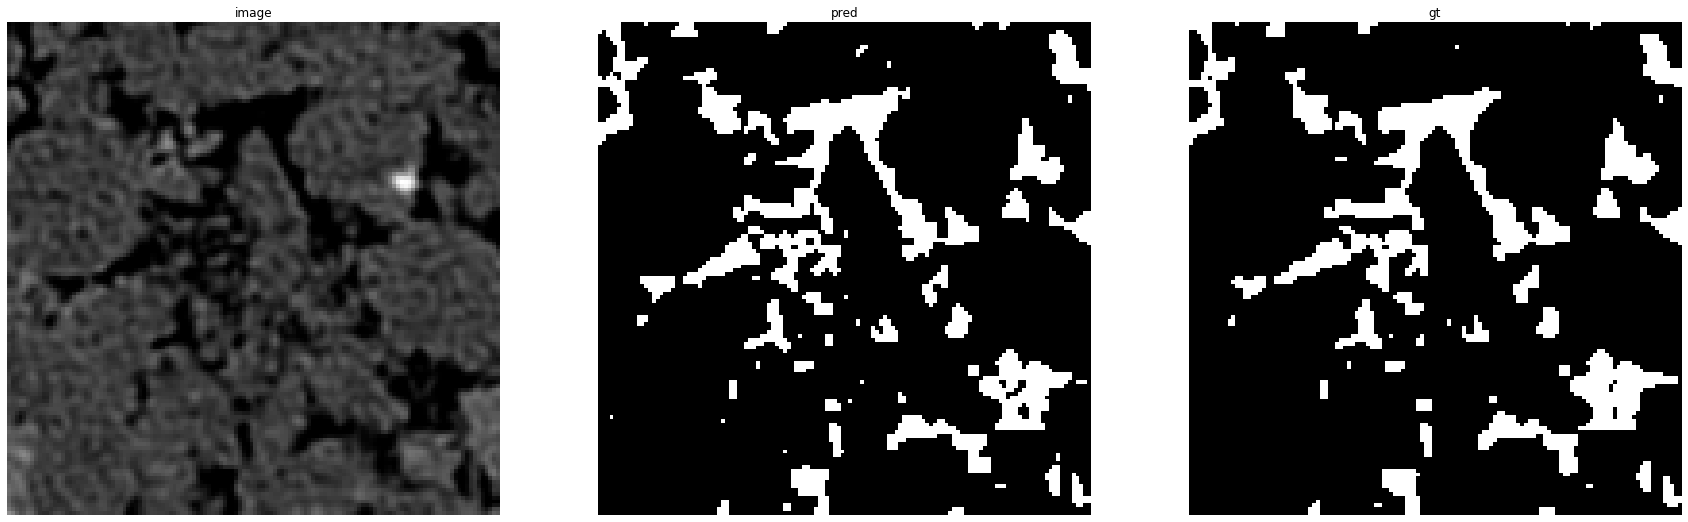

accuracy    : 0.98114013671875
precision   : 0.9328478964401294
recall      : 0.9416088199265006
f1          : 0.9372078845763057
pr_auc      : 0.9860790155241447
iou         : 0.8818355640535372


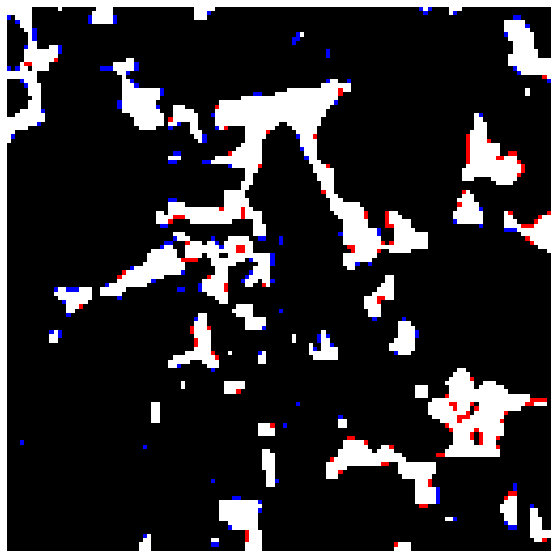

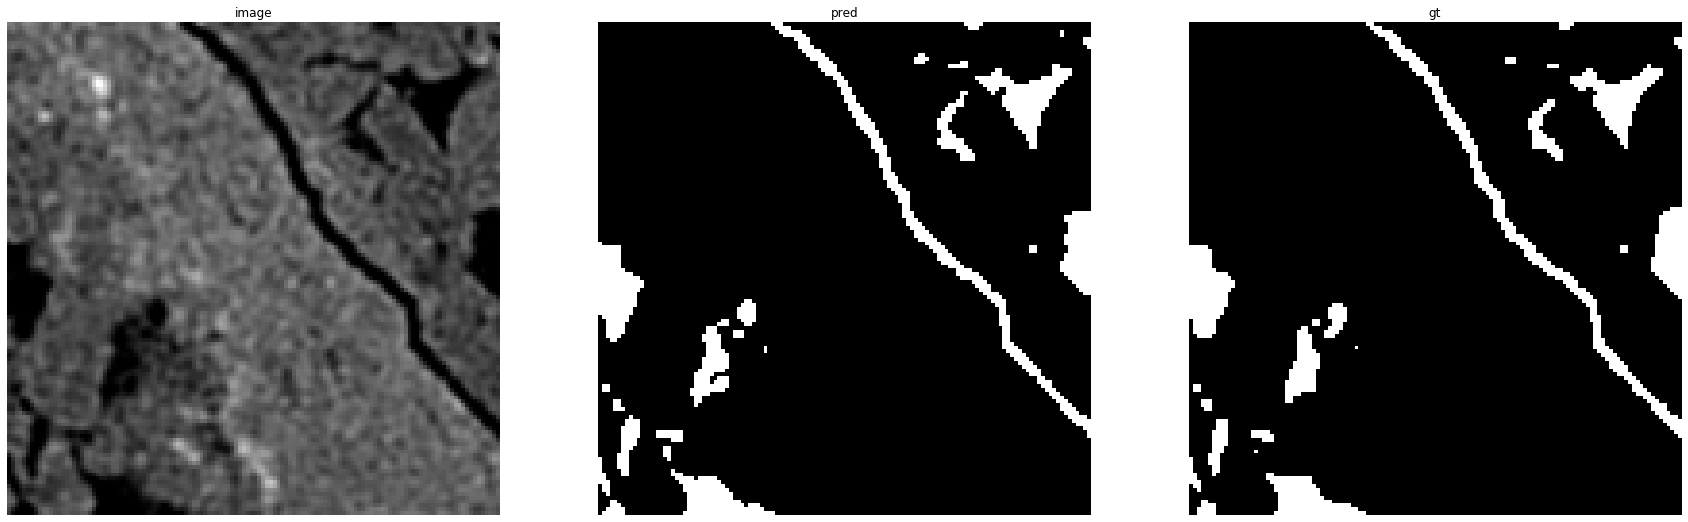

accuracy    : 0.99078369140625
precision   : 0.9349195241427571
recall      : 0.9583931133428981
f1          : 0.9465108041091037
pr_auc      : 0.9909283966433711
iou         : 0.898453261600538




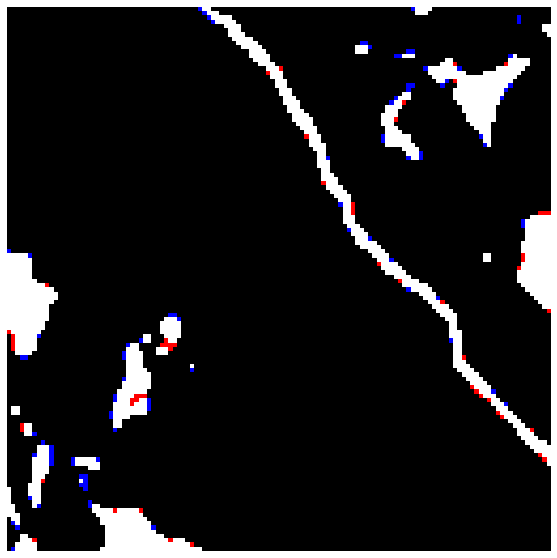

In [30]:
model.eval()

for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    print('Prediction for {}:'.format(stack_name))
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)

            img_path = os.path.join('.', 'samples', stack_name, 'diff_{}.png'.format(cnt))
            make_colored_diff(mask, pred, threshold=threshold, path=img_path)
            
            cnt -= 1
            
        if cnt ==0:
            break
    print('\n')

## Results

In [31]:
import pandas as pd

from visualization_utils import make_df

df = make_df(results, model_name=data_conf['conf_name'])
df

In [41]:
data_conf['conf_name'] = 'carb96558_soilB-2_Urna_22'

In [42]:
df.to_html('{}.html'.format(data_conf['conf_name'].replace('-', '_')))
s = (
    'wkhtmltoimage -f png --width 0' 
    ' {exp_name}_exp/{exp_name}.html' 
    ' {exp_name}_exp/{exp_name}.png'.format(exp_name=data_conf['conf_name'].replace('-', '_'))
)
print(s)

wkhtmltoimage -f png --width 0 carb96558_soilB_2_Urna_22_exp/carb96558_soilB_2_Urna_22.html carb96558_soilB_2_Urna_22_exp/carb96558_soilB_2_Urna_22.png


## Make prediction for particular stack

In [31]:
stack_name = 'Urna_30'

In [32]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

710it [00:00, 800.03it/s]
100%|██████████| 710/710 [00:07<00:00, 99.78it/s] 


In [33]:
predicted_stack_1 = stack.apply(
    model, 
    model_config,
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device=device,
    threshold=None)

25560it [00:00, 251640.52it/s]
25560it [02:02, 208.20it/s]
100%|██████████| 25560/25560 [00:08<00:00, 2887.83it/s]


In [34]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_1.preds, 
    mode='stack',
    threshold=0.5)

0.9473633174914053

In [35]:
predicted_stack_2 = stack.apply(
    model, 
    model_config,
    patch_sizes=(1, 128, 128), 
    bs=32, num_workers=8, device=device,
    threshold=None)

25560it [00:00, 99274.20it/s]
25560it [02:12, 192.32it/s]
100%|██████████| 25560/25560 [00:01<00:00, 13837.42it/s]


In [36]:
predicted_stack_3 = stack.apply(
    model, 
    model_config,
    patch_sizes=(128, 1, 128), 
    bs=32, num_workers=8, device=device,
    threshold=None)

25560it [00:00, 235832.03it/s]
25560it [02:13, 191.16it/s]
100%|██████████| 25560/25560 [00:01<00:00, 13996.78it/s]


In [37]:
iou(np.where(predicted_stack_2.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_2.preds, 
    mode='stack',
    threshold=0.5)

0.8972258551716964

In [38]:
iou(np.where(predicted_stack_3.targets == 255, 0, 1).astype(np.uint8), 
    predicted_stack_3.preds, 
    mode='stack',
    threshold=0.5)

0.8984312467231199

In [39]:
iou(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
    (predicted_stack_1.preds + predicted_stack_2.preds + predicted_stack_3.preds) / 3, 
    mode='stack',
    threshold=0.5)

0.9262343393176803

In [40]:
average_stack = Stack(predicted_stack_1.features, 
                      predicted_stack_1.targets, 
                      (predicted_stack_1.preds + predicted_stack_2.preds + predicted_stack_3.preds) / 3)

In [ ]:
for ps, d in zip([(128, 128, 1), (128, 1, 128), (1, 128, 128)], ['z', 'y', 'x']):
    predicted_stack = stack.apply(
        model, 
        model_config=model_config,
        patch_sizes=ps, 
        bs=32, num_workers=8, device=device,
        threshold=None)
    predicted_stack.dump('../segmented_stacks/{}_{}'.format(stack_name, d), 
                         features=False, 
                         targets=True, 
                         preds=True)

In [ ]:
average_stack.dump('../segmented_stacks/{}_average'.format(stack_name), 
                   features=False, 
                   targets=True, 
                   preds=True)